# Empirical Labeled Ambient LDA for ambient RNA removal (Ambien't (C) )
Used pieces from JoeZJH, https://github.com/JoeZJH/Labeled-LDA-Python

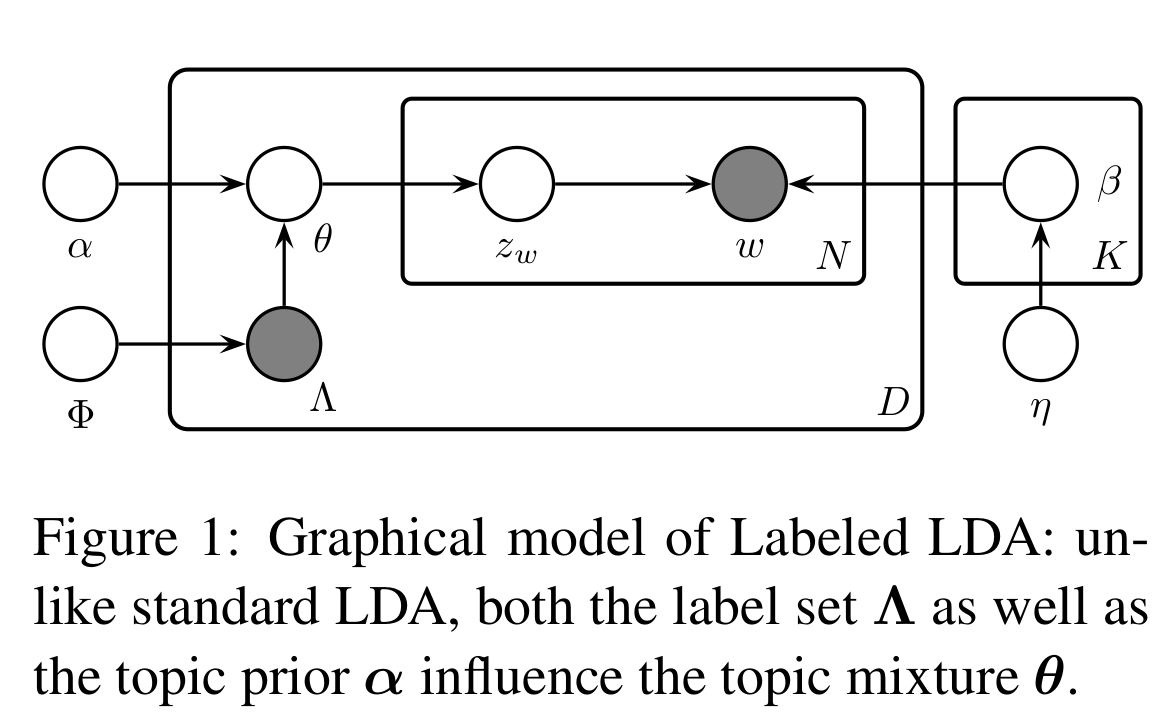

The collapsed Gibbs transition likelihood function appears below, without the term for the the distribution of ambient counts
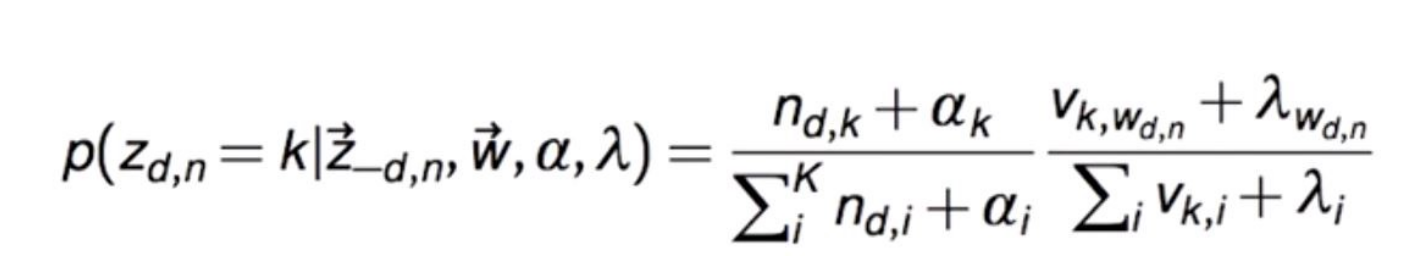

In [4]:
import os
import matplotlib
import scanpy
import scanpy.api as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
matplotlib.use('TkAgg') # plotting backend compatible with screen
import scipy
import seaborn
from scipy.stats import gaussian_kde
from collections import Counter
%matplotlib inline

In [ ]:
def load10X(rawpath,filteredpath,eta=None,min_counts=5,min_cells=50,cache=False):
    adata = sc.read_10x_mtx(os.path.expanduser(rawpath),cache=cache)
    bcs=list(pd.read_csv(os.path.expanduser(os.path.join(filteredpath,'barcodes.tsv'))).iloc[:,0])
    adata.var_names_make_unique()
    sc.pp.filter_cells(adata,min_counts=min_counts)
    sc.pp.filter_genes(adata, min_cells=min_cells)
    ambient_counts=np.log10(adata[[x not in bcs for x in adata.obs.index] ,:].obs.n_counts)
    cell_inds=np.where([x in bcs for x in adata.obs.index])[0]
    junk_inds=np.where([x not in bcs for x in adata.obs.index])[0]
    ambient_pdf=gaussian_kde(ambient_counts)
    adata._inplace_subset_var(adata[junk_inds,:].X.sum(axis=0).A1>5) 
    X=adata.X
    W=X.shape[1]
    betaAmbient = adata[junk_inds,:].X.sum(axis=0)/adata[junk_inds,:].X.sum(axis=1).sum()
    singleAmbient=X[junk_inds,:].sum(axis=0)
    X=X[cell_inds,:]
    X=scipy.sparse.vstack([X,singleAmbient],'csr')
    new_junk_inds= np.full(X.shape[0],False)
    new_junk_inds[new_junk_inds.shape[0]-1]=True
    new_cell_inds=np.invert(new_junk_inds)
    new_junk_inds=np.where(new_junk_inds)[0]
    new_cell_inds=np.where(new_cell_inds)[0]
    K=n_topics=10
    L = (1.0 / n_topics) * np.ones((X.shape[0], n_topics))
    L[new_junk_inds,:]=1e-9
    L[new_junk_inds,L.shape[1]-1]=1
    L=L/np.sum(L,axis=1)[:,np.newaxis]
    Z=scipy.sparse.csr_matrix((X.shape[0],n_topics))
    Z[new_junk_inds,n_topics-1]=X.sum(axis=1)[new_junk_inds]
    if eta is none:
        eta=1.0/n_topics
    else:
        eta=eta
    eta_vector=[eta for _ in range(n_topics)]
    eta_vector_sum=sum(eta_vector)
    xsum=X/X.sum(axis=1)
    Topic2TermCount=((xsum).T * Z)
    choi=list(range(n_topics))
    s=X.sum(axis=1).astype(int).A1
    for i in new_cell_inds:
        c=Counter(np.random.choice(choi,p=L[i,:],size=s[i])) 
        Z[i,list(c.keys())]=list(c.values())

def plotAmbientHists:
    #print(sorted(adata[junk_inds,:].X.sum(axis=0).A1))
    seaborn.distplot(np.log10(adata[junk_inds,:].X.sum(axis=1)),kde=False).set_title('Log Ambient Counts/Cell')
    plt.show()
    seaborn.distplot(np.log10(adata[junk_inds,:].X.sum(axis=0)),kde=False).set_title('Log Ambient Counts/Gene')
    plt.show()
    seaborn.distplot(betaAmbient,kde=False).set_title('Beta Ambient Proportions')
    plt.show()

Plate model of dependencies

## Load An Example Dataset and generate model

In [6]:
import scanpy.api as sc
import pandas as pd
adata = sc.read_10x_mtx('/home/mt/Downloads/E40_motor_Out/outs/raw_gene_bc_matrices/refdata-celranger-mmul8-toplevel/',cache=True)
bcs=list(pd.read_csv('/home/mt/Downloads/E40_motor_Out/outs/filtered_gene_bc_matrices/refdata-celranger-mmul8-toplevel/barcodes.tsv').iloc[:,0])
#adata = sc.read_10x_mtx('/home/mt/Downloads/E100motor_Out/outs/raw_gene_bc_matrices/refdata-celranger-mmul8-toplevel/',cache=True)
#bcs=list(pd.read_csv('/home/mt/Downloads/E100motor_Out/outs/filtered_gene_bc_matrices/refdata-celranger-mmul8-toplevel/barcodes.tsv').iloc[:,0])

#adata = sc.read_10x_h5('/home/mt/code/data/AlignedOrangutanOrganoid/Exonic/orangutanorganoid_Out/outs/filtered_gene_bc_matrices_h5.h5','refdata-celranger-Pabe2-toplevel')
adata.var_names_make_unique()
#sc.pp.filter_genes(adata, min_cells=50,inplace=True)
#sc.pp.filter_cells(adata,min_counts=5,inplace=True)
#sc.pp.filter_genes(adata, min_cells=50,inplace=True)
#adata._inplace_subset_obs(np.random.choice(adata.obs.index,30000,replace=False))
#adata._inplace_subset_var(np.random.choice(adata.var.index,5000,replace=False))
sc.pp.filter_cells(adata,min_counts=5,inplace=True)
sc.pp.filter_genes(adata, min_cells=50,inplace=True)
ambient_counts=np.log10(adata[[x not in bcs for x in adata.obs.index] ,:].obs.n_counts)


In [7]:
adata

AnnData object with n_obs × n_vars = 114082 × 10096 
    obs: 'n_counts'
    var: 'gene_ids', 'n_cells'

In [8]:
from scipy.stats import gaussian_kde
cell_inds=np.where([x in bcs for x in adata.obs.index])[0]
junk_inds=np.where([x not in bcs for x in adata.obs.index])[0]
ambient_pdf=gaussian_kde(ambient_counts)
adata._inplace_subset_var(adata[junk_inds,:].X.sum(axis=0).A1>5) 
X=adata.X
W=X.shape[1]
betaAmbient = adata[junk_inds,:].X.sum(axis=0)/adata[junk_inds,:].X.sum(axis=1).sum()

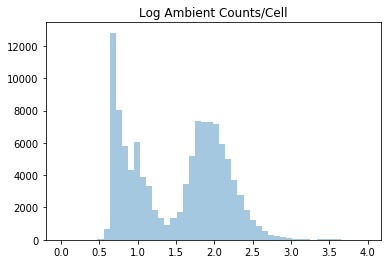

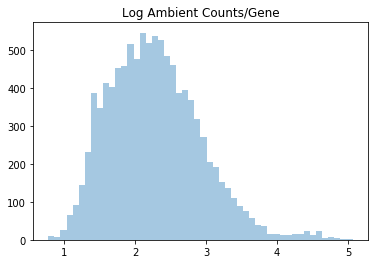

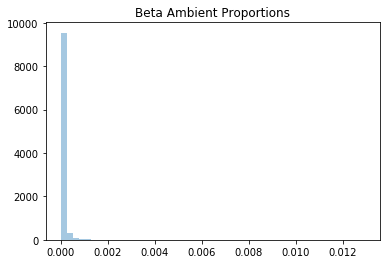

In [9]:
#print(sorted(adata[junk_inds,:].X.sum(axis=0).A1))
seaborn.distplot(np.log10(adata[junk_inds,:].X.sum(axis=1)),kde=False).set_title('Log Ambient Counts/Cell')
plt.show()
seaborn.distplot(np.log10(adata[junk_inds,:].X.sum(axis=0)),kde=False).set_title('Log Ambient Counts/Gene')
plt.show()
seaborn.distplot(betaAmbient,kde=False).set_title('Beta Ambient Proportions')
plt.show()

In [10]:
singleAmbient=X[junk_inds,:].sum(axis=0)
X=X[cell_inds,:]
X=scipy.sparse.vstack([X,singleAmbient],'csr')

In [11]:
new_junk_inds= np.full(X.shape[0],False)
new_junk_inds[new_junk_inds.shape[0]-1]=True
new_cell_inds=np.invert(new_junk_inds)
new_junk_inds=np.where(new_junk_inds)[0]
new_cell_inds=np.where(new_cell_inds)[0]


In [12]:
import time
t0=time.process_time()
np.invert(new_junk_inds)
t1=time.process_time()
t1-t0

0.0004062649999951873

In [13]:
K=n_topics=10
L = (1.0 / n_topics) * np.ones((X.shape[0], n_topics))
L[new_junk_inds,:]=1e-9
L[new_junk_inds,L.shape[1]-1]=1
L=L/np.sum(L,axis=1)[:,np.newaxis]


In [14]:
#Z should be initialized to vals in line with prior
Z=scipy.sparse.csr_matrix((X.shape[0],n_topics))
Z[new_junk_inds,n_topics-1]=X.sum(axis=1)[new_junk_inds]

choi=list(range(n_topics))
s=X.sum(axis=1).astype(int).A1
for i in new_cell_inds:
    c=Counter(np.random.choice(choi,p=L[i,:],size=s[i])) 
    Z[i,list(c.keys())]=list(c.values())

In [15]:
#Uninformative priors
theta = (1.0 / n_topics) * np.ones((X.shape[0], n_topics))
beta = (1.0 / X.shape[1]) * np.ones((n_topics,X.shape[1]))


In [16]:
eta=1.0/n_topics
eta_vector=[eta for _ in range(n_topics)]
eta_vector_sum=sum(eta_vector)
xsum=X/X.sum(axis=1)
Topic2TermCount=((xsum).T * Z)


In [17]:
def logLikelihood(beta,theta,X):
    log_likelihood = 0
    word_count = 0
    for m, theta_m in enumerate(theta):
        #t0=time.process_time()
        #print(m)
        for t in X[m,:].nonzero()[1]:
            likelihood_t = -np.log(np.inner(beta[:, t].T, theta_m))*X[m,t]
            #print( likelihood_t )
            log_likelihood += likelihood_t
            word_count+=X[m,t].sum()
        #t1=time.process_time()
        #print(t1-t0)
    return(log_likelihood.sum()/word_count)

#Just have to fix Beta if it trains correctly
def logLikelihood2(beta,theta,X):
    log_likelihood = 0
    word_count = 0
    for m, theta_m in enumerate(theta):
        #t0=time.process_time()
        #print(m)
        likelihood_t = -np.log(np.inner(beta.T, theta_m))*X[m,:]
        #print( likelihood_t )
        log_likelihood += likelihood_t
        word_count+=X[m,:].sum()
        #t1=time.process_time()
        #print(t1-t0)
    return(log_likelihood.sum()/word_count)



In [18]:
#window=100
from tqdm import tqdm
iterations=20
likelihoods=[]
chosen=np.random.choice(list(range(X.shape[0])),size=125)
chosen2=np.random.choice(list(range(X.shape[1])),size=1000)

for i in tqdm(range(iterations)):
    #print(i)
    for m in range(X.shape[0]):
        doc_m_alpha_vector = L[m,:]
        curdoc=X[m,:]
        curZ=Z[m,:]
        Z[m,:]-= Z[m,:]
        Topic2TermCount -= (curdoc.T/curdoc.sum())*curZ
        Topic2TermCountSum = Topic2TermCount.sum(axis=0).A1

        numerator_theta_vector = np.multiply(curZ.todense() , L[m,:])
        numerator_beta_vector = X[m,:]*Topic2TermCount + eta_vector
        denominator_beta = Topic2TermCountSum + eta_vector_sum


        beta_vector = 1.0 * numerator_beta_vector / denominator_beta
        theta_vector = numerator_theta_vector

        p_vector = np.multiply(beta_vector , theta_vector).A1
        p_vector=p_vector/p_vector.sum()
        #Depending on pdf draw
        ambient_proportion=max(min(1.0, np.mean([((10**ambient_pdf.resample(1))/np.sum(curZ))[0][0], p_vector[n_topics-1]])),0.0)
        p_vector[n_topics-1]=ambient_proportion
        #This is a bandaid, taking the mean between the resampled ambient counts and the LDA mixture counts
        p_vector[0:(n_topics-1)] = ((1.0-p_vector[n_topics-1]) * p_vector[0:(n_topics-1)] / max(ambient_proportion,np.sum(p_vector)))
        
        #Windowed sample depending on proportion
        #cur_ambient_prop=p_vector[n_topics-1]*np.sum(curZ)
        #pdf_range=list(range(max(0.0,int(cur_ambient_prop-window)),int(cur_ambient_prop+window)))
        #pdf_p=ambient_pdf(np.log10(pdf_range))
        #drawn_value=np.random.choice(pdf_range,p=pdf_p/np.sum(pdf_p),size=1)
        #p_vector[n_topics-1]=min(1.0,drawn_value/np.sum(curZ))
        #p_vector[0:(n_topics-1)] = ((1.0-p_vector[n_topics-1]) * p_vector[0:(n_topics-1)] / max(ambient_proportion,np.sum(p_vector)))
        
        p_vector=p_vector/p_vector.sum()
        print(p_vector)
        c=Counter(np.random.choice(list(range(n_topics)),p=p_vector,size=int(np.sum(curZ)))) 
        Z[m,list(c.keys())]=list(c.values())
        Topic2TermCount += (curdoc.T/curdoc.sum())*Z[m,:]
    if i % 3 ==0:    
        num=1.0*(Topic2TermCount )
        beta=num.T/(num.sum(axis=0).reshape(n_topics, 1))
        num=(Z + L)
        theta=num / num.sum(axis=1).reshape(X.shape[0], 1)
        likelihoods.append(logLikelihood(beta[:,chosen2],theta[chosen,:],X[chosen,:][:,chosen2]))



  0%|          | 0/20 [00:00<?, ?it/s]

[0.10200552 0.10176969 0.1074657  0.10397311 0.10187909 0.10440607
 0.10472539 0.105165   0.10287407 0.06573637]
[0.10389964 0.10107782 0.10675108 0.10377711 0.10533456 0.1063285
 0.1055568  0.10747326 0.10479119 0.05501004]
[0.09880279 0.10177325 0.10940168 0.10145255 0.10326836 0.10874999
 0.10076919 0.10657845 0.10709387 0.06210987]
[0.11496873 0.10421137 0.10184393 0.09428725 0.1163424  0.10681537
 0.1010354  0.10103931 0.09726225 0.06219399]
[0.10620851 0.10311472 0.10487592 0.10487527 0.10420325 0.10878254
 0.10307965 0.10525867 0.10472681 0.05487466]
[0.1044331  0.10350807 0.1029043  0.10128076 0.10208764 0.11046655
 0.10513661 0.10422492 0.1037289  0.06222915]
[0.10620628 0.10039087 0.11013477 0.10967174 0.10102111 0.10197939
 0.10714503 0.09585309 0.10212631 0.06547141]
[0.10143884 0.09948265 0.10182125 0.11231894 0.10726002 0.10260944
 0.10685774 0.1041472  0.1027388  0.06132513]
[0.10470603 0.10845543 0.10164977 0.10200951 0.10070163 0.1065888
 0.10587965 0.10211966 0.106114

[0.10484227 0.10647734 0.10430039 0.10983703 0.10245379 0.10466794
 0.10488768 0.10118548 0.10630289 0.0550452 ]
[0.09954395 0.10983807 0.1000057  0.09837646 0.10374917 0.11056123
 0.10398497 0.10586239 0.10656752 0.06151055]
[0.10693504 0.10317994 0.10379409 0.10515135 0.10456496 0.10668345
 0.10323009 0.10731129 0.10281203 0.05633775]
[0.10740832 0.10144447 0.10479702 0.10249884 0.10731471 0.10495589
 0.10558248 0.10510474 0.10764502 0.05324851]
[0.1028512  0.10759251 0.10121618 0.10446557 0.1098738  0.10217696
 0.10701083 0.10221244 0.10659597 0.05600453]
[0.10466408 0.0983696  0.10476863 0.10649698 0.10628164 0.1043928
 0.10390867 0.10304777 0.10943109 0.05863874]
[0.10551943 0.10902932 0.10352045 0.09833676 0.11170805 0.09849678
 0.10284432 0.11238917 0.09999276 0.05816297]
[0.09918445 0.10798236 0.10321787 0.1041791  0.10376683 0.10704405
 0.10186695 0.10262967 0.1125855  0.05754322]
[0.10667431 0.10473285 0.09984913 0.10668167 0.10860544 0.1036184
 0.10563944 0.10269002 0.107138

[0.10138645 0.0984141  0.10174882 0.10036294 0.10731479 0.11117517
 0.10488561 0.09982237 0.11360514 0.0612846 ]
[0.10632579 0.10620064 0.10473758 0.10656054 0.1020828  0.10119037
 0.10861622 0.10175589 0.1034733  0.05905686]
[0.10135797 0.09753729 0.10972113 0.10472244 0.10016158 0.09660347
 0.10041481 0.1011261  0.10064672 0.08770849]
[0.10500298 0.10028341 0.10166675 0.10678466 0.10681204 0.10836751
 0.10455987 0.10290724 0.10438213 0.05923341]
[0.10923401 0.10676998 0.09992546 0.10768226 0.10220092 0.09975613
 0.10766481 0.09693092 0.10150107 0.06833445]
[0.10681186 0.10594765 0.10046902 0.10192722 0.1075405  0.1038088
 0.10693261 0.10119894 0.09933981 0.0660236 ]
[0.10119427 0.10267244 0.10355882 0.10325252 0.10955058 0.10191387
 0.1041754  0.10057659 0.10721957 0.06588593]
[0.1042908  0.10289182 0.10829446 0.10472146 0.10568701 0.09873036
 0.10011367 0.09512768 0.1030993  0.07704345]
[0.10075597 0.09950917 0.10005963 0.1032653  0.11032984 0.10875244
 0.10839609 0.11211653 0.10164

[0.1050256  0.10131368 0.10615451 0.10931846 0.10104259 0.1009701
 0.10587459 0.1070748  0.10605161 0.05717405]
[0.100506   0.10313643 0.0946223  0.10276329 0.0987675  0.10174011
 0.10224002 0.10457908 0.10102198 0.09062331]
[0.10443478 0.09812563 0.10615178 0.10379099 0.10376877 0.1031297
 0.10850948 0.10627268 0.10876953 0.05704665]
[0.10706687 0.10396351 0.10024066 0.10563393 0.09891978 0.09404714
 0.1080595  0.10821965 0.11310467 0.06074428]
[0.10188413 0.10635564 0.11298179 0.09789778 0.09551442 0.10260477
 0.10472416 0.10354377 0.11179869 0.06269485]
[0.10126581 0.10607228 0.10378078 0.10484329 0.10278062 0.10583373
 0.1050232  0.1052933  0.10424387 0.06086312]
[0.10545038 0.10068093 0.10455031 0.096504   0.11093976 0.1058321
 0.10857443 0.10216389 0.10472504 0.06057917]
[0.10381562 0.10493285 0.10636241 0.1052577  0.10129668 0.10215629
 0.1081862  0.09948314 0.10452753 0.06398158]
[0.10134308 0.0999689  0.10477753 0.1029656  0.1074733  0.10795177
 0.10931271 0.10044706 0.1083962

[0.10722083 0.09805413 0.10250385 0.10362652 0.10596575 0.10515085
 0.10361188 0.10818773 0.10874825 0.05693021]
[0.10403722 0.10685255 0.10519828 0.10256178 0.10203418 0.10423432
 0.10515794 0.10597635 0.10447762 0.05946975]
[0.10208609 0.10658883 0.10171308 0.10803761 0.10301042 0.10598793
 0.10384497 0.10403463 0.10253414 0.0621623 ]
[0.09376223 0.10546796 0.11049461 0.10493372 0.10010373 0.10357621
 0.10068765 0.1001068  0.10299717 0.07786993]
[0.10800964 0.09735453 0.10403748 0.10627195 0.10934556 0.10781278
 0.09626574 0.10402488 0.10425149 0.06262594]
[0.09723558 0.10331617 0.10793341 0.09879378 0.1067226  0.10064073
 0.10639868 0.11062348 0.10436413 0.06397145]
[0.10381897 0.10997641 0.10401142 0.10296803 0.10822807 0.09854958
 0.10805915 0.10558865 0.09942315 0.05937658]
[0.1023146  0.10633888 0.10136558 0.10541503 0.10800421 0.10623375
 0.10369804 0.10135612 0.10691357 0.05836021]
[0.10675415 0.10343982 0.10142337 0.10472696 0.09874096 0.10911877
 0.09906109 0.11036189 0.1045

[0.0982259  0.09860716 0.10746094 0.10472681 0.1119511  0.09452597
 0.10588912 0.10705436 0.10941774 0.0621409 ]
[0.1109871  0.10116914 0.09858208 0.10023075 0.10477773 0.10398425
 0.11231512 0.10690733 0.10266521 0.05838128]
[0.10484102 0.10740854 0.10151906 0.10243766 0.11000925 0.10425698
 0.10409958 0.10819114 0.10242191 0.05481486]
[0.10353538 0.10440536 0.10673866 0.10869377 0.10300521 0.10029141
 0.10841283 0.10433598 0.10355035 0.05703105]
[0.10385564 0.10706475 0.10971826 0.10248265 0.1102977  0.09885173
 0.09985044 0.10205115 0.10105345 0.06477424]
[0.107231   0.1052443  0.1019225  0.1041083  0.10841885 0.10133275
 0.10586822 0.11020064 0.1011244  0.05454903]
[0.10242068 0.1115742  0.10463336 0.10325201 0.1002312  0.10623337
 0.10622727 0.10481933 0.09944413 0.06116445]
[0.10662794 0.10760393 0.10398241 0.10554137 0.10804908 0.10429584
 0.10614983 0.10018833 0.10056634 0.05699495]
[0.09923072 0.10126782 0.10426062 0.11270032 0.10833827 0.1044943
 0.09856722 0.1072042  0.10448

[0.09927989 0.10473274 0.11107777 0.10317566 0.10039506 0.10531417
 0.10796822 0.1003195  0.10220802 0.06552896]
[0.10704217 0.10434532 0.09871807 0.10034593 0.10636129 0.1023729
 0.10301022 0.10568472 0.1163354  0.05578398]
[0.10995118 0.10671505 0.10611385 0.10055201 0.0984807  0.10374751
 0.10255992 0.10169114 0.11064264 0.059546  ]
[0.1037101  0.10411563 0.1059597  0.10491247 0.10366789 0.10513367
 0.10434135 0.10348596 0.10649522 0.05817801]
[0.10543584 0.10175692 0.10566214 0.11129917 0.10457747 0.09930497
 0.10816438 0.10636577 0.10013047 0.05730286]
[0.10230255 0.10608085 0.10738948 0.10528727 0.10143908 0.10486529
 0.11309648 0.10060542 0.10908229 0.04985129]
[0.1051338  0.10449757 0.10280636 0.10367983 0.10651914 0.10529289
 0.10588733 0.10431846 0.10387169 0.05799293]
[0.09858561 0.10096799 0.10268976 0.108237   0.10530325 0.10799553
 0.11062271 0.10338967 0.10196703 0.06024145]
[0.10881543 0.10155402 0.09784251 0.1074172  0.09571952 0.09982144
 0.10031613 0.09818573 0.09220

[0.09069241 0.10179823 0.10695174 0.11359109 0.10586014 0.10119631
 0.09902828 0.11056187 0.10525673 0.06506319]
[0.10229366 0.11190035 0.10496474 0.09650529 0.1026063  0.10398111
 0.10563317 0.10477839 0.11061307 0.05672393]
[0.10613871 0.09953206 0.10312397 0.10299309 0.10097794 0.11115638
 0.09338789 0.11164441 0.10312477 0.06792077]
[0.10065719 0.10584886 0.10247375 0.0949114  0.11143005 0.1066227
 0.10264998 0.10226488 0.10877578 0.06436542]
[0.10500162 0.10747825 0.10577331 0.10578206 0.11173187 0.10028183
 0.1037703  0.1102457  0.09577117 0.0541639 ]
[0.10669444 0.10708865 0.10269395 0.10460433 0.09990152 0.10354583
 0.1054419  0.11049607 0.10015092 0.0593824 ]
[0.10562135 0.10615093 0.10063303 0.10106088 0.10351793 0.09967663
 0.1096626  0.11060998 0.10355101 0.05951567]
[0.1010408  0.10743766 0.09993544 0.10572498 0.10423135 0.10186832
 0.09912973 0.11066944 0.10234096 0.06762132]
[0.09695093 0.10361843 0.11117655 0.0953132  0.10069988 0.11307754
 0.10825754 0.10677186 0.10470

[0.10676869 0.10041623 0.10994956 0.11627039 0.09703542 0.10204918
 0.09978826 0.10653202 0.10678865 0.05440161]
[0.10233197 0.10551924 0.10710368 0.10822615 0.10662974 0.10081278
 0.09936469 0.10664132 0.10389944 0.05947097]
[0.09611091 0.10486977 0.10284277 0.10664197 0.10349729 0.10181897
 0.10715115 0.09954531 0.10732487 0.07019699]
[0.10778046 0.10578581 0.10325209 0.10976066 0.09927852 0.10498272
 0.11237375 0.10168712 0.10019321 0.05490567]
[0.10584394 0.10782297 0.1100004  0.09796968 0.10480312 0.09971546
 0.10146072 0.1047285  0.10705402 0.06060119]
[0.1022599  0.1099884  0.10793292 0.09977151 0.10831641 0.11067312
 0.09892606 0.10350912 0.09976244 0.05886011]
[0.09834123 0.10121652 0.10103783 0.10506735 0.10792345 0.10954303
 0.10729957 0.10726927 0.09992132 0.06238042]
[0.09729978 0.1103847  0.10830229 0.10665416 0.10451418 0.10274516
 0.10708861 0.10360839 0.10304098 0.05636175]
[0.09884831 0.10149384 0.10091285 0.10236406 0.10006179 0.09600575
 0.10665949 0.10273848 0.1062

[0.10756476 0.10630497 0.10849936 0.10588905 0.10738427 0.10435153
 0.10403834 0.09708527 0.10234606 0.05653641]
[0.10182191 0.10352121 0.10687244 0.10410021 0.10259736 0.11033056
 0.10263122 0.10392934 0.10979339 0.05440235]
[0.10718359 0.10568297 0.10583442 0.10612271 0.10068374 0.10329212
 0.11055762 0.09878648 0.10260796 0.0592484 ]
[0.10474713 0.10542866 0.10567374 0.10725435 0.10540143 0.10487566
 0.10645253 0.10294832 0.10194438 0.0552738 ]
[0.10818009 0.10221261 0.10657294 0.10946453 0.1041961  0.10460236
 0.09955574 0.10222603 0.09901385 0.06397575]
[0.10275722 0.1071619  0.10478875 0.10913135 0.10414543 0.10489947
 0.10600126 0.10073081 0.10025717 0.06012663]
[0.09902883 0.1053304  0.1016419  0.10666587 0.11120327 0.09317666
 0.09815119 0.10836712 0.10818497 0.06824979]
[0.104392   0.10662241 0.10821728 0.106827   0.10304996 0.10313484
 0.10452256 0.10397506 0.10205866 0.05720024]
[0.10172345 0.10234954 0.09872692 0.10331566 0.10418746 0.10305373
 0.10579695 0.11335762 0.1088

[0.10396652 0.10050794 0.10940817 0.10453155 0.11659655 0.09530976
 0.10615336 0.10341144 0.10380099 0.05631372]
[0.10050515 0.10120116 0.10665863 0.10343709 0.10997627 0.10154094
 0.10139622 0.10107111 0.10446304 0.06975041]
[0.10593949 0.11085916 0.10441817 0.10655843 0.10318672 0.10340412
 0.10518701 0.09654577 0.10330972 0.06059142]
[0.10653592 0.10474689 0.10264443 0.10816485 0.10111204 0.10822077
 0.10270013 0.10261957 0.10414476 0.05911065]
[0.10615581 0.10684936 0.10205052 0.10229392 0.09790427 0.11004139
 0.10253454 0.10274613 0.10035881 0.06906527]
[0.10337503 0.10441348 0.10633394 0.10557164 0.10649738 0.1045586
 0.10806664 0.10071429 0.10379262 0.05667638]
[0.10029777 0.09328735 0.10068688 0.0961603  0.0874356  0.09710566
 0.10087957 0.09877281 0.10068995 0.12468412]
[0.10288738 0.10504424 0.09782938 0.10532763 0.10263286 0.106776
 0.10241752 0.10070499 0.0961432  0.0802368 ]
[0.10512899 0.10777949 0.11282191 0.10603004 0.09856662 0.10603675
 0.10181302 0.10011672 0.1023214

[0.10520707 0.10262774 0.10231815 0.10179427 0.10017173 0.10663621
 0.10944429 0.10404833 0.10398344 0.06376877]
[0.11237861 0.10401368 0.10646458 0.10559666 0.10313968 0.09879474
 0.10426779 0.1066562  0.09438939 0.06429867]
[0.10517124 0.10664258 0.10518378 0.10464737 0.1029464  0.10247511
 0.10700201 0.10490782 0.10446144 0.05656225]
[0.10732292 0.10650901 0.11607293 0.10720551 0.10481918 0.09899127
 0.09650936 0.09935001 0.10667777 0.05654202]
[0.10216105 0.10674445 0.09791896 0.09902828 0.10434933 0.10549826
 0.10826668 0.09770905 0.10401459 0.07430935]
[0.10578929 0.10506098 0.10452624 0.10100019 0.09862015 0.10527611
 0.10551111 0.10504548 0.10980633 0.05936412]
[0.11018283 0.10247601 0.1033205  0.10483744 0.10064091 0.10548007
 0.10467646 0.11143836 0.10203178 0.05491564]
[0.1116843  0.10584195 0.10946337 0.10297952 0.0995829  0.10006837
 0.10408866 0.10741961 0.10296798 0.05590333]
[0.10781799 0.10067467 0.10574887 0.1027726  0.10612148 0.10875526
 0.10781044 0.10312792 0.0987

[0.1054193  0.10204099 0.10099619 0.1001166  0.10540487 0.10987249
 0.0956676  0.1052209  0.11730746 0.0579536 ]
[0.10567754 0.10593335 0.10428755 0.104799   0.10726384 0.10495592
 0.10722745 0.09961873 0.101039   0.05919761]
[0.10471657 0.0969885  0.10227675 0.10096773 0.10544679 0.10417382
 0.10753268 0.10563432 0.10679362 0.06546922]
[0.10636436 0.10667561 0.09822877 0.10914662 0.10824377 0.10880612
 0.10100375 0.09906705 0.10463282 0.05783113]
[0.09765826 0.10889147 0.10297291 0.10578907 0.10807092 0.09883179
 0.10462814 0.10608617 0.10047601 0.06659526]
[0.10545606 0.10615781 0.10902756 0.09833116 0.10116172 0.10362307
 0.10715401 0.09915724 0.10633041 0.06360095]
[0.10405786 0.10180232 0.10617126 0.11038712 0.09859485 0.11298913
 0.09899589 0.10156856 0.10406151 0.0613715 ]
[0.10252092 0.10264533 0.10978525 0.10389597 0.10749003 0.10223908
 0.10312951 0.09992807 0.11038742 0.05797843]
[0.1050314  0.10417478 0.09806582 0.10914561 0.10808102 0.10155654
 0.10155055 0.1011118  0.1040

[0.10970067 0.1078034  0.10373021 0.10878294 0.09884376 0.10785114
 0.10073975 0.10258124 0.09606306 0.06390383]
[0.10707786 0.10472035 0.09526607 0.10619582 0.10311748 0.10118273
 0.11263394 0.10275831 0.10797686 0.05907058]
[0.10468507 0.10667611 0.11230481 0.10493481 0.10168976 0.10469894
 0.09981235 0.10371267 0.10111952 0.06036595]
[0.11082813 0.10160011 0.09497501 0.10781985 0.1032784  0.1006465
 0.10382153 0.10461956 0.10180906 0.07060185]
[0.09679986 0.10448515 0.11339372 0.10569671 0.10507252 0.10926322
 0.10251612 0.10546514 0.10194858 0.05535899]
[0.10807894 0.09826593 0.10515905 0.10413529 0.1073597  0.10053799
 0.11236399 0.10375946 0.10172569 0.05861397]
[0.1113922  0.10323266 0.10423574 0.10291816 0.10395816 0.1047112
 0.10519269 0.10777672 0.1033946  0.05318787]
[0.10865142 0.10368005 0.10394988 0.10461985 0.10122572 0.10238289
 0.10797598 0.09674722 0.10640359 0.0643634 ]
[0.10187216 0.10072118 0.10953599 0.10586948 0.10379047 0.10566871
 0.10361446 0.11022173 0.100548

  5%|▌         | 1/20 [00:15<05:00, 15.80s/it]

[0.10007805 0.10457172 0.10860738 0.10428956 0.10522674 0.11131294
 0.11044447 0.11353847 0.10849223 0.03343844]
[0.10697129 0.10264558 0.10472633 0.10922998 0.11144342 0.10765211
 0.11135817 0.10732196 0.10805541 0.03059576]
[0.06747454 0.06789572 0.07071548 0.06585474 0.06940667 0.07408135
 0.0689783  0.07297067 0.07494253 0.36767998]
[0.12336814 0.10802959 0.10297415 0.09885521 0.12685997 0.10455005
 0.10356064 0.10431187 0.09296313 0.03452725]
[0.10743952 0.1047528  0.10835197 0.1092754  0.10539358 0.11140735
 0.10702172 0.1064865  0.10696149 0.03290968]
[0.10572356 0.1002579  0.10196128 0.10008492 0.10551308 0.11418431
 0.10581961 0.11085908 0.10315837 0.0524379 ]
[0.11098368 0.09898469 0.11332543 0.11581942 0.10194533 0.10587365
 0.11425939 0.10101351 0.1015015  0.0362934 ]
[0.10393371 0.10126815 0.09813106 0.12083921 0.11337384 0.10874676
 0.10682143 0.10239491 0.10356752 0.04092343]
[0.11111032 0.11302608 0.10285645 0.10183208 0.10168618 0.10791272
 0.10985765 0.10432148 0.1046

[0.10994091 0.10791747 0.10595173 0.10862193 0.1047561  0.10926709
 0.1070714  0.11103505 0.10461331 0.03082501]
[0.10873517 0.09701212 0.11421213 0.10776452 0.10912654 0.09729448
 0.11267974 0.10902289 0.11035784 0.03379457]
[0.1080608  0.10439264 0.11127028 0.11191653 0.10668176 0.10843007
 0.10707558 0.10846082 0.1023659  0.03134563]
[0.10565239 0.10418137 0.10547829 0.1044093  0.1036491  0.10405192
 0.09735828 0.10707949 0.11035444 0.05778542]
[0.102188   0.10620958 0.11571663 0.10664435 0.10255085 0.10239783
 0.10567724 0.10737812 0.11242911 0.03880831]
[0.11234614 0.10652797 0.11040278 0.10423316 0.10640656 0.10521412
 0.1063103  0.10627915 0.10331005 0.03896978]
[0.09131742 0.10428021 0.11654411 0.11560013 0.107536   0.10318819
 0.1035582  0.10543577 0.10794191 0.04459808]
[0.10534676 0.10889014 0.10396653 0.1074369  0.11063209 0.11039007
 0.10691731 0.10006434 0.10893014 0.03742572]
[0.11106082 0.10287315 0.10095246 0.09954457 0.11033353 0.0997259
 0.10752473 0.11369951 0.11940

[0.11244992 0.10137776 0.10213531 0.10789701 0.11170512 0.11439172
 0.10238011 0.10787047 0.10117305 0.03861952]
[0.10700052 0.10879965 0.1063087  0.10912508 0.10688829 0.10449581
 0.11128146 0.10778638 0.10485673 0.03345739]
[0.10390316 0.1091733  0.10873034 0.10690457 0.10662962 0.10151916
 0.10762714 0.11593324 0.10887632 0.03070315]
[0.11109944 0.10538141 0.11092784 0.10596266 0.10096776 0.11292772
 0.10280719 0.11613373 0.10370405 0.03008819]
[0.11011392 0.10036054 0.097442   0.10505018 0.10163566 0.11584403
 0.11604195 0.11432138 0.10145528 0.03773506]
[0.09676015 0.09728455 0.09353691 0.10847471 0.09117881 0.09714878
 0.09246303 0.09064373 0.09605477 0.13645457]
[0.10230996 0.1074447  0.11612147 0.10260529 0.10507853 0.11377149
 0.10621845 0.09574112 0.10106322 0.04964575]
[0.1076076  0.10723047 0.10151989 0.09898336 0.11249114 0.10897289
 0.10762392 0.11046708 0.10508202 0.04002161]
[0.11658239 0.10105015 0.10972019 0.10050374 0.11202718 0.10110034
 0.09991922 0.10852274 0.1043

[0.12528803 0.10865272 0.09959881 0.11205366 0.10629145 0.10534269
 0.09545189 0.11518901 0.09763172 0.03450003]
[0.11241193 0.09679627 0.09746174 0.10452593 0.11176253 0.10182788
 0.10805808 0.10678109 0.1036918  0.05668275]
[0.10104431 0.11216037 0.10760969 0.11663136 0.10987409 0.09498649
 0.11482546 0.10643497 0.096949   0.03948426]
[0.09802263 0.09799914 0.11452619 0.10346239 0.11426441 0.12090608
 0.10275028 0.09730899 0.10345532 0.04730456]
[0.1020446  0.10622592 0.10856964 0.10671636 0.10125393 0.11123516
 0.11415113 0.09860784 0.10407772 0.04711771]
[0.09570981 0.10772604 0.10551978 0.10848286 0.09839653 0.10407799
 0.09717204 0.11408848 0.10725702 0.06156947]
[0.09838361 0.11360218 0.10380324 0.10675914 0.11016868 0.11709794
 0.10921601 0.10279812 0.1059381  0.03223297]
[0.10740484 0.10708135 0.10762677 0.10567059 0.10796126 0.10734595
 0.11046029 0.11146669 0.10556554 0.02941671]
[0.11682002 0.11146029 0.10812135 0.1072658  0.09656705 0.10102447
 0.10875241 0.11021849 0.1087

[0.10673488 0.09739724 0.10254768 0.10965853 0.10177646 0.10401247
 0.10783365 0.1078101  0.11367477 0.04855422]
[0.10156196 0.09304643 0.09221215 0.09828023 0.1041392  0.10730166
 0.09879805 0.09254164 0.10365676 0.10846192]
[0.11288061 0.10541213 0.10430354 0.10448067 0.10606676 0.10983139
 0.09605234 0.10720943 0.11306107 0.04070205]
[0.10566579 0.1021134  0.10368745 0.11023347 0.10352801 0.1000194
 0.11078633 0.11474411 0.11534598 0.03387606]
[0.11010227 0.11410628 0.11473764 0.09887842 0.10065089 0.09647286
 0.11133025 0.09483587 0.11132871 0.04755679]
[0.09122768 0.09852383 0.10679462 0.11247016 0.10984491 0.1120002
 0.10444578 0.10466443 0.11388203 0.04614637]
[0.1159233  0.09951402 0.12435824 0.10517341 0.11638    0.11009841
 0.09415649 0.10069678 0.09860862 0.03509072]
[0.10459666 0.10905951 0.10778584 0.11184597 0.10489549 0.11004229
 0.10427758 0.10793201 0.11003996 0.02952469]
[0.10519796 0.10504846 0.10670903 0.1077196  0.11588415 0.10252687
 0.10508747 0.10763514 0.111291

[0.11095516 0.11106803 0.10178173 0.10518261 0.10703533 0.11825339
 0.10404904 0.10479981 0.09955312 0.03732179]
[0.10873946 0.10042467 0.11796606 0.10281737 0.10600741 0.11008232
 0.10547838 0.11009369 0.10410926 0.03428139]
[0.10706622 0.10934395 0.1088544  0.11328917 0.10783986 0.10444561
 0.10509492 0.10775111 0.10560881 0.03070595]
[0.11485315 0.11049807 0.1030089  0.10561601 0.11630014 0.11512335
 0.10431617 0.10447461 0.09290809 0.03290151]
[0.10998287 0.10687907 0.11137963 0.11001975 0.10686493 0.10164539
 0.1077813  0.10753749 0.10903725 0.02887232]
[0.11059462 0.09999144 0.10543428 0.1105481  0.10418082 0.106582
 0.10517804 0.10835568 0.10434293 0.04479209]
[0.10350714 0.10869783 0.1018205  0.10657468 0.10640324 0.10812163
 0.11130799 0.1047332  0.10658692 0.04224686]
[0.10305849 0.11132731 0.10132675 0.10896787 0.10784788 0.11262198
 0.10600049 0.10266174 0.10465124 0.04153624]
[0.10880887 0.10721573 0.10729746 0.10644567 0.1097842  0.10818376
 0.10542392 0.10685364 0.108025

[0.10916336 0.10911229 0.10524442 0.10604597 0.10623906 0.1039341
 0.10924389 0.10637165 0.10684495 0.03780032]
[0.0946697  0.1131825  0.10287455 0.11001218 0.09724645 0.10167978
 0.10056691 0.11086981 0.10646253 0.06243559]
[0.11587686 0.10665031 0.10709236 0.09265043 0.10214749 0.1100699
 0.11023726 0.11036825 0.10126048 0.04364665]
[0.11375976 0.10385733 0.11031928 0.10886916 0.10302832 0.10115915
 0.10310756 0.10846845 0.10278725 0.04464374]
[0.10674689 0.10433794 0.1075631  0.10879039 0.10318143 0.10995874
 0.11022558 0.10721734 0.10819796 0.03378063]
[0.09779759 0.10871088 0.11047731 0.1121669  0.09857363 0.10661647
 0.105074   0.1158093  0.10711898 0.03765493]
[0.11002579 0.10865513 0.11287875 0.1110059  0.10201876 0.11103102
 0.10531686 0.09900595 0.10589811 0.03416375]
[0.10404057 0.11414333 0.10090831 0.09801145 0.10397554 0.11497664
 0.10696381 0.09939905 0.10310592 0.05447538]
[0.11529319 0.10838171 0.10514685 0.10576474 0.1060685  0.10540615
 0.11012138 0.10357319 0.100218

[0.10810191 0.09836199 0.10159151 0.10479587 0.10909933 0.1117804
 0.10963739 0.100941   0.11950188 0.03618873]
[0.1065058  0.10624732 0.11058893 0.10720411 0.10963715 0.10906565
 0.10496715 0.10761663 0.10462112 0.03354613]
[0.10633302 0.10826812 0.10434012 0.11662182 0.09776975 0.09542275
 0.11417028 0.11073405 0.11127949 0.03506059]
[0.10561741 0.10168035 0.10088512 0.11964746 0.10210111 0.10458196
 0.09205453 0.0894059  0.1058682  0.07815795]
[0.10715077 0.09884126 0.11239376 0.11471712 0.10249043 0.10259974
 0.09660712 0.10763319 0.11933203 0.03823459]
[0.11435682 0.10286792 0.09851485 0.11375376 0.10971461 0.10419732
 0.10413421 0.09596896 0.10793251 0.04855904]
[0.10003199 0.11890342 0.12213965 0.09571028 0.10434994 0.11174058
 0.10499827 0.1055196  0.10079856 0.0358077 ]
[0.10306686 0.11025748 0.10787644 0.10742854 0.11456911 0.11058309
 0.1089606  0.10565871 0.10069447 0.0309047 ]
[0.10693269 0.09817425 0.10448327 0.10956863 0.11024695 0.11036858
 0.10739671 0.10381924 0.10651

[0.1042181  0.10617269 0.1053524  0.10474026 0.10164057 0.11257346
 0.10889169 0.10429132 0.10828125 0.04383827]
[0.10725345 0.10816162 0.11245526 0.10366192 0.11065985 0.10778649
 0.10741228 0.10649468 0.10556326 0.03055118]
[0.10469958 0.10576259 0.1028611  0.10252282 0.10888348 0.1111955
 0.1095104  0.10503437 0.10289947 0.0466307 ]
[0.10811952 0.11329814 0.10828593 0.10936889 0.10130182 0.10106107
 0.10933609 0.10806434 0.10260487 0.03855933]
[0.10908733 0.10510929 0.10920098 0.11035625 0.1023861  0.10731369
 0.10502088 0.11221137 0.10730557 0.03200855]
[0.10334045 0.10776892 0.10490982 0.10530402 0.10739221 0.1065241
 0.10732424 0.1129411  0.10711933 0.03737582]
[0.10740264 0.09981111 0.0975293  0.11025906 0.11067512 0.11881959
 0.10138642 0.10149032 0.11128186 0.04134457]
[0.104961   0.10582029 0.11129919 0.10388984 0.11200033 0.10917116
 0.10559525 0.10768631 0.10483911 0.03473751]
[0.10612298 0.10574879 0.11107031 0.10327423 0.11204596 0.11271471
 0.10774    0.10025554 0.110631

[0.11509676 0.10452268 0.10917669 0.10378146 0.10731611 0.10051583
 0.11101455 0.10125397 0.09986347 0.04745848]
[0.10602364 0.10904328 0.10701519 0.1017676  0.10685092 0.11173531
 0.09899011 0.11253116 0.10099001 0.04505277]
[0.09955076 0.10561868 0.10766438 0.09974563 0.10327229 0.11239831
 0.11959175 0.1104954  0.10102658 0.04063621]
[0.10724789 0.10142659 0.11336809 0.11039418 0.1062973  0.10452342
 0.105808   0.11554429 0.10293666 0.03245359]
[0.10282065 0.10732633 0.10587197 0.10697281 0.10745126 0.11092249
 0.11151859 0.11407482 0.10403799 0.0290031 ]
[0.10918508 0.10715982 0.10753897 0.10867865 0.10501893 0.11065715
 0.10765418 0.10847061 0.10715822 0.0284784 ]
[0.11260711 0.10713713 0.10179058 0.1047764  0.10695567 0.11979878
 0.10197889 0.10609545 0.10688268 0.03197731]
[0.10410023 0.10462533 0.10571079 0.1046902  0.10555488 0.11272065
 0.10161909 0.10289602 0.10793815 0.05014466]
[0.09587245 0.11197539 0.1097426  0.09734903 0.10616845 0.11767451
 0.10645889 0.11260369 0.1023

[0.08641687 0.12119742 0.10652431 0.10216038 0.11183097 0.1109562
 0.09917411 0.09890913 0.10575888 0.05707173]
[0.10119015 0.1079565  0.10704323 0.10637657 0.10253389 0.10476264
 0.10776042 0.10324836 0.10427398 0.05485425]
[0.10084773 0.1058874  0.10837434 0.0977088  0.1053136  0.10885837
 0.11071199 0.11394999 0.10938436 0.03896342]
[0.11027349 0.10670993 0.10340636 0.11747589 0.10670488 0.10968286
 0.10934104 0.10559952 0.09674512 0.03406091]
[0.10469598 0.10647456 0.10268783 0.1030761  0.10464384 0.10638851
 0.12059208 0.10975764 0.10454987 0.03713359]
[0.10610296 0.11258497 0.10040337 0.10144691 0.10604167 0.10632526
 0.10676167 0.11422738 0.10095103 0.04515479]
[0.11127921 0.11036583 0.10356972 0.10273179 0.09710023 0.10318656
 0.10786827 0.1001011  0.09697216 0.06682514]
[0.10836823 0.10387362 0.1058136  0.11622064 0.1079548  0.10363588
 0.11026234 0.09757244 0.10652513 0.03977331]
[0.11684708 0.10682031 0.10259531 0.09749282 0.10593724 0.10940578
 0.10820881 0.09875149 0.11747

[0.0987799  0.09537036 0.10457228 0.11208661 0.10546219 0.10912347
 0.0988035  0.11631724 0.10106239 0.05842207]
[0.11296923 0.10149675 0.10481289 0.10509915 0.10299182 0.10362774
 0.11108347 0.1128971  0.11177971 0.03324214]
[0.10960248 0.10815091 0.09752255 0.1110322  0.10202869 0.10761509
 0.10161072 0.11345368 0.11621104 0.03277262]
[0.11055945 0.10815262 0.10623211 0.10292352 0.10121286 0.11059802
 0.10814209 0.11017618 0.1112558  0.03074734]
[0.11087066 0.11834519 0.09584933 0.1006452  0.10922824 0.1058812
 0.10149292 0.12020112 0.10311115 0.03437499]
[0.1117869  0.10706996 0.10659958 0.1091259  0.10257385 0.10034359
 0.10558936 0.10896997 0.1075036  0.0404373 ]
[0.10674062 0.10751426 0.10698519 0.1124317  0.1065031  0.10742055
 0.10801853 0.10788482 0.10567558 0.03082564]
[0.11407253 0.101612   0.10746522 0.10827863 0.10529211 0.10797436
 0.10861257 0.10306891 0.1066145  0.03700918]
[0.10623501 0.11187563 0.10518298 0.10935638 0.11135538 0.10990178
 0.10520586 0.10474552 0.10690

[0.10757197 0.11032275 0.11424702 0.11117099 0.10202818 0.10768187
 0.10428621 0.10596863 0.10620145 0.03052094]
[0.10400979 0.11081092 0.10991716 0.10260288 0.11387608 0.10901687
 0.1148983  0.09994418 0.10238619 0.03253762]
[0.09538071 0.10856231 0.10996807 0.10788428 0.1108178  0.11136899
 0.11029419 0.10480716 0.10369336 0.03722313]
[0.10734023 0.10541333 0.10428879 0.10638426 0.11107712 0.0992187
 0.11170943 0.10590265 0.11062201 0.03804347]
[0.10416558 0.1129316  0.10486867 0.10852283 0.10370578 0.11051624
 0.10211807 0.11031791 0.10889415 0.03395918]
[0.09746455 0.1003938  0.11025405 0.10653947 0.1096257  0.11150279
 0.11320795 0.11828846 0.10183092 0.0308923 ]
[0.10374988 0.09749359 0.10320491 0.10565873 0.09816847 0.11702417
 0.10039881 0.11300675 0.10580909 0.05548561]
[0.10259893 0.09609351 0.08947127 0.11756234 0.09487646 0.11517276
 0.11009044 0.10699901 0.10526336 0.06187191]
[0.10841714 0.11260811 0.09925302 0.10810099 0.10828557 0.10172614
 0.10810058 0.10432125 0.10906

[0.10851671 0.10077753 0.11188944 0.10559163 0.11142103 0.11121618
 0.10285125 0.10511154 0.09959514 0.04302956]
[0.09891005 0.08974671 0.10047679 0.10420677 0.10816922 0.11074605
 0.09856022 0.1088793  0.1042212  0.07608368]
[0.1030106  0.10591172 0.1041909  0.11050171 0.11769264 0.11428
 0.10873339 0.0898066  0.11288039 0.03299206]
[0.10291452 0.10972137 0.10251919 0.1164658  0.10697844 0.10532121
 0.11372339 0.1001294  0.09491468 0.047312  ]
[0.09667596 0.11302387 0.100033   0.09722863 0.10737686 0.0942973
 0.11094934 0.11343055 0.10060948 0.06637502]
[0.10568833 0.10939038 0.11238465 0.10439669 0.10677395 0.10394414
 0.11518603 0.10515177 0.09346911 0.04361495]
[0.11289816 0.10191443 0.11228214 0.10305066 0.11010543 0.10489876
 0.09622463 0.10889895 0.10641222 0.04331462]
[0.0952717  0.09413759 0.11180875 0.09637504 0.10956192 0.10663651
 0.10964849 0.10783728 0.10422549 0.06449723]
[0.11020326 0.09898057 0.10512451 0.11470805 0.10998938 0.1099578
 0.10862451 0.10550475 0.10501833 

 10%|█         | 2/20 [00:27<04:20, 14.50s/it]

[0.10024916 0.10753088 0.10747575 0.11185794 0.10762982 0.11295651
 0.10973212 0.11168108 0.11284286 0.01804389]
[0.10780524 0.10186478 0.10429983 0.1134597  0.11469516 0.11118403
 0.11338316 0.10705453 0.11027419 0.01597937]
[0.0764927  0.08381533 0.07968758 0.07537663 0.0871821  0.09670931
 0.0787484  0.08059942 0.08839348 0.25299504]
[0.12899962 0.11133909 0.10404464 0.10038619 0.12389199 0.11009512
 0.10464268 0.09993509 0.09808681 0.01857877]
[0.10914619 0.10886486 0.10890158 0.11189272 0.10668344 0.11425908
 0.10865257 0.1073288  0.10602993 0.01824082]
[0.10770194 0.09851223 0.10175973 0.10107976 0.11268922 0.12592665
 0.10519433 0.11340664 0.10452023 0.02920926]
[0.10593605 0.10224973 0.10940946 0.11685585 0.10648333 0.10220399
 0.11655314 0.10014031 0.10521655 0.03495158]
[0.10268139 0.1124872  0.1074691  0.12111954 0.10993964 0.11221167
 0.11125475 0.09834858 0.10196387 0.02252425]
[0.11851441 0.11638577 0.09720016 0.10204071 0.10551906 0.10630189
 0.11532729 0.10689251 0.1037

[0.08374605 0.10249587 0.10979385 0.11093941 0.10992687 0.10669376
 0.10256508 0.11588446 0.10425324 0.0537014 ]
[0.10568912 0.11365076 0.10648857 0.10824414 0.10781167 0.11139319
 0.1111315  0.10262295 0.11381098 0.01915713]
[0.11853286 0.10567731 0.0992314  0.0999652  0.10602628 0.10104304
 0.11083797 0.11215709 0.12769683 0.01883201]
[0.1095559  0.11455559 0.11129099 0.1048646  0.11489703 0.10855843
 0.10329494 0.10844727 0.10034701 0.02418824]
[0.10542789 0.11065078 0.10969064 0.11236495 0.1063559  0.10508185
 0.10320771 0.10358763 0.11445603 0.02917662]
[0.10405366 0.11363625 0.10611188 0.11302338 0.10658094 0.10290823
 0.107001   0.11243513 0.10013453 0.034115  ]
[0.1003431  0.12292054 0.10721988 0.112859   0.10679935 0.09459588
 0.10742397 0.12201167 0.10798532 0.0178413 ]
[0.11696003 0.10554292 0.10250846 0.11003958 0.12381874 0.1108658
 0.10445094 0.10403464 0.10655821 0.01522067]
[0.11009113 0.10689658 0.10948558 0.11567303 0.11253753 0.1068551
 0.10899277 0.10623004 0.106984

[0.09832009 0.10759212 0.11730093 0.09436594 0.10710256 0.12986997
 0.10480937 0.11739714 0.10182631 0.02141557]
[0.11328835 0.1141903  0.10562074 0.10502276 0.10940736 0.10517268
 0.10054596 0.11211055 0.10629022 0.02835108]
[0.10848918 0.10534031 0.10737639 0.11395234 0.1115071  0.11450592
 0.10091945 0.11027131 0.10800677 0.01963123]
[0.10762798 0.10588011 0.11342452 0.10280797 0.11046258 0.0953443
 0.11078633 0.10322597 0.12048587 0.02995438]
[0.11662404 0.10680908 0.10384338 0.10604229 0.11183305 0.10204424
 0.10301192 0.10244141 0.1111016  0.03624898]
[0.10188491 0.10555707 0.12280788 0.10144202 0.11136211 0.11520421
 0.11190826 0.1174194  0.09657241 0.01584172]
[0.1111247  0.10008084 0.10424514 0.11310792 0.10517527 0.10647119
 0.11938924 0.10734531 0.1133204  0.01973999]
[0.10333956 0.1219855  0.10846332 0.10547829 0.10512992 0.10713715
 0.11582222 0.11836536 0.09949093 0.01478774]
[0.09702337 0.11882247 0.10436915 0.10153705 0.12004025 0.11444856
 0.11297563 0.10780226 0.10359

[0.11503341 0.10391515 0.10273331 0.09713438 0.12110795 0.10226339
 0.11329347 0.10199032 0.11805892 0.02446969]
[0.11198194 0.12096127 0.1036454  0.10065957 0.11480439 0.10411645
 0.11515551 0.09445562 0.11106784 0.02315201]
[0.0984334  0.08986861 0.10301386 0.10783802 0.11276236 0.10153827
 0.11721576 0.10514656 0.11898402 0.04519914]
[0.11037943 0.1060951  0.09102912 0.1086043  0.10916922 0.11254486
 0.10241646 0.12023076 0.11041207 0.02911868]
[0.11441509 0.10653511 0.09463786 0.11714809 0.11939732 0.10144125
 0.09686915 0.11446785 0.10677537 0.02831291]
[0.10203078 0.11231987 0.11304479 0.10985091 0.11028053 0.09937479
 0.10307028 0.10826098 0.11597313 0.02579395]
[0.11189186 0.10281857 0.10339352 0.11117086 0.09643253 0.11361312
 0.10876423 0.11832181 0.10794443 0.02564905]
[0.10756808 0.11640534 0.10527523 0.10430919 0.10291607 0.11421872
 0.11436738 0.10753514 0.10388938 0.02351547]
[0.11375066 0.1099069  0.10001118 0.10956698 0.10652391 0.10787899
 0.10866033 0.11401988 0.1090

[0.09719424 0.09952692 0.12006701 0.10435135 0.11799458 0.11116678
 0.11111871 0.11307162 0.10015633 0.02535245]
[0.10863934 0.11910913 0.10440643 0.10993701 0.10917186 0.10623842
 0.10640254 0.11016882 0.1009021  0.02502435]
[0.11166198 0.09445289 0.10953783 0.11244782 0.1231651  0.10747392
 0.09972377 0.10795398 0.11247658 0.02110613]
[0.11143628 0.11036638 0.11056221 0.10689485 0.11127344 0.10919129
 0.10271377 0.11253482 0.107608   0.01741898]
[0.10823512 0.10568806 0.10370154 0.10587366 0.09828623 0.11630271
 0.11351761 0.11345003 0.10863538 0.02630966]
[0.11596021 0.11005448 0.11137352 0.10068255 0.10947031 0.11115398
 0.10922998 0.10636117 0.10891587 0.01679793]
[0.10753919 0.11512307 0.10776723 0.10529174 0.11953311 0.10351298
 0.10844777 0.10772507 0.10770245 0.01735739]
[0.11199529 0.10387296 0.09978112 0.0986764  0.09672866 0.10454217
 0.11596814 0.1010624  0.10263913 0.06473372]
[0.11280326 0.10790264 0.11209654 0.10577663 0.10449965 0.11162226
 0.11131316 0.10691882 0.1134

[0.11969695 0.09975005 0.09698987 0.10520928 0.10178898 0.11582766
 0.10679208 0.10906132 0.11674763 0.02813618]
[0.11187067 0.10036702 0.11196468 0.10541058 0.10398379 0.10544437
 0.11374507 0.11725356 0.10576838 0.02419187]
[0.12817532 0.08826418 0.10335496 0.10355146 0.11255306 0.11035371
 0.12398985 0.10954056 0.10137083 0.01884608]
[0.1079076  0.10799621 0.11186933 0.10873573 0.10890374 0.1119412
 0.10811643 0.10961593 0.1074505  0.01746334]
[0.11156266 0.1063745  0.11064568 0.10647689 0.10924342 0.11058392
 0.10425274 0.10481849 0.10937959 0.02666211]
[0.12204598 0.10546946 0.11165464 0.10474999 0.1089226  0.12374928
 0.10984869 0.09652096 0.09621319 0.02082522]
[0.10842109 0.11025538 0.10899877 0.11119155 0.1048915  0.11011894
 0.10775578 0.11275511 0.11100038 0.01461149]
[0.11533774 0.11709042 0.10129067 0.11285474 0.10986414 0.11074436
 0.10815227 0.10537964 0.09809276 0.02119328]
[0.09659395 0.12402049 0.10234996 0.11560927 0.10206437 0.09623833
 0.10260222 0.10741399 0.10154

[0.09453957 0.10186452 0.11468922 0.09272213 0.12588133 0.11502595
 0.10779467 0.10243843 0.11724622 0.02779796]
[0.12195832 0.12021194 0.09885255 0.10643121 0.10367921 0.11254291
 0.10566649 0.11269131 0.09452444 0.02344161]
[0.11121442 0.10107839 0.11440842 0.10943887 0.09090829 0.10809813
 0.12253619 0.10039399 0.10347715 0.03844615]
[0.09875093 0.10880599 0.12229297 0.11236672 0.109655   0.10857644
 0.10958105 0.10358564 0.10830607 0.01807918]
[0.10017442 0.1010118  0.09782987 0.10975605 0.11634595 0.11228815
 0.10933175 0.10530589 0.12374828 0.02420785]
[0.11140413 0.11208333 0.11386188 0.10278657 0.10846763 0.10773164
 0.10278646 0.10411483 0.11912327 0.01764026]
[0.11011742 0.11014089 0.10800685 0.10661453 0.10691743 0.10739274
 0.1094021  0.1108729  0.11369305 0.0168421 ]
[0.11175941 0.09709962 0.11115518 0.1099842  0.10638789 0.10019874
 0.10878986 0.11966205 0.1155373  0.01942574]
[0.11179854 0.11311953 0.11549922 0.1095687  0.09972281 0.10694316
 0.11925337 0.09667828 0.1081

[0.09548685 0.09502494 0.11191578 0.10110315 0.0921097  0.10386982
 0.11212281 0.09828008 0.11087927 0.07920761]
[0.11139702 0.10296642 0.09590758 0.11593617 0.10143267 0.10966819
 0.10844432 0.1033102  0.10513213 0.04580531]
[0.10736251 0.11003446 0.1080301  0.10830579 0.11168291 0.10752345
 0.11021464 0.10956791 0.10936455 0.01791366]
[0.1063807  0.10696964 0.10745362 0.10553425 0.11205258 0.11310139
 0.10826267 0.11384036 0.10852483 0.01787996]
[0.10852705 0.11306834 0.11212437 0.10535399 0.10943273 0.10939663
 0.11013175 0.10902856 0.10652973 0.01640685]
[0.10526209 0.11986929 0.11412887 0.11333079 0.09511814 0.10587042
 0.09041379 0.12019973 0.11018746 0.02561941]
[0.10274173 0.09949754 0.09399106 0.1121875  0.11529399 0.09754227
 0.11268862 0.12277278 0.10990106 0.03338344]
[0.10699347 0.11000472 0.10923117 0.10814138 0.10728792 0.12362648
 0.1025598  0.10889744 0.10079393 0.0224637 ]
[0.096854   0.11360377 0.11033553 0.11029831 0.10981404 0.10331813
 0.11346599 0.10956284 0.1143

[0.11100939 0.11447903 0.10828804 0.10109695 0.11715091 0.10697203
 0.11458861 0.09907246 0.10670011 0.02064248]
[0.11054732 0.09839792 0.1028985  0.11517194 0.09486551 0.10099445
 0.10531389 0.09993984 0.10294006 0.06893057]
[0.10948087 0.113985   0.10894493 0.11897051 0.10611639 0.09529307
 0.10104406 0.11099616 0.11234089 0.02282811]
[0.10016556 0.10515162 0.10933752 0.11242124 0.1012141  0.10704585
 0.11106822 0.11754023 0.11415304 0.02190262]
[0.11789649 0.10600029 0.10005838 0.12633477 0.10638828 0.11672828
 0.11519206 0.08691393 0.10764928 0.01683824]
[0.10386064 0.10954598 0.11353864 0.10021562 0.10549549 0.10590927
 0.10495663 0.11599086 0.11482725 0.02565963]
[0.11049499 0.11199456 0.12037914 0.10367297 0.10309017 0.11321941
 0.10267284 0.10938697 0.10228861 0.02280033]
[0.11840872 0.10629644 0.10576853 0.11037435 0.11192397 0.10650559
 0.10753707 0.11654948 0.0877129  0.02892294]
[0.10839513 0.11283752 0.11220019 0.11530668 0.10214371 0.1122934
 0.10753338 0.10524227 0.10349

[0.09920539 0.11309642 0.10742509 0.10610653 0.10982979 0.11236544
 0.11420497 0.11096046 0.10775383 0.01905206]
[0.11723659 0.10172632 0.10495054 0.10671127 0.11051527 0.11070346
 0.10558849 0.11377917 0.11207196 0.01671693]
[0.10822398 0.09887415 0.10590644 0.10055198 0.11345906 0.11248736
 0.10826877 0.11706067 0.11353449 0.0216331 ]
[0.11737344 0.10452495 0.11091539 0.1127106  0.106949   0.11040453
 0.10881644 0.10483111 0.10825029 0.01522425]
[0.10521228 0.10450113 0.09980525 0.10343939 0.11226669 0.10590625
 0.11405982 0.12413097 0.09805025 0.03262796]
[0.10578406 0.11194349 0.09950833 0.11532447 0.1172733  0.105339
 0.1024072  0.10460927 0.1079931  0.02981778]
[0.11867344 0.11650518 0.10454734 0.11033835 0.1040147  0.11049504
 0.10159599 0.11289296 0.1043166  0.01662039]
[0.11251758 0.11266847 0.11213277 0.10703393 0.10429435 0.10493376
 0.10936475 0.11387075 0.10717771 0.01600593]
[0.10195929 0.11819483 0.10578497 0.09328235 0.09969467 0.10779153
 0.11814601 0.11184409 0.117107

[0.09872726 0.10261311 0.1125865  0.1109791  0.10190003 0.11220186
 0.11556636 0.11479889 0.10440768 0.02621923]
[0.11190921 0.10390749 0.11524045 0.1082713  0.10969481 0.10810582
 0.10910161 0.10847606 0.10853035 0.0167629 ]
[0.10942906 0.11577559 0.10248103 0.11524965 0.09657044 0.09655188
 0.10854085 0.11371232 0.09792073 0.04376844]
[0.1060977  0.10320562 0.11673664 0.10525519 0.10699309 0.10514701
 0.10647803 0.12096847 0.10685491 0.02226335]
[0.10831404 0.10388852 0.10817905 0.11263447 0.12117093 0.10208581
 0.11006565 0.10518873 0.1095191  0.01895371]
[0.11099149 0.11635197 0.10750926 0.10903256 0.10668501 0.10893
 0.10429677 0.10333517 0.11371723 0.01915054]
[0.11216629 0.10471857 0.10425746 0.11209609 0.10940702 0.11851739
 0.10283467 0.10592685 0.10874373 0.02133192]
[0.11133443 0.12481644 0.09932713 0.09241774 0.09710705 0.10171449
 0.11066634 0.10059462 0.11024209 0.05177967]
[0.10760365 0.11239249 0.10937927 0.10733328 0.10701106 0.10788492
 0.11780514 0.09954792 0.1108093

[0.12014626 0.10649744 0.1060318  0.10992281 0.10277758 0.10418505
 0.1010304  0.10998669 0.1115091  0.02791287]
[0.10744024 0.10353545 0.10295982 0.11954129 0.11193827 0.10709517
 0.1172178  0.10104766 0.1081881  0.0210362 ]
[0.12193073 0.09289488 0.11150476 0.1066412  0.11325521 0.10926084
 0.09769883 0.11033782 0.1007056  0.03577013]
[0.1077117  0.11333218 0.11213873 0.11051037 0.10291864 0.10929946
 0.11153657 0.10773571 0.10768459 0.01713205]
[0.11917443 0.11062467 0.11439644 0.10963046 0.10882415 0.09546187
 0.09125858 0.10912343 0.11583997 0.02566599]
[0.10377196 0.10802068 0.09957445 0.1121854  0.10816824 0.11169685
 0.1090935  0.09673853 0.11459776 0.03615264]
[0.11216552 0.1026928  0.11295814 0.10264581 0.09921509 0.11792135
 0.10691668 0.11085979 0.11234201 0.02228279]
[0.11874324 0.10514395 0.11097158 0.10882463 0.10064293 0.1056499
 0.11337491 0.11807708 0.10416061 0.01441116]
[0.11412896 0.11229209 0.10656941 0.10507997 0.11051673 0.10146597
 0.10076125 0.11640766 0.11030

[0.11554147 0.10607878 0.11801286 0.10145776 0.10898091 0.10939512
 0.09751627 0.10641062 0.09968137 0.03692484]
[0.11117583 0.1042115  0.10997793 0.10817755 0.10409344 0.11136801
 0.10626358 0.11599363 0.11169152 0.01704701]
[0.11776561 0.10173516 0.10738533 0.10556295 0.10075919 0.09961351
 0.11203333 0.11327363 0.10998384 0.03188745]
[0.09937328 0.10602366 0.1109367  0.09182971 0.11181767 0.10292939
 0.10456873 0.11067326 0.12689821 0.03494941]
[0.10964588 0.10932882 0.10916576 0.10243015 0.10815158 0.10403413
 0.10903814 0.10378255 0.1097068  0.03471618]
[0.10158047 0.10660716 0.11128221 0.10235677 0.11240426 0.11431657
 0.10745785 0.10350047 0.10512595 0.03536828]
[0.10419201 0.11371605 0.10300963 0.11318645 0.11349422 0.11477142
 0.10185973 0.10256921 0.10137903 0.03182226]
[0.10516673 0.11209599 0.10806009 0.10247369 0.11268131 0.09852337
 0.10983813 0.11161521 0.10427157 0.03527391]
[0.11549891 0.10705576 0.11424714 0.09309348 0.09166911 0.11576217
 0.12193225 0.09841294 0.1105

[0.11982802 0.11092371 0.10610073 0.10970072 0.10856236 0.1034646
 0.10298866 0.10569138 0.11067281 0.02206701]
[0.1106606  0.10638529 0.10697951 0.11154223 0.10634979 0.10062419
 0.10275711 0.11205812 0.10552096 0.0371222 ]
[0.11047134 0.11001303 0.10813701 0.10708231 0.1089973  0.11014974
 0.11009349 0.11187298 0.10599583 0.01718697]
[0.10173509 0.11197981 0.10940742 0.11583757 0.10856035 0.10021813
 0.099582   0.11451124 0.11030933 0.02785906]
[0.1123638  0.09923833 0.11779727 0.10699032 0.10639427 0.11444618
 0.10758624 0.10984185 0.10701582 0.01832591]
[0.11082694 0.11478943 0.09246921 0.11085663 0.1115976  0.11059844
 0.09845264 0.11212649 0.11167954 0.02660307]
[0.11231958 0.09668041 0.11616787 0.12041354 0.10174419 0.12231055
 0.10138695 0.10107299 0.10269141 0.02521251]
[0.118833   0.10657237 0.10876022 0.10462348 0.10131394 0.1076302
 0.11331457 0.1060549  0.09943894 0.03345837]
[0.10989871 0.11082706 0.10553816 0.1129222  0.10950915 0.11504785
 0.10442573 0.10498291 0.099282

 15%|█▌        | 3/20 [00:38<03:48, 13.46s/it]

[0.10536599 0.10745564 0.10967264 0.10990996 0.1012277  0.11416258
 0.11001266 0.11165522 0.11361886 0.01691874]
[0.10799745 0.10481904 0.10220109 0.11477194 0.11619231 0.10918571
 0.11269386 0.11151951 0.1101077  0.0105114 ]
[0.08420505 0.09142089 0.09257195 0.08188495 0.09445666 0.11524263
 0.08639817 0.09286616 0.09791666 0.16303687]
[0.13154065 0.11238961 0.10661029 0.10701722 0.12108144 0.10497622
 0.10377604 0.10421561 0.09162156 0.01677136]
[0.11172624 0.11110083 0.10774518 0.11331848 0.10537007 0.11413299
 0.11132091 0.10871653 0.10495669 0.01161207]
[0.10836142 0.09935578 0.10806842 0.09787747 0.1207327  0.12271302
 0.10282073 0.11176346 0.1083428  0.0199642 ]
[0.10855443 0.10140349 0.11422243 0.12130825 0.10885179 0.10665863
 0.11808995 0.09392132 0.10831979 0.01866993]
[0.10318265 0.11335395 0.11068086 0.12548122 0.11266453 0.10941836
 0.11606504 0.09749058 0.10088404 0.01077877]
[0.11952293 0.11496846 0.09615541 0.10016493 0.107917   0.10780969
 0.12296664 0.10773188 0.1042

[0.10523674 0.0938473  0.11851534 0.10012086 0.10388995 0.12814293
 0.10468402 0.11543056 0.10808247 0.02204984]
[0.12818251 0.0925136  0.11631906 0.11035335 0.10448434 0.11178424
 0.11603144 0.10059282 0.09112629 0.02861234]
[0.10867863 0.11523876 0.10949666 0.11435604 0.10729398 0.11012167
 0.11097024 0.10216235 0.10960189 0.01207978]
[0.11483299 0.10404321 0.10649306 0.11274793 0.10531332 0.10631389
 0.11456002 0.10528138 0.11066302 0.01975118]
[0.1189168  0.11376268 0.095581   0.1006584  0.09933917 0.11352129
 0.1077289  0.1290732  0.09335604 0.02806253]
[0.11862964 0.10513523 0.11103685 0.10966374 0.10400881 0.11340807
 0.10764178 0.10882831 0.1107433  0.01090427]
[0.11382121 0.10881183 0.11504914 0.10238218 0.10555485 0.11505783
 0.10972478 0.10766729 0.10715674 0.01477416]
[0.10601254 0.11129141 0.10439266 0.10674579 0.12179215 0.1120685
 0.10065112 0.11519506 0.11178011 0.01007067]
[0.1152646  0.09967512 0.10911707 0.11071573 0.11244928 0.10746666
 0.10906874 0.10948035 0.11634

[0.10359173 0.1186748  0.11092056 0.10008184 0.10964257 0.10182104
 0.11606843 0.11111981 0.1117213  0.01635791]
[0.12256872 0.10668893 0.10449553 0.11942382 0.12680127 0.10703006
 0.09964651 0.10834989 0.08982501 0.01517026]
[0.09831127 0.09666142 0.10635203 0.1048487  0.11730845 0.11776258
 0.10656117 0.09461702 0.111391   0.04618637]
[0.10515439 0.09964033 0.1161284  0.1074816  0.10893445 0.11554649
 0.1231848  0.10294364 0.10487711 0.01610879]
[0.10823147 0.09572125 0.13108506 0.1306455  0.10441877 0.09420488
 0.09561297 0.1156498  0.08858345 0.03584686]
[0.11533533 0.09930679 0.10227182 0.11086543 0.11504504 0.11086554
 0.11141685 0.11258197 0.11089675 0.01141447]
[0.12389105 0.11674275 0.10588765 0.11501559 0.09974608 0.10719342
 0.1193017  0.09637858 0.1027054  0.01313778]
[0.10831837 0.11285366 0.10147604 0.10364002 0.12170189 0.09979217
 0.12964746 0.100709   0.1036631  0.01819829]
[0.11380338 0.10821878 0.10803721 0.10844325 0.10823992 0.1153406
 0.10548559 0.10633178 0.11507

[0.11809919 0.11680823 0.09804988 0.11638412 0.10471288 0.09541418
 0.09555587 0.11255074 0.10960085 0.03282407]
[0.11014055 0.11309446 0.11078436 0.11212546 0.08868391 0.11494824
 0.0994294  0.11701365 0.1097132  0.02406678]
[0.10088874 0.11271937 0.10127015 0.10315788 0.10676289 0.10702407
 0.11794016 0.12646693 0.11289244 0.01087738]
[0.11164488 0.1071141  0.11283388 0.11069867 0.11620928 0.10459531
 0.11114472 0.11041646 0.10337885 0.01196386]
[0.10775257 0.10084726 0.11902673 0.11436858 0.10611498 0.11265416
 0.10872146 0.10827999 0.10676735 0.01546693]
[0.10897519 0.1012143  0.10724265 0.12531444 0.11799447 0.10667739
 0.11656179 0.09341783 0.1134123  0.00918964]
[0.09395879 0.1070691  0.11477463 0.10093494 0.11417303 0.1192278
 0.10440351 0.10838866 0.11659728 0.02047226]
[0.12357148 0.1058615  0.11059533 0.09819284 0.10901595 0.11470612
 0.11356671 0.1055451  0.10557611 0.01336886]
[0.12296552 0.10573723 0.10584546 0.10717758 0.10111973 0.11320323
 0.11442136 0.1061409  0.11208

[0.11927219 0.10949213 0.11416297 0.0988447  0.10732505 0.11509183
 0.10712114 0.10872458 0.10993655 0.01002886]
[0.1104255  0.11487002 0.10679031 0.10820209 0.12137368 0.10905653
 0.10624093 0.10738897 0.1068788  0.00877319]
[0.1169317  0.11253944 0.09578455 0.10184096 0.09409823 0.10421658
 0.12258422 0.10500197 0.11001363 0.03698873]
[0.11549982 0.10525792 0.11278679 0.10603115 0.10554533 0.1135555
 0.11146671 0.10901897 0.11253079 0.00830701]
[0.10448665 0.11061978 0.11376942 0.10570655 0.10539701 0.11072381
 0.12331015 0.11021038 0.1022717  0.01350455]
[0.10304999 0.09141675 0.10290538 0.10399519 0.10537997 0.11059171
 0.11314982 0.11470226 0.1129265  0.04188243]
[0.11229849 0.11312951 0.10904557 0.10666753 0.10459736 0.11189441
 0.1128098  0.11263144 0.10752173 0.00940415]
[0.11741014 0.10880371 0.11412749 0.10709888 0.10127945 0.11412172
 0.11008986 0.10774729 0.10539072 0.01393074]
[0.10291877 0.11433768 0.11466164 0.11716792 0.10407283 0.11512629
 0.10787041 0.08671455 0.12061

[0.10220184 0.11596244 0.10031602 0.10678382 0.10259839 0.1074597
 0.11383109 0.10925354 0.11606366 0.0255295 ]
[0.09942387 0.09810965 0.10700923 0.11120525 0.09712101 0.10757822
 0.11671936 0.11674356 0.09925586 0.04683398]
[0.10327535 0.12146355 0.11003664 0.10405909 0.12550408 0.10109439
 0.10348198 0.1027429  0.10821887 0.02012315]
[0.1179201  0.10924996 0.10703843 0.11008302 0.10532462 0.09393466
 0.12221071 0.10691709 0.10883953 0.01848189]
[0.09533753 0.11173159 0.11662332 0.10555068 0.11296525 0.10127151
 0.12118144 0.10686178 0.11387245 0.01460446]
[0.10590096 0.1061975  0.10005219 0.09899268 0.11116208 0.12447466
 0.1212437  0.11425605 0.10154248 0.0161777 ]
[0.10849897 0.10051799 0.09747981 0.10057497 0.11143773 0.0974065
 0.10683882 0.11107958 0.09340332 0.07276232]
[0.11006605 0.10640112 0.11218571 0.11231691 0.09878137 0.10812034
 0.12956042 0.10565827 0.10520124 0.01170857]
[0.11918046 0.10239567 0.12433174 0.10642522 0.12365728 0.09405959
 0.09151142 0.11595458 0.100909

[0.11539917 0.09650093 0.1079899  0.11255019 0.10815956 0.10628324
 0.10482529 0.12473548 0.11327721 0.01027902]
[0.1138122  0.11229239 0.11380785 0.10385098 0.09506214 0.12005593
 0.1308174  0.09481146 0.10510177 0.01038788]
[0.10822004 0.11451821 0.11211076 0.10969303 0.11024672 0.11642296
 0.10838275 0.10248925 0.10978004 0.00813624]
[0.088835   0.11698527 0.09738855 0.11364931 0.10831189 0.13547894
 0.09997465 0.11380161 0.11506118 0.01051359]
[0.13005664 0.10578092 0.10111882 0.11648087 0.1061907  0.09963869
 0.10277505 0.09378724 0.10447613 0.03969492]
[0.10748212 0.1180188  0.10094698 0.10657514 0.10610631 0.11201047
 0.10762069 0.10302813 0.11591896 0.0222924 ]
[0.10777046 0.10705716 0.10885466 0.11431574 0.1028387  0.11494372
 0.10669774 0.1108885  0.11758254 0.00905078]
[0.11539601 0.09590643 0.11946805 0.11635681 0.11719462 0.10146852
 0.11407183 0.10136774 0.1039284  0.01484159]
[0.1044341  0.11733847 0.10962591 0.10539479 0.119787   0.11258513
 0.11706925 0.0921614  0.1033

[0.10466514 0.10543958 0.10960585 0.10635751 0.11665958 0.11213308
 0.10834011 0.11599858 0.1109283  0.00987227]
[0.10914424 0.11272134 0.11395153 0.10591541 0.10939148 0.10916275
 0.11271961 0.10711057 0.10733061 0.01255247]
[0.11072866 0.12031942 0.11306606 0.11481103 0.09549128 0.10650711
 0.09285112 0.12219918 0.10715024 0.0168759 ]
[0.1017923  0.10397344 0.09164328 0.11248325 0.11590205 0.09796408
 0.11361136 0.12458976 0.10775762 0.03028284]
[0.10774166 0.1112364  0.1106331  0.10556838 0.11530874 0.12500218
 0.10577212 0.11017008 0.0980185  0.01054886]
[0.0980183  0.11164693 0.11654948 0.1079239  0.11192187 0.09864273
 0.11280781 0.10910607 0.11390848 0.01947444]
[0.10967754 0.10215932 0.1055737  0.1049101  0.10571583 0.11700629
 0.10093348 0.1174839  0.1208064  0.01573343]
[0.11529392 0.11402717 0.10490545 0.11308063 0.09996843 0.11067012
 0.12347306 0.09221381 0.101942   0.0244254 ]
[0.10733141 0.11336368 0.11647372 0.11007212 0.1118113  0.1064489
 0.10832326 0.10921963 0.10572

[0.10123438 0.11273837 0.11077337 0.1157215  0.09679881 0.1031698
 0.11326306 0.10872423 0.11492895 0.02264754]
[0.09277977 0.10393238 0.11927594 0.12097929 0.1109022  0.10144981
 0.1205513  0.12147039 0.09590586 0.01275306]
[0.10685857 0.10846415 0.10554867 0.10863314 0.10849082 0.11731755
 0.11253311 0.11094657 0.10716058 0.01404685]
[0.11824461 0.10873409 0.10513091 0.11496072 0.10773682 0.10708012
 0.11047298 0.10951388 0.10747763 0.01064823]
[0.11494105 0.12648986 0.09226303 0.12609586 0.10627207 0.08728194
 0.11355048 0.10360616 0.10613453 0.02336504]
[0.10854243 0.10200802 0.10664043 0.12344716 0.09699453 0.10583682
 0.09767211 0.10896525 0.11575331 0.03413995]
[0.10555587 0.12329037 0.1017128  0.11319699 0.10715235 0.11429669
 0.10785513 0.10131799 0.1108627  0.01475909]
[0.11039007 0.11371389 0.1106509  0.10147191 0.10450547 0.11826416
 0.09556299 0.11041684 0.12184322 0.01318057]
[0.10727564 0.10543683 0.10727112 0.10866688 0.10502222 0.11779452
 0.11408145 0.10686424 0.11316

[0.11484148 0.10100229 0.11498644 0.10868591 0.09302748 0.1163237
 0.11702491 0.09068286 0.12511562 0.0183093 ]
[0.10727397 0.11700941 0.10902735 0.10895985 0.11166035 0.10792546
 0.10581863 0.11103612 0.11061477 0.0106741 ]
[0.10589348 0.11880285 0.11194365 0.10663215 0.1133027  0.10351665
 0.10977902 0.10854058 0.10073288 0.02085604]
[0.1018248  0.10365526 0.1203877  0.10802148 0.10387855 0.11859705
 0.1055464  0.10579625 0.10383518 0.02845733]
[0.10128876 0.11556981 0.10565822 0.10321725 0.10878834 0.09888311
 0.12238199 0.10729429 0.1165899  0.02032832]
[0.11635409 0.11710509 0.10892204 0.11198405 0.11064662 0.09326884
 0.10238333 0.11963289 0.10586214 0.01384092]
[0.10097336 0.12964252 0.1215692  0.10394091 0.11032197 0.11550551
 0.08931903 0.10588036 0.1129054  0.00994172]
[0.11645663 0.10310014 0.09170986 0.11073686 0.11353563 0.10966631
 0.11436093 0.11314251 0.11134679 0.01594435]
[0.11173384 0.10904361 0.10554689 0.10509218 0.10633639 0.12783279
 0.1076466  0.09196243 0.12228

[0.10821752 0.10389931 0.09995887 0.10102985 0.11750645 0.11438405
 0.12020049 0.09990577 0.10896746 0.02593023]
[0.11251163 0.11020776 0.11058588 0.11167411 0.12047225 0.11032679
 0.10333952 0.10586643 0.10538714 0.00962848]
[0.11835067 0.09380801 0.1273867  0.10935789 0.09131792 0.10654961
 0.10242896 0.12140564 0.10103393 0.02836067]
[0.10897577 0.11496862 0.11148154 0.11149615 0.10818309 0.10729065
 0.1035494  0.11250076 0.10710407 0.01444995]
[0.11544976 0.10626889 0.11416146 0.10188763 0.1052272  0.10665458
 0.1124019  0.11590708 0.10917192 0.01286958]
[0.09936711 0.10472264 0.11156029 0.11220032 0.10963978 0.11318603
 0.10184401 0.1259362  0.10827579 0.01326783]
[0.09050417 0.08960326 0.09269478 0.0975699  0.08688467 0.09182278
 0.08642286 0.09053447 0.09499647 0.17896664]
[0.11003148 0.08486903 0.10906808 0.11142159 0.11112023 0.12194914
 0.11902071 0.09534934 0.12230281 0.01486761]
[0.10292345 0.09774322 0.11693895 0.1115026  0.11677164 0.11183926
 0.11249203 0.10599907 0.1041

[0.11009982 0.10997837 0.09055894 0.12017517 0.10934664 0.10164301
 0.11982124 0.10324769 0.12181572 0.01331339]
[0.10696813 0.10128375 0.09569667 0.12110861 0.10635464 0.11411879
 0.09835409 0.11154519 0.097185   0.04738513]
[0.09279831 0.12041122 0.11179925 0.11085123 0.10918825 0.11779926
 0.1080471  0.10945633 0.10927258 0.01037647]
[0.1089563  0.11214212 0.10174493 0.10644823 0.11657147 0.10990027
 0.10906837 0.10791187 0.11808734 0.00916911]
[0.10117703 0.11155153 0.09279974 0.11397839 0.1220194  0.10792879
 0.10329699 0.10721967 0.11532556 0.02470291]
[0.10270822 0.08953453 0.11267103 0.1150728  0.11541133 0.13275757
 0.09657907 0.10332798 0.11934113 0.01259636]
[0.10684049 0.09258193 0.10613737 0.09265033 0.12197967 0.119832
 0.11446788 0.10041469 0.12003161 0.02506402]
[0.11287638 0.10517964 0.11355416 0.10870831 0.113195   0.10965996
 0.10795863 0.11044514 0.10995719 0.00846558]
[0.11280967 0.10317143 0.08723409 0.102784   0.10046186 0.11457327
 0.10393177 0.13456878 0.121816

[0.10995803 0.10466327 0.12092603 0.10876017 0.11973047 0.1118501
 0.09931516 0.11117629 0.09642867 0.0171918 ]
[0.11064087 0.09527116 0.10327403 0.11056164 0.12060565 0.11007191
 0.1178969  0.09423729 0.11486611 0.02257442]
[0.11092073 0.10867517 0.10992401 0.10463405 0.10346254 0.11165197
 0.10782652 0.11263853 0.11350362 0.01676286]
[0.08739038 0.08825674 0.08642981 0.07187269 0.07991438 0.08044203
 0.09363946 0.08787821 0.09070419 0.23347211]
[0.1271507  0.09358106 0.11737891 0.12178459 0.10612052 0.09708
 0.09743517 0.12193756 0.09909697 0.01843451]
[0.09820383 0.11512965 0.11492591 0.12377917 0.11037179 0.11330192
 0.10509409 0.09162457 0.10960837 0.0179607 ]
[0.10954002 0.12418043 0.11277275 0.10843145 0.09974881 0.10917721
 0.10202126 0.10871795 0.10915236 0.01625776]
[0.09777585 0.10975658 0.10431638 0.10581377 0.11940701 0.11256797
 0.10465289 0.10481731 0.09984955 0.04104268]
[0.11109223 0.11539457 0.10597353 0.1086691  0.1160661  0.10679837
 0.10478036 0.10932138 0.1121116 

[0.10279918 0.08973503 0.10940621 0.10662396 0.11401814 0.10418832
 0.11016443 0.10885544 0.1113143  0.04289498]
[0.11138172 0.11052753 0.10271264 0.09912368 0.11746508 0.11458021
 0.11891684 0.09002854 0.11839104 0.0168727 ]
[0.10782491 0.10793061 0.10280625 0.12349493 0.10395612 0.11641545
 0.10613125 0.09990177 0.09307173 0.03846698]
[0.10698008 0.12162918 0.10532469 0.10127386 0.10863188 0.09033063
 0.10934442 0.12371701 0.10431022 0.02845803]
[0.10658505 0.11232485 0.11450149 0.09600811 0.10759132 0.10589572
 0.1199423  0.10998471 0.10253266 0.02463377]
[0.12056826 0.09792297 0.1084756  0.10331917 0.11400792 0.10843495
 0.10106301 0.10883387 0.10871309 0.02866115]
[0.09025026 0.10497914 0.10770455 0.09455107 0.11553664 0.13179851
 0.10930505 0.11461689 0.11383347 0.01742441]
[0.11238329 0.08883877 0.10765849 0.12001742 0.11735028 0.11119327
 0.11169863 0.11083586 0.10430276 0.01572125]
[0.11502646 0.11204171 0.11972557 0.10836047 0.11123065 0.10122316
 0.09936103 0.10648876 0.1014

 20%|██        | 4/20 [00:53<03:45, 14.07s/it]

[0.1137495  0.10577142 0.10593311 0.1087349  0.1085786  0.11247121
 0.11113336 0.10917865 0.11635704 0.00809222]
[0.10918104 0.10360904 0.10457077 0.11629267 0.11654931 0.10989043
 0.11403084 0.11117616 0.1069362  0.00776355]
[0.09630493 0.10591847 0.09665134 0.09429031 0.10490733 0.11474751
 0.08872952 0.09836888 0.10468839 0.0953933 ]
[0.11872308 0.11144004 0.10831718 0.10440509 0.11995197 0.10312455
 0.10588654 0.10977885 0.09420806 0.02416464]
[0.11188485 0.10866156 0.10843722 0.11714826 0.10440443 0.11604529
 0.11321606 0.10838024 0.10553948 0.00628261]
[0.10860903 0.10818638 0.10641539 0.09545253 0.1226753  0.12288134
 0.10337244 0.11456133 0.10652088 0.01132537]
[0.10352646 0.09055769 0.10155583 0.11520322 0.09949787 0.09774737
 0.10565654 0.08850092 0.10472095 0.09303313]
[0.10749949 0.1211793  0.10675312 0.12187843 0.1081151  0.11224652
 0.11859774 0.10134298 0.09701681 0.00537051]
[0.11790949 0.11254765 0.10212007 0.09654904 0.11084859 0.11372964
 0.1219041  0.1060682  0.0996

[0.13050434 0.11442433 0.09730066 0.10400968 0.09580596 0.11620905
 0.10718669 0.1286304  0.08935904 0.01656984]
[0.11695125 0.10485831 0.10973735 0.11338214 0.1053378  0.11313383
 0.10838588 0.10975487 0.11249316 0.00596541]
[0.11796032 0.11243469 0.11438392 0.10216744 0.10835868 0.11146377
 0.10669018 0.1111089  0.10142132 0.01401079]
[0.10588764 0.1142176  0.10314503 0.10750547 0.12127742 0.1099773
 0.09772604 0.1155553  0.11033702 0.01437119]
[0.11460304 0.10120358 0.1098329  0.11466877 0.11245972 0.10501584
 0.10577672 0.11737518 0.11349428 0.00556997]
[0.10297222 0.11570742 0.10408188 0.10222776 0.11683831 0.09968867
 0.11588044 0.11574595 0.11866061 0.00819674]
[0.09998334 0.11008077 0.09310835 0.10912938 0.10420018 0.12922074
 0.10279012 0.11566412 0.11823569 0.01758732]
[0.11653142 0.11368393 0.09670572 0.10722529 0.11253907 0.11558623
 0.10457492 0.10316939 0.11270802 0.01727602]
[0.11170142 0.11311046 0.1116842  0.11236641 0.11235824 0.10537928
 0.11354481 0.10213594 0.10926

[0.11287139 0.10635904 0.11306872 0.10873493 0.11610691 0.11653522
 0.09883953 0.11384426 0.10591031 0.00772967]
[0.10215849 0.09739956 0.1149341  0.11431574 0.11355724 0.09799035
 0.11665445 0.11304393 0.11385215 0.016094  ]
[0.11928771 0.10976981 0.11713591 0.10154783 0.11192998 0.10685525
 0.10711555 0.10503588 0.10649565 0.01482643]
[0.10191454 0.0984413  0.12650017 0.09093229 0.10930687 0.13034372
 0.11553528 0.12280949 0.09669905 0.00751728]
[0.1249072  0.09889286 0.10927125 0.1187366  0.1067277  0.10178961
 0.13061759 0.1012623  0.09784958 0.00994531]
[0.1079672  0.12436905 0.10956828 0.11038204 0.11296665 0.10060997
 0.10611921 0.11660537 0.10106919 0.01034304]
[0.09266671 0.11589779 0.09812045 0.1063187  0.12806378 0.11204906
 0.1221188  0.11735372 0.10105073 0.00636026]
[0.09742604 0.10557386 0.11046948 0.09509758 0.11814301 0.11232968
 0.10623262 0.11579174 0.1191599  0.0197761 ]
[0.12045321 0.10979538 0.11967787 0.09798279 0.10661066 0.09532003
 0.10640799 0.1047263  0.0982

[0.12405778 0.11589097 0.10008986 0.10766594 0.11397479 0.10253257
 0.11171819 0.09964191 0.11257121 0.01185678]
[0.10605934 0.08744509 0.09940141 0.1191946  0.11181199 0.11412995
 0.11272695 0.09432784 0.12782823 0.02707459]
[0.11048444 0.10288255 0.09007663 0.10483649 0.11607709 0.10814068
 0.10577633 0.12587005 0.11284506 0.02301067]
[0.1173476  0.10947551 0.10413374 0.10894837 0.11689555 0.10126961
 0.10186649 0.11643632 0.11088252 0.0127443 ]
[0.10322488 0.11560274 0.11198236 0.10700872 0.11241928 0.10586316
 0.09684072 0.10552608 0.1202037  0.02132834]
[0.11632277 0.10035667 0.10314207 0.11470587 0.09982469 0.11505886
 0.10888821 0.12143032 0.09921557 0.02105497]
[0.10613329 0.10968222 0.10470491 0.10706833 0.11428707 0.1159504
 0.10800984 0.10787719 0.10948784 0.01679891]
[0.10919964 0.11464282 0.09786488 0.11615952 0.10174248 0.11357016
 0.10791519 0.11508375 0.11132158 0.01249998]
[0.11635114 0.11084671 0.09790594 0.11448346 0.10935517 0.09356314
 0.09932344 0.11882116 0.10692

[0.11898153 0.10757505 0.11625492 0.1071812  0.10339211 0.11227007
 0.10762152 0.11064867 0.1090111  0.00706382]
[0.10783335 0.11406949 0.11080366 0.11892892 0.1023848  0.11298423
 0.10786539 0.08614159 0.11875227 0.0202363 ]
[0.09607004 0.11378925 0.10162652 0.11715455 0.12730455 0.09810329
 0.08923284 0.10997048 0.11222348 0.034525  ]
[0.11930696 0.11653976 0.1165059  0.09052192 0.11199961 0.09709806
 0.12900216 0.10823241 0.09953437 0.01125886]
[0.09872951 0.1235946  0.10677382 0.12096857 0.11105758 0.10605668
 0.09791928 0.11743665 0.1008113  0.01665202]
[0.10279543 0.12143486 0.10871856 0.11007399 0.11650125 0.11641834
 0.10608133 0.09800067 0.11399946 0.00597612]
[0.11710415 0.10974173 0.1046015  0.11506306 0.09806879 0.11329362
 0.11005946 0.10677673 0.10724391 0.01804704]
[0.10644457 0.10760735 0.10303856 0.11259591 0.10569639 0.11208927
 0.1030896  0.11943816 0.10853553 0.02146466]
[0.10439442 0.10576215 0.11088496 0.10974613 0.09995426 0.11813746
 0.11194589 0.11736954 0.1105

[0.11103047 0.11182958 0.11056014 0.11324991 0.10567109 0.11062804
 0.10764536 0.11260943 0.11194914 0.00482683]
[0.12190921 0.11906172 0.09940499 0.10912506 0.10706265 0.11507359
 0.10319703 0.10381586 0.10164861 0.01970128]
[0.10258278 0.12577187 0.112343   0.10861224 0.09650131 0.09607654
 0.10985799 0.11694553 0.10180132 0.02950742]
[0.10043827 0.11760065 0.1160776  0.10179405 0.10761721 0.11364999
 0.09493854 0.12189347 0.1101234  0.01586683]
[0.10467735 0.12782577 0.09016181 0.09958259 0.10530444 0.09320792
 0.12805482 0.11026712 0.11507712 0.02584107]
[0.10952035 0.10659161 0.11887098 0.10404447 0.10975121 0.11537371
 0.09697405 0.10240538 0.10979904 0.02666921]
[0.12343117 0.09876238 0.0979507  0.1039064  0.10572028 0.13098201
 0.09463647 0.12174212 0.11247605 0.01039241]
[0.11115018 0.11485357 0.09783062 0.11465787 0.11017005 0.10276835
 0.11583025 0.1036962  0.11438344 0.01465947]
[0.10697877 0.10064054 0.11108371 0.11131944 0.11000188 0.10845702
 0.11834817 0.11073251 0.1152

[0.11168613 0.11737851 0.10866253 0.11316695 0.09919376 0.11398279
 0.11307992 0.11201131 0.10552737 0.00531072]
[0.09251568 0.09857263 0.11096376 0.10001772 0.12789145 0.11226926
 0.10799263 0.109047   0.12777184 0.01295803]
[0.12158102 0.12743981 0.09252574 0.12000412 0.10001445 0.11895925
 0.10399803 0.11237035 0.08553185 0.01757537]
[0.11874106 0.10885772 0.11065327 0.11154939 0.09226637 0.11756423
 0.12667302 0.09495636 0.09735195 0.02138663]
[0.09663768 0.10468528 0.13215949 0.10988634 0.11034887 0.11099865
 0.11920122 0.10110669 0.10508733 0.00988845]
[0.10141349 0.10426647 0.08844229 0.10612168 0.12086342 0.11640182
 0.11761748 0.10178773 0.12870253 0.01438309]
[0.11479205 0.11397936 0.11153766 0.09900579 0.11024414 0.11143774
 0.10880509 0.10587266 0.1193461  0.0049794 ]
[0.11107936 0.10875764 0.10770387 0.1040396  0.10606799 0.11402838
 0.11219002 0.11447405 0.11531155 0.00634754]
[0.11352024 0.10141236 0.10741232 0.12024005 0.10894739 0.10628402
 0.10515666 0.12417157 0.1028

[0.10920476 0.11525005 0.10921761 0.11096518 0.10926776 0.10947811
 0.1088717  0.1112901  0.10960756 0.00684719]
[0.10888532 0.10702473 0.11053677 0.10833809 0.11465795 0.11052707
 0.10888091 0.11705286 0.10779172 0.00630457]
[0.10928395 0.11198687 0.11310311 0.10777155 0.10937133 0.11155801
 0.11221765 0.10934011 0.10759328 0.00777416]
[0.11227212 0.12641752 0.11540689 0.10882329 0.08854664 0.11384998
 0.09630866 0.11825935 0.10835267 0.01176287]
[0.1023897  0.11231888 0.09261344 0.10787882 0.12194168 0.0981419
 0.11081245 0.1275723  0.10920046 0.01713037]
[0.1059116  0.11407456 0.10942108 0.11193927 0.10981459 0.13122389
 0.10569048 0.11131311 0.09442883 0.00618258]
[0.09994479 0.11324863 0.118631   0.10545043 0.11243645 0.09927132
 0.11640462 0.10773658 0.11335604 0.01352014]
[0.11307661 0.0983073  0.11007213 0.10772552 0.10208716 0.11495331
 0.10031091 0.12401313 0.12021227 0.00924166]
[0.11277713 0.11464925 0.11476507 0.10256457 0.09399453 0.11043415
 0.12138845 0.09214893 0.10439

[0.11141913 0.11528433 0.09846876 0.11233326 0.10754608 0.12064611
 0.10279956 0.11196086 0.11063739 0.00890453]
[0.10475113 0.11105343 0.12431405 0.10423341 0.11241635 0.11648404
 0.10815794 0.09915932 0.0993339  0.02009644]
[0.11380743 0.10567136 0.1156996  0.10809262 0.11159088 0.10658721
 0.10926451 0.10665039 0.11525524 0.00738076]
[0.11284797 0.10083218 0.12066332 0.11289674 0.11441745 0.09556497
 0.09845932 0.10790696 0.1061553  0.03025579]
[0.10901839 0.10905546 0.10345248 0.11699859 0.0948239  0.11309865
 0.10965341 0.10063673 0.12443095 0.01883142]
[0.10953893 0.10625846 0.11614306 0.10619948 0.1139384  0.11494932
 0.11123006 0.10388085 0.10608657 0.01177486]
[0.10404955 0.11059282 0.09633684 0.09815634 0.11599721 0.11650075
 0.11069757 0.10583443 0.10985976 0.03197473]
[0.1209803  0.11283346 0.11787178 0.11228831 0.10837632 0.08780767
 0.11071192 0.10475463 0.10546316 0.01891246]
[0.11400038 0.10823649 0.11386887 0.10691043 0.10056573 0.10500965
 0.10776906 0.12009063 0.1161

[0.10864816 0.10043724 0.10183135 0.11033074 0.09848401 0.11335062
 0.10210959 0.12272791 0.12102027 0.0210601 ]
[0.10124798 0.10875326 0.09565894 0.11217692 0.12693168 0.09767317
 0.11528096 0.11249908 0.11217948 0.01759852]
[0.10170724 0.11412889 0.11220464 0.10046434 0.11715477 0.11008557
 0.10926779 0.11298563 0.10635377 0.01564737]
[0.10842557 0.10574919 0.11721627 0.1103147  0.10800919 0.11699515
 0.10860391 0.10394207 0.10971464 0.01102934]
[0.1365426  0.10046512 0.11678157 0.10910011 0.10638136 0.09448717
 0.11191333 0.11834725 0.09601342 0.00996808]
[0.11160746 0.10406545 0.11111628 0.10828159 0.0944183  0.11516015
 0.11526574 0.0924106  0.12769161 0.01998283]
[0.11167437 0.11644279 0.10854081 0.11010438 0.10702046 0.10956699
 0.10210782 0.11260929 0.1123314  0.0096017 ]
[0.11346608 0.12071266 0.11744784 0.10922416 0.11247554 0.10285855
 0.10738183 0.10552599 0.0960741  0.01483326]
[0.10503413 0.10086933 0.12046494 0.11504252 0.10533805 0.11895636
 0.11020593 0.1004561  0.1073

[0.11170762 0.11338332 0.10597734 0.11057271 0.09316835 0.10309577
 0.1005096  0.11663829 0.12041374 0.02453327]
[0.11870612 0.10244132 0.10919372 0.09954853 0.11445915 0.10453374
 0.12060456 0.09498016 0.10903626 0.02649644]
[0.11451403 0.1090255  0.11274078 0.10403801 0.11077548 0.10653153
 0.10712749 0.10690721 0.09902728 0.0293127 ]
[0.11455148 0.11750855 0.10555657 0.11718291 0.11879352 0.10578423
 0.10076292 0.09552453 0.1126178  0.01171749]
[0.09896477 0.1231144  0.11259625 0.1162631  0.09404164 0.10476169
 0.12820459 0.0878977  0.1090707  0.02508516]
[0.11046616 0.10693593 0.11826573 0.1135756  0.11699125 0.10216686
 0.1046966  0.11316104 0.10294678 0.01079406]
[0.11098255 0.0982918  0.11910225 0.1007635  0.10770358 0.1027749
 0.12824035 0.10666796 0.10732601 0.01814711]
[0.12050044 0.10213671 0.10729588 0.11877662 0.11595869 0.09640672
 0.11140187 0.09651228 0.11250038 0.01851041]
[0.10414687 0.10228147 0.10347602 0.10868193 0.10962288 0.09327068
 0.11748069 0.11550704 0.12891

[0.11178011 0.10252708 0.12056364 0.10193894 0.1230863  0.09859095
 0.10253648 0.10619556 0.10152032 0.03126062]
[0.11085691 0.11295731 0.11586588 0.11130384 0.10168731 0.1107713
 0.11117843 0.11062705 0.10960163 0.00515033]
[0.12449666 0.1123535  0.11240738 0.11335418 0.10724283 0.09550719
 0.09409048 0.10719656 0.12139902 0.01195219]
[0.10811629 0.09534113 0.10863465 0.10397359 0.10967207 0.12232755
 0.11848267 0.09979529 0.11543135 0.01822542]
[0.12409508 0.09843742 0.11351911 0.10259084 0.10116597 0.12008642
 0.10762545 0.10906828 0.11668113 0.00673031]
[0.11412523 0.10929713 0.11214165 0.10443807 0.09893289 0.11167528
 0.1204455  0.11359972 0.09704858 0.01829595]
[0.10571398 0.11532407 0.09967514 0.10810518 0.08950467 0.11176371
 0.09284901 0.11244778 0.1407121  0.02390435]
[0.11532344 0.08776043 0.1114442  0.1148613  0.11474457 0.11303991
 0.10338212 0.11030727 0.10033624 0.02880053]
[0.10457269 0.10927112 0.11252257 0.1124146  0.10878499 0.11010999
 0.11530871 0.1094112  0.10977

[0.11323238 0.11539058 0.11405708 0.10249425 0.10773711 0.10172164
 0.10780012 0.10924518 0.11290913 0.01541252]
[0.10603778 0.11195357 0.10546759 0.11518238 0.11322465 0.12196412
 0.0960193  0.10008677 0.10937666 0.02068717]
[0.08947428 0.11531622 0.10467922 0.12247284 0.12316126 0.1112173
 0.09941515 0.10569548 0.10707353 0.02149471]
[0.10095664 0.10435369 0.10237079 0.1054754  0.12549538 0.09681226
 0.1142594  0.1204491  0.11640045 0.01342689]
[0.11681903 0.10852182 0.1172087  0.09472814 0.0855297  0.12105238
 0.12234847 0.10685205 0.11455015 0.01238955]
[0.10666698 0.10715211 0.12529096 0.097062   0.11349103 0.11825251
 0.10833329 0.10454962 0.10599041 0.01321108]
[0.10103743 0.09818673 0.11695046 0.09128633 0.11440651 0.11201576
 0.11771116 0.10616703 0.11444601 0.02779256]
[0.10569893 0.1011714  0.08114568 0.11857397 0.11363771 0.09735728
 0.10665792 0.10826234 0.12228539 0.04520937]
[0.11363263 0.11326627 0.11685835 0.1273791  0.11289861 0.10701452
 0.1127812  0.09620698 0.09204

[0.10633041 0.10656332 0.11211386 0.1194771  0.10800557 0.11687045
 0.10256658 0.1031522  0.10397394 0.02094658]
[0.10535632 0.11341793 0.10533263 0.12315715 0.11355463 0.10052784
 0.10550133 0.10935111 0.10408705 0.01971402]
[0.10926392 0.12583814 0.11322784 0.1127102  0.12070841 0.11161809
 0.10129678 0.11159591 0.08769811 0.00604261]
[0.12115432 0.1039028  0.10464236 0.10536869 0.09912241 0.09729419
 0.1157699  0.10215965 0.12035699 0.0302287 ]
[0.11773656 0.10991732 0.10833645 0.10346152 0.10875189 0.10391379
 0.1140707  0.12064449 0.10712538 0.00604189]
[0.10451444 0.10211292 0.11210543 0.10453211 0.11651913 0.11217081
 0.11733907 0.09309261 0.12958643 0.00802705]
[0.11078067 0.11059197 0.11699995 0.10151519 0.09951904 0.10623009
 0.12231668 0.11987938 0.10426693 0.0079001 ]
[0.10783434 0.10950838 0.10502951 0.09260541 0.12045023 0.09169769
 0.11415431 0.09996105 0.11665838 0.0421007 ]
[0.12443218 0.11318053 0.08728674 0.11185268 0.10333195 0.09560742
 0.10174273 0.12380606 0.1086

 25%|██▌       | 5/20 [01:06<03:23, 13.60s/it]

[0.1133139  0.10018983 0.10678645 0.11081696 0.10764771 0.11250264
 0.11528981 0.10739918 0.11837972 0.00767379]
[0.10917605 0.1060944  0.1025836  0.11699936 0.11739458 0.10981742
 0.11541993 0.11012202 0.10802521 0.00436742]
[0.09901697 0.10743459 0.09700872 0.10038012 0.11121385 0.11358
 0.09619186 0.09908249 0.11491188 0.06117954]
[0.11564259 0.10289254 0.10927855 0.09980864 0.11554911 0.1001928
 0.10648733 0.1130303  0.09197883 0.0451393 ]
[0.11239531 0.10940383 0.11021953 0.11652924 0.10281837 0.11638527
 0.11345718 0.10936955 0.10623711 0.0031846 ]
[0.11173331 0.10914328 0.09992623 0.10195308 0.12197688 0.12311352
 0.10341954 0.11429332 0.1070495  0.00739134]
[0.10195403 0.09094867 0.10147632 0.1136236  0.09660116 0.09347617
 0.10522766 0.09015942 0.09824971 0.10828326]
[0.11750669 0.12648743 0.10406605 0.11766616 0.10493251 0.11547781
 0.1124122  0.10144211 0.09644114 0.00356788]
[0.1114277  0.10992617 0.11242294 0.09816603 0.10787719 0.11282341
 0.12097282 0.11140886 0.10419371

[0.10311176 0.11575047 0.09801276 0.10614153 0.10941756 0.09252853
 0.11751273 0.11224807 0.12532352 0.01995307]
[0.09648183 0.1183962  0.09007748 0.10561781 0.10699799 0.13208426
 0.09956927 0.1139687  0.11621078 0.02059568]
[0.11312623 0.10966974 0.10491982 0.10791087 0.10645041 0.11255142
 0.11028862 0.10651299 0.1150613  0.0135086 ]
[0.11603437 0.11043959 0.11210019 0.1197605  0.10953119 0.10886238
 0.10892001 0.10217943 0.10775849 0.00441385]
[0.10316254 0.10395625 0.11956386 0.10161298 0.1099137  0.10766984
 0.11477298 0.10183235 0.10252257 0.03499295]
[0.11786831 0.11157423 0.10917573 0.10736226 0.10555011 0.11572073
 0.10402989 0.11825715 0.10739773 0.00306386]
[0.11040626 0.09193748 0.12169433 0.12291238 0.11628323 0.10132646
 0.11237751 0.10809197 0.11029635 0.00467403]
[0.11062179 0.10372732 0.10920707 0.11833387 0.10945806 0.11119463
 0.11469583 0.10763355 0.10100949 0.01411839]
[0.11102694 0.11964191 0.11027836 0.10979718 0.11571973 0.11106788
 0.10026354 0.10298205 0.1042

[0.09955379 0.10161223 0.12057306 0.09737743 0.11748972 0.13098985
 0.09640485 0.12017984 0.10318976 0.01262948]
[0.11233925 0.11828871 0.09961348 0.10616381 0.11016056 0.10641409
 0.10024457 0.11811164 0.1199438  0.00872009]
[0.11099279 0.10695501 0.11422838 0.10774935 0.11804097 0.11835695
 0.10024278 0.11011481 0.1078254  0.00549357]
[0.10684492 0.09167016 0.11993001 0.11295617 0.11794414 0.09469033
 0.11410056 0.10648987 0.1089832  0.02639064]
[0.11213932 0.11453214 0.10905984 0.09959219 0.10779191 0.10249481
 0.109868   0.10742473 0.10941956 0.0276775 ]
[0.09678775 0.09279562 0.12513285 0.08316938 0.11119077 0.13460396
 0.11265787 0.11028275 0.09682052 0.03655853]
[0.12392405 0.09485917 0.11375944 0.12219272 0.1031067  0.10642534
 0.13308213 0.10351224 0.09316655 0.00597166]
[0.10982808 0.12344197 0.10512008 0.11391392 0.11322499 0.09862459
 0.10449667 0.11779539 0.10144667 0.01210764]
[0.09130484 0.1140824  0.0912785  0.1033638  0.12967287 0.10699634
 0.12281326 0.11561459 0.1108

[0.11043112 0.11224348 0.1088252  0.10975863 0.09977433 0.11258549
 0.11347278 0.1135742  0.1157513  0.00358347]
[0.1131118  0.10410313 0.10071023 0.10075904 0.12106997 0.0988528
 0.11206318 0.10422326 0.13301973 0.01208685]
[0.1249419  0.10853298 0.1043524  0.10359149 0.11797916 0.10739862
 0.11343963 0.09800603 0.11212567 0.00963212]
[0.10625221 0.08902959 0.09695545 0.11985455 0.11574684 0.10778074
 0.10924864 0.09880384 0.12544661 0.03088153]
[0.11203528 0.10477323 0.08234712 0.10508837 0.11232948 0.1099653
 0.10813449 0.12702375 0.12179922 0.01650376]
[0.11780486 0.11167856 0.10312955 0.11618195 0.11675697 0.10367379
 0.10110606 0.11156559 0.10891153 0.00919114]
[0.10633229 0.11792755 0.10680188 0.11257431 0.11072379 0.10771088
 0.09825241 0.10363835 0.12117319 0.01486536]
[0.11736016 0.10371665 0.10322274 0.11791501 0.10420388 0.11247819
 0.10063236 0.12543104 0.10400274 0.01103725]
[0.10767671 0.11398119 0.10251784 0.10376387 0.10899449 0.11724668
 0.11083343 0.11258679 0.109589

[0.11470025 0.11539255 0.10854628 0.10757022 0.12272691 0.10431626
 0.10083257 0.10804006 0.10716439 0.01071052]
[0.11882229 0.12244322 0.10289693 0.09821723 0.09245011 0.11015729
 0.11900135 0.10524065 0.10561039 0.02516055]
[0.11702358 0.10466641 0.10971545 0.10605238 0.10595516 0.11697658
 0.10943599 0.11030169 0.11092604 0.00894673]
[0.10283247 0.10797533 0.11998946 0.10688838 0.10444973 0.10922679
 0.11947583 0.10577622 0.10434225 0.01904354]
[0.11039814 0.08457843 0.10354369 0.10159003 0.11116878 0.12183622
 0.10933338 0.12260446 0.11647451 0.01847235]
[0.11040206 0.11299648 0.10940945 0.10552659 0.10093267 0.11515784
 0.11791411 0.11395753 0.10946325 0.00424002]
[0.11644238 0.10680747 0.11868991 0.10968955 0.10241127 0.11104082
 0.10877774 0.10897389 0.10843904 0.00872793]
[0.10065957 0.11047899 0.10947878 0.11506259 0.10139113 0.11008532
 0.11447538 0.08855958 0.11488655 0.0349221 ]
[0.09608976 0.10896016 0.10553881 0.11377956 0.13599277 0.10517434
 0.09177117 0.10564595 0.1122

[0.10931344 0.11013168 0.11682382 0.10826685 0.09832828 0.09259414
 0.1243667  0.10590615 0.10580014 0.0284688 ]
[0.09198447 0.11335057 0.12542182 0.10451462 0.11159098 0.09722446
 0.1177575  0.1045639  0.119664   0.01392769]
[0.10483071 0.10390449 0.0974574  0.09825433 0.10209721 0.12349688
 0.12515419 0.11503872 0.10070259 0.02906348]
[0.11628816 0.10555639 0.0990361  0.10708823 0.11300574 0.10929197
 0.11327713 0.10777113 0.10336087 0.02532428]
[0.1121284  0.10984686 0.1112498  0.11043501 0.0967005  0.11042357
 0.12008481 0.11406812 0.11000661 0.00505633]
[0.12727211 0.11709033 0.12801139 0.11588366 0.11736947 0.0896168
 0.09325816 0.1160997  0.08633537 0.00906301]
[0.11288135 0.09789015 0.10528738 0.10796924 0.10150148 0.11079482
 0.12078828 0.12102443 0.09170812 0.03015475]
[0.09991092 0.10918705 0.12998353 0.12216368 0.09494364 0.11659235
 0.10180864 0.10304399 0.1062436  0.01612261]
[0.1155309  0.11140463 0.11473419 0.1114494  0.10561503 0.12483517
 0.10649714 0.11056618 0.09573

[0.1033719  0.10567926 0.08597081 0.10802947 0.12318081 0.11558907
 0.11513906 0.09947575 0.13441529 0.00914858]
[0.11577137 0.11040566 0.11284531 0.09986358 0.10999554 0.10737341
 0.10863021 0.10942576 0.11765373 0.00803544]
[0.11258132 0.10922402 0.10832499 0.10457167 0.10445771 0.11566127
 0.11188405 0.11573459 0.11385403 0.00370635]
[0.11267342 0.09842667 0.10694889 0.12625507 0.10922776 0.11273599
 0.10682838 0.12301805 0.09785899 0.00602678]
[0.1160797  0.11246922 0.11261304 0.10516051 0.097221   0.12593907
 0.13075791 0.08522886 0.09446721 0.02006347]
[0.11501527 0.11019838 0.11260529 0.10515328 0.1123521  0.11330659
 0.11417927 0.10392543 0.10810098 0.0051634 ]
[0.08369718 0.11420395 0.11248043 0.11711211 0.09214041 0.13831881
 0.09702705 0.12012383 0.11988402 0.0050122 ]
[0.13024211 0.10422316 0.10193254 0.11618845 0.10658156 0.10793011
 0.09761689 0.09356435 0.10976174 0.0319591 ]
[0.10454928 0.12658688 0.10279749 0.10644432 0.0953812  0.12058829
 0.10832921 0.10577114 0.1178

[0.12027848 0.10397917 0.08659862 0.11846904 0.11230917 0.09973601
 0.11224648 0.09816879 0.12025515 0.0279591 ]
[0.11608761 0.12629063 0.09995517 0.11035296 0.10446202 0.1100696
 0.10659678 0.12304178 0.09850178 0.00464166]
[0.10588012 0.12852616 0.10757688 0.12990037 0.0965093  0.10458844
 0.08274202 0.1196139  0.1152818  0.009381  ]
[0.10130319 0.10735008 0.12316409 0.10288897 0.09138202 0.0954551
 0.1167289  0.11434167 0.1318346  0.01555137]
[0.1101565  0.11090942 0.1097564  0.10932822 0.11029462 0.11058626
 0.11249053 0.11207065 0.11118269 0.0032247 ]
[0.1058837  0.10265528 0.11008854 0.10952394 0.10205367 0.1073943
 0.12891482 0.09741153 0.11933352 0.01674071]
[0.11479439 0.09882902 0.105316   0.13158173 0.09135827 0.11511511
 0.10993725 0.10138203 0.11203557 0.01965063]
[0.10762713 0.11465585 0.11059214 0.11252497 0.10922654 0.10911944
 0.11018089 0.10955963 0.11234106 0.00417235]
[0.10648392 0.10938546 0.10915701 0.10893007 0.11381847 0.11316384
 0.11165188 0.11560971 0.1086473

[0.12127161 0.10899497 0.10420599 0.11643636 0.10788875 0.10850631
 0.10911795 0.10922766 0.10814517 0.00620524]
[0.11368425 0.12857872 0.10003578 0.13851433 0.10019759 0.08009751
 0.10951046 0.10871354 0.11350069 0.00716714]
[0.10931023 0.09996435 0.10175252 0.12390334 0.09401924 0.09887737
 0.10066239 0.10440076 0.11134918 0.05576061]
[0.10540524 0.12345672 0.10884616 0.11285309 0.1055975  0.11804011
 0.10882028 0.10113028 0.10911268 0.00673793]
[0.10619458 0.11725778 0.11469007 0.11110966 0.09907567 0.12162677
 0.09069237 0.11250794 0.12149356 0.0053516 ]
[0.11223452 0.1110457  0.10609247 0.10856341 0.10723    0.11996102
 0.1105922  0.10821404 0.10700751 0.00905914]
[0.12237803 0.10901352 0.0909577  0.11804058 0.08217547 0.09300923
 0.1027724  0.11464745 0.08301095 0.08399467]
[0.11285167 0.11835237 0.10235149 0.10976148 0.10789576 0.12282702
 0.09787026 0.11165314 0.10962722 0.00680959]
[0.10810351 0.105107   0.13892413 0.09911442 0.1091726  0.12041417
 0.10319562 0.09519518 0.0998

[0.11723474 0.10268703 0.10075551 0.11295439 0.10469762 0.1156974
 0.10709116 0.10335415 0.12025451 0.0152735 ]
[0.1095784  0.10831384 0.11045604 0.11841393 0.10803735 0.1116772
 0.11123991 0.10702966 0.10881176 0.00644191]
[0.10320308 0.0976563  0.10852823 0.11062928 0.11386166 0.11061404
 0.09085024 0.09936789 0.14385603 0.02143326]
[0.10548272 0.11404121 0.11928874 0.1213592  0.11791303 0.11003709
 0.1055119  0.10507069 0.08994458 0.01135084]
[0.1090787  0.10504442 0.11009266 0.120384   0.10860075 0.10260876
 0.10652851 0.12650887 0.09361608 0.01753724]
[0.11704134 0.11084562 0.11701402 0.11347956 0.11041542 0.1042243
 0.11537637 0.102255   0.10579972 0.00354864]
[0.11036389 0.10295547 0.10629873 0.11122577 0.09392795 0.10718426
 0.09809328 0.12483593 0.12807647 0.01703825]
[0.10573763 0.11148813 0.09905216 0.11140811 0.11362607 0.09694056
 0.11373561 0.1147623  0.11306957 0.02017984]
[0.0984697  0.11759447 0.11365021 0.1022802  0.11558245 0.10816706
 0.11257681 0.11468653 0.1079693

[0.11765143 0.11659014 0.10691787 0.1184516  0.11533235 0.10567765
 0.10691478 0.09775681 0.10886231 0.00584506]
[0.10077888 0.12319005 0.11100832 0.1142909  0.09160905 0.09608641
 0.13476127 0.08590852 0.10099114 0.04137546]
[0.11141405 0.1055218  0.11586627 0.11394343 0.11824785 0.10011597
 0.10687666 0.12082272 0.09878648 0.00840477]
[0.11375335 0.09773253 0.12252295 0.10268089 0.10495105 0.10483298
 0.13377062 0.09882538 0.1097435  0.01118674]
[0.11929921 0.10216834 0.10705664 0.12088933 0.1138626  0.10124233
 0.11483666 0.09847992 0.11183446 0.01033052]
[0.10371068 0.09894029 0.10224988 0.10700613 0.10167734 0.09515582
 0.11990528 0.11422338 0.12894524 0.02818596]
[0.10008452 0.10967789 0.10422428 0.10437627 0.10716078 0.12002136
 0.10499539 0.12555103 0.11170955 0.01219892]
[0.10725519 0.10254583 0.11205518 0.11490876 0.10917132 0.11689574
 0.10885816 0.10187742 0.10206769 0.02436472]
[0.1076009  0.11134668 0.11185537 0.11787999 0.12232316 0.10989971
 0.10632045 0.10626407 0.1012

[0.10983617 0.1174772  0.1168291  0.11229788 0.08973399 0.08431571
 0.10624303 0.12450782 0.12286705 0.01589205]
[0.09793556 0.12138783 0.10582554 0.10943247 0.10810288 0.10779119
 0.11553586 0.10176389 0.12510402 0.00712075]
[0.12486656 0.09569273 0.10594477 0.10454423 0.10450679 0.11956164
 0.11018293 0.10598493 0.12180258 0.00691283]
[0.11089562 0.10475029 0.11521089 0.11532299 0.1069465  0.10679744
 0.12008773 0.11406964 0.09652925 0.00938965]
[0.10403118 0.0927507  0.10853055 0.1149586  0.11690973 0.10351659
 0.11133874 0.10441026 0.12575281 0.01780085]
[0.11183615 0.1084196  0.12118428 0.11537068 0.09704792 0.11727133
 0.09618921 0.11875405 0.10480029 0.00912649]
[0.12287203 0.11493885 0.10559116 0.1186978  0.10718522 0.10131166
 0.11659012 0.10985104 0.09069333 0.01226879]
[0.09539189 0.11886361 0.12663191 0.11426793 0.10673575 0.12359948
 0.09142046 0.10192598 0.10732115 0.01384183]
[0.10535922 0.10657811 0.08720985 0.121856   0.10133117 0.10516421
 0.11746994 0.11730973 0.1325

[0.10120906 0.08451251 0.11048648 0.10684864 0.08446644 0.11231721
 0.11792869 0.1147421  0.11353632 0.05395256]
[0.1060044  0.11171835 0.10207454 0.1083742  0.11353203 0.11624635
 0.11186652 0.10879586 0.10979472 0.01159303]
[0.1029845  0.11076059 0.12236122 0.12006082 0.11052589 0.10112378
 0.10593053 0.11700721 0.10473699 0.00450848]
[0.0945275  0.12310582 0.11528701 0.09714686 0.10147511 0.12698448
 0.12826268 0.10651765 0.10060572 0.00608718]
[0.10357144 0.11598011 0.0926261  0.11693084 0.08777784 0.12355507
 0.10064379 0.10752398 0.11512529 0.03626554]
[0.11650493 0.11565266 0.12201133 0.10067461 0.10612478 0.11666536
 0.106184   0.10422552 0.10639566 0.00556116]
[0.11963005 0.10157486 0.12810879 0.10430931 0.11434495 0.10961568
 0.10197995 0.10921715 0.10151099 0.00970826]
[0.11955399 0.09710157 0.10301449 0.10062607 0.10825759 0.1148573
 0.11894086 0.10070584 0.12991074 0.00703156]
[0.10857671 0.104582   0.11479512 0.11286752 0.1002075  0.11304111
 0.10568521 0.10809782 0.11984

[0.11382668 0.11318381 0.10581719 0.10763011 0.10898151 0.1092168
 0.11025403 0.11219749 0.11345412 0.00543826]
[0.1016974  0.10564416 0.11299604 0.11809458 0.10629736 0.11992373
 0.10057907 0.1119827  0.11685101 0.00593394]
[0.11776456 0.09581892 0.10795105 0.10906743 0.11504907 0.10765893
 0.12266124 0.09859089 0.11296841 0.01246951]
[0.11058452 0.11080478 0.09992355 0.10150164 0.10721513 0.10315733
 0.11050419 0.13550472 0.10483592 0.01596821]
[0.11310428 0.11416996 0.10491523 0.11519233 0.10539758 0.1130624
 0.10244343 0.09640189 0.12492883 0.01038409]
[0.11449203 0.1154806  0.10213758 0.12623175 0.10278208 0.10128199
 0.12236126 0.10733038 0.10384544 0.00405689]
[0.10880616 0.10834014 0.10446619 0.10961595 0.1079615  0.10904861
 0.12467969 0.10844405 0.10823466 0.01040306]
[0.11835383 0.10619989 0.10831148 0.12546758 0.11237205 0.10311055
 0.09579137 0.11004218 0.11648637 0.0038647 ]
[0.10789059 0.10213092 0.12573555 0.10056973 0.1138655  0.10264374
 0.11406437 0.11061254 0.111869

 30%|███       | 6/20 [01:17<03:02, 13.03s/it]

[0.11006359 0.10001704 0.1074049  0.11552471 0.10702747 0.11075918
 0.12177741 0.10636713 0.11636292 0.00469566]
[0.10877655 0.10869916 0.10450664 0.11324343 0.11093407 0.11007076
 0.11582182 0.11004819 0.10645671 0.01144266]
[0.09760594 0.11451832 0.10283609 0.10204115 0.12004943 0.1164908
 0.09790506 0.09730702 0.11980375 0.03144245]
[0.11721082 0.09768868 0.1079874  0.10643329 0.11269539 0.10954351
 0.10676735 0.11853256 0.09449771 0.0286433 ]
[0.10996119 0.10878002 0.10748175 0.11653493 0.10201899 0.11637893
 0.11492494 0.111576   0.10737369 0.00496957]
[0.1105941  0.11557735 0.10132233 0.10291745 0.11850665 0.11769062
 0.09384999 0.12270615 0.10620607 0.01062931]
[0.10650448 0.09183359 0.11235107 0.11858235 0.09807632 0.09819447
 0.10865745 0.09596112 0.10600751 0.06383163]
[0.124611   0.12118293 0.10091109 0.11556329 0.10137937 0.11595186
 0.11317019 0.1041321  0.09849414 0.00460403]
[0.11658002 0.10520932 0.10623297 0.10308433 0.10832181 0.11178359
 0.12319772 0.11544315 0.10364

[0.14828905 0.09137481 0.12303014 0.10729449 0.1153906  0.10111989
 0.10673931 0.09478772 0.09855981 0.01341416]
[0.11266644 0.11891311 0.10720767 0.1056438  0.0997508  0.11718384
 0.11153795 0.10733786 0.11630092 0.00345761]
[0.11288284 0.10137647 0.11069743 0.11627835 0.1057994  0.10912201
 0.12178938 0.10429196 0.11278032 0.00498184]
[0.13231384 0.11664394 0.09505401 0.09951136 0.08291261 0.12078469
 0.10457246 0.12102816 0.08953835 0.03764056]
[0.11934714 0.10406048 0.11406633 0.10985024 0.10438253 0.11744505
 0.10517241 0.11050581 0.11132295 0.00384704]
[0.11200248 0.11273276 0.11629729 0.09944267 0.10389178 0.11165945
 0.11503097 0.11388752 0.10446163 0.01059345]
[0.10245553 0.1151583  0.1051317  0.11388903 0.12518176 0.10941915
 0.09548214 0.11376644 0.11240708 0.00710886]
[0.10689807 0.09606777 0.11464039 0.10086226 0.10207174 0.0912058
 0.10065332 0.10745968 0.10519457 0.0749464 ]
[0.09943349 0.11640255 0.10417353 0.1077094  0.11185682 0.09317811
 0.1184968  0.10783177 0.11888

[0.13066807 0.06947264 0.11646723 0.0960616  0.10178073 0.12306746
 0.10672113 0.12375079 0.11897422 0.01303613]
[0.10197848 0.10604547 0.12137135 0.12279322 0.11227345 0.09167633
 0.09580686 0.10954695 0.10835567 0.03015221]
[0.11172624 0.11069283 0.11981206 0.11290339 0.10410431 0.11581681
 0.10815378 0.10515455 0.10322764 0.00840838]
[0.10936637 0.10918083 0.10004956 0.11902765 0.09780059 0.12093762
 0.1097042  0.10507628 0.11970608 0.00915082]
[0.11610132 0.1077959  0.1047795  0.10704805 0.11949003 0.09707845
 0.11060702 0.11619087 0.1038715  0.01703735]
[0.10092516 0.11347518 0.0894229  0.09657954 0.12461329 0.12531308
 0.1293724  0.09965363 0.11064316 0.01000167]
[0.10758439 0.12213299 0.10610444 0.10233502 0.1051481  0.10677811
 0.11960447 0.10928627 0.11723307 0.00379313]
[0.13167916 0.10696249 0.09519569 0.1324227  0.11871907 0.09884164
 0.09969739 0.11087187 0.09524672 0.01036327]
[0.09831633 0.09710635 0.11931248 0.12511395 0.11595996 0.12052265
 0.09044369 0.10913732 0.1120

[0.12063859 0.09921221 0.09842766 0.1075039  0.11138932 0.09657218
 0.11322387 0.12928363 0.11469499 0.00905366]
[0.12329382 0.08500354 0.10517405 0.11183035 0.09926442 0.10563741
 0.12686875 0.1015871  0.11162005 0.0297205 ]
[0.103323   0.10519825 0.10557144 0.10817865 0.09908777 0.11200635
 0.11085588 0.1136122  0.11351547 0.02865098]
[0.10871355 0.10900296 0.10779663 0.09686291 0.11793074 0.09702303
 0.11055198 0.09981409 0.13461316 0.01769095]
[0.12807454 0.11168124 0.11241171 0.09318211 0.11587055 0.10620129
 0.11768375 0.09453399 0.11409035 0.00627048]
[0.11641704 0.09106928 0.10387278 0.11726521 0.10937402 0.11000056
 0.10097647 0.09844852 0.13237532 0.0202008 ]
[0.11083101 0.10030081 0.08408858 0.10604288 0.10972761 0.10936063
 0.10391863 0.12235401 0.1206729  0.03270296]
[0.11496043 0.11362722 0.11009916 0.11366979 0.11364116 0.10269645
 0.10586079 0.10963526 0.108576   0.00723375]
[0.10612051 0.11893079 0.1017084  0.11782175 0.11452822 0.10608209
 0.10119044 0.10173164 0.1223

[0.11854139 0.11292245 0.09459861 0.10393732 0.08548154 0.14017586
 0.10325603 0.10347518 0.10016473 0.03744689]
[0.10061433 0.10114997 0.11924739 0.09933691 0.13348686 0.10741544
 0.10683923 0.11136648 0.10492232 0.01562108]
[0.11342552 0.12210814 0.11658623 0.11485543 0.10414489 0.11367819
 0.10033103 0.11737616 0.09123364 0.00626077]
[0.12071704 0.0924878  0.10500827 0.11342827 0.11167329 0.11799317
 0.10803794 0.12333313 0.09989139 0.0074297 ]
[0.10560014 0.11152219 0.11481888 0.11182337 0.11110232 0.11385172
 0.10465319 0.11457525 0.10589891 0.00615403]
[0.10671861 0.09100767 0.11919969 0.11248542 0.08745917 0.12774103
 0.11966054 0.11868249 0.11084951 0.00619586]
[0.11972801 0.10788457 0.11378308 0.10021381 0.10517653 0.11733536
 0.10599643 0.1137751  0.11249483 0.00361227]
[0.11263394 0.11095949 0.10898093 0.10855819 0.12404139 0.10733535
 0.10569923 0.0991465  0.11312707 0.00951792]
[0.11766562 0.12178081 0.09882834 0.10151032 0.09059987 0.10359407
 0.1289676  0.10513375 0.1110

[0.10651889 0.11210636 0.11285943 0.11424129 0.10331706 0.11417978
 0.11114418 0.11269007 0.1102321  0.00271083]
[0.118805   0.11841723 0.09716431 0.11630013 0.1035201  0.10818367
 0.10742591 0.11500186 0.1043047  0.0108771 ]
[0.09588189 0.10867132 0.11038101 0.10933735 0.09915738 0.10227444
 0.12876641 0.12742348 0.10314522 0.01496149]
[0.09876168 0.1236515  0.12013552 0.10368878 0.10065088 0.11709391
 0.09213105 0.11975017 0.10812671 0.01600979]
[0.05058833 0.06126796 0.04130033 0.03851755 0.05480419 0.04219322
 0.05769368 0.05443064 0.05359653 0.54560757]
[0.10898322 0.10613941 0.11472229 0.08943766 0.11666697 0.12587602
 0.11276426 0.1084141  0.10616635 0.01082972]
[0.13952983 0.08185619 0.08961656 0.10216174 0.10272596 0.13188031
 0.08916561 0.13066943 0.12184931 0.01054505]
[0.11212228 0.11518531 0.09886658 0.12381012 0.10600188 0.09979221
 0.11380962 0.11086279 0.1134012  0.006148  ]
[0.10145012 0.10745267 0.10998843 0.11267444 0.10503149 0.10965132
 0.11691205 0.11154002 0.1140

[0.11417882 0.09861738 0.10676591 0.12419697 0.11000115 0.10943974
 0.10962205 0.12533507 0.0953394  0.00650352]
[0.11632877 0.12063773 0.11626899 0.10616179 0.09537116 0.1257966
 0.1275888  0.07696442 0.09280267 0.02207908]
[0.11934228 0.10615545 0.11633139 0.10387887 0.11116268 0.11336579
 0.1162867  0.10068276 0.10638414 0.00640994]
[0.08531626 0.12040807 0.10996035 0.11250481 0.08873879 0.13376394
 0.09988901 0.12459572 0.11411674 0.01070631]
[0.13422432 0.1058603  0.09657132 0.12138236 0.11132903 0.10643728
 0.09801662 0.098587   0.11038647 0.01720531]
[0.10259243 0.12805853 0.10378457 0.11125821 0.09068381 0.12567501
 0.107684   0.10472736 0.11738483 0.00815125]
[0.11287088 0.10991698 0.11168511 0.11209661 0.09727054 0.11540363
 0.10744369 0.11151415 0.11644226 0.00535615]
[0.12159486 0.0893486  0.13074723 0.12178453 0.09842802 0.10446747
 0.11184276 0.10646583 0.10898121 0.00633948]
[0.11693815 0.12392224 0.11793448 0.10222877 0.11621512 0.11155804
 0.12024043 0.08660754 0.09533

[0.10961933 0.10210079 0.09428143 0.12741834 0.0983841  0.09504661
 0.08661709 0.10980237 0.08792951 0.08880043]
[0.12016484 0.10821345 0.08631129 0.11177932 0.1131293  0.10544299
 0.11742118 0.10013243 0.11707192 0.02033328]
[0.11839212 0.1218153  0.10060523 0.11121457 0.10680766 0.11529623
 0.10204848 0.12269785 0.09373584 0.00738672]
[0.10760706 0.13078097 0.11036812 0.12730403 0.0951708  0.10519843
 0.08404764 0.11801435 0.11649253 0.00501609]
[0.10358894 0.09988309 0.11547506 0.10375309 0.08468126 0.10653689
 0.11427947 0.11608532 0.13284021 0.02287668]
[0.11124891 0.10909084 0.11018993 0.1075872  0.10826142 0.11326903
 0.11198125 0.11190891 0.11283485 0.00362767]
[0.10654043 0.10086589 0.10897169 0.10745873 0.10564157 0.11088107
 0.12538192 0.11123919 0.11166603 0.01135347]
[0.11942786 0.09826666 0.10767414 0.1360858  0.09342342 0.10769437
 0.1049978  0.09816806 0.10470696 0.02955494]
[0.10603082 0.11535102 0.11203748 0.10969973 0.10767413 0.11063193
 0.1106799  0.1096408  0.1143

[0.12005286 0.10001707 0.10348612 0.10351092 0.10349805 0.12083733
 0.10789927 0.10812093 0.10075019 0.03182726]
[0.09870147 0.11623027 0.11347896 0.12528522 0.10994227 0.09782498
 0.11448828 0.10187553 0.10874517 0.01342786]
[0.10471517 0.1092514  0.11317194 0.11421481 0.08176314 0.10690885
 0.13020174 0.10101515 0.11401913 0.02473868]
[0.0920597  0.1089438  0.11161375 0.11563919 0.1045198  0.09222591
 0.13060101 0.11541966 0.09804343 0.03093373]
[0.10717083 0.10747464 0.10634377 0.10965772 0.10570983 0.12453663
 0.11325733 0.11225412 0.10909603 0.00449911]
[0.11954032 0.10906563 0.10671642 0.11846563 0.10633141 0.11085868
 0.110748   0.10703517 0.1066181  0.00462064]
[0.11484525 0.12842749 0.0958895  0.13620434 0.09795054 0.08027483
 0.10836449 0.11383533 0.10809628 0.01611194]
[0.10648491 0.10870746 0.10112033 0.1293774  0.09678966 0.09569103
 0.1003123  0.10631944 0.11781198 0.03738548]
[0.10883189 0.12525567 0.10679357 0.11208094 0.10330044 0.11628851
 0.10746131 0.09986779 0.1143

[0.11212918 0.11123693 0.10818676 0.11271891 0.0895252  0.11432529
 0.08737958 0.12043744 0.12624326 0.01781745]
[0.1036939  0.10862561 0.10773175 0.11500038 0.12094762 0.09135946
 0.11351809 0.11473533 0.11066736 0.0137205 ]
[0.09984411 0.11802651 0.11686602 0.10692459 0.1110339  0.10907871
 0.11263173 0.11149742 0.1089923  0.00510473]
[0.11181328 0.10712873 0.12345765 0.10804782 0.10520304 0.11680792
 0.11096296 0.10500603 0.10826433 0.00330824]
[0.14334948 0.10157178 0.11430744 0.10298886 0.10034912 0.09179967
 0.12491268 0.12813495 0.0853937  0.00719233]
[0.11307276 0.1052414  0.10346306 0.10348442 0.10243892 0.12347946
 0.12082403 0.09529049 0.1258033  0.00690217]
[0.11136258 0.11148956 0.10595563 0.11119495 0.10342868 0.10268146
 0.10473643 0.11551156 0.12117106 0.01246809]
[0.11958007 0.11666451 0.12158928 0.11137567 0.10444021 0.09849499
 0.115481   0.11382629 0.09464008 0.0039079 ]
[0.10929642 0.10350294 0.11171858 0.11068704 0.09700849 0.12572079
 0.11295421 0.10870871 0.1089

[0.09924943 0.10615833 0.1057623  0.11314064 0.0949573  0.09200076
 0.123829   0.10686181 0.13171188 0.02632855]
[0.0954384  0.10976982 0.1001865  0.1110839  0.10816419 0.12199698
 0.10588442 0.12533658 0.10829192 0.01384728]
[0.10107775 0.10028735 0.12001826 0.1053361  0.10920259 0.11935522
 0.10348391 0.10017806 0.10501465 0.03604611]
[0.10705639 0.110998   0.11132873 0.11755685 0.1217476  0.1086783
 0.10465296 0.10920006 0.10386157 0.00491954]
[0.12376327 0.07469617 0.12566053 0.10278233 0.08639626 0.11762568
 0.10834007 0.12441003 0.11714717 0.01917849]
[0.10748939 0.11747498 0.11484926 0.11381087 0.10486591 0.10486826
 0.10536822 0.11487198 0.11018778 0.00621336]
[0.12111077 0.10354235 0.10852753 0.10836387 0.08750676 0.10689631
 0.12393136 0.10251747 0.12706488 0.01053869]
[0.09977044 0.11674347 0.09414052 0.11164763 0.10940098 0.12800339
 0.1023108  0.12425268 0.09695581 0.01677429]
[0.10826427 0.10808476 0.10513251 0.10884855 0.10141391 0.0959558
 0.10477754 0.10738799 0.111366

[0.09962105 0.11828129 0.10899376 0.11039881 0.10402548 0.10838789
 0.11219039 0.10527676 0.12884437 0.00398019]
[0.12495599 0.10130445 0.10218741 0.10585558 0.10550946 0.11984842
 0.10784834 0.10075841 0.12594591 0.00578604]
[0.10893471 0.10493829 0.11162591 0.11576354 0.10766435 0.11019356
 0.12144963 0.11326764 0.09453589 0.01162648]
[0.10153558 0.08961846 0.11064468 0.11353085 0.12067732 0.10388633
 0.12129552 0.10361291 0.12662787 0.00857048]
[0.11359533 0.10208957 0.11563542 0.11794951 0.09341779 0.12152708
 0.09563258 0.11587091 0.11426708 0.01001473]
[0.11954656 0.12492762 0.1042341  0.12421839 0.10538183 0.10658073
 0.11189676 0.11019398 0.08593616 0.00708386]
[0.09689399 0.11881944 0.11380297 0.10258227 0.09734189 0.11933458
 0.09131127 0.09396851 0.10177908 0.064166  ]
[0.10652708 0.10654978 0.08096614 0.12186324 0.09581079 0.10632229
 0.11499834 0.11816845 0.13438964 0.01440423]
[0.12320139 0.10510458 0.09620638 0.1325291  0.10523186 0.10851567
 0.10633097 0.11667561 0.0966

[0.10779062 0.0855405  0.10879112 0.11234743 0.08266108 0.11965841
 0.11647763 0.11606296 0.11319161 0.03747865]
[0.10481769 0.10966172 0.10397433 0.10692506 0.11189372 0.11688654
 0.11542735 0.10891954 0.11539221 0.00610184]
[0.10104609 0.10886369 0.12210915 0.12227974 0.10821966 0.09811769
 0.10770823 0.11881067 0.10555676 0.00728832]
[0.09456318 0.12048275 0.11686399 0.09274322 0.09661477 0.1238541
 0.13164032 0.10475452 0.10365606 0.01482708]
[0.10153322 0.11488875 0.08949419 0.11555438 0.0865281  0.12758531
 0.10334757 0.11039871 0.11415964 0.03651013]
[0.11807606 0.11088568 0.12009468 0.1061041  0.09596682 0.11146386
 0.10530662 0.10845776 0.10577096 0.01787347]
[0.12270814 0.1004938  0.12791033 0.10812086 0.10976583 0.11348103
 0.09529355 0.11097456 0.10049572 0.01075617]
[0.12930662 0.09777889 0.09840461 0.10293487 0.10610203 0.11621847
 0.12070343 0.09770007 0.12647503 0.00437596]
[0.10963808 0.10344151 0.11313956 0.1122867  0.09827295 0.11227764
 0.09788381 0.10567124 0.11688

[0.11135813 0.09914123 0.11174396 0.10683289 0.1138028  0.10676006
 0.12706551 0.09917837 0.1173007  0.00681637]
[0.10834895 0.1130999  0.09473191 0.10757957 0.10482463 0.10413244
 0.11098118 0.13966478 0.10362222 0.01301442]
[0.11619777 0.11971807 0.10539598 0.11120307 0.10506556 0.11193478
 0.1036827  0.09295142 0.12859085 0.00525982]
[0.11636346 0.11450458 0.09962609 0.12198805 0.1077375  0.10216395
 0.12478598 0.10708532 0.10330944 0.00243562]
[0.10559664 0.10594339 0.10715443 0.11128653 0.1073845  0.11009321
 0.12331749 0.11396561 0.10941312 0.00584508]
[0.1235853  0.1117546  0.1105476  0.12540464 0.113871   0.10131126
 0.08871779 0.10891258 0.11370549 0.00218974]
[0.10593275 0.10284929 0.12542644 0.10295108 0.11204963 0.09793006
 0.119519   0.10688852 0.11334912 0.01310409]
[0.1061623  0.10788502 0.12470634 0.10565103 0.08857057 0.08917753
 0.11663453 0.11261881 0.13062013 0.01797374]
[0.11098334 0.11267227 0.11275723 0.11910977 0.10444487 0.12135724
 0.10330358 0.09359151 0.0961

 35%|███▌      | 7/20 [01:34<03:01, 13.96s/it]

[0.11094618 0.10318028 0.10630969 0.11049278 0.10781211 0.10745256
 0.12161135 0.10584704 0.11624387 0.01010414]
[0.10814341 0.11259732 0.10243262 0.11394149 0.11082685 0.11351876
 0.11717123 0.1097777  0.10387307 0.00771754]
[0.10015451 0.12249457 0.10254853 0.10224311 0.11633731 0.11298937
 0.10481886 0.09948755 0.12048318 0.01844302]
[0.11754269 0.10605436 0.10922773 0.1026955  0.11272274 0.10961507
 0.11053106 0.11841458 0.09635803 0.01683825]
[0.11170338 0.10846498 0.10707055 0.11750409 0.09815012 0.11654323
 0.11532335 0.11307058 0.10933796 0.00283176]
[0.10818411 0.11515735 0.10000247 0.10329007 0.11811527 0.12147986
 0.09763302 0.12511441 0.10493308 0.00609036]
[0.11342278 0.09620587 0.11598144 0.12046087 0.09315011 0.09630387
 0.11318452 0.09304475 0.11123732 0.04700846]
[0.12583355 0.12477852 0.10192097 0.12294423 0.09681324 0.11067705
 0.10962376 0.10890277 0.09540238 0.00310352]
[0.11368168 0.10566228 0.10935831 0.10802449 0.10634536 0.10631938
 0.12036343 0.11787934 0.1045

[0.15129874 0.08970714 0.11456194 0.11509197 0.11142501 0.09692915
 0.10471319 0.08943896 0.1016881  0.0251458 ]
[0.11374116 0.12162724 0.10917887 0.10316557 0.10110985 0.11634548
 0.11269892 0.10523484 0.11307226 0.00382581]
[0.11547818 0.09938085 0.1096826  0.11727866 0.10414304 0.11254019
 0.1209191  0.10697864 0.10992583 0.0036729 ]
[0.135173   0.11986925 0.0966827  0.1006178  0.08393752 0.12503142
 0.10288706 0.12522864 0.08979593 0.02077668]
[0.12170031 0.10306678 0.1172971  0.11155801 0.10281505 0.1172284
 0.10501455 0.11079654 0.10821464 0.00230863]
[0.11195203 0.11621266 0.11342147 0.10161888 0.10055756 0.11563774
 0.11673621 0.11437213 0.10368214 0.00580918]
[0.10346489 0.11591504 0.10497466 0.1130436  0.11992146 0.10671464
 0.09603059 0.11572635 0.11010371 0.01410506]
[0.11040026 0.09576628 0.11904162 0.10596008 0.10112937 0.09482396
 0.10724379 0.10902111 0.10822127 0.04839225]
[0.09780814 0.12059502 0.10630941 0.11522376 0.11244456 0.09518052
 0.11776154 0.10565038 0.11652

[0.1314605  0.1067967  0.09355937 0.133953   0.11266968 0.09732379
 0.10532213 0.10072425 0.10003613 0.01815445]
[0.09872801 0.09742419 0.12174999 0.11625609 0.11241035 0.12060194
 0.09514545 0.11254398 0.10723873 0.01790128]
[0.10252637 0.09680559 0.13326295 0.09834825 0.11046641 0.129851
 0.11707014 0.10461689 0.09899215 0.00806025]
[0.10332173 0.09395321 0.12007736 0.11536733 0.09700463 0.11275626
 0.10277486 0.11651384 0.09713849 0.04109229]
[0.11254375 0.10617752 0.100069   0.11135382 0.11177775 0.11820351
 0.10850701 0.10987865 0.11080671 0.01068227]
[0.12605856 0.10589409 0.10882529 0.10548767 0.0967438  0.11558403
 0.11554679 0.08931747 0.10954315 0.02699916]
[0.11364633 0.11322972 0.09471178 0.0899163  0.11908007 0.10665155
 0.14492283 0.10469617 0.10335257 0.00979267]
[0.11889112 0.11446974 0.10657052 0.10927978 0.09269436 0.10882873
 0.11110017 0.11035829 0.11744027 0.01036702]
[0.13659845 0.11312045 0.11993498 0.12748515 0.08562978 0.08429546
 0.10855764 0.0917914  0.123839

[0.11258125 0.08703699 0.10856993 0.12853137 0.10787462 0.10441501
 0.10546912 0.09979248 0.13178679 0.01394244]
[0.11941592 0.09600408 0.08672954 0.10675939 0.10027838 0.11362998
 0.10883092 0.12867212 0.12151474 0.01816494]
[0.11520498 0.11515218 0.11758979 0.11760443 0.10983509 0.10174627
 0.10301374 0.10809354 0.10751204 0.00424795]
[0.11446207 0.11114569 0.09940117 0.1185844  0.11213901 0.11291015
 0.10222766 0.10422733 0.1161033  0.00879922]
[0.11446014 0.10639609 0.10202903 0.12442881 0.09756064 0.1078472
 0.105653   0.13072402 0.10546925 0.0054318 ]
[0.10550225 0.12168731 0.09156256 0.10109431 0.10732506 0.11947695
 0.12488513 0.11311024 0.11064621 0.00470997]
[0.10693841 0.11756056 0.10323197 0.11104255 0.10060107 0.11734461
 0.10401213 0.11373848 0.11363542 0.0118948 ]
[0.12335725 0.1018753  0.1045148  0.11087005 0.10488214 0.08497436
 0.10628648 0.12131165 0.11423729 0.02769068]
[0.11142365 0.10751213 0.10646022 0.10322325 0.09182613 0.11332758
 0.10187009 0.13550276 0.10713

[0.09917987 0.12644016 0.12805927 0.11937217 0.10686799 0.11319701
 0.10073707 0.10275975 0.09539379 0.00799291]
[0.10282513 0.0991161  0.11836071 0.12919862 0.09597372 0.10429381
 0.11594934 0.11367632 0.11090904 0.00969721]
[0.11862851 0.14133283 0.1031248  0.12005901 0.08637236 0.10809351
 0.09942067 0.10806143 0.1122486  0.00265829]
[0.10673366 0.1198437  0.116974   0.08897385 0.10676145 0.12146687
 0.10358254 0.10648247 0.12493942 0.00424204]
[0.12421576 0.12111808 0.09468802 0.10613968 0.08215006 0.14673136
 0.10204715 0.10479689 0.09581043 0.02230257]
[0.09967542 0.09469457 0.11205345 0.10541146 0.13432445 0.10630982
 0.11311904 0.1077271  0.11299384 0.01369085]
[0.11397787 0.12049725 0.11702158 0.1181994  0.10229521 0.11489329
 0.0993618  0.11826204 0.09241473 0.00307684]
[0.1187143  0.09442164 0.10686085 0.1192396  0.10305033 0.11618117
 0.11083192 0.12261815 0.09909886 0.00898318]
[0.10626304 0.10956244 0.11553758 0.11163987 0.112927   0.1098933
 0.10676343 0.11891178 0.10544

[1.25131981e-05 1.50028067e-03 4.16963752e-06 0.00000000e+00
 9.90740602e-01 2.08473415e-06 2.08393232e-06 3.87401592e-04
 8.34723857e-06 7.34251670e-03]
[0.11783342 0.12785402 0.11041638 0.12706007 0.0935557  0.12162141
 0.09395261 0.09571944 0.09364781 0.01833914]
[0.10205329 0.08997603 0.1047948  0.11697331 0.09906396 0.10201346
 0.11535868 0.13013901 0.10201694 0.03761052]
[0.08742976 0.09280526 0.10672948 0.09613341 0.09550192 0.11091428
 0.12434789 0.10201577 0.10300672 0.08111551]
[0.09907584 0.09144519 0.09963606 0.08477021 0.11231275 0.12918801
 0.08412529 0.11878015 0.09476689 0.08589961]
[0.11770247 0.09240787 0.09404095 0.12529978 0.10578564 0.12589241
 0.09945017 0.10729847 0.11551676 0.01660546]
[0.12623398 0.09093778 0.11610577 0.09574154 0.09658415 0.10871861
 0.09787827 0.14903222 0.10873416 0.01003353]
[0.13189162 0.10486915 0.08425761 0.1102299  0.09742905 0.12404542
 0.10582674 0.10475226 0.12717255 0.0095257 ]
[0.10971491 0.10625158 0.11632881 0.10382733 0.10796798

[0.12045924 0.10074725 0.11719798 0.10908474 0.12896981 0.09904737
 0.10772509 0.11064939 0.09471264 0.01140649]
[0.09256868 0.10530236 0.12305485 0.09473359 0.10812917 0.11676349
 0.12090102 0.12258491 0.10297327 0.01298864]
[0.09191513 0.12284125 0.10590027 0.10358157 0.09218061 0.11135377
 0.10113841 0.12122218 0.10446295 0.04540387]
[0.10669386 0.10899749 0.10179983 0.13620565 0.10060853 0.12255188
 0.11307871 0.09101762 0.11030002 0.00874641]
[0.10791164 0.10921719 0.09734742 0.10664019 0.14288136 0.11241229
 0.08873779 0.10380528 0.11786858 0.01317826]
[0.11119708 0.10649619 0.11757672 0.11207311 0.09463474 0.12570434
 0.12162256 0.11150826 0.08554833 0.01363867]
[0.11386163 0.09964562 0.11697559 0.10098001 0.13059045 0.11966314
 0.10234902 0.10125314 0.10509523 0.00958617]
[0.10635914 0.11595106 0.11446573 0.10492693 0.09358947 0.12919871
 0.11712941 0.10884216 0.10559901 0.00393839]
[0.11778892 0.10451573 0.11252954 0.11335232 0.1148872  0.10775209
 0.12602586 0.10174886 0.0887

[0.12474533 0.11920439 0.10558469 0.11505585 0.11738877 0.12171562
 0.08403175 0.09735709 0.10508692 0.00982958]
[0.12241814 0.10211326 0.11478593 0.12228465 0.08769246 0.10291897
 0.1179414  0.09978309 0.11504745 0.01501464]
[0.11507247 0.108007   0.10143447 0.12826499 0.10009395 0.1025976
 0.1103399  0.10304519 0.1273051  0.00383933]
[0.10603317 0.10535328 0.10363387 0.11745815 0.09961018 0.10812487
 0.09896424 0.10247707 0.14043048 0.01791467]
[0.12294533 0.11088885 0.10943332 0.10175428 0.11086451 0.11154822
 0.1031541  0.10882942 0.11071944 0.00986252]
[0.1154438  0.10408308 0.1062837  0.1080408  0.10867415 0.09751911
 0.11415804 0.12837665 0.11314357 0.00427711]
[0.11135037 0.10345488 0.11216016 0.12126915 0.10313609 0.1157369
 0.10931871 0.10814642 0.10968847 0.00573887]
[0.09525691 0.09628971 0.11673046 0.09437319 0.08284198 0.10518533
 0.12076838 0.13390703 0.10350908 0.05113793]
[0.11009677 0.11641279 0.11500536 0.11637108 0.10801242 0.1031228
 0.1147325  0.10793701 0.0979500

[0.13130084 0.10874888 0.10797086 0.10954847 0.09845292 0.11155613
 0.09989453 0.11296393 0.11443724 0.0051262 ]
[0.11452163 0.11558274 0.10231656 0.11620562 0.10835833 0.12684133
 0.1146231  0.08023228 0.11145331 0.00986509]
[0.0923353  0.10539203 0.11926502 0.11637559 0.07925037 0.09429031
 0.10518858 0.12503783 0.1217407  0.04112426]
[0.1054973  0.11590737 0.11902456 0.1060365  0.09925389 0.11581271
 0.09490204 0.12046627 0.11875662 0.00434273]
[0.10657533 0.10175626 0.10939987 0.10066554 0.1036952  0.11142485
 0.11681562 0.11500211 0.12727699 0.00738824]
[0.08950329 0.11880975 0.11662744 0.11951633 0.12080038 0.11103108
 0.09246927 0.09232478 0.12126654 0.01765112]
[0.13859833 0.10236705 0.09756109 0.12029088 0.10936792 0.1018521
 0.10684251 0.1208254  0.08734489 0.01494983]
[0.11928548 0.10781766 0.1114914  0.10982129 0.10330407 0.10759556
 0.11463617 0.10966068 0.11462444 0.00176326]
[0.11671648 0.10658394 0.11312163 0.11610128 0.09843292 0.12313925
 0.10009934 0.11365122 0.10460

[0.11512423 0.10906069 0.09885736 0.12574732 0.09229486 0.12656557
 0.10013113 0.10493429 0.10100111 0.02628343]
[0.11680632 0.09528832 0.11709715 0.10894326 0.10586339 0.096421
 0.10310849 0.10821358 0.1075154  0.04074309]
[0.12134204 0.12663724 0.10838056 0.12176612 0.07634471 0.1015465
 0.12186563 0.1058247  0.10107779 0.01521471]
[0.09853526 0.09261932 0.10923982 0.10943147 0.11034166 0.09390316
 0.1201531  0.11082615 0.1295593  0.02539075]
[0.11994694 0.11696524 0.10862805 0.11316825 0.08042569 0.11591423
 0.11091684 0.10696132 0.11936028 0.00771316]
[0.0970514  0.12629347 0.10504629 0.12977805 0.10823507 0.08933981
 0.10148618 0.11240855 0.12686883 0.00349236]
[0.10791784 0.10713203 0.10745682 0.11768048 0.11308641 0.11511234
 0.1136019  0.10980187 0.10610108 0.00210923]
[0.13489601 0.10367983 0.09121938 0.09418032 0.09392076 0.1233629
 0.11655084 0.12369219 0.11191142 0.00658634]
[0.10560309 0.0988089  0.1418969  0.10156912 0.10117334 0.11448369
 0.10599252 0.10521998 0.11210401

[0.13288079 0.0978647  0.10730474 0.10124411 0.11189023 0.11673853
 0.0843782  0.11552007 0.12509868 0.00707994]
[0.1136373  0.09608579 0.10487835 0.10174942 0.10718494 0.09903035
 0.1113309  0.10461358 0.11225641 0.04923297]
[0.10545822 0.1150143  0.12041182 0.12072204 0.09401631 0.09633508
 0.10477197 0.10821306 0.11523616 0.01982104]
[0.10212115 0.09704531 0.1115706  0.1172869  0.09380545 0.12349326
 0.11125173 0.11366969 0.12052564 0.00923028]
[0.10831892 0.10838837 0.1179595  0.11338777 0.11461192 0.09733004
 0.10311457 0.10295357 0.10986289 0.02407245]
[0.0965445  0.11540308 0.11283575 0.10172769 0.0930228  0.13274598
 0.11047541 0.10487367 0.11725664 0.01511449]
[0.11067615 0.09586543 0.11839905 0.10431727 0.08687843 0.12472817
 0.11584604 0.11230492 0.11337131 0.01761323]
[0.09320351 0.11132119 0.09914121 0.14631167 0.08197801 0.12855614
 0.09293442 0.09586543 0.13166079 0.01902763]
[0.10504884 0.1164257  0.09559569 0.11624363 0.0916116  0.13271912
 0.09351621 0.12359426 0.1071

[0.10504649 0.10150308 0.10931925 0.10932406 0.0943401  0.11486767
 0.1297921  0.11617862 0.1046677  0.01496093]
[0.08896    0.1227256  0.11360394 0.11326757 0.11059622 0.09605146
 0.10963988 0.10546945 0.13169375 0.00799214]
[0.0892128  0.12195186 0.10565697 0.11235951 0.11135518 0.11781177
 0.10469542 0.13055921 0.10256654 0.00383075]
[0.10770617 0.10445163 0.11492482 0.1240998  0.0905822  0.12489011
 0.10909907 0.10775172 0.11180822 0.00468626]
[0.12657096 0.11691671 0.11528241 0.10378833 0.09537631 0.09199981
 0.10328556 0.1131838  0.12283067 0.01076543]
[0.10623855 0.11610406 0.10867693 0.10766677 0.09926132 0.12068375
 0.12358123 0.10690789 0.10795025 0.00292925]
[0.10721383 0.11377206 0.1072491  0.11417308 0.09716413 0.11396035
 0.10741775 0.11034819 0.11677582 0.01192569]
[0.11683593 0.11206028 0.09932238 0.09432051 0.1091374  0.1155708
 0.1207096  0.11504416 0.10763368 0.00936526]
[0.11950522 0.08923491 0.10260508 0.13137129 0.12743815 0.11707953
 0.08899295 0.10933932 0.10983

[0.09626039 0.08470017 0.11070277 0.11671108 0.11222061 0.10645185
 0.12356861 0.11898946 0.11618034 0.01421472]
[0.11912952 0.11221181 0.11544013 0.11467279 0.09986173 0.10965434
 0.12067599 0.10023666 0.10421038 0.00390666]
[0.11265461 0.09606208 0.13075203 0.11581995 0.09880389 0.12509208
 0.11037264 0.09134048 0.11378199 0.00532023]
[0.10514462 0.11212727 0.10265916 0.1181836  0.10988137 0.11018113
 0.11518563 0.1091138  0.11485434 0.0026691 ]
[0.11122074 0.10077506 0.10344247 0.09996348 0.10717237 0.10331197
 0.12184454 0.10280769 0.14272769 0.006734  ]
[0.11319874 0.08612901 0.11450977 0.1147585  0.10212897 0.1151938
 0.14054503 0.11903872 0.08096186 0.0135356 ]
[0.10720079 0.11010261 0.10336845 0.10122548 0.11186043 0.11496475
 0.11741918 0.12200232 0.10896897 0.00288703]
[0.12846392 0.10775056 0.11180911 0.11484549 0.10283282 0.1018403
 0.11354869 0.10121084 0.11210001 0.00559825]
[0.1193802  0.10948895 0.10587863 0.11132917 0.11268905 0.12487073
 0.11071677 0.09664267 0.105451

[0.12346075 0.10852162 0.11823217 0.11226942 0.10363463 0.1114227
 0.1067653  0.10739379 0.10724297 0.00105666]
[0.10968654 0.1178401  0.12059694 0.10540251 0.09513355 0.11216083
 0.10625067 0.11288231 0.10809721 0.01194935]
[0.08266644 0.10922562 0.11566878 0.114438   0.13344841 0.11092814
 0.11377932 0.10039132 0.11714563 0.00230834]
[0.11365987 0.11408666 0.10930354 0.11296411 0.10483458 0.107746
 0.11248533 0.11319801 0.10908827 0.00263364]
[0.12432065 0.10573306 0.11195395 0.11707697 0.0934605  0.10978314
 0.10811856 0.10703029 0.11551953 0.00700336]
[0.08976852 0.10301505 0.10970817 0.11852579 0.09552326 0.09068395
 0.12609902 0.10876836 0.13092452 0.02698337]
[0.1051119  0.11781758 0.12058952 0.10346074 0.08734721 0.13083977
 0.10422277 0.12234528 0.10219986 0.00606537]
[0.11284501 0.10062828 0.08963646 0.11651827 0.12249682 0.11760655
 0.09846946 0.09336987 0.10504546 0.04338382]
[0.09667714 0.09642467 0.12697572 0.11441936 0.11723938 0.10117911
 0.12223565 0.09850719 0.1133068

[0.10674149 0.11004599 0.11817881 0.11600228 0.0961832  0.12158551
 0.10024195 0.11412809 0.11457087 0.00232181]
[0.10835464 0.12379111 0.10221906 0.08972107 0.08851653 0.13439373
 0.12648756 0.10311676 0.10492701 0.01847252]
[0.08944571 0.12405726 0.12691719 0.12178268 0.10195935 0.11213822
 0.09731677 0.08398032 0.11520552 0.02719699]
[0.09982267 0.11337887 0.09894078 0.11949527 0.11159957 0.12332275
 0.1093348  0.09638926 0.11709553 0.01062051]
[0.10225763 0.10485814 0.11176311 0.12311957 0.1144762  0.10536823
 0.11253966 0.10285895 0.11637788 0.00638063]
[0.0986106  0.10871922 0.08691446 0.12207166 0.07995799 0.14177707
 0.13531689 0.09665518 0.12233225 0.00764467]
[0.13070758 0.10501762 0.11720677 0.11019206 0.08418559 0.1150897
 0.11377699 0.10805544 0.09635171 0.01941654]
[0.11096622 0.10977543 0.11010778 0.11353756 0.09862741 0.11149747
 0.10315509 0.11218625 0.12509615 0.00505066]
[0.09493539 0.12873865 0.11477283 0.10304533 0.0835446  0.11207551
 0.1079532  0.10179772 0.12770

 40%|████      | 8/20 [01:45<02:39, 13.26s/it]

[0.10850244 0.10565653 0.10655885 0.10857483 0.10849844 0.10337955
 0.119583   0.10590108 0.12725312 0.00609216]
[0.10995983 0.11326954 0.10286619 0.11420276 0.10845611 0.11169056
 0.12014763 0.10993848 0.10259009 0.00687881]
[0.10346945 0.12521982 0.10230162 0.10490056 0.1193689  0.1195998
 0.10052198 0.09766657 0.11689488 0.01005642]
[0.11741999 0.10502589 0.11371942 0.10258817 0.10608863 0.10718323
 0.11482001 0.12253585 0.10105955 0.00955925]
[0.11195871 0.11007122 0.10394339 0.11931596 0.09609497 0.11577403
 0.11825031 0.11408634 0.10881596 0.00168911]
[0.10306993 0.12065794 0.09777924 0.09818705 0.11744539 0.1263191
 0.09679079 0.12581749 0.10854019 0.00539288]
[0.1130278  0.09678605 0.12403776 0.12451486 0.09253027 0.09360664
 0.1140123  0.09591051 0.11760539 0.02796842]
[0.12725078 0.12970964 0.10232884 0.12463603 0.09753058 0.11063326
 0.09874776 0.10335226 0.09538613 0.01042472]
[0.1136276  0.10057199 0.11470971 0.10582252 0.10518892 0.10760347
 0.11603566 0.12179716 0.106269

[0.09699199 0.12506409 0.10869096 0.111771   0.11067883 0.10241942
 0.11751389 0.10788886 0.11178136 0.0071996 ]
[0.09393828 0.1119539  0.08510513 0.1182416  0.10102252 0.13725866
 0.1024444  0.12132201 0.12008589 0.0086276 ]
[0.11406562 0.11022277 0.11127722 0.1071385  0.10151259 0.11034895
 0.12678684 0.09666992 0.11606985 0.00590773]
[0.12721438 0.11247184 0.11690499 0.11691632 0.10175578 0.11063709
 0.10463163 0.0968028  0.10568493 0.00698025]
[0.10518823 0.0977741  0.12127097 0.1016017  0.10612627 0.11452056
 0.1247629  0.10970582 0.10150221 0.01754724]
[0.12015444 0.10981525 0.11459638 0.11046815 0.09752792 0.11803133
 0.10483806 0.11525382 0.10852443 0.00079022]
[0.12043184 0.09383685 0.12715756 0.12314067 0.10816055 0.09770448
 0.11085125 0.11153979 0.10305077 0.00412625]
[0.11191273 0.10129162 0.11366565 0.12043343 0.11515916 0.10669174
 0.11570409 0.10751969 0.10469568 0.00292622]
[0.10723559 0.10985124 0.11369413 0.10900539 0.12031046 0.11298045
 0.10698246 0.10123217 0.1046

[0.13188284 0.10586217 0.10040424 0.10367547 0.09356813 0.12102181
 0.11617153 0.09853296 0.11383076 0.0150501 ]
[0.11028731 0.11006667 0.09994479 0.09273131 0.12219333 0.10240673
 0.14854424 0.10962228 0.09752893 0.00667441]
[0.12013576 0.11396146 0.1088614  0.10333448 0.09116109 0.106392
 0.11045436 0.10840263 0.11897921 0.01831762]
[0.13681011 0.11692738 0.11443511 0.12356454 0.08357085 0.08633675
 0.10801748 0.09350938 0.13077019 0.00605822]
[0.1078961  0.12637367 0.10784023 0.0858379  0.09395431 0.12524072
 0.1117361  0.11960601 0.11487223 0.00664272]
[0.11324706 0.10940943 0.10790573 0.11010505 0.10602954 0.10855586
 0.11150415 0.10923972 0.1210015  0.00300195]
[0.12456469 0.10995207 0.11448703 0.09866541 0.09614671 0.09953167
 0.13328081 0.1202594  0.09431385 0.00879837]
[0.09850837 0.10152223 0.11485115 0.11345708 0.10705333 0.13292547
 0.09903424 0.11808883 0.10253165 0.01202765]
[0.116614   0.11436044 0.10549119 0.1060102  0.09769189 0.11437872
 0.10649625 0.12218404 0.114820

[0.1057393  0.12544034 0.09092795 0.09549144 0.10742799 0.12438727
 0.12008504 0.10950894 0.11302381 0.00796792]
[0.10885177 0.12299635 0.10588271 0.10264781 0.09998234 0.1194095
 0.09967096 0.11340407 0.10776393 0.01939058]
[0.1198185  0.09780315 0.10502544 0.10957    0.09424723 0.0846355
 0.10594531 0.11977668 0.11318269 0.04999549]
[0.11730716 0.11294667 0.10452824 0.09899581 0.08665344 0.1213229
 0.10889274 0.13338903 0.10030415 0.01565986]
[0.11078375 0.09260144 0.10798455 0.10368486 0.09759971 0.10725517
 0.12130148 0.13167142 0.11121099 0.01590664]
[0.11755158 0.11132768 0.10456657 0.11961495 0.10682854 0.10414246
 0.11400241 0.1059772  0.10991609 0.00607252]
[0.10727054 0.11534121 0.14160492 0.123792   0.10244371 0.10577298
 0.0960002  0.10888506 0.09730341 0.00158598]
[0.11043381 0.10200198 0.11487901 0.11292888 0.10379198 0.10779377
 0.12387521 0.08550992 0.12478084 0.01400462]
[0.09404894 0.11214752 0.11834096 0.10798097 0.11913064 0.12131829
 0.10625297 0.10607851 0.0948768

[0.09769523 0.12491111 0.12431405 0.11385696 0.11140891 0.11030984
 0.0917118  0.11164847 0.10830051 0.00584312]
[0.105339   0.12216083 0.10929624 0.11495397 0.11119161 0.12666075
 0.09985862 0.09402048 0.1128182  0.00370031]
[0.12654898 0.11048201 0.11190709 0.10844995 0.09997223 0.11385336
 0.11952918 0.10946962 0.09760187 0.00218571]
[0.10592658 0.11584228 0.1051751  0.10903893 0.09659109 0.11879935
 0.10049807 0.11796123 0.11918254 0.01098484]
[0.09801973 0.12404515 0.10136699 0.10017475 0.10812978 0.1269058
 0.09393188 0.11871252 0.11155842 0.01715498]
[0.11827714 0.11956584 0.09104037 0.11528231 0.09565751 0.13185985
 0.11346298 0.09242692 0.10998545 0.01244162]
[0.11498059 0.10618025 0.11459269 0.10367301 0.10385361 0.11120288
 0.11660766 0.11402776 0.11402799 0.00085354]
[0.08791225 0.11527234 0.11765421 0.11276968 0.10023508 0.11938282
 0.12187002 0.10192647 0.09833031 0.02464682]
[0.11416162 0.10628226 0.10571994 0.11194437 0.10977312 0.12663019
 0.10841504 0.10964161 0.10312

[0.12555693 0.12390526 0.11668154 0.10383012 0.10083673 0.11073859
 0.10147603 0.11782687 0.08887996 0.01026797]
[0.10273363 0.10076128 0.10605551 0.11691591 0.08425702 0.12906049
 0.12807326 0.12007666 0.09392421 0.01814204]
[0.09601584 0.11579152 0.11758703 0.12256872 0.09317196 0.1204523
 0.11295863 0.10247661 0.1000144  0.01896299]
[0.1197478  0.11271799 0.11627988 0.10966465 0.09549211 0.12708636
 0.10925484 0.10781162 0.09287896 0.00906581]
[0.10609055 0.09326303 0.12228377 0.10627261 0.10278184 0.1062697
 0.10819368 0.12162894 0.12143859 0.0117773 ]
[0.10601584 0.1296505  0.10615679 0.1009464  0.11055519 0.1164132
 0.11203549 0.11657674 0.09392836 0.0077215 ]
[0.11846282 0.10393735 0.12115921 0.10517833 0.09149227 0.10946327
 0.10969352 0.12298253 0.10689349 0.01073722]
[0.08747722 0.11769691 0.10110171 0.10794183 0.10517424 0.10810951
 0.11706459 0.13309405 0.11027982 0.0120601 ]
[0.10067332 0.09999248 0.09249955 0.10934471 0.12833384 0.10685672
 0.11462234 0.12550727 0.1065687

[0.09800162 0.11782674 0.10161462 0.11394284 0.08814217 0.11363774
 0.12697016 0.11074321 0.11107033 0.01805057]
[0.13760039 0.10500112 0.12937538 0.09005823 0.08684545 0.11228473
 0.10578504 0.11379853 0.11249523 0.00675589]
[0.13438962 0.09725137 0.11467786 0.12042121 0.10243279 0.10551269
 0.11006888 0.10731304 0.09814926 0.00978327]
[0.11492131 0.10930231 0.12111099 0.11181243 0.09285379 0.11553107
 0.11831182 0.10596234 0.10908632 0.00110762]
[0.09471678 0.11279609 0.11910702 0.10227466 0.08586932 0.10342265
 0.11969991 0.12362069 0.11726376 0.02122911]
[0.09478827 0.10681483 0.1253373  0.12236308 0.0896028  0.10371265
 0.118396   0.12291856 0.1037252  0.01234131]
[0.11711785 0.09511415 0.09886521 0.09011614 0.10596269 0.09586258
 0.13197492 0.10161489 0.12469188 0.03867971]
[0.11200515 0.12221529 0.10714913 0.09906196 0.09396258 0.11279161
 0.11364052 0.11220736 0.1116862  0.0152802 ]
[0.10317424 0.11509865 0.11156468 0.11357204 0.11091472 0.10946602
 0.11873183 0.12028363 0.0962

[0.11512341 0.10156349 0.098934   0.08262026 0.08948223 0.12180801
 0.13290308 0.10412807 0.09338429 0.06005316]
[0.11311055 0.10477826 0.12329445 0.12858856 0.09956087 0.09832648
 0.10958771 0.10482451 0.10920688 0.00872174]
[0.1138608  0.09957532 0.11577816 0.11694888 0.10277734 0.11097374
 0.11612776 0.10990823 0.1130404  0.00100936]
[0.11127792 0.11201146 0.11863153 0.11038734 0.10529759 0.11097982
 0.11394854 0.09503502 0.11982483 0.00260596]
[0.0994306  0.09682082 0.09707623 0.128166   0.11711753 0.11945442
 0.11400327 0.12001989 0.09072282 0.01718843]
[0.1078801  0.12670782 0.10858905 0.11074319 0.09853392 0.11213694
 0.11935801 0.10808057 0.10120148 0.00676892]
[0.11162733 0.11265506 0.12815613 0.10312437 0.11647394 0.09926557
 0.09638192 0.11937801 0.09894323 0.01399444]
[0.117427   0.11661074 0.1241833  0.10215491 0.1061939  0.11500702
 0.11388924 0.08922422 0.10508869 0.01022099]
[0.10987212 0.10466635 0.11329353 0.1161727  0.11478615 0.11179128
 0.12122722 0.09770722 0.1019

[0.11899182 0.09410115 0.1129827  0.12373656 0.10127063 0.12429494
 0.09278283 0.11832539 0.09686101 0.01665297]
[0.1184121  0.10782669 0.10742313 0.10306107 0.10698377 0.11047213
 0.11808088 0.11554616 0.11018476 0.0020093 ]
[0.11200889 0.10916542 0.10923882 0.11925314 0.09172416 0.11757453
 0.12894113 0.11446872 0.09096744 0.00665775]
[0.11271693 0.10639055 0.11079222 0.11369097 0.11024775 0.10703647
 0.09962912 0.11548979 0.11717633 0.00682987]
[0.11390961 0.11001753 0.1161519  0.11714975 0.10641002 0.09138957
 0.11792217 0.09663662 0.1106123  0.01980051]
[0.10532071 0.11088227 0.11004578 0.11698837 0.10087505 0.11170056
 0.11538311 0.11640193 0.11168449 0.00071774]
[0.1149732  0.09851144 0.10712551 0.10881415 0.12458242 0.09216298
 0.13016224 0.10621759 0.09966982 0.01778065]
[0.10869069 0.11842297 0.11725311 0.10653955 0.11035884 0.11010512
 0.11589576 0.10243985 0.10771821 0.0025759 ]
[0.10341089 0.08864847 0.10163263 0.10441162 0.12115192 0.13479007
 0.11539905 0.13172441 0.0917

[0.11567045 0.10459375 0.1110464  0.09529696 0.09936335 0.13067566
 0.11412534 0.12917396 0.09223245 0.00782169]
[0.11350442 0.10653963 0.12261237 0.12826643 0.09299543 0.11574627
 0.10563284 0.09692223 0.11508998 0.00269041]
[0.11367309 0.10289574 0.11435    0.10721684 0.09887137 0.10929759
 0.11562672 0.11727416 0.11537201 0.00542247]
[0.1178046  0.11483491 0.11246001 0.11071238 0.10327086 0.10850789
 0.11111349 0.10709785 0.11216598 0.00203204]
[0.1117452  0.12706285 0.11309261 0.08429671 0.12837267 0.10147765
 0.10201703 0.11336202 0.10511878 0.01345448]
[0.08854247 0.12623701 0.10586946 0.09649601 0.09999033 0.13630532
 0.12636369 0.12454199 0.09296839 0.00268533]
[0.10556643 0.11345948 0.11828735 0.12803627 0.09814472 0.11245213
 0.11154741 0.10671461 0.09689602 0.00889556]
[0.13411818 0.10649997 0.11305341 0.11419056 0.11155563 0.09249477
 0.11333781 0.10510865 0.10271161 0.0069294 ]
[0.1144062  0.11476061 0.12104495 0.11145955 0.10172583 0.10718782
 0.10221171 0.11309001 0.1014

[0.10796095 0.09768536 0.10291403 0.132048   0.09790132 0.10096827
 0.12181569 0.10917764 0.12188375 0.00764498]
[0.09969227 0.12303066 0.09832668 0.09402121 0.09501549 0.12273663
 0.10672938 0.14092904 0.11131545 0.00820319]
[0.12398015 0.10560042 0.11978445 0.12538133 0.09328641 0.11063865
 0.12213311 0.09404472 0.10176481 0.00338595]
[0.12498024 0.1053238  0.11180193 0.10069814 0.09058425 0.11565887
 0.12670455 0.11665775 0.09632268 0.01126779]
[0.12702443 0.1125446  0.11112214 0.10906405 0.1060033  0.10714771
 0.09748189 0.0939314  0.11964541 0.01603507]
[0.1063623  0.10077787 0.11512184 0.10708436 0.09826224 0.10713561
 0.10934475 0.11920772 0.12579559 0.01090772]
[0.11077761 0.11029841 0.10514688 0.10996339 0.10519442 0.10903426
 0.11553261 0.10822476 0.12255597 0.00327168]
[0.11707823 0.10491457 0.12675132 0.09362002 0.10279237 0.08992223
 0.13644057 0.10243391 0.11103686 0.01500993]
[0.08418209 0.11868598 0.11934243 0.10735659 0.09406355 0.10637881
 0.11536101 0.11383631 0.1185

[0.10931908 0.12957551 0.10968722 0.10376094 0.11066114 0.10830985
 0.08650016 0.08060503 0.14086185 0.02071924]
[0.08640309 0.08653247 0.11046354 0.08504815 0.09653291 0.10150035
 0.09488094 0.09469893 0.11665504 0.12728459]
[0.11029373 0.11584887 0.109553   0.10952774 0.09724993 0.11850388
 0.11463393 0.10728792 0.115503   0.001598  ]
[0.11315173 0.08004642 0.13293024 0.1227406  0.1001145  0.10958396
 0.0963746  0.11013612 0.10609252 0.02882931]
[0.11817952 0.1108602  0.09393636 0.10617724 0.11228257 0.12422654
 0.11209192 0.10799598 0.1124175  0.00183216]
[0.10523758 0.12690104 0.1053418  0.11828809 0.08859591 0.10004107
 0.12745165 0.10186589 0.11802105 0.00825592]
[0.11569391 0.11917322 0.11358709 0.09762309 0.09754567 0.11796956
 0.12394571 0.0986588  0.1139246  0.00187834]
[0.12054663 0.11394163 0.0899416  0.11210715 0.09644635 0.12112985
 0.094142   0.11479524 0.11680042 0.02014913]
[0.12603708 0.12411807 0.11122038 0.10161299 0.09883577 0.09916666
 0.11166865 0.10252748 0.1158

[0.11401678 0.10287687 0.11961065 0.11508065 0.10841362 0.11233805
 0.11128996 0.10844998 0.10627736 0.00164609]
[0.10585083 0.11638068 0.12406111 0.12046835 0.0994377  0.11673617
 0.10936462 0.10636108 0.09325086 0.00808859]
[0.11029322 0.09247933 0.10469718 0.12486472 0.11117087 0.10378572
 0.10080835 0.13365172 0.11305044 0.00519844]
[0.1120561  0.1032647  0.11200297 0.09941516 0.1226189  0.12345683
 0.11572985 0.10001037 0.10306475 0.00838037]
[0.11867475 0.12334047 0.11444582 0.10296328 0.07775686 0.11152558
 0.09956954 0.10566742 0.12430053 0.02175576]
[0.10084384 0.10231548 0.11762379 0.11085863 0.09642536 0.09017023
 0.11101092 0.11205283 0.11645444 0.04224448]
[0.12761545 0.09429697 0.10972494 0.10877687 0.10029994 0.11330246
 0.10415769 0.12006711 0.11625173 0.00550684]
[0.1042814  0.12683439 0.12999183 0.09134932 0.10037079 0.12780137
 0.11457754 0.0907599  0.10279884 0.01123462]
[0.11668943 0.1128418  0.11575352 0.10586977 0.09209327 0.11291794
 0.1084055  0.10371068 0.1191

[0.11682288 0.12067325 0.10484257 0.11537822 0.10139831 0.10297623
 0.12232353 0.11535308 0.08427078 0.01596115]
[0.09814694 0.08878779 0.13009011 0.10484998 0.10087792 0.11119774
 0.12540482 0.10656834 0.12261429 0.01146207]
[0.1099416  0.12108337 0.09607645 0.12504452 0.10038401 0.10417441
 0.10344622 0.11402568 0.11047852 0.01534521]
[0.09114295 0.11060275 0.1398157  0.10379565 0.10163544 0.09960935
 0.12083068 0.10263016 0.09539739 0.03453994]
[0.1028982  0.11934042 0.11525246 0.10441714 0.11020839 0.11040416
 0.10848952 0.1076424  0.10174557 0.01960174]
[0.10539078 0.09478732 0.1271177  0.11691276 0.09422137 0.11711138
 0.1247358  0.11118149 0.10643929 0.00210211]
[0.12726242 0.09083767 0.121942   0.1133796  0.10850361 0.10596479
 0.10870835 0.09740209 0.1237465  0.00225298]
[0.10439402 0.09268994 0.11053352 0.10241896 0.11485925 0.10831706
 0.11320188 0.12336245 0.12144767 0.00877524]
[0.11636891 0.10006695 0.08865268 0.10897884 0.10054917 0.12875042
 0.10196947 0.12347332 0.1061

 45%|████▌     | 9/20 [01:56<02:18, 12.57s/it]

[0.11178977 0.1090354  0.10397106 0.10460509 0.10771457 0.10342342
 0.11915442 0.10520244 0.13197952 0.0031243 ]
[0.10797164 0.11384495 0.10528996 0.11487725 0.10911305 0.11089672
 0.1197645  0.11044855 0.10432072 0.00347267]
[0.09609349 0.13071464 0.10087753 0.10497139 0.12051187 0.11218435
 0.09105062 0.09858914 0.11095366 0.03405331]
[0.11017004 0.10852026 0.10841294 0.10975402 0.1051272  0.1016974
 0.11542892 0.12389658 0.11149564 0.005497  ]
[0.11136684 0.11056194 0.10506869 0.11917    0.09213732 0.11562548
 0.11957416 0.11473754 0.1107813  0.00097672]
[0.10597526 0.11939825 0.09484762 0.09971526 0.11489068 0.12704956
 0.09435622 0.1301948  0.10996348 0.00360887]
[0.10349836 0.09848967 0.13514056 0.12932959 0.09370281 0.09182611
 0.11564903 0.09350375 0.12322601 0.01563411]
[0.12908875 0.13392159 0.10272452 0.12385471 0.09554238 0.10887944
 0.09651516 0.10687117 0.09300708 0.0095952 ]
[0.11438056 0.10121219 0.11378704 0.10545606 0.10619077 0.10701675
 0.10991723 0.12481137 0.10726

[0.12055667 0.08862394 0.12973636 0.10805402 0.10432447 0.1010512
 0.09953386 0.11608537 0.11621478 0.01581933]
[0.10759642 0.12704693 0.10754587 0.10819948 0.10662923 0.10466185
 0.11247512 0.10931145 0.11256358 0.00397006]
[0.09136709 0.11549064 0.07993855 0.1280787  0.0952335  0.13560043
 0.10780273 0.12548072 0.11635555 0.0046521 ]
[0.11505089 0.10945982 0.11018463 0.11087294 0.10179764 0.10938572
 0.12424902 0.10031365 0.11476695 0.00391874]
[0.1234394  0.11774178 0.1179325  0.11118076 0.09979404 0.10929049
 0.10408448 0.1005503  0.10456111 0.01142514]
[0.11235054 0.09579937 0.12794315 0.0963303  0.10654782 0.11678579
 0.12373434 0.1094203  0.09613065 0.01495774]
[0.1214553  0.10943377 0.11646229 0.11102701 0.09492358 0.11441425
 0.10554283 0.1173923  0.10897246 0.00037621]
[0.12520529 0.09574005 0.13000608 0.1220679  0.10302166 0.09230021
 0.10930091 0.11382122 0.10072494 0.00781173]
[0.11602429 0.10302556 0.11055673 0.12231692 0.11433519 0.10281434
 0.11522256 0.10760859 0.10563

[0.10521311 0.09333181 0.13037811 0.10804715 0.12560091 0.09412036
 0.11496407 0.09603989 0.10689312 0.02541146]
[0.11355743 0.11095905 0.09860142 0.11335908 0.1044515  0.1161143
 0.11196857 0.10052728 0.12387047 0.00659091]
[0.09888241 0.1013195  0.13185935 0.09583678 0.0962032  0.14087419
 0.09974025 0.11847617 0.11182674 0.0049814 ]
[0.11995861 0.08008386 0.11191663 0.11931857 0.10333776 0.09983353
 0.15593288 0.09495807 0.0963576  0.01830249]
[0.12442474 0.12816548 0.10503152 0.11042249 0.10314449 0.09349502
 0.11031921 0.11465675 0.09157247 0.01876783]
[0.08080117 0.12395477 0.08612799 0.10437807 0.12056944 0.1079691
 0.13213693 0.10776934 0.10363068 0.03266252]
[0.09738498 0.10367151 0.13206058 0.08505273 0.10256808 0.10980241
 0.10052752 0.11268626 0.12630441 0.02994151]
[0.11521736 0.1356308  0.12347094 0.10848708 0.10879408 0.10407507
 0.11631002 0.07359538 0.10098709 0.01343217]
[0.1220738  0.09604234 0.1196267  0.11561364 0.09796884 0.11313489
 0.10472152 0.10921469 0.115866

[0.13483326 0.11452936 0.10842899 0.09038138 0.11655524 0.10724995
 0.11496114 0.09388103 0.10461147 0.01456818]
[0.11463595 0.08749502 0.11912826 0.13340826 0.10040206 0.10570366
 0.09464095 0.10462491 0.1258432  0.01411775]
[0.11925353 0.10569631 0.09115437 0.10900535 0.09107818 0.11548036
 0.11023846 0.13639044 0.1159994  0.00570361]
[0.10793201 0.12400255 0.11766994 0.11475241 0.10700907 0.10141311
 0.10114722 0.11268062 0.10727618 0.0061169 ]
[0.11532901 0.10658345 0.09949389 0.12391133 0.10222799 0.11030458
 0.10312595 0.10498377 0.12746656 0.00657346]
[0.1078064  0.1049944  0.10226271 0.12154103 0.09087847 0.1080796
 0.11337592 0.13517919 0.10955739 0.0063249 ]
[0.10727065 0.12708885 0.09148552 0.09467124 0.10556244 0.12822829
 0.12334261 0.10626993 0.11111772 0.00496276]
[0.11222088 0.12390773 0.10832624 0.09995618 0.0945358  0.12168544
 0.10425176 0.11248727 0.10851814 0.01411058]
[0.11886712 0.09935568 0.10607307 0.10842931 0.10293642 0.08667572
 0.10389272 0.11765713 0.12161

[0.11869593 0.11799637 0.11923785 0.11058537 0.09825746 0.11447735
 0.1019154  0.12380759 0.08952794 0.00549873]
[0.10813718 0.09135188 0.10297057 0.11170099 0.10870692 0.13122574
 0.1076809  0.12477894 0.10415872 0.00928815]
[0.10704535 0.10656732 0.12068476 0.11659666 0.10849257 0.10799037
 0.1087723  0.1169373  0.10208006 0.00483332]
[0.10763385 0.09187175 0.12525939 0.10405167 0.09200286 0.12375245
 0.11275687 0.11349826 0.1190736  0.01009932]
[0.11481372 0.10784716 0.12090344 0.09740329 0.10314325 0.1132095
 0.10473604 0.11856803 0.11855642 0.00081915]
[0.1162167  0.10996245 0.1161529  0.11244543 0.12106556 0.09659534
 0.10606289 0.09669991 0.10888611 0.0159127 ]
[0.11363135 0.1311278  0.1145276  0.09484587 0.07815727 0.10186399
 0.13645846 0.10754236 0.11779916 0.00404612]
[0.1188921  0.1074784  0.11295192 0.11576663 0.09203471 0.12027148
 0.11512685 0.10601511 0.11052433 0.00093849]
[0.10205621 0.10633756 0.13381035 0.10566321 0.09709395 0.11303937
 0.12112903 0.11260763 0.10408

[0.1216485  0.10486469 0.09569787 0.09582994 0.11542764 0.12056244
 0.11783441 0.11440736 0.10354777 0.01017939]
[0.10282309 0.10333226 0.1331311  0.09591337 0.09068962 0.12300526
 0.11508782 0.10540459 0.12246278 0.00815012]
[0.10449144 0.10982371 0.11219522 0.12109446 0.09656355 0.11605621
 0.11635795 0.11059307 0.10707138 0.00575301]
[0.1239527  0.14113434 0.08856466 0.12000051 0.09301257 0.10033539
 0.10205571 0.11329762 0.1046372  0.0130093 ]
[0.09652524 0.0960217  0.10575801 0.10576342 0.09229973 0.0967112
 0.14008185 0.1266348  0.10791176 0.03229229]
[0.09229979 0.12563548 0.11332325 0.09875874 0.10025828 0.1224285
 0.08487265 0.12367795 0.11289032 0.02585504]
[0.10642974 0.0989473  0.08040459 0.06837872 0.09545868 0.0855931
 0.0992442  0.09189024 0.08619278 0.18746066]
[0.09356102 0.11001926 0.12813485 0.08032349 0.10662498 0.12329531
 0.12011731 0.10211607 0.11033787 0.02546984]
[0.13190054 0.07478516 0.09540102 0.08404967 0.09917634 0.1207143
 0.09068045 0.1145041  0.12204521

[0.11192588 0.12207086 0.13815631 0.09156181 0.09100688 0.13486733
 0.13298983 0.07513501 0.08728574 0.01500035]
[0.12482941 0.10380353 0.12187909 0.09831553 0.10292128 0.10838384
 0.12277624 0.10236873 0.10908652 0.00563584]
[0.0716598  0.12102713 0.12384943 0.12686384 0.08383278 0.14235712
 0.09725693 0.11808991 0.10726159 0.0078015 ]
[0.13629171 0.10522473 0.09714433 0.12081926 0.0986182  0.10150323
 0.09966032 0.10771011 0.11946994 0.01355818]
[0.10256195 0.1272839  0.11245883 0.11264922 0.08073202 0.12210381
 0.10841845 0.11723438 0.11393522 0.00262222]
[0.11458514 0.10234682 0.10983629 0.11902315 0.09964018 0.11639172
 0.10583661 0.11614178 0.11365957 0.00253874]
[0.1227806  0.10109288 0.1256609  0.11554572 0.09032877 0.1060904
 0.11863211 0.10474042 0.10523687 0.00989131]
[0.11713111 0.12694366 0.12730729 0.10302642 0.12155961 0.11164994
 0.11873416 0.07654782 0.09012609 0.00697389]
[0.10953611 0.10052072 0.11880097 0.11873074 0.09858686 0.11536942
 0.11318367 0.10967408 0.11313

[0.11361113 0.09139468 0.11572684 0.11315643 0.08534627 0.09718323
 0.10308301 0.12582652 0.13199361 0.02267828]
[0.11462228 0.10777302 0.10527743 0.10888223 0.1027949  0.11603039
 0.11457897 0.11503749 0.11224742 0.00275586]
[0.10439289 0.11000318 0.11371482 0.09899404 0.10497577 0.10682021
 0.12665445 0.11580074 0.10974007 0.00890383]
[0.12332523 0.08566932 0.10550904 0.14477721 0.09165314 0.11782438
 0.1019131  0.10228846 0.11342463 0.01361549]
[0.1117192  0.11236992 0.1131062  0.10872948 0.10086889 0.10944707
 0.11319907 0.11300223 0.11454334 0.0030146 ]
[0.1034606  0.10342271 0.11840889 0.11279437 0.10858226 0.11413183
 0.11164833 0.11802416 0.10831351 0.00121333]
[0.11778488 0.11279258 0.11495466 0.10897176 0.09670503 0.11088649
 0.11059017 0.10832984 0.10862906 0.01035554]
[0.10946035 0.13154207 0.12303234 0.10825511 0.08543082 0.11045567
 0.09841936 0.12159604 0.10368149 0.00812673]
[0.11448367 0.11273102 0.09612625 0.10870618 0.118626   0.09661826
 0.11161645 0.12767765 0.1085

[0.1148325  0.10021922 0.12523549 0.12298207 0.10136446 0.09437573
 0.10852245 0.11904657 0.09877485 0.01464665]
[0.10363419 0.12455633 0.09755022 0.11644546 0.09486956 0.11304231
 0.11199427 0.09841945 0.12733357 0.01215464]
[0.11391558 0.10952129 0.12381281 0.11060407 0.10534463 0.11024059
 0.11156132 0.10671175 0.10692746 0.0013605 ]
[0.11633094 0.12785106 0.08050393 0.09123897 0.12526224 0.11826702
 0.10714224 0.10663714 0.11920459 0.00756188]
[0.12901326 0.11816753 0.10302291 0.1101676  0.10861993 0.10429257
 0.11083128 0.09986821 0.10176347 0.01425323]
[0.10847353 0.1122512  0.11562782 0.11461576 0.09795244 0.10036696
 0.10823982 0.12382275 0.1163498  0.00229991]
[0.10463423 0.08634973 0.09198046 0.09666014 0.09545992 0.11046112
 0.10107416 0.10577998 0.104869   0.10273126]
[0.10283275 0.09573128 0.09548957 0.12938173 0.09420307 0.13191172
 0.11245632 0.09976376 0.10091545 0.03731434]
[0.12374231 0.08927586 0.11422661 0.11767722 0.09671329 0.12366805
 0.09533477 0.1206596  0.1030

[0.11827683 0.10372439 0.11120409 0.12231421 0.09500013 0.10865925
 0.13336732 0.09195684 0.10473068 0.01076628]
[0.12062526 0.10322195 0.10619809 0.12211955 0.0939434  0.13618437
 0.10564639 0.09935096 0.10451887 0.00819118]
[0.12082063 0.11265147 0.10049406 0.09057698 0.10109257 0.10983045
 0.12241096 0.12575928 0.09848733 0.01787629]
[0.10131109 0.10600278 0.13216161 0.08741787 0.106267   0.12528099
 0.12938189 0.10374178 0.10034149 0.00809351]
[0.11073233 0.10519528 0.11099312 0.09737594 0.10086053 0.13724243
 0.1031792  0.13689305 0.09254524 0.00498288]
[0.11544373 0.1039451  0.12560761 0.13069768 0.08768332 0.11124444
 0.1057283  0.09810861 0.11703992 0.00450128]
[0.11166345 0.10627728 0.1148498  0.10711059 0.09651535 0.10972698
 0.11980209 0.11537035 0.11560745 0.00307666]
[0.11724433 0.11798507 0.11262575 0.10787955 0.10027739 0.10932878
 0.11100267 0.1073544  0.11328262 0.00301945]
[0.1154774  0.13310041 0.11240348 0.0793691  0.12320676 0.10346619
 0.09779369 0.11428546 0.1038

[0.12552247 0.10617855 0.12913432 0.09158203 0.0985829  0.08564043
 0.13824932 0.10418865 0.10582734 0.01509399]
[0.09242236 0.12350994 0.12059282 0.11258468 0.08231037 0.10959266
 0.10934275 0.11998052 0.11702246 0.01264143]
[0.11193179 0.09870213 0.10164066 0.09961414 0.11321814 0.09691977
 0.11163284 0.12352706 0.10695377 0.0358597 ]
[0.09537843 0.10896147 0.11750979 0.09764079 0.09240501 0.10750676
 0.13915058 0.11407851 0.11425208 0.01311657]
[0.10361947 0.11428206 0.0851456  0.13904132 0.09652257 0.13357434
 0.1021457  0.12200821 0.09893576 0.00472496]
[0.12573431 0.10524514 0.10981575 0.10783177 0.09843678 0.10910141
 0.10203185 0.10332759 0.12646291 0.01201249]
[0.09846036 0.10058599 0.10784614 0.09746046 0.09636281 0.12356292
 0.14185291 0.1220786  0.08481889 0.02697092]
[0.09475587 0.09792095 0.11065094 0.10126417 0.08950867 0.11500249
 0.12106171 0.11587494 0.12794172 0.02601854]
[0.1131453  0.10808325 0.10902775 0.12517896 0.096918   0.11086375
 0.12237205 0.10133391 0.0906

[0.09266045 0.14170195 0.08797951 0.12654257 0.10238601 0.09477586
 0.11804883 0.12286757 0.0963081  0.01672913]
[0.12149637 0.12004196 0.11315771 0.10575666 0.11347638 0.1079698
 0.09794284 0.11604182 0.09897776 0.0051387 ]
[0.10733905 0.1058516  0.11804626 0.12339632 0.09444169 0.11444747
 0.10437671 0.10976321 0.10648354 0.01585414]
[0.11935603 0.11315528 0.10844749 0.10952469 0.09471001 0.11300386
 0.12885888 0.10380312 0.10635595 0.00278469]
[0.09386793 0.0858515  0.13623412 0.12702079 0.10623757 0.10286272
 0.09545779 0.11723702 0.10880284 0.02642771]
[0.11480511 0.09082141 0.10638575 0.10591911 0.09285981 0.10706671
 0.11631928 0.12801152 0.12430867 0.01350263]
[0.1164805  0.09569156 0.12310846 0.09959691 0.10915427 0.10743074
 0.13091448 0.09075048 0.12382563 0.00304699]
[0.11643615 0.1034256  0.10160727 0.09730955 0.08200877 0.1291017
 0.10070287 0.12360351 0.12176281 0.02404178]
[0.09591624 0.08757576 0.10713307 0.12048043 0.11372259 0.1060629
 0.11237434 0.12696566 0.1215486

[0.10104007 0.12830183 0.13676548 0.09054455 0.1031841  0.12882256
 0.11155977 0.09275264 0.09941793 0.00761108]
[0.11229672 0.11410006 0.1193714  0.10749892 0.08946032 0.11554366
 0.10888797 0.10278137 0.1230482  0.00701138]
[0.08975111 0.1097626  0.1174696  0.1167697  0.09944544 0.1232382
 0.11093143 0.10543095 0.12236338 0.00483758]
[0.09811839 0.10479821 0.11092037 0.11755977 0.10197036 0.10869199
 0.10851706 0.11827516 0.12467595 0.00647273]
[0.10331832 0.09687504 0.10945094 0.11201196 0.10472128 0.10766046
 0.12263753 0.12433892 0.11782112 0.00116441]
[0.10207227 0.12471623 0.10730781 0.11287896 0.10182782 0.11690589
 0.09375888 0.11592382 0.12311661 0.00149169]
[0.11073443 0.09378637 0.11470164 0.12686705 0.09910538 0.09477023
 0.13684078 0.11709224 0.09306398 0.0130379 ]
[0.11354863 0.10614141 0.11272024 0.09638595 0.09527096 0.11922755
 0.11441096 0.12944322 0.10703504 0.00581604]
[0.11636622 0.1196268  0.10478735 0.13321775 0.0920392  0.11890432
 0.09798273 0.11890218 0.09588

[0.1074112  0.09051036 0.12195002 0.11806111 0.09140152 0.12341454
 0.12424036 0.11418153 0.10730635 0.00152302]
[0.12769117 0.09486239 0.12598797 0.1131247  0.10316901 0.10460014
 0.10754718 0.09626049 0.12337434 0.00338261]
[0.10397256 0.09954176 0.10461907 0.10482514 0.11733151 0.10116299
 0.11242287 0.12098641 0.12421162 0.01092608]
[0.11727879 0.10009962 0.0793873  0.11781295 0.10154266 0.1323858
 0.10457796 0.1271361  0.10407474 0.01570407]
[0.09508127 0.11670569 0.09372499 0.13567554 0.10326204 0.11829415
 0.10805407 0.08786742 0.11398301 0.02735183]
[0.11032571 0.12389624 0.10435106 0.09329089 0.09574809 0.0855485
 0.1141191  0.13183468 0.12276441 0.01812131]
[0.11653188 0.11848598 0.11250982 0.09640828 0.10081266 0.11266719
 0.12186236 0.10181979 0.1082398  0.01066224]
[0.1411157  0.10760683 0.11298644 0.10680534 0.1104523  0.10414112
 0.1047136  0.11340603 0.08887014 0.00990251]
[0.09888818 0.11037205 0.09996535 0.09281688 0.08831641 0.14456732
 0.10592754 0.11332513 0.130569

 50%|█████     | 10/20 [02:12<02:14, 13.41s/it]

[0.11438435 0.10358344 0.1026453  0.09770633 0.1038994  0.10539044
 0.11685788 0.10569047 0.12588753 0.02395487]
[0.10592408 0.10911354 0.10304776 0.11482089 0.10848712 0.11382407
 0.11743422 0.11484089 0.11044315 0.00206428]
[0.09584717 0.13449242 0.09968828 0.10458646 0.12256758 0.11031979
 0.09270506 0.10493646 0.11441133 0.02044546]
[0.10976944 0.10500075 0.1110466  0.10544577 0.10092185 0.09575013
 0.11824341 0.12274701 0.10100802 0.030067  ]
[0.11131631 0.10920407 0.10643492 0.1220188  0.09019928 0.11576065
 0.1169534  0.11410446 0.11037355 0.00363455]
[0.10212064 0.1193038  0.09444744 0.09990167 0.11415201 0.12794046
 0.09455371 0.13058518 0.1148168  0.0021783 ]
[0.10008268 0.09801015 0.13249242 0.13673508 0.08994569 0.09307535
 0.1160722  0.09094926 0.12964749 0.01298968]
[0.13524801 0.12930909 0.10270885 0.12483173 0.10021679 0.1064854
 0.08999007 0.10670994 0.09107074 0.01342936]
[0.11788772 0.10138894 0.11424218 0.10711843 0.10390571 0.10574578
 0.11488737 0.12203008 0.10747

[0.09041012 0.11170548 0.07975344 0.12384461 0.09623032 0.13445407
 0.11191609 0.12183934 0.10841536 0.02143117]
[0.11295549 0.11467412 0.11266771 0.10613741 0.09562909 0.11459609
 0.12443678 0.1035554  0.1119063  0.00344161]
[0.12013478 0.1205015  0.11579079 0.1104874  0.09489615 0.10508516
 0.10435265 0.10607689 0.11393221 0.00874247]
[0.10587734 0.09762772 0.13290148 0.09448034 0.10308378 0.11912972
 0.12710409 0.10856871 0.09429327 0.01693354]
[0.12112496 0.10556406 0.11852111 0.11046349 0.09366301 0.11511021
 0.10661143 0.11712419 0.11119151 0.00062603]
[0.11693931 0.09228879 0.12327571 0.11472361 0.09618924 0.08908014
 0.10415942 0.11312551 0.09676106 0.0534572 ]
[0.12015634 0.10299916 0.11511276 0.11962555 0.11022326 0.1018797
 0.11609958 0.10562319 0.10707149 0.00120897]
[0.11272653 0.10918912 0.10780561 0.10889504 0.11512255 0.12463917
 0.1115787  0.10220538 0.09680366 0.01103425]
[0.0994433  0.1160955  0.1121225  0.08651876 0.0918476  0.10133878
 0.12407865 0.09691481 0.10897

[0.12580915 0.11099188 0.11230351 0.09649465 0.09910662 0.10973492
 0.13249124 0.11525783 0.09042684 0.00738335]
[0.09750437 0.10036803 0.10785019 0.11348042 0.10692114 0.14075477
 0.09507558 0.11281334 0.10691721 0.01831495]
[0.11949913 0.10923153 0.10675576 0.10200387 0.09288896 0.12143113
 0.10584188 0.12516156 0.11173449 0.00545169]
[0.11237993 0.10875042 0.11263584 0.11043648 0.10857129 0.11561776
 0.10462792 0.1122503  0.10616434 0.00856574]
[0.1011123  0.08837608 0.13086781 0.11131998 0.11391618 0.09868472
 0.11890993 0.10344623 0.11280284 0.02056392]
[0.11323055 0.11652989 0.09440077 0.11646627 0.10649938 0.12150242
 0.11101008 0.0950008  0.12155735 0.00380249]
[0.10311425 0.09516376 0.12617762 0.09937728 0.09351885 0.1495289
 0.09404602 0.11740421 0.11676832 0.00490079]
[0.12269246 0.07899247 0.11154882 0.1273152  0.10179835 0.09481413
 0.15959809 0.08916323 0.09718711 0.01689014]
[0.12777536 0.13470745 0.10406058 0.11164722 0.10481701 0.09404732
 0.11319172 0.10798253 0.09234

[0.10671757 0.10433581 0.106708   0.11749322 0.08974029 0.11187284
 0.11528937 0.13335339 0.10909273 0.00539678]
[0.10743585 0.12678747 0.09472577 0.09440582 0.10705074 0.1288956
 0.12195643 0.10871123 0.10658605 0.00344503]
[0.11280274 0.12417507 0.11162181 0.09969392 0.09262233 0.11873969
 0.10861024 0.11026948 0.11279441 0.0086703 ]
[0.12721609 0.09963969 0.10401304 0.10990262 0.10009886 0.08753565
 0.1102717  0.11933183 0.12192054 0.02006998]
[0.11992788 0.10645447 0.10474015 0.09822219 0.0854839  0.13388171
 0.10975633 0.12850343 0.10362282 0.00940712]
[0.11019187 0.09458961 0.10632156 0.10176389 0.0961152  0.11777937
 0.11614138 0.13425342 0.11743518 0.00540852]
[0.12197924 0.1126598  0.10574791 0.11994783 0.1031879  0.10384388
 0.11290065 0.10405132 0.11405579 0.00162567]
[0.1047654  0.11319935 0.14024162 0.1210871  0.10602478 0.09916743
 0.09656602 0.10833204 0.10147105 0.00914522]
[0.11685785 0.10893052 0.11437211 0.10946592 0.09966082 0.10276615
 0.1322615  0.08463259 0.12573

[0.1032315  0.09651288 0.12271496 0.10603529 0.08632767 0.12782769
 0.11749837 0.11267626 0.12040567 0.00676969]
[0.11435081 0.10855701 0.12088143 0.09690706 0.10121748 0.11392108
 0.10350897 0.1187014  0.12064902 0.00130574]
[0.12030917 0.11154683 0.11376632 0.11458095 0.11645803 0.0990647
 0.10195892 0.10643795 0.10728769 0.00858945]
[0.11422185 0.12781988 0.11061038 0.09803193 0.07473793 0.10386605
 0.13687526 0.10949784 0.1147905  0.00954838]
[0.11719738 0.10949853 0.11199186 0.11444975 0.09050724 0.12129188
 0.1159079  0.1048872  0.11022005 0.0040482 ]
[0.09872758 0.1025562  0.13071169 0.10008037 0.09828152 0.11559433
 0.12077219 0.11591285 0.10638122 0.01098205]
[0.12144322 0.07224382 0.10684685 0.10434933 0.10155967 0.12341551
 0.10523616 0.12523406 0.12117488 0.0184965 ]
[0.11077858 0.11396368 0.11560029 0.11439018 0.08463419 0.11299898
 0.12099853 0.1121077  0.11273531 0.00179257]
[0.11508235 0.10266805 0.12418829 0.11360267 0.08059549 0.11782591
 0.11604068 0.10893068 0.11242

[0.13572287 0.13853319 0.08727565 0.11102671 0.09401446 0.1055376
 0.09477229 0.11588465 0.1095098  0.00772278]
[0.10094409 0.10063466 0.11233698 0.10716646 0.09231214 0.09402443
 0.13539746 0.12938801 0.10893111 0.01886466]
[0.0959368  0.12366997 0.11626482 0.10214505 0.09659227 0.11910899
 0.09350113 0.12331554 0.10736523 0.02210021]
[0.11264251 0.1067118  0.09330452 0.07110503 0.09427432 0.09567117
 0.11151463 0.10096338 0.09651911 0.11729352]
[0.08499423 0.10982829 0.13079378 0.08819502 0.10762978 0.12238303
 0.12794974 0.1049577  0.10908585 0.01418259]
[0.13609012 0.07586241 0.09534217 0.08186236 0.09879039 0.12439744
 0.09762926 0.12005517 0.1210054  0.04896528]
[0.11543798 0.11949701 0.10655835 0.12816162 0.0970889  0.09284742
 0.11592817 0.10765314 0.11320129 0.00362612]
[0.10495834 0.11110067 0.11571578 0.11760993 0.10019066 0.10405737
 0.11874228 0.10862101 0.11200625 0.00699769]
[0.11602061 0.11133024 0.12404731 0.10774598 0.09842795 0.11570797
 0.10992503 0.10511352 0.11107

[0.11021932 0.09280718 0.11364735 0.10883644 0.10353175 0.11440022
 0.11534241 0.14958223 0.08617342 0.00545969]
[0.11731802 0.11899667 0.10486969 0.11354903 0.09383053 0.11374624
 0.11697868 0.1112448  0.10708112 0.00238522]
[0.09426644 0.0818033  0.12017189 0.10587316 0.11562388 0.11151621
 0.10760873 0.1113863  0.14422282 0.00752727]
[0.12770794 0.12550884 0.1089828  0.12016274 0.09516337 0.12535236
 0.08101309 0.10594555 0.10176251 0.0084008 ]
[0.12685719 0.10347826 0.10410015 0.10665678 0.08902315 0.12507179
 0.1231744  0.09817356 0.10506082 0.01840391]
[0.09248682 0.1090861  0.13842907 0.10704098 0.09393692 0.11110324
 0.12532551 0.09962266 0.11293423 0.01003447]
[0.10909854 0.09980597 0.102708   0.10002011 0.10438078 0.1253841
 0.11265708 0.10019132 0.14271929 0.00303481]
[0.12543358 0.11594389 0.12587151 0.08917869 0.10660699 0.11502873
 0.09346821 0.10860058 0.1189584  0.0009094 ]
[0.11477253 0.11124144 0.10829493 0.10962138 0.0984357  0.11405589
 0.11015222 0.11836649 0.11419

[0.10631436 0.12273582 0.12785513 0.12195699 0.09059171 0.10202233
 0.10966466 0.09642647 0.11520065 0.00723188]
[0.13558811 0.08648636 0.1011115  0.11818761 0.08738126 0.11101992
 0.10134965 0.12597338 0.12046029 0.01244191]
[0.10762423 0.11646077 0.12333112 0.09412665 0.09252644 0.11616576
 0.12477824 0.10026613 0.09600106 0.0287196 ]
[0.10964994 0.12124221 0.11585954 0.10894603 0.10260063 0.11149134
 0.1047051  0.11863734 0.10607002 0.00079785]
[0.10702922 0.07820429 0.11889165 0.13778426 0.09067659 0.11811888
 0.13640203 0.10368512 0.10761565 0.00159231]
[0.11682388 0.10489699 0.10979548 0.1131142  0.100042   0.1121228
 0.11966685 0.10611573 0.11482663 0.00259544]
[0.10261471 0.08822038 0.09973562 0.10301048 0.10712795 0.1052515
 0.13347755 0.13165853 0.12227246 0.00663082]
[0.10603025 0.09455568 0.12307394 0.11283719 0.08581406 0.10762679
 0.13198273 0.10843653 0.12406202 0.0055808 ]
[0.09829531 0.09145346 0.13317981 0.11512618 0.08872216 0.12836776
 0.12063068 0.11030674 0.107930

[0.10435709 0.11120142 0.10640352 0.11606934 0.107313   0.12094284
 0.11723726 0.10803796 0.10266808 0.0057695 ]
[0.11024691 0.11617201 0.0916272  0.15819753 0.08428639 0.09853514
 0.11452335 0.12015331 0.07976087 0.02649728]
[0.11265736 0.1245316  0.10037316 0.09643632 0.09514253 0.15019006
 0.08986323 0.12244861 0.10287487 0.00548225]
[0.10162687 0.10393793 0.14529564 0.08012202 0.10184946 0.13332339
 0.12902878 0.08365872 0.1135795  0.00757769]
[0.12861281 0.10390919 0.11700447 0.10677836 0.10081573 0.11514574
 0.10928383 0.10458735 0.11224505 0.00161747]
[0.12058695 0.09724923 0.11990295 0.12862358 0.10625709 0.09309544
 0.10191939 0.12390437 0.09477154 0.01368945]
[0.09831906 0.1251653  0.1031731  0.11924365 0.09002589 0.11683989
 0.10992344 0.09789362 0.13246806 0.00694798]
[0.1132431  0.1071256  0.12438567 0.11266193 0.10054783 0.11194625
 0.10977502 0.11123855 0.10821368 0.00086236]
[0.12287057 0.13434004 0.08371819 0.08373222 0.12336316 0.11497334
 0.10567161 0.10676883 0.1201

[0.09912603 0.11882991 0.10815945 0.10989623 0.09521298 0.1129596
 0.11674901 0.10511801 0.11525762 0.01869116]
[0.10957935 0.10738854 0.12441608 0.10666699 0.09878761 0.1251147
 0.10856515 0.10490492 0.11333738 0.00123927]
[0.14374591 0.10153161 0.10868598 0.10665296 0.10128891 0.09617205
 0.12123424 0.13042756 0.0765626  0.01369818]
[0.11213469 0.10460544 0.1138895  0.08854943 0.08736098 0.12231342
 0.12877681 0.10453083 0.12040881 0.0174301 ]
[0.11491795 0.10670662 0.10759543 0.10187829 0.09933564 0.11439135
 0.10845548 0.10989641 0.1300034  0.00681943]
[0.11502477 0.12009251 0.12416204 0.11236488 0.10032295 0.09712752
 0.10534476 0.11867232 0.09566747 0.01122078]
[0.09772268 0.10929006 0.12677927 0.10146938 0.08302021 0.11511247
 0.09983514 0.10021773 0.10813465 0.05841841]
[0.11480613 0.10617765 0.10812935 0.10854674 0.10425876 0.08586593
 0.14407203 0.11290251 0.10294177 0.01229913]
[0.108585   0.12633851 0.09481455 0.1004085  0.10494084 0.08895704
 0.09517942 0.11624982 0.106108

[0.0954915  0.12123588 0.10595431 0.10783867 0.1090257  0.12488858
 0.0875637  0.13934132 0.09831068 0.01034967]
[0.12553487 0.11720712 0.11691073 0.11088368 0.10466597 0.08745371
 0.10151378 0.11224019 0.10967985 0.01391009]
[0.11041702 0.07709128 0.12089812 0.12709595 0.11468749 0.12726383
 0.11654989 0.07490359 0.11943466 0.01165816]
[0.10148252 0.0884705  0.12581262 0.12362936 0.12039035 0.11286916
 0.10300568 0.10722723 0.10698141 0.01013116]
[0.1101489  0.12913055 0.11680492 0.14214672 0.11183284 0.09649963
 0.08837223 0.09436241 0.09055437 0.02014743]
[0.10468991 0.11716275 0.0987146  0.11086564 0.09850185 0.12751272
 0.10401693 0.11752204 0.11515795 0.00585562]
[0.10762468 0.10049546 0.10308327 0.13876905 0.0845385  0.10417657
 0.11657757 0.11156777 0.11338909 0.01977803]
[0.09917913 0.13332054 0.07689769 0.08802088 0.09062856 0.11544214
 0.11634265 0.14306304 0.12643068 0.01067469]
[0.12781379 0.11012949 0.11753904 0.12642522 0.09035669 0.11268022
 0.12043676 0.09026268 0.1027

[0.10219945 0.10713428 0.10122297 0.12502353 0.11001474 0.11244685
 0.098193   0.12201255 0.11155538 0.01019724]
[0.09220738 0.08832647 0.12733104 0.10985424 0.11150034 0.12983751
 0.09761369 0.1066948  0.118717   0.01791753]
[0.09072419 0.08971473 0.09773666 0.11297007 0.11459594 0.10456169
 0.14840149 0.09434001 0.10368088 0.04327434]
[0.11696867 0.10463671 0.11513865 0.11474813 0.09941924 0.11620421
 0.10606147 0.10521205 0.11950258 0.0021083 ]
[0.08924897 0.12688901 0.09377794 0.10700866 0.08251507 0.09595453
 0.10770915 0.13829084 0.12629475 0.03231108]
[0.13124101 0.12827957 0.09098549 0.10945303 0.09437486 0.08019789
 0.11129046 0.13094688 0.11016823 0.01306258]
[0.10338624 0.11968438 0.10943725 0.1075738  0.09214888 0.10385128
 0.10426206 0.11748872 0.11708365 0.02508372]
[0.1271433  0.10576472 0.11699465 0.11965684 0.10390208 0.10000441
 0.08658627 0.12979165 0.10218821 0.00796788]
[0.0934055  0.10861714 0.1207779  0.09745976 0.09166124 0.10993695
 0.13800877 0.0902855  0.1148

[0.11313426 0.11684803 0.10508253 0.10572503 0.10901724 0.11277702
 0.10903109 0.11042515 0.11697985 0.0009798 ]
[0.09298618 0.09562748 0.11076146 0.11133966 0.07921974 0.11090021
 0.12522016 0.1250906  0.12514307 0.02371144]
[0.11666688 0.09223507 0.10315708 0.10733935 0.07458947 0.11952066
 0.11528024 0.1230339  0.1340682  0.01410916]
[0.11262498 0.11478491 0.09748488 0.11858921 0.08346217 0.11243882
 0.12897203 0.10888472 0.117904   0.00485428]
[0.11692332 0.13590361 0.13934303 0.09944078 0.08478317 0.08653243
 0.10277315 0.11617884 0.10927711 0.00884457]
[0.12565258 0.13045504 0.10475779 0.11094491 0.08725524 0.09916853
 0.11818479 0.09862261 0.11830811 0.0066504 ]
[0.1224195  0.12411717 0.11387219 0.11304334 0.08946843 0.10352643
 0.09284522 0.12321206 0.10457755 0.01291812]
[0.10377392 0.10970138 0.1124048  0.11708497 0.10568899 0.12016705
 0.11466753 0.11584089 0.09795499 0.00271549]
[0.11626011 0.09382263 0.10440291 0.14400522 0.10118955 0.12084752
 0.10701559 0.10137924 0.1052

[0.09983338 0.0922734  0.12101971 0.12615927 0.08844245 0.12596462
 0.12313128 0.11269748 0.10738649 0.0030919 ]
[0.12855849 0.09758748 0.12809046 0.1146818  0.10007265 0.10591894
 0.1004315  0.09611753 0.12578047 0.00276069]
[0.10601407 0.09964502 0.10878363 0.10402693 0.11528258 0.09558066
 0.10967904 0.12282438 0.12305396 0.01510972]
[0.11487359 0.09971133 0.08279654 0.11579608 0.10242382 0.13915329
 0.10767006 0.12815727 0.10039352 0.00902449]
[0.09384567 0.11955651 0.09284408 0.13363637 0.10210393 0.11673303
 0.10662216 0.090127   0.12376756 0.02076368]
[0.10547957 0.11806283 0.11323925 0.09506982 0.09525246 0.08768523
 0.11048247 0.13453114 0.12569843 0.01449879]
[0.12268216 0.11493276 0.11851993 0.09344805 0.09272323 0.11058083
 0.12404548 0.10153503 0.11410806 0.00742447]
[0.14489919 0.10975966 0.10986086 0.1038547  0.10348054 0.1072019
 0.09988413 0.1116038  0.08877854 0.02067668]
[0.10274507 0.10217865 0.09918166 0.09101934 0.0865451  0.14851581
 0.10950356 0.11150279 0.12962

 55%|█████▌    | 11/20 [02:22<01:52, 12.46s/it]

[0.12189613 0.10895287 0.10535277 0.09486654 0.10536467 0.10457215
 0.11927774 0.10521675 0.12093689 0.01356349]
[0.10646311 0.10975497 0.10130898 0.11396938 0.10609213 0.11878329
 0.11565789 0.11729248 0.10902256 0.00165521]
[0.09422943 0.14363505 0.10193206 0.10432114 0.11061107 0.10626037
 0.09353905 0.10038871 0.11185381 0.03322931]
[0.11465999 0.09658856 0.11960165 0.10392714 0.09858612 0.09855704
 0.11439394 0.12816718 0.09497445 0.03054394]
[0.11151142 0.10891574 0.1065023  0.12400078 0.08773139 0.11803684
 0.11701649 0.11292808 0.11036521 0.00299175]
[0.0965454  0.12276866 0.09344945 0.1024661  0.11081371 0.12758434
 0.09717584 0.12894031 0.10970641 0.01054978]
[0.09831127 0.09250357 0.13219133 0.14645169 0.08400085 0.09497021
 0.11385773 0.08522624 0.1317758  0.02071131]
[0.13440133 0.13118967 0.09716859 0.12212031 0.09668776 0.112287
 0.09197631 0.10337996 0.09232023 0.01846885]
[0.12045607 0.09922456 0.11003761 0.11117364 0.10318066 0.11318133
 0.11318122 0.12369589 0.102708

[0.12563251 0.12438764 0.11379877 0.10950238 0.09154942 0.10379229
 0.10288362 0.1093986  0.11204012 0.00701465]
[0.10508718 0.09934337 0.13642865 0.09228953 0.10181258 0.1188197
 0.12661446 0.11101587 0.09209844 0.01649021]
[0.11995255 0.10680522 0.11851946 0.11011916 0.08967025 0.11586302
 0.1077277  0.12005388 0.11084571 0.00044305]
[0.11977508 0.09256985 0.12760045 0.11848447 0.09740089 0.09149338
 0.10922287 0.11723194 0.09814753 0.02807353]
[0.12000692 0.10285515 0.11677323 0.11593741 0.10574731 0.10187009
 0.11714762 0.10751001 0.11137804 0.00077422]
[0.10781508 0.10608864 0.11931718 0.1092311  0.11940436 0.13031206
 0.10289815 0.10545249 0.09321126 0.00626968]
[0.10321723 0.12021791 0.12107882 0.08547853 0.08558121 0.10429959
 0.12713046 0.09879059 0.10721299 0.04699268]
[0.11442633 0.11139786 0.10251421 0.11577501 0.09073775 0.10938841
 0.11600341 0.1141378  0.10823996 0.01737925]
[0.09605825 0.08667439 0.11161706 0.12294563 0.10142419 0.11515012
 0.07279177 0.12945923 0.13693

[0.12696136 0.11266434 0.11046442 0.1020094  0.09754302 0.1037329
 0.12558953 0.11231797 0.0910374  0.01767966]
[0.09769555 0.10383752 0.10771035 0.11396878 0.10014182 0.1449437
 0.0943337  0.11393831 0.10708996 0.01634032]
[0.12132401 0.10549613 0.09868713 0.10138302 0.08761305 0.12061111
 0.10117647 0.12597311 0.11281874 0.02491724]
[0.10972154 0.11133373 0.11455702 0.11557699 0.10655884 0.11402297
 0.10579601 0.10960703 0.10636767 0.00645821]
[0.09440229 0.09405255 0.13381911 0.1205156  0.11050825 0.09244987
 0.12641868 0.10102317 0.11128432 0.01552615]
[0.1194909  0.11007476 0.09082169 0.12059497 0.10223719 0.11760935
 0.11939415 0.0872075  0.12581378 0.00675571]
[0.10919985 0.09571156 0.12369196 0.09601052 0.09130772 0.15092
 0.09991766 0.11401751 0.11613456 0.00308866]
[0.13012028 0.08854247 0.10503647 0.12753397 0.09171647 0.09545163
 0.16485929 0.09194221 0.09490092 0.00989628]
[0.1232789  0.13250221 0.10593497 0.11766633 0.10583041 0.09450421
 0.11549334 0.10959626 0.08590749 

[0.12402245 0.10542096 0.11002655 0.10822011 0.10056691 0.10474129
 0.12999356 0.08625151 0.12498069 0.00577597]
[0.08508375 0.11122075 0.11563814 0.11825521 0.1193234  0.12388477
 0.11497933 0.10785    0.09051118 0.01325346]
[0.14072991 0.11068818 0.08958294 0.10114693 0.09794096 0.11228753
 0.11492153 0.10592824 0.12004359 0.0067302 ]
[0.11829217 0.11523209 0.10484476 0.10523933 0.08363052 0.13713414
 0.10549661 0.11507706 0.10835279 0.00670054]
[0.11263078 0.11632295 0.10589712 0.09728573 0.10652998 0.13575633
 0.1040588  0.11412846 0.10196784 0.005422  ]
[0.11910211 0.11269923 0.10317741 0.12746786 0.08338539 0.10639054
 0.12311002 0.10357238 0.11249598 0.00859909]
[0.10353658 0.11134574 0.09605872 0.10945665 0.10951945 0.09869763
 0.11287364 0.13818415 0.11118323 0.0091442 ]
[0.11743204 0.1103398  0.10829904 0.14440193 0.09216485 0.10832469
 0.09322401 0.10792052 0.1062916  0.01160152]
[0.13050087 0.08677378 0.10356599 0.10217426 0.09038201 0.11410757
 0.0856186  0.12388377 0.1042

[0.091368   0.113736   0.12494441 0.10834433 0.10044121 0.11742595
 0.09291447 0.1389153  0.10917766 0.00273267]
[0.11777845 0.1220511  0.0896992  0.10739788 0.09307741 0.14758425
 0.11810828 0.08453949 0.10842199 0.01134197]
[0.11765776 0.10281991 0.11264645 0.10186509 0.09987908 0.11222469
 0.11907137 0.11591885 0.11736912 0.00054768]
[0.10094869 0.10928548 0.11365033 0.11473873 0.0923345  0.12965196
 0.13566774 0.09639428 0.10051488 0.00681342]
[0.11441202 0.10152608 0.10873633 0.10993316 0.11446931 0.12308821
 0.10061596 0.11288355 0.10120764 0.01312773]
[0.11589569 0.10672753 0.11900803 0.11476282 0.10029176 0.09640684
 0.11986963 0.09810367 0.11955258 0.00938144]
[0.11125987 0.12033517 0.11417333 0.08563563 0.09987844 0.11941126
 0.10627167 0.12205622 0.1094505  0.01152791]
[0.08817907 0.10499344 0.14471473 0.10705826 0.11475507 0.09573228
 0.10905506 0.09664748 0.12315291 0.01571172]
[0.11568607 0.09613017 0.11443739 0.1175718  0.10080507 0.11441476
 0.08298564 0.12016497 0.1059

[0.10408515 0.08592333 0.11688052 0.11276153 0.11173696 0.11056332
 0.09422718 0.13299695 0.11343984 0.01738523]
[0.10492506 0.13385451 0.10850634 0.09623037 0.11338426 0.12580768
 0.1025067  0.11751553 0.09533796 0.00193158]
[0.11744432 0.10270749 0.12434994 0.10729096 0.08643669 0.11444936
 0.10549244 0.115913   0.1106266  0.0152892 ]
[0.09383343 0.12355746 0.09066062 0.11321392 0.09736193 0.1118762
 0.11235954 0.13012661 0.11321939 0.0137909 ]
[0.10271686 0.10489007 0.08719875 0.12010068 0.12390213 0.10302834
 0.11856282 0.1289734  0.09679885 0.0138281 ]
[0.11948108 0.11142895 0.10130697 0.1166495  0.09131448 0.11486019
 0.10975999 0.11636037 0.11233473 0.00650374]
[0.12835989 0.10175946 0.12130008 0.10851231 0.08782268 0.08902008
 0.10355504 0.11356646 0.13518706 0.01091696]
[0.11230035 0.10955527 0.11442738 0.11876092 0.08592416 0.11286242
 0.12148953 0.10883404 0.11318046 0.00266547]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.99854325e-01 0.00000000e+00 0.000

[0.10521382 0.11971681 0.09488255 0.07179915 0.10449378 0.09258909
 0.12023374 0.11249584 0.11504794 0.06352728]
[0.10772134 0.088545   0.08918672 0.14874099 0.09925833 0.11074451
 0.11054822 0.10206264 0.13567359 0.00751867]
[0.11440608 0.13271126 0.09251532 0.13728065 0.07220586 0.10167131
 0.12873919 0.10286518 0.10707838 0.01052678]
[0.09796065 0.11152372 0.11514077 0.12726186 0.08894305 0.12020229
 0.10701022 0.11198397 0.11550485 0.00446862]
[0.12649329 0.07665032 0.08631601 0.11600795 0.0983853  0.13019292
 0.13623429 0.11620535 0.10161166 0.01190291]
[0.12364828 0.12213192 0.10724139 0.11155211 0.10188333 0.11542964
 0.10346405 0.09869347 0.11152305 0.00443275]
[0.10039559 0.12559716 0.09700779 0.11410102 0.08927155 0.111338
 0.12595496 0.10936737 0.1184001  0.00856646]
[0.13846557 0.0901793  0.12211064 0.0820985  0.07985364 0.09875978
 0.11115873 0.10229039 0.11752172 0.05756174]
[0.13457759 0.09924635 0.11668892 0.12076485 0.08925475 0.10338575
 0.11018858 0.10469406 0.105354

[0.09977541 0.09294818 0.14516857 0.11466277 0.08239022 0.12472973
 0.11630108 0.11609276 0.10434435 0.00358693]
[0.11114156 0.10296615 0.11245542 0.09171521 0.09583682 0.12616751
 0.09406973 0.12095671 0.14146995 0.00322093]
[0.1185651  0.0994669  0.11803221 0.10976985 0.09002114 0.11646516
 0.11900791 0.11011628 0.11726446 0.00129098]
[0.10345119 0.09737529 0.10229801 0.13048163 0.09469855 0.10069842
 0.10904734 0.12357363 0.11419439 0.02418154]
[0.1217569  0.08664479 0.10080851 0.12481617 0.09391227 0.14653305
 0.0910829  0.11023609 0.10413343 0.02007588]
[0.12065421 0.11322862 0.12338816 0.10468778 0.09378607 0.08595647
 0.10928142 0.10827639 0.13783133 0.00290955]
[0.13458405 0.08974307 0.11899734 0.11440188 0.0973763  0.09704159
 0.10998312 0.11171539 0.11617305 0.00998421]
[0.10944143 0.12912228 0.11886748 0.10512017 0.08623327 0.10900644
 0.10938558 0.09382053 0.13360187 0.00540095]
[0.09505254 0.11403071 0.11996731 0.1254066  0.08825437 0.12214231
 0.11090155 0.1077632  0.1099

[0.12414507 0.13519529 0.08468511 0.08257206 0.11776188 0.12339012
 0.10314265 0.10636197 0.11545116 0.0072947 ]
[0.11459748 0.13080445 0.10322531 0.11234283 0.11132355 0.10108975
 0.11268079 0.09416871 0.10602213 0.01374499]
[0.10838669 0.11896886 0.11903473 0.11327206 0.09469499 0.09978951
 0.10800651 0.12582844 0.10815028 0.00386793]
[0.11218875 0.09399365 0.10203676 0.10677687 0.10686368 0.11812817
 0.10951052 0.10381465 0.11301312 0.03367383]
[0.11222619 0.09850018 0.08963183 0.13479383 0.09928528 0.12627263
 0.10385656 0.10287794 0.11536853 0.01718702]
[0.11057786 0.07602449 0.10883005 0.11359814 0.09397051 0.13629058
 0.10158006 0.10662189 0.10494007 0.04756634]
[0.12392352 0.11078832 0.10800339 0.10046696 0.09632372 0.10743536
 0.11770808 0.11382891 0.11527951 0.00624225]
[0.11161363 0.12293354 0.11006515 0.12115555 0.07939382 0.11368769
 0.1300095  0.11615078 0.08576947 0.00922088]
[0.11635188 0.10872312 0.10881554 0.12311625 0.10149658 0.10648866
 0.10020926 0.1147243  0.1185

[0.1393142  0.09537788 0.10490873 0.12523824 0.10090579 0.09096453
 0.12567433 0.09145614 0.10268559 0.02347456]
[0.11146518 0.09924078 0.13333437 0.11058667 0.09671173 0.11130681
 0.0934962  0.11388905 0.11022053 0.01974869]
[0.0827823  0.09648354 0.10951563 0.11980852 0.09758959 0.11621415
 0.13427591 0.12224403 0.10741688 0.01366944]
[0.10273733 0.12231467 0.1228071  0.09466372 0.08340865 0.12569024
 0.10819363 0.12774354 0.10742408 0.00501704]
[0.11132949 0.11219182 0.12371759 0.10276873 0.10223587 0.11201916
 0.11020804 0.11077527 0.11274982 0.00200421]
[0.11257596 0.10730242 0.11698631 0.12065398 0.09188315 0.11190611
 0.11086948 0.11281093 0.11299083 0.00202084]
[0.11563902 0.11126954 0.09634247 0.11409064 0.07211523 0.13810383
 0.10124704 0.12326771 0.12245448 0.00547004]
[0.12165269 0.104157   0.11268118 0.10972055 0.09010794 0.10601598
 0.11469788 0.12819812 0.10541356 0.0073551 ]
[0.09414251 0.11405241 0.09670433 0.11033769 0.1048048  0.09330728
 0.12171732 0.11955435 0.1217

[0.12789616 0.10862429 0.11983158 0.1224789  0.08720926 0.11100488
 0.12136116 0.09391184 0.10348213 0.0041998 ]
[0.13069394 0.11911575 0.11100806 0.09489779 0.08542382 0.12438427
 0.12269669 0.11414587 0.09153203 0.00610179]
[0.13178481 0.12337705 0.10834589 0.09807428 0.10586007 0.11970096
 0.09390207 0.08603964 0.11810934 0.01480589]
[0.11029985 0.10305377 0.11273015 0.11383062 0.08440771 0.09705439
 0.11634371 0.12665976 0.12869072 0.00692933]
[0.11301304 0.11160524 0.10575139 0.11174157 0.09882465 0.11147031
 0.11482317 0.1113553  0.12079659 0.00061875]
[0.13236701 0.1135245  0.11765914 0.09197846 0.09496855 0.07979245
 0.14625673 0.09851332 0.09808803 0.02685181]
[0.09862537 0.11483596 0.12043825 0.11631418 0.07034005 0.12002951
 0.11646238 0.11727033 0.1121906  0.01349336]
[0.1074337  0.10415272 0.10041584 0.10042864 0.11512729 0.1009164
 0.10574107 0.12735787 0.12113809 0.01728839]
[0.09664386 0.10989065 0.13005661 0.10175404 0.08307823 0.10325236
 0.13838655 0.11408788 0.11096

[0.1204922  0.0963625  0.11216596 0.09523737 0.11760254 0.11034256
 0.09620902 0.11458113 0.12109064 0.01591608]
[0.08594154 0.09720985 0.07803945 0.07704613 0.08431917 0.08773846
 0.06060691 0.05910621 0.1062018  0.26379048]
[0.0799396  0.09712272 0.12442359 0.09049314 0.09058266 0.12606082
 0.11283137 0.11000771 0.13933553 0.02920286]
[0.11340188 0.11175857 0.10981763 0.11229808 0.09379464 0.11871049
 0.11857012 0.10494041 0.11609385 0.00061432]
[0.12939261 0.09000299 0.13398262 0.14089611 0.09631125 0.11239504
 0.09005385 0.10272819 0.09625305 0.00798428]
[0.12481635 0.12065208 0.08973172 0.10280976 0.11023689 0.12032838
 0.10461766 0.10540437 0.11718764 0.00421517]
[0.11111975 0.12603482 0.10558558 0.1033164  0.07990943 0.10258661
 0.1302295  0.10927482 0.1225514  0.0093917 ]
[0.11599895 0.12441566 0.11258749 0.1018797  0.08497088 0.11697897
 0.12419931 0.10211527 0.11302526 0.0038285 ]
[0.12529561 0.12161521 0.08877542 0.11086877 0.08446829 0.11838205
 0.10172741 0.11160929 0.1308

[0.09562726 0.09982697 0.10783899 0.10641669 0.07742679 0.11575554
 0.12281    0.12916272 0.12634294 0.01879211]
[0.11770533 0.08989562 0.10664428 0.10729364 0.07632743 0.11612506
 0.11709478 0.12178839 0.13387513 0.01325034]
[0.11617597 0.10882033 0.09869511 0.12013747 0.0863197  0.11371136
 0.12236275 0.11003575 0.11646075 0.00728082]
[0.10426324 0.13459426 0.13934351 0.10005698 0.08292488 0.08002756
 0.09676543 0.11376989 0.11194441 0.03630984]
[0.1210478  0.1317308  0.10435235 0.11534009 0.08803256 0.09569185
 0.11077899 0.099695   0.12187522 0.01145534]
[0.12716443 0.12602508 0.11261864 0.10589117 0.08428256 0.10601989
 0.08855817 0.12874849 0.09520547 0.02548609]
[0.10386553 0.10829834 0.11020657 0.11627429 0.10548353 0.12172157
 0.11861994 0.11819325 0.09575828 0.0015787 ]
[0.1093572  0.09941995 0.09788751 0.14113036 0.09940228 0.11807307
 0.10647939 0.09914948 0.10280695 0.02629381]
[0.11682768 0.1035995  0.12229518 0.11561493 0.09815856 0.11639136
 0.1074255  0.11110487 0.1069

[0.101626   0.08812719 0.12147858 0.11713221 0.08471898 0.12961972
 0.12939543 0.11711432 0.10763084 0.00315674]
[0.12743489 0.09258547 0.13304443 0.11709278 0.09743743 0.10460997
 0.10314688 0.09647966 0.12475687 0.00341162]
[0.10438934 0.1084997  0.10843413 0.10325892 0.11426831 0.09205916
 0.11237229 0.12725657 0.12122058 0.008241  ]
[0.11251542 0.09390831 0.08030714 0.10901386 0.10458183 0.14403663
 0.12032057 0.12940889 0.09998286 0.00592448]
[0.09376037 0.12220371 0.09313986 0.13847035 0.09645404 0.1242355
 0.10828134 0.08963472 0.12253975 0.01128036]
[0.10462978 0.11229075 0.11635298 0.09585818 0.09648446 0.08939924
 0.10920787 0.13942757 0.12526883 0.01108033]
[0.12448228 0.10578974 0.12284937 0.09448929 0.09489901 0.11125951
 0.12740187 0.10285625 0.11035594 0.00561673]
[0.14913827 0.10607781 0.10932157 0.10216155 0.1039751  0.11168287
 0.10435868 0.11513088 0.08495644 0.01319682]
[0.10147977 0.1060105  0.10053678 0.09252562 0.0872591  0.15041753
 0.11675729 0.10830222 0.12731

 60%|██████    | 12/20 [02:34<01:38, 12.26s/it]

[0.12368923 0.11761398 0.09934453 0.09227563 0.10355213 0.10553136
 0.11925756 0.10838691 0.12251203 0.00783665]
[0.10812403 0.11026382 0.10012896 0.1118128  0.10077114 0.11817865
 0.11932169 0.11859863 0.10998904 0.00281124]
[0.09340866 0.14706266 0.09911051 0.10103264 0.10775534 0.11085076
 0.08853587 0.1057059  0.11713848 0.02939918]
[0.11834378 0.10070405 0.12984607 0.09849877 0.10370395 0.09499202
 0.11555197 0.12556414 0.08927608 0.02351917]
[0.11314135 0.10845648 0.10536163 0.12216747 0.08646815 0.11683559
 0.11780375 0.11534633 0.11126283 0.00315642]
[0.09233179 0.12205853 0.10415689 0.10554937 0.11061646 0.12950925
 0.10247568 0.11878724 0.10713141 0.00738338]
[0.09822526 0.09537401 0.13461351 0.14936    0.08208992 0.09088682
 0.11651281 0.09043978 0.12690874 0.01558915]
[0.1429532  0.13292966 0.0929502  0.12159439 0.09607762 0.10901434
 0.09481703 0.1029887  0.09666044 0.01001444]
[0.11750888 0.09660089 0.10961289 0.11188045 0.10371151 0.11250659
 0.11430534 0.1227464  0.1051

[0.11661066 0.11116324 0.10217091 0.11415338 0.09184932 0.10989473
 0.11563431 0.11668585 0.10983182 0.01200578]
[0.09954087 0.08212902 0.11058561 0.1241514  0.10429805 0.11904727
 0.07032461 0.12620028 0.13077374 0.03294916]
[0.11631391 0.10913744 0.10725544 0.10465222 0.08320555 0.12083409
 0.11889548 0.11605578 0.11966844 0.00398166]
[0.12135711 0.10649854 0.10987133 0.1066043  0.0863075  0.10604598
 0.13895718 0.09149548 0.11737308 0.01548949]
[0.12987402 0.12359554 0.11979654 0.10421353 0.0887992  0.10111423
 0.10738534 0.12435934 0.07504217 0.02582009]
[0.08471585 0.11125208 0.12398798 0.12588729 0.11126193 0.12424509
 0.09199886 0.1126815  0.10958221 0.00438719]
[0.10433315 0.11210203 0.1279482  0.13724021 0.09130799 0.10961134
 0.11849158 0.11391151 0.07379103 0.01126296]
[0.09560001 0.11326048 0.10865396 0.10682825 0.07787592 0.10813261
 0.08981413 0.12106447 0.1097062  0.06906397]
[0.12781002 0.11801549 0.09319529 0.10262344 0.11179809 0.12031493
 0.10165914 0.11698301 0.1051

[0.12606102 0.11130083 0.10676361 0.10789227 0.09410848 0.10395501
 0.12433572 0.11382665 0.0958148  0.01594159]
[0.0959169  0.10142846 0.10249147 0.11697031 0.10218945 0.14751154
 0.09442005 0.11641257 0.10911184 0.0135474 ]
[0.12366907 0.1105348  0.09433554 0.09627331 0.08352176 0.12303625
 0.10377429 0.12576393 0.11456265 0.0245284 ]
[0.10663942 0.11512369 0.1179159  0.11736691 0.10490054 0.11374787
 0.10386666 0.10759313 0.10656032 0.00628558]
[0.09719977 0.09962657 0.13418745 0.11605071 0.10165938 0.09153984
 0.12506486 0.09970803 0.10139589 0.0335675 ]
[0.1189051  0.10780495 0.09813334 0.12754568 0.09469733 0.11814045
 0.11846836 0.08290097 0.12655993 0.00684387]
[0.11352411 0.09506474 0.12148508 0.10042823 0.08437874 0.14806673
 0.0978655  0.11646099 0.11513878 0.00758709]
[0.13193911 0.08552807 0.10921768 0.13229661 0.09169762 0.08617156
 0.16243646 0.0916052  0.09668001 0.0124277 ]
[0.12195323 0.13312139 0.10680642 0.1157415  0.10313829 0.0933944
 0.12218011 0.10699147 0.08679

[0.13739458 0.10977668 0.09307297 0.10176482 0.09976247 0.10984697
 0.11789185 0.10599032 0.12071442 0.00378492]
[0.11521079 0.11789868 0.10168328 0.10784315 0.08023882 0.14065599
 0.10749197 0.11465807 0.11044481 0.00387444]
[0.11189667 0.11198942 0.10227315 0.09906804 0.10609273 0.13789668
 0.10630431 0.11815323 0.10242475 0.00390102]
[0.11905644 0.11511447 0.10286511 0.12673533 0.08170195 0.10326997
 0.12765857 0.10163894 0.11440213 0.00755709]
[0.10254186 0.11055155 0.09808582 0.10399162 0.10990943 0.1001694
 0.11512913 0.13564568 0.11552542 0.00845008]
[0.12341515 0.105644   0.11204075 0.13919927 0.09200392 0.1114507
 0.09557855 0.10692625 0.10572927 0.00801214]
[0.13383633 0.08791338 0.11596385 0.10072725 0.09802011 0.11615928
 0.08350886 0.12591328 0.1049937  0.03296396]
[0.09332514 0.10935157 0.09005106 0.13681368 0.08155787 0.13388432
 0.11024967 0.10263266 0.13633781 0.00579622]
[0.11502272 0.11488706 0.10293183 0.11749259 0.08722751 0.11247513
 0.13870473 0.09255985 0.107450

[0.10299693 0.12950073 0.11471815 0.11209166 0.10067377 0.10872969
 0.09299681 0.10923495 0.10200247 0.02705486]
[0.11433553 0.1271354  0.11228177 0.11388205 0.09739836 0.12712706
 0.09877246 0.09866252 0.10933316 0.00107169]
[0.11741912 0.0988956  0.12011726 0.10639722 0.1036123  0.12127576
 0.1149358  0.11765446 0.09538253 0.00430994]
[0.0994638  0.12100815 0.11791025 0.10161781 0.08188943 0.12487251
 0.1001006  0.11821413 0.12912294 0.00580039]
[0.09054833 0.11188319 0.12390882 0.1081476  0.10274054 0.11497828
 0.09796196 0.14433602 0.10289985 0.00259541]
[0.12854317 0.11364267 0.08730384 0.10032925 0.09275112 0.14841092
 0.11782213 0.08789841 0.10882832 0.01447016]
[0.11952166 0.09936014 0.11577041 0.10199351 0.09644814 0.11416002
 0.11834252 0.1170857  0.11687536 0.00044252]
[0.10346008 0.10734779 0.11054866 0.11688553 0.08257604 0.12296657
 0.1334389  0.09102587 0.09694712 0.03480344]
[0.11808277 0.09863686 0.11156953 0.10718807 0.11220027 0.12385651
 0.10838128 0.11520079 0.0957

[0.08529302 0.12569949 0.11173322 0.09896109 0.09391665 0.11885091
 0.09692493 0.1284735  0.11906854 0.02107865]
[0.12852459 0.12267705 0.10445919 0.07849126 0.09640813 0.10071482
 0.10665853 0.10914922 0.11046295 0.04245426]
[0.08630357 0.10854048 0.13146141 0.08199394 0.10563982 0.12560723
 0.12753886 0.09743675 0.11342014 0.02205781]
[0.12840286 0.07641329 0.09239692 0.09311357 0.09934131 0.13859528
 0.09330582 0.13065462 0.12637791 0.02139842]
[0.11923813 0.12150836 0.09902343 0.12408673 0.09033667 0.09459663
 0.11710423 0.10749383 0.11980552 0.00680647]
[0.10553418 0.10660894 0.10856989 0.12212083 0.09361217 0.10472339
 0.12252401 0.1083679  0.11148362 0.01645507]
[0.11667963 0.11041684 0.12122293 0.11102084 0.09242422 0.11422157
 0.11210693 0.10792879 0.11339877 0.00057948]
[0.12763025 0.117934   0.12096861 0.08939928 0.08331107 0.10275604
 0.11477121 0.11924448 0.11114642 0.01283863]
[0.08721484 0.10675485 0.09573277 0.10917399 0.10362127 0.11583939
 0.12391782 0.14637197 0.0948

[0.09819962 0.12690808 0.10949638 0.11571507 0.08153828 0.12622693
 0.10984785 0.11510559 0.1137377  0.0032245 ]
[0.11728165 0.10357281 0.10820872 0.11296224 0.09674612 0.12104591
 0.10475663 0.11497567 0.11524039 0.00520985]
[0.12280587 0.11528149 0.13172675 0.11225719 0.09425278 0.08755945
 0.12696046 0.09764528 0.10510881 0.0064019 ]
[0.12607731 0.11855455 0.13629539 0.11363886 0.1186268  0.10670609
 0.10852485 0.0757711  0.08940942 0.00639564]
[0.11261548 0.09856564 0.11519856 0.11862155 0.09603397 0.11834784
 0.12200749 0.10568422 0.11177579 0.00114945]
[0.10974495 0.09009178 0.07295901 0.12258299 0.08907028 0.14189451
 0.11436463 0.11040887 0.13039719 0.01848578]
[0.12026059 0.11217676 0.10155695 0.10926612 0.10624877 0.11667976
 0.10864362 0.11219382 0.11182189 0.00115172]
[0.13049968 0.10400735 0.1111104  0.08515188 0.07513159 0.1385476
 0.09968811 0.12282952 0.10394613 0.02908773]
[0.10596493 0.11530778 0.10033294 0.0782472  0.10267988 0.09570401
 0.11681846 0.11855627 0.12517

[0.10421773 0.10027179 0.1202008  0.11328358 0.10155522 0.11312326
 0.11453082 0.12205034 0.10935995 0.00140652]
[0.12031145 0.11172168 0.11583284 0.11048032 0.09201692 0.11712242
 0.1125534  0.11051299 0.108185   0.00126298]
[0.10973722 0.14017745 0.1200808  0.10342692 0.07929385 0.11258685
 0.09618871 0.10520061 0.0986977  0.03460988]
[0.11671374 0.12147222 0.08953985 0.11048442 0.10099325 0.08560488
 0.11156701 0.13576435 0.12293012 0.00493016]
[0.14683462 0.09197316 0.10611742 0.12156729 0.07178044 0.15008171
 0.08442407 0.11435913 0.09812237 0.0147398 ]
[0.11049937 0.12685322 0.12815812 0.12143596 0.08650417 0.10617022
 0.10800004 0.08879767 0.11948926 0.00409195]
[0.14021481 0.09129849 0.09056581 0.12221839 0.0870127  0.10848385
 0.11159834 0.12283894 0.11502977 0.01073889]
[0.11497778 0.12079368 0.13045908 0.08866259 0.09326143 0.11563621
 0.12703742 0.10427082 0.09668193 0.00821907]
[0.11184513 0.12302681 0.11518251 0.10951944 0.09972833 0.1108736
 0.1055664  0.11579478 0.10806

[0.12045633 0.11069872 0.11058458 0.11870139 0.09809286 0.11685097
 0.11179838 0.10858822 0.10378173 0.00044682]
[0.12018448 0.13120097 0.10108737 0.12488702 0.09236702 0.08327458
 0.10137446 0.11697406 0.11657118 0.01207888]
[0.11218498 0.10518359 0.1311807  0.11354506 0.09079629 0.10676092
 0.10033274 0.09878755 0.1338526  0.00737556]
[0.09832699 0.13267581 0.11806171 0.10646302 0.09196095 0.11879464
 0.09921572 0.10312078 0.12555509 0.0058253 ]
[0.1033344  0.10987881 0.13399598 0.11786515 0.07680065 0.11594711
 0.09085443 0.11542084 0.1279065  0.00799612]
[0.10313524 0.11578489 0.10691355 0.12191866 0.10350878 0.11917791
 0.11029074 0.11026062 0.1060172  0.00299241]
[0.1136561  0.1145953  0.092953   0.15736619 0.07286245 0.10123937
 0.1133924  0.12022991 0.09212328 0.021582  ]
[0.13088477 0.13241816 0.09982334 0.09793909 0.08829748 0.14186115
 0.09602561 0.1156685  0.09112346 0.00595844]
[0.10982023 0.1106265  0.14514586 0.08025599 0.09313244 0.12957381
 0.1217327  0.0901332  0.1057

[0.1098881  0.11894165 0.08457523 0.09488786 0.10678187 0.10714967
 0.13548298 0.13996601 0.09305853 0.00926809]
[0.12728279 0.11637023 0.11500837 0.11467217 0.09479265 0.10088391
 0.11761958 0.09670877 0.11412484 0.00253669]
[0.12792918 0.11082944 0.11958417 0.12224388 0.0844176  0.11100407
 0.08300159 0.11001107 0.12856044 0.00241856]
[0.10643362 0.10223138 0.09722847 0.11656855 0.11237337 0.08202947
 0.12110278 0.09314968 0.12359302 0.04528966]
[0.10247796 0.12042866 0.11602418 0.09956053 0.09976826 0.11103235
 0.11804807 0.10171535 0.12102762 0.00991703]
[0.11125418 0.1043953  0.12299006 0.10926113 0.09826763 0.12709293
 0.11075023 0.1045477  0.10908009 0.00236075]
[0.14206719 0.10602727 0.11805179 0.09920049 0.09590746 0.08494227
 0.1320891  0.13548964 0.07395722 0.01226757]
[0.1082131  0.10746592 0.12149226 0.09227386 0.0775547  0.11326984
 0.12099006 0.10283488 0.12821031 0.02769506]
[0.12365414 0.10894082 0.10612587 0.09764345 0.10068611 0.10792683
 0.106371   0.11152605 0.1344

[0.11310837 0.10249811 0.10540853 0.12835839 0.11407243 0.10932906
 0.11140483 0.10228717 0.10706788 0.00646523]
[0.11086355 0.0756642  0.12502708 0.0973894  0.08072628 0.11993222
 0.1081461  0.14567042 0.13202795 0.0045528 ]
[0.11383612 0.11708544 0.11349394 0.11653867 0.08767026 0.10178687
 0.10396779 0.12639926 0.11389295 0.0053287 ]
[0.11085598 0.10547644 0.10121856 0.11301743 0.07688777 0.11603577
 0.1283446  0.11660295 0.12246245 0.00909806]
[0.09782483 0.12605599 0.09573716 0.10845679 0.10530145 0.13414987
 0.09011672 0.13846509 0.09952322 0.00436886]
[0.12663978 0.1109674  0.11381035 0.10545789 0.09871017 0.08172337
 0.0987807  0.11752182 0.10288165 0.04350688]
[0.11274045 0.07305915 0.13014221 0.12580721 0.10248553 0.12555759
 0.11361943 0.07424879 0.12715831 0.01518134]
[0.10270477 0.08287875 0.12108739 0.12533018 0.11392767 0.11138185
 0.11532541 0.10598664 0.1143859  0.00699144]
[0.10863966 0.12634594 0.12042004 0.15442051 0.09571699 0.10161729
 0.0806634  0.11055113 0.0941

[0.0984845  0.11168797 0.10389185 0.12890562 0.10795813 0.1059137
 0.09201968 0.12658663 0.1148348  0.00971711]
[0.09228478 0.08965231 0.12519372 0.10852767 0.1160666  0.13865895
 0.09178775 0.11439644 0.10833044 0.01510135]
[0.08638321 0.089606   0.10082799 0.11794089 0.11254573 0.10674665
 0.14206597 0.1003584  0.11582613 0.02769902]
[0.12150266 0.10202194 0.11728436 0.11779602 0.09504055 0.11399918
 0.10277514 0.10670185 0.12221888 0.00065943]
[0.08785358 0.11246306 0.10197296 0.1139978  0.08249145 0.09764984
 0.10914106 0.14157602 0.11619107 0.03666317]
[0.13840638 0.1255171  0.10655387 0.10750979 0.09502415 0.08175685
 0.10555964 0.11970325 0.11459028 0.00537868]
[0.10621068 0.11849644 0.10552135 0.10568902 0.09379379 0.10035758
 0.11058824 0.12307992 0.12070041 0.01556257]
[0.11917476 0.10935774 0.12129662 0.12317586 0.1053205  0.10056495
 0.07591352 0.13137601 0.10274903 0.01107101]
[0.09574034 0.12002589 0.11867081 0.09282955 0.09490809 0.1149196
 0.14227155 0.09020692 0.115651

[0.12189782 0.09167069 0.09296466 0.11109707 0.09088954 0.12207428
 0.11701666 0.1075739  0.1369575  0.00785788]
[0.11344554 0.09875169 0.11288537 0.12439317 0.09290515 0.11329645
 0.10719182 0.11331384 0.11717428 0.0066427 ]
[0.10500264 0.11037653 0.09046267 0.10704489 0.07635681 0.09149466
 0.12319859 0.13588138 0.09408034 0.06610148]
[0.10941821 0.08827999 0.10617072 0.12755631 0.08338185 0.12944427
 0.10731224 0.11874076 0.09806526 0.03163039]
[0.10089384 0.12814765 0.13059966 0.14653291 0.09388554 0.11831638
 0.10130829 0.08072465 0.08721938 0.01237169]
[0.10138944 0.12300323 0.12392198 0.10863131 0.07940352 0.10672239
 0.10832579 0.10823836 0.13919068 0.00117331]
[0.12161017 0.10714911 0.10563174 0.10073147 0.11747551 0.11764935
 0.11299503 0.10853727 0.10134324 0.00687713]
[0.11015671 0.11958102 0.10720468 0.10480702 0.10546644 0.11211856
 0.105411   0.11171574 0.11801873 0.00552009]
[0.09899695 0.09815746 0.11081218 0.10737071 0.07234383 0.12075217
 0.12363368 0.12986998 0.1283

[0.1011784  0.08768005 0.12338293 0.12098049 0.07628959 0.12898879
 0.13187391 0.12085933 0.10545652 0.00330998]
[0.12760204 0.09346943 0.13187309 0.11864707 0.09583922 0.10648354
 0.09916943 0.09941365 0.12187005 0.00563246]
[0.10456482 0.11688018 0.10467973 0.09755827 0.11472525 0.09761023
 0.11877438 0.12631902 0.11280802 0.0060801 ]
[0.1081109  0.08996077 0.07882567 0.10885085 0.10162139 0.14489539
 0.12493051 0.13371043 0.09367889 0.0154152 ]
[0.08954557 0.12184179 0.09476321 0.13595888 0.09135956 0.1322094
 0.12016459 0.08252466 0.12316578 0.00846655]
[0.10458646 0.11744171 0.11930565 0.0917256  0.09832879 0.09262951
 0.10830843 0.12955731 0.12164597 0.01647057]
[0.12182554 0.10494857 0.12021212 0.09337444 0.08959998 0.11181214
 0.13453467 0.10787223 0.10856425 0.00725606]
[0.14521832 0.10952959 0.11453035 0.10135999 0.09877545 0.1103394
 0.10693805 0.110804   0.088768   0.01373685]
[0.10635524 0.10798541 0.10942221 0.09145648 0.08229643 0.14353519
 0.11913102 0.10383973 0.130556

 65%|██████▌   | 13/20 [02:49<01:32, 13.25s/it]

[0.12663804 0.11921213 0.10109931 0.09267566 0.10438808 0.10462225
 0.12085006 0.10790349 0.11757447 0.00503652]
[0.10899465 0.10841925 0.1015679  0.1130262  0.10122629 0.118983
 0.1175672  0.11982353 0.10900557 0.00138641]
[0.08577635 0.15486723 0.10110022 0.0924538  0.10888671 0.11397436
 0.08379357 0.10833996 0.12284225 0.02796555]
[0.11794762 0.09394604 0.12258439 0.10281377 0.10109522 0.09343071
 0.11058028 0.12178694 0.09182551 0.04398952]
[0.11228601 0.10758257 0.10672257 0.12259024 0.08475925 0.11483183
 0.11903718 0.11499121 0.11473645 0.00246269]
[0.09488935 0.12221299 0.10254475 0.10463834 0.10956681 0.13440343
 0.10947718 0.11577034 0.10195543 0.00454139]
[0.09901142 0.09783075 0.13568891 0.15764465 0.07743552 0.09164636
 0.10914159 0.08587695 0.13588636 0.00983749]
[0.1412834  0.13015    0.08976327 0.12277952 0.09467886 0.11528936
 0.09173529 0.10166259 0.09850997 0.01414774]
[0.11712535 0.09893392 0.10942339 0.11215476 0.10081882 0.11548614
 0.1161654  0.12522514 0.100739

[0.11874593 0.11017268 0.12045053 0.11185759 0.08347572 0.11551634
 0.10702181 0.12122234 0.11125208 0.00028497]
[0.12236601 0.09574609 0.12747994 0.1224901  0.09512135 0.08885806
 0.10553227 0.12396522 0.09280785 0.02563313]
[0.11419239 0.0987446  0.11819294 0.11821275 0.10817055 0.10219943
 0.11918654 0.10847838 0.11009184 0.00253058]
[0.11147129 0.11118359 0.11394592 0.10825496 0.11697596 0.13482331
 0.10516198 0.10019672 0.09040796 0.00757829]
[0.11625624 0.11062129 0.11925072 0.09272497 0.08144157 0.10953961
 0.14573632 0.10253937 0.10659723 0.01529269]
[0.11752729 0.10733006 0.1046102  0.11324268 0.09409164 0.1107718
 0.11458676 0.11557363 0.11244826 0.00981768]
[0.09680007 0.08436921 0.1058696  0.1265768  0.1036931  0.11591436
 0.07170068 0.14021192 0.12491256 0.0299517 ]
[0.11905376 0.10826695 0.10451238 0.10634543 0.08205327 0.12014697
 0.11827762 0.11573181 0.12253475 0.00307707]
[0.13021059 0.10822244 0.10917295 0.10485947 0.0818329  0.10463976
 0.14037992 0.08885733 0.11999

[0.06807892 0.0727449  0.1012615  0.10638854 0.07976965 0.0786255
 0.08061769 0.0859308  0.08397273 0.24260976]
[0.12305624 0.10576952 0.10380212 0.11394756 0.0959772  0.11454265
 0.10196101 0.11494346 0.11958157 0.00641868]
[0.13587824 0.09791186 0.10979376 0.11684477 0.07221946 0.13000991
 0.10736724 0.10227197 0.11602397 0.01167883]
[0.11344566 0.11645625 0.11239668 0.07130587 0.105112   0.1203571
 0.15115915 0.09149325 0.09486812 0.02340592]
[0.12676457 0.11238076 0.10982773 0.10862801 0.07899455 0.1117647
 0.11749626 0.10912429 0.11738445 0.00763468]
[0.1213631  0.0971852  0.10772147 0.10608691 0.06749546 0.1022213
 0.1008911  0.09891318 0.13554155 0.06258074]
[0.11593606 0.13953448 0.11318304 0.08554824 0.08025057 0.11807617
 0.10331078 0.11537834 0.11647876 0.01230356]
[0.113163   0.11343386 0.10737818 0.11230054 0.09363967 0.10479018
 0.11679599 0.11050711 0.12585816 0.0021333 ]
[0.13465414 0.10967176 0.10788608 0.10990407 0.08943704 0.10617159
 0.11720903 0.11889186 0.09810337

[0.10735736 0.07612295 0.11789354 0.10875105 0.0919841  0.10477408
 0.1322413  0.13053778 0.11069504 0.01964281]
[0.15057152 0.07714815 0.10721164 0.11273513 0.08697264 0.09757516
 0.14703452 0.09140418 0.10888251 0.02046455]
[0.10622597 0.10622507 0.11655625 0.11067453 0.08767106 0.1228445
 0.1162797  0.11308856 0.11860822 0.00182616]
[0.12702102 0.11551005 0.10074114 0.11719879 0.11315785 0.08813281
 0.11346923 0.0820174  0.14033991 0.00241179]
[0.14109265 0.11217202 0.10319668 0.09115889 0.10826366 0.10923816
 0.12619602 0.09171043 0.09806376 0.01890772]
[0.11182728 0.06810008 0.13939292 0.12165657 0.10839984 0.10493748
 0.08959753 0.10079203 0.14141046 0.01388582]
[0.09975256 0.10688925 0.08254313 0.10192433 0.08289185 0.1127602
 0.10218803 0.14503785 0.13300646 0.03300635]
[0.09668188 0.12809232 0.12311798 0.11079237 0.079547   0.10263942
 0.11009761 0.12587503 0.10361654 0.01953984]
[0.10994594 0.11529092 0.08582191 0.14527399 0.10115114 0.11387062
 0.10140529 0.10159743 0.115785

[0.10471688 0.09655586 0.0854602  0.10233734 0.09166167 0.12679363
 0.11580413 0.12465295 0.09374937 0.05826798]
[0.10415135 0.10428046 0.12166758 0.12181641 0.10029583 0.10833701
 0.11263123 0.11913635 0.1037412  0.00394258]
[0.10051379 0.1033425  0.13655274 0.11300083 0.08198384 0.13302369
 0.10846815 0.10049089 0.11857824 0.00404534]
[0.11638465 0.10971587 0.12655278 0.09679211 0.09303254 0.11582449
 0.10122688 0.12277079 0.1171506  0.00054928]
[0.11315009 0.11820787 0.11330188 0.11612442 0.11371885 0.10311672
 0.11667892 0.09747156 0.09944995 0.00877974]
[0.12269334 0.12485797 0.09500349 0.09636821 0.06502696 0.10517755
 0.12164585 0.10749233 0.114831   0.04690331]
[0.12009165 0.11055283 0.11101458 0.11597971 0.08538462 0.11762513
 0.11786202 0.10341544 0.11512175 0.00295228]
[0.09757582 0.10024172 0.13130359 0.10217798 0.09135159 0.1208416
 0.12715923 0.11461721 0.10725948 0.00747179]
[0.1218848  0.0716265  0.1163375  0.1106803  0.09291231 0.12542782
 0.10812537 0.11341786 0.12425

[0.10253266 0.09677969 0.13262611 0.10331013 0.07890444 0.10627878
 0.12755996 0.11492008 0.1266804  0.01040775]
[0.10602999 0.11406942 0.10891229 0.12169143 0.0908514  0.11777109
 0.11692575 0.11098958 0.10988906 0.00287   ]
[0.14436639 0.13706835 0.08603764 0.10942194 0.09157524 0.0967064
 0.09329541 0.11565157 0.10845504 0.01742201]
[0.10552457 0.11661035 0.11436325 0.1065692  0.08273332 0.0722987
 0.13653138 0.1384854  0.10829284 0.01859097]
[0.0824633  0.11876425 0.11377485 0.10121307 0.0939829  0.12845197
 0.09555876 0.12751866 0.118992   0.01928023]
[0.12983092 0.12256244 0.11210659 0.07704593 0.09885336 0.09613668
 0.10593769 0.11675964 0.11979532 0.02097142]
[0.0920272  0.11312537 0.12216499 0.08563379 0.1001225  0.12042924
 0.12996393 0.09791712 0.11753884 0.02107703]
[0.13572649 0.07193605 0.09979452 0.09579176 0.10660129 0.14150551
 0.08610281 0.12359176 0.12184629 0.01710352]
[0.12001724 0.12013524 0.09866642 0.12721993 0.08584255 0.09326374
 0.11621793 0.10855308 0.120126

[0.14026254 0.11803333 0.07160019 0.12983361 0.0693367  0.14520404
 0.13295144 0.07949164 0.10953832 0.00374819]
[0.11468171 0.11818074 0.11031459 0.11050499 0.08667832 0.1117204
 0.1195071  0.11210191 0.11568636 0.00062389]
[0.10901713 0.08950075 0.11468111 0.11450377 0.09109719 0.12206771
 0.10094291 0.16181502 0.08315565 0.01321875]
[0.11290961 0.1176445  0.10804214 0.11993778 0.08547282 0.11395227
 0.12172624 0.11178881 0.10374333 0.00478249]
[0.09348199 0.08453331 0.11826696 0.09565937 0.10732015 0.11662915
 0.10452772 0.11775037 0.15963707 0.0021939 ]
[0.1377371  0.12340736 0.1133998  0.12114109 0.08618635 0.10925583
 0.08731322 0.10464434 0.10025914 0.01665577]
[0.13533651 0.10643592 0.10680496 0.09990099 0.07709961 0.11831836
 0.12046898 0.1021827  0.11145992 0.02199204]
[0.09611155 0.10408154 0.13820506 0.10520923 0.08875125 0.11798075
 0.13142006 0.09920892 0.11186244 0.0071692 ]
[0.11431652 0.10427624 0.10521991 0.08808286 0.10040329 0.13020794
 0.11143558 0.10296187 0.13579

[0.11077706 0.10648092 0.11112362 0.15973961 0.06816005 0.10299405
 0.11703553 0.0968491  0.09526857 0.03157149]
[0.09032356 0.14506939 0.09091941 0.09670726 0.09422203 0.1094587
 0.12924185 0.11119525 0.10688486 0.02597769]
[0.10926365 0.10800608 0.10862051 0.09662936 0.08482891 0.12206875
 0.11511623 0.11953915 0.12467082 0.01125654]
[0.11351502 0.10906956 0.11985082 0.10917121 0.09140912 0.09742889
 0.12563276 0.12256245 0.11008415 0.001276  ]
[0.14143428 0.10612676 0.08720374 0.15398802 0.07903792 0.10999398
 0.09667021 0.12260385 0.08868869 0.01425255]
[0.12112242 0.1145101  0.07498098 0.12492548 0.10095088 0.10425814
 0.11697649 0.10892228 0.11871125 0.01464197]
[0.11269547 0.11523463 0.10122211 0.11828928 0.1024491  0.10266491
 0.10864926 0.13451919 0.099255   0.00502106]
[0.11284358 0.13064795 0.10596623 0.1083609  0.07474542 0.09837114
 0.08619992 0.10090293 0.12547924 0.05648269]
[0.1124345  0.0934261  0.11640713 0.1140283  0.0686573  0.09389763
 0.1171909  0.13313288 0.12956

[0.12121952 0.09581528 0.11508024 0.11486778 0.09891102 0.13791607
 0.10217668 0.10459368 0.1053264  0.00409334]
[0.09562115 0.1341007  0.11333692 0.13096276 0.06946265 0.10508676
 0.11606917 0.11099089 0.1137572  0.01061179]
[0.12377643 0.11938365 0.11100756 0.10676971 0.08196314 0.11482532
 0.09843724 0.11444535 0.11068936 0.01870224]
[0.13318323 0.13532021 0.09202713 0.12075584 0.0920913  0.1230028
 0.08973034 0.10328932 0.10789578 0.00270406]
[0.12778365 0.10588359 0.11841889 0.10681911 0.09875982 0.10697998
 0.12424003 0.1018875  0.10610334 0.00312411]
[0.10910921 0.1026013  0.11477238 0.10547467 0.08673839 0.12142162
 0.1068934  0.13497733 0.10962245 0.00838926]
[0.11475852 0.1062294  0.0717786  0.10859123 0.08424756 0.13467436
 0.11285686 0.0929039  0.13978686 0.03417271]
[0.13032024 0.11947657 0.11002051 0.10842016 0.10897541 0.11207273
 0.08943416 0.11303923 0.1014482  0.00679279]
[0.10910669 0.10195539 0.11232531 0.12854995 0.10588227 0.10052727
 0.12550207 0.09886587 0.11033

[0.1269136  0.0909881  0.12215931 0.10341572 0.10009217 0.11384754
 0.10489188 0.1343133  0.09870848 0.0046699 ]
[0.13052876 0.11983272 0.10602802 0.08493559 0.0852523  0.12149345
 0.09322867 0.10703023 0.13318958 0.01848068]
[0.10789733 0.11912728 0.1085555  0.11049777 0.08418582 0.12009553
 0.10337175 0.11017654 0.11786804 0.01822444]
[0.11100522 0.10519404 0.11562446 0.11089897 0.10376792 0.12148873
 0.1079216  0.10514237 0.11414219 0.00481451]
[0.10834512 0.10781348 0.1115347  0.1123468  0.08291884 0.10975615
 0.13181092 0.10817623 0.11478694 0.01251081]
[0.12112523 0.10754736 0.10265744 0.10289894 0.09541735 0.11797006
 0.12092357 0.11953966 0.10847406 0.00344634]
[0.10831201 0.11935862 0.08211897 0.10569939 0.08683299 0.11102092
 0.12139728 0.10599784 0.14965345 0.00960852]
[0.1365541  0.11062306 0.11566907 0.11268872 0.09004146 0.10666844
 0.11023305 0.09841923 0.11572598 0.00337688]
[0.09270898 0.10972172 0.11342459 0.10779497 0.0945743  0.09245907
 0.11901506 0.14000604 0.1183

[0.14564467 0.10077233 0.10665805 0.12075356 0.10422178 0.09606282
 0.10495747 0.12880625 0.07666743 0.01545563]
[0.11136514 0.14576376 0.11004103 0.10623971 0.0502557  0.10916487
 0.13098445 0.12763129 0.10311981 0.00543424]
[0.11286205 0.1072646  0.106262   0.11175831 0.08381965 0.11719938
 0.10970063 0.12544446 0.12482504 0.00086389]
[0.08221136 0.12082626 0.13364878 0.11639405 0.0784696  0.11222909
 0.12681936 0.11035955 0.1118553  0.00718665]
[0.10759801 0.1167867  0.14068429 0.0923496  0.08341548 0.12144031
 0.08944881 0.11004223 0.13142456 0.00681   ]
[0.11981349 0.11526419 0.10743238 0.1120944  0.0908152  0.11040749
 0.11537302 0.10706904 0.1211074  0.00062338]
[0.1193564  0.10632319 0.10604634 0.1131192  0.08832551 0.11188941
 0.12961162 0.10982445 0.11466911 0.00083476]
[0.11963899 0.1001997  0.0858056  0.1184145  0.09033093 0.10513151
 0.11808743 0.09639152 0.16107336 0.00492646]
[0.11609388 0.09493957 0.1324368  0.119734   0.08646779 0.10762504
 0.12022407 0.10971933 0.1107

[0.14689873 0.10148728 0.08532788 0.11378918 0.12758148 0.1027146
 0.10598652 0.1156905  0.09696904 0.00355479]
[0.097532   0.14333945 0.11457081 0.11729972 0.06939837 0.10266887
 0.10495017 0.11088071 0.1293329  0.01002701]
[0.10015776 0.09990627 0.11328464 0.11391151 0.09896094 0.12756957
 0.11837679 0.1165575  0.11028695 0.00098806]
[0.11926795 0.09946784 0.14392119 0.10197202 0.10714523 0.09289323
 0.10632889 0.11013848 0.11526276 0.0036024 ]
[0.13884999 0.10602638 0.10337333 0.09290754 0.09646419 0.11145171
 0.11634364 0.12155583 0.0939399  0.0190875 ]
[0.11031574 0.11207131 0.11110756 0.11326117 0.09789239 0.10192979
 0.11138536 0.12277057 0.10700247 0.01226364]
[0.17708346 0.08951111 0.09132051 0.11276545 0.08869199 0.10241282
 0.10608893 0.10457306 0.10561736 0.02193529]
[0.10295968 0.09293866 0.10897522 0.12342255 0.11181849 0.11185116
 0.12352135 0.10922121 0.10928514 0.00600653]
[0.11219041 0.099439   0.12289661 0.10520953 0.12510294 0.07884127
 0.12348476 0.13808721 0.07972

[0.10791323 0.10220789 0.11557929 0.10279341 0.10649343 0.10823358
 0.10811543 0.12985103 0.11575475 0.00305795]
[0.11444817 0.1203587  0.12968339 0.10552962 0.08129674 0.10759081
 0.09606304 0.11674246 0.12483752 0.00344955]
[0.1101708  0.11811818 0.11877174 0.11660201 0.08523205 0.11433713
 0.10562485 0.10876074 0.12070901 0.00167349]
[0.1279741  0.12689899 0.08570459 0.07985307 0.09989202 0.11687737
 0.11117704 0.08698928 0.14231148 0.02232206]
[0.10957116 0.12166101 0.11774595 0.1047471  0.10249112 0.10904456
 0.09645699 0.11180482 0.11415623 0.01232106]
[0.1249009  0.12326243 0.12296017 0.09249836 0.09470313 0.12049941
 0.10844597 0.11142137 0.09191475 0.0093935 ]
[0.12989749 0.1170605  0.0887269  0.1257177  0.10838731 0.12094207
 0.08654228 0.10483454 0.09995962 0.0179316 ]
[0.12660118 0.11794798 0.11427989 0.10138832 0.07610246 0.1309308
 0.11227834 0.11802414 0.09635345 0.00609344]
[0.11216867 0.09859772 0.1158394  0.11676016 0.08795648 0.12833112
 0.10447986 0.11624459 0.11115

[0.09109145 0.12396459 0.12332602 0.13712853 0.09017681 0.10485919
 0.10463059 0.12847266 0.09263918 0.00371098]
[0.10753994 0.11154954 0.10620565 0.12683414 0.09297337 0.09249027
 0.12461823 0.11094893 0.11464341 0.01219653]
[0.10836237 0.10414519 0.11104992 0.10834557 0.07863787 0.10419858
 0.1435496  0.11912681 0.10972296 0.01286113]
[0.11199258 0.09213362 0.11900895 0.11109167 0.10037263 0.09410094
 0.12966319 0.09217359 0.13389272 0.0155701 ]
[0.1057601  0.10202174 0.11840195 0.11316146 0.08959824 0.12200889
 0.12022572 0.13249168 0.09482416 0.00150607]
[0.11308653 0.13174785 0.1040802  0.10001009 0.09709163 0.10604054
 0.10769214 0.10667068 0.12539615 0.00818418]
[0.1167786  0.10529531 0.09942743 0.11513875 0.09699579 0.09009685
 0.10599388 0.11899595 0.12931754 0.02195989]
[0.07871611 0.12560725 0.14835606 0.09098489 0.09378143 0.0975107
 0.13396719 0.10409577 0.10814013 0.01884046]
[0.12156609 0.1144938  0.09018354 0.12212616 0.07502136 0.11436224
 0.10878601 0.10526773 0.13724

 70%|███████   | 14/20 [03:01<01:16, 12.78s/it]

[0.1274214  0.12000987 0.10706873 0.08836862 0.09987625 0.10281835
 0.12194788 0.10829975 0.12164647 0.00254266]
[0.10932549 0.10642611 0.10079116 0.11151022 0.09814446 0.11839482
 0.12169198 0.12386912 0.10709952 0.00274712]
[0.08923352 0.15785377 0.09908843 0.10069727 0.10669582 0.11336987
 0.08247938 0.11144111 0.11438965 0.02475117]
[0.12788584 0.0887831  0.12992956 0.10472964 0.09321659 0.09378621
 0.11134734 0.12015512 0.09329754 0.03686905]
[0.11475058 0.10807165 0.10594768 0.12239325 0.08183289 0.11286812
 0.11849276 0.11587451 0.11634055 0.003428  ]
[0.09496108 0.12153721 0.10022524 0.10785035 0.10404872 0.13378454
 0.11653599 0.11916521 0.0996456  0.00224606]
[0.10089556 0.10092229 0.13618052 0.15624737 0.07839783 0.0897598
 0.10809265 0.08780578 0.13701752 0.00468069]
[0.14274873 0.12765661 0.08674872 0.12395433 0.09285897 0.12088224
 0.09337161 0.10339359 0.10095889 0.00742632]
[0.11785847 0.0969751  0.11556379 0.10950115 0.09674151 0.11226516
 0.12196846 0.12819155 0.09878

[0.12402029 0.08789129 0.10404958 0.12433656 0.09119625 0.11305773
 0.12654305 0.11561276 0.11104906 0.00224343]
[0.09931337 0.14006633 0.10525329 0.10320516 0.07521135 0.11145865
 0.11256439 0.13070833 0.10550474 0.01671439]
[0.12358667 0.09362382 0.12113192 0.10897505 0.09301066 0.13328638
 0.10790697 0.12029527 0.09601519 0.00216807]
[0.11112896 0.11741267 0.10947376 0.11949906 0.0792269  0.12496676
 0.11344258 0.11504977 0.10355524 0.00624429]
[0.10134361 0.1070503  0.11572398 0.1130928  0.10559471 0.10567017
 0.1019538  0.12966222 0.11426508 0.00564333]
[0.11892899 0.10402286 0.13345978 0.10539909 0.08817759 0.09742832
 0.09312665 0.11149091 0.1319101  0.01605572]
[0.09984185 0.11923705 0.11171925 0.11515395 0.09704089 0.10831565
 0.12074036 0.10591289 0.11164774 0.01039036]
[0.08384393 0.11126859 0.07257971 0.12056184 0.09155682 0.14327478
 0.12710495 0.12785299 0.11805332 0.00390308]
[0.10953715 0.10865846 0.11955692 0.10382486 0.0935569  0.11766021
 0.11326662 0.11396392 0.1084

[0.11879416 0.06090516 0.11479321 0.10722601 0.07781786 0.12512988
 0.11403619 0.14068008 0.12196475 0.01865269]
[0.0991011  0.10150552 0.11652914 0.13433744 0.08517829 0.10296464
 0.10741595 0.10816015 0.12864558 0.01616218]
[0.1190922  0.10589786 0.11636191 0.11639311 0.09048453 0.12592904
 0.10703504 0.11094623 0.10425581 0.00360429]
[0.13250561 0.09831361 0.10766472 0.12476732 0.07917037 0.11236124
 0.11457939 0.08598289 0.14136458 0.00329028]
[0.10808432 0.10596989 0.11920332 0.11208424 0.10214327 0.1089074
 0.11581763 0.10501139 0.10486613 0.0179124 ]
[0.10832357 0.10927224 0.09257247 0.09711768 0.10496747 0.12265063
 0.14561029 0.11559628 0.10125054 0.00263881]
[0.11415473 0.10295519 0.11244993 0.10397022 0.0827915  0.12269019
 0.11940894 0.11040313 0.12738627 0.00378989]
[0.12783774 0.1102181  0.08777221 0.14023154 0.11514219 0.08103124
 0.09828906 0.11997074 0.11690499 0.00260219]
[0.11718045 0.1084162  0.12388308 0.11680683 0.09887392 0.11913352
 0.08172115 0.11577685 0.10957

[0.11269784 0.11864368 0.11035208 0.11451495 0.08419102 0.10200709
 0.1352765  0.09531308 0.12278928 0.00421448]
[0.09230878 0.13540035 0.12430729 0.10890955 0.08869039 0.12770423
 0.10530126 0.10365261 0.10606612 0.00765943]
[0.13423581 0.13385183 0.10083771 0.08897596 0.0793341  0.12206159
 0.09720778 0.12293985 0.10834405 0.01221132]
[0.11244937 0.11366739 0.10969209 0.1091656  0.09743218 0.09074883
 0.14121801 0.10004276 0.11545903 0.01012475]
[0.10694688 0.10988993 0.13360096 0.10707201 0.09170866 0.10406206
 0.09481336 0.11200826 0.12866381 0.01123407]
[0.09536917 0.11877639 0.07587243 0.12983726 0.09396101 0.11096912
 0.13299459 0.11854881 0.11272968 0.01094154]
[0.11872627 0.10732357 0.11672945 0.10514191 0.08565476 0.09593627
 0.12515669 0.11197084 0.12791315 0.00544709]
[0.11999341 0.1113649  0.10356838 0.11348773 0.09017182 0.08236016
 0.12916483 0.09570309 0.13980211 0.01438358]
[0.09846228 0.10379648 0.1207296  0.09561308 0.10542277 0.12115941
 0.11991367 0.11181833 0.1184

[0.13546038 0.0902148  0.09942217 0.12168814 0.09382194 0.10394148
 0.1419347  0.09955961 0.1131129  0.00084388]
[0.0940067  0.09259732 0.09910209 0.1091632  0.09728606 0.13770405
 0.12466625 0.11802284 0.12282651 0.00462497]
[0.14499681 0.09154233 0.12197903 0.10543674 0.07704155 0.11101013
 0.11314749 0.10036137 0.1327695  0.00171506]
[0.13204673 0.12185965 0.10529775 0.07678057 0.09310052 0.12362305
 0.10017198 0.13046243 0.09913898 0.01751835]
[0.0906746  0.10325515 0.12344141 0.12817016 0.126887   0.09727824
 0.10565317 0.09476156 0.12841347 0.00146525]
[0.14016998 0.12014385 0.10391807 0.09965381 0.07127665 0.11832477
 0.11179749 0.11363885 0.1166021  0.00447442]
[0.11953347 0.10969157 0.11786101 0.09693894 0.09073207 0.13023607
 0.1212506  0.10686935 0.10483793 0.00204898]
[0.09426629 0.1304654  0.12902875 0.11334256 0.09771388 0.10298011
 0.10392287 0.09052692 0.11139201 0.02636121]
[0.11027034 0.09895567 0.12315271 0.12502579 0.07238537 0.10314886
 0.11562155 0.12119236 0.1190

[0.10541351 0.10908436 0.13154773 0.09196684 0.09800128 0.12388897
 0.09830378 0.11360535 0.12195871 0.00622946]
[0.11090394 0.11409333 0.10115992 0.11088624 0.08691857 0.11306345
 0.12256346 0.11944557 0.1156934  0.00527213]
[0.09522567 0.11707763 0.07406954 0.12193676 0.10220492 0.1102745
 0.12848705 0.11606768 0.12085505 0.01380121]
[0.11307638 0.09268476 0.12757547 0.11238472 0.09626641 0.11348106
 0.10612506 0.11241196 0.12095189 0.00504229]
[0.         0.         0.         0.         0.99492393 0.
 0.         0.         0.         0.00507607]
[0.12383173 0.14095387 0.12145953 0.11550813 0.06233464 0.11421575
 0.10502751 0.11707914 0.09258347 0.00700621]
[0.10731338 0.09728019 0.11737694 0.11289455 0.10307273 0.10599764
 0.09516329 0.14474569 0.10821493 0.00794065]
[0.0990035  0.09296857 0.1096256  0.0948887  0.10497494 0.12580906
 0.13043588 0.12490321 0.10009485 0.01729569]
[0.10997738 0.11047645 0.10268218 0.08017123 0.12692986 0.12137972
 0.10499072 0.12714295 0.11126574 0.00

[0.09836408 0.10057738 0.13118436 0.09101751 0.10372769 0.10604203
 0.12483209 0.12872905 0.10499079 0.01053501]
[0.09546117 0.12408093 0.11119863 0.09603672 0.08157557 0.13448507
 0.10436542 0.12190451 0.12486627 0.00602571]
[0.12255578 0.12572504 0.09278842 0.1337317  0.08747177 0.11957925
 0.1171117  0.08744187 0.10865932 0.00493515]
[0.13031713 0.09848448 0.08374063 0.11527862 0.12437288 0.12479662
 0.08093463 0.10166274 0.12389229 0.01651997]
[0.09381742 0.12178675 0.09710662 0.10943479 0.07575368 0.14529477
 0.14138197 0.13249747 0.0791276  0.00379893]
[0.11942282 0.10970035 0.12749851 0.07786935 0.1201373  0.11758743
 0.11148006 0.09614602 0.10594294 0.01421523]
[0.10144833 0.11619452 0.11331736 0.10539717 0.07540079 0.13997601
 0.12470911 0.10992621 0.10681355 0.00681696]
[0.1290005  0.11908992 0.11050056 0.10923588 0.09535062 0.09891298
 0.13214041 0.09590519 0.09718042 0.01268351]
[0.09898955 0.12671009 0.1212062  0.15633972 0.0870776  0.08293877
 0.0861082  0.10029211 0.1225

[0.1077989  0.12920275 0.11290374 0.13236113 0.0838312  0.10722673
 0.11235549 0.10664736 0.10042951 0.00724318]
[0.1281495  0.13163097 0.09640398 0.12097388 0.10279772 0.11658615
 0.08507667 0.10041918 0.11126112 0.00670082]
[0.11662579 0.11011491 0.11910738 0.11498066 0.08461851 0.1084033
 0.11220831 0.10765429 0.11721734 0.00906951]
[0.1251672  0.10944541 0.10120317 0.12977941 0.0859032  0.09671309
 0.11882963 0.09598458 0.13317578 0.00379853]
[0.09153482 0.10113186 0.11321047 0.11477765 0.10973454 0.09720705
 0.09967833 0.09398916 0.15581259 0.02292353]
[0.12710893 0.10441882 0.10890114 0.09145747 0.11635166 0.09702454
 0.09124778 0.1079945  0.11272291 0.04277226]
[0.12015724 0.12004862 0.10326902 0.0980865  0.08768913 0.09916526
 0.12142895 0.13423193 0.11028962 0.00563373]
[0.11748484 0.10304326 0.10172734 0.13231489 0.09477196 0.13160936
 0.10581459 0.10248832 0.10892698 0.00181846]
[0.09085004 0.09298472 0.1370484  0.09124554 0.09705323 0.08998865
 0.12346394 0.15122708 0.10407

[0.10090181 0.10706149 0.12714441 0.11043954 0.05619402 0.11038623
 0.11429602 0.14997298 0.09373556 0.02986794]
[0.09795495 0.12647891 0.10638597 0.11212429 0.09051413 0.12349516
 0.0929073  0.12951366 0.11480386 0.00582177]
[0.12794142 0.10323642 0.10881548 0.11156387 0.08125474 0.1069872
 0.12514605 0.10255846 0.13022777 0.00226858]
[0.11039577 0.13975588 0.11698395 0.1088048  0.10953604 0.10923031
 0.08806192 0.09644512 0.10960595 0.01118024]
[0.13996408 0.08990423 0.11273389 0.12491759 0.08865987 0.09147466
 0.10000431 0.1258455  0.10085235 0.02564352]
[0.11891152 0.11928225 0.11736803 0.11270586 0.09102092 0.10196275
 0.1064494  0.12290833 0.10731372 0.00207723]
[0.10519039 0.10466373 0.12158545 0.08792111 0.09448317 0.13950177
 0.10251908 0.10491674 0.12607667 0.0131419 ]
[0.12286464 0.11253759 0.11477109 0.11696837 0.08017464 0.09346414
 0.1188691  0.09955482 0.12072845 0.02006715]
[0.12679937 0.10447287 0.1036773  0.13902678 0.0880971  0.10801165
 0.09884109 0.11980944 0.10487

[0.11094274 0.09898936 0.11729575 0.11545843 0.10101106 0.11628624
 0.11100776 0.10031055 0.11929174 0.00940636]
[0.0860434  0.08814231 0.09503007 0.09204244 0.06721486 0.09411222
 0.0897601  0.0787333  0.12252755 0.18639375]
[0.09744087 0.10388434 0.13344756 0.11120681 0.10605555 0.11677522
 0.11001388 0.09491186 0.10822225 0.01804166]
[0.12364098 0.10248096 0.11331367 0.12141224 0.07691098 0.11488876
 0.1192975  0.10909253 0.10564633 0.01331605]
[0.13563897 0.09156675 0.09714758 0.15040318 0.0840269  0.11571207
 0.12208025 0.10514208 0.09411633 0.00416589]
[0.09937807 0.11162886 0.10426991 0.1029565  0.10311082 0.0971757
 0.11423737 0.11318888 0.14273097 0.01132293]
[0.12623511 0.1337359  0.13329626 0.10008419 0.08969335 0.09477868
 0.09890868 0.09966777 0.11440267 0.00919737]
[0.10087373 0.12101882 0.1152567  0.10265322 0.08469016 0.13489778
 0.10910737 0.10326384 0.1246321  0.00360629]
[0.14103259 0.10838195 0.08033422 0.10610411 0.08109584 0.08779413
 0.14776349 0.12131918 0.11678

[0.13269328 0.11965902 0.11094518 0.11359847 0.08948329 0.10471526
 0.1291895  0.10348927 0.09239018 0.00383654]
[0.14273462 0.09030251 0.09036216 0.12178379 0.095778   0.11875419
 0.07991013 0.10870395 0.13284875 0.0188219 ]
[0.11964903 0.10289637 0.10049445 0.10701045 0.09538221 0.10583243
 0.12049372 0.12586954 0.11926873 0.00310306]
[0.12540475 0.10695166 0.11629118 0.1199033  0.10889136 0.1036732
 0.09703613 0.09727838 0.12147185 0.00309818]
[0.09143566 0.10498913 0.11874787 0.14154656 0.07144875 0.08553494
 0.1012216  0.10507293 0.13553641 0.04446615]
[0.10618008 0.09924735 0.10769935 0.13310476 0.09456039 0.11527592
 0.11620754 0.10423008 0.11677853 0.006716  ]
[0.11881261 0.12227298 0.09219925 0.09265281 0.10296831 0.11614206
 0.10692808 0.13647357 0.1053276  0.00622274]
[0.14312055 0.08634607 0.11634706 0.11387456 0.08184842 0.12316626
 0.09225216 0.11357734 0.10246533 0.02700224]
[0.12786562 0.1000363  0.09082093 0.09953096 0.09495969 0.13207574
 0.09553575 0.10851575 0.12954

[0.12733611 0.11002397 0.12437606 0.11377755 0.08078205 0.09487922
 0.1123532  0.11229032 0.11470652 0.00947501]
[0.10600065 0.11593995 0.12307467 0.10707415 0.09751325 0.11528075
 0.11525819 0.10843959 0.10664691 0.00477189]
[0.12005425 0.11832866 0.10759853 0.11935982 0.08496388 0.10996952
 0.10626302 0.1087436  0.12239501 0.00232371]
[0.10422383 0.1035556  0.10484584 0.10142843 0.10669435 0.11849341
 0.12365082 0.1225014  0.10629292 0.0083134 ]
[0.13977391 0.10196709 0.09107914 0.1357302  0.08900232 0.09104064
 0.12675841 0.13003253 0.09113783 0.00347794]
[0.10851684 0.09378983 0.0953433  0.13080795 0.0894966  0.10426809
 0.11277991 0.11431419 0.13283709 0.0178462 ]
[0.0893206  0.11698524 0.11358326 0.12578821 0.09651048 0.09076638
 0.12422647 0.12726431 0.1056518  0.00990324]
[0.10861269 0.09267873 0.09786455 0.08510469 0.09526237 0.13133919
 0.14735183 0.07928387 0.13210028 0.03040182]
[0.09694304 0.13688461 0.11388175 0.08902548 0.07359818 0.13090254
 0.11894667 0.11651254 0.1110

[0.10264859 0.10396636 0.11634499 0.10524774 0.10073275 0.10697876
 0.11203077 0.13023479 0.12061798 0.00119729]
[0.11949604 0.12264993 0.12626204 0.10804316 0.07861622 0.10475776
 0.09991363 0.11522006 0.12062881 0.00441237]
[0.11185596 0.11917676 0.11784509 0.11700783 0.08258539 0.11609522
 0.10461896 0.10777635 0.12114433 0.0018941 ]
[0.13307948 0.13326868 0.08357126 0.07986616 0.09821761 0.1165813
 0.11171536 0.08769781 0.13979649 0.01620586]
[0.11091391 0.12225471 0.11878115 0.10410061 0.10304637 0.11027549
 0.09852768 0.10984046 0.10930055 0.01295908]
[0.12232881 0.12356044 0.12774022 0.09594498 0.08982416 0.11863189
 0.10397927 0.11719197 0.09471586 0.0060824 ]
[0.13337397 0.11368615 0.0916143  0.12748946 0.10867271 0.11719184
 0.08500274 0.10833568 0.10209716 0.01253598]
[0.12029276 0.11586052 0.11975093 0.09070809 0.07504713 0.12748859
 0.11340554 0.10822907 0.09357622 0.03564114]
[0.1131586  0.10193086 0.11565246 0.11743761 0.08545413 0.12817519
 0.10329116 0.11546641 0.11072

[0.11277853 0.09529416 0.09989443 0.13115025 0.09692589 0.11860518
 0.11546996 0.1034875  0.12214596 0.00424814]
[0.10516279 0.07690025 0.09671912 0.12704261 0.08805791 0.12399076
 0.11292609 0.10193202 0.13368008 0.03358838]
[0.13007884 0.13075976 0.08841922 0.11112296 0.09293316 0.11636973
 0.09760934 0.10037857 0.12138555 0.01094286]
[0.14045099 0.1258338  0.10666996 0.12734126 0.09492389 0.09636689
 0.10883847 0.09926385 0.09413535 0.00617554]
[0.103089   0.11879546 0.12152032 0.15481716 0.07894206 0.10671365
 0.10881978 0.09116337 0.11020927 0.00592993]
[0.09125656 0.12270515 0.11948955 0.13246088 0.08628304 0.10511405
 0.10193008 0.12215297 0.09462256 0.02398516]
[0.10646716 0.11694558 0.10709762 0.13182215 0.08953827 0.09283095
 0.12545626 0.10774236 0.1167452  0.00535446]
[0.10831181 0.10127932 0.11445777 0.11211196 0.07811558 0.10372112
 0.13510828 0.11824651 0.10345567 0.02519197]
[0.10685734 0.09265559 0.12277672 0.11026532 0.10197869 0.0935836
 0.12489403 0.09467484 0.13626

 75%|███████▌  | 15/20 [03:11<01:00, 12.05s/it]

[0.12886531 0.11512515 0.104926   0.08570762 0.10153583 0.10447842
 0.12495965 0.10933418 0.12286455 0.00220328]
[0.11015828 0.10869955 0.10167723 0.11245767 0.09470926 0.11705055
 0.1223005  0.12441556 0.1070585  0.00147289]
[0.09399506 0.15538914 0.09974221 0.09927669 0.11446702 0.11288177
 0.08152568 0.11547448 0.11407511 0.01317283]
[0.13268748 0.08461624 0.13068448 0.11088366 0.09291278 0.09333016
 0.11620931 0.11528385 0.09474765 0.02864439]
[0.11396698 0.11067259 0.10765722 0.12103374 0.07927644 0.11471423
 0.1191649  0.11674085 0.11412713 0.00264593]
[0.09683715 0.12180573 0.10351802 0.10892581 0.09922256 0.12787471
 0.11470331 0.11644162 0.09981752 0.01085357]
[0.10357105 0.10282345 0.13574403 0.15667533 0.07834283 0.08776879
 0.11075089 0.08688111 0.13430411 0.00313839]
[0.1466202  0.13058692 0.08097616 0.1249018  0.08531866 0.12632419
 0.09305949 0.1082901  0.09999582 0.00392665]
[0.11419062 0.09769044 0.10875767 0.11002304 0.09278329 0.11783223
 0.12521983 0.13029214 0.0963

[0.12154304 0.08353884 0.1304934  0.09108105 0.09354894 0.11461974
 0.12695291 0.11876838 0.09994875 0.01950494]
[0.13516025 0.09702932 0.1035877  0.1388927  0.11760143 0.10410994
 0.09113777 0.0991912  0.0916952  0.0215945 ]
[0.11017319 0.12343125 0.11135158 0.10787831 0.09223575 0.11825866
 0.12183201 0.10233002 0.1094941  0.00301514]
[0.12696623 0.0853008  0.10735946 0.12552156 0.0874679  0.11457875
 0.12677438 0.11591598 0.10864789 0.00146704]
[0.09937449 0.1244876  0.1054161  0.11352581 0.06973433 0.11263487
 0.10854302 0.13352508 0.1081407  0.024618  ]
[0.12577305 0.09435271 0.12201728 0.1097834  0.08873685 0.13307802
 0.10764611 0.12080856 0.09616895 0.00163507]
[0.11201801 0.11736839 0.1067991  0.12165858 0.07948057 0.12267542
 0.1128901  0.11557714 0.10345463 0.00807804]
[0.10000237 0.11264266 0.11500978 0.11280902 0.10227748 0.108625
 0.09996178 0.1296956  0.11485    0.00412631]
[0.11630532 0.10577099 0.13038089 0.10158083 0.08850514 0.10229649
 0.09716505 0.10879654 0.135936

[0.10094246 0.10290718 0.10518836 0.12509813 0.08144188 0.10715659
 0.11198524 0.11065087 0.1298625  0.0247668 ]
[0.1175797  0.10614333 0.11807899 0.12001184 0.08566485 0.12677348
 0.10499142 0.1105132  0.1060614  0.00418178]
[0.1319151  0.10466934 0.1109839  0.12381621 0.07331558 0.11029898
 0.11452996 0.08984815 0.13851521 0.00210757]
[0.11004198 0.105166   0.12041795 0.11195351 0.10198561 0.11143244
 0.11623785 0.1034309  0.1096876  0.00964616]
[0.11137697 0.10912729 0.0890419  0.10010276 0.09858633 0.12553527
 0.13886408 0.11369908 0.10120476 0.01246156]
[0.11463609 0.10120366 0.11285052 0.10206213 0.08382566 0.12456755
 0.11642161 0.11292342 0.12678598 0.00472338]
[0.13081928 0.11321348 0.08775446 0.13735771 0.11080231 0.07967456
 0.10324574 0.1216321  0.1129775  0.00252286]
[0.11831816 0.10350725 0.12162256 0.11861763 0.09503909 0.12382267
 0.08534113 0.1206493  0.10819461 0.0048876 ]
[0.10254055 0.1051112  0.12492581 0.10196242 0.10479472 0.13755196
 0.11863813 0.0975488  0.1029

[0.11095919 0.09120724 0.11107436 0.11732216 0.09323339 0.11373781
 0.13317002 0.10444933 0.12064028 0.00420623]
[0.10371716 0.12333454 0.09262291 0.10046027 0.08390626 0.12750896
 0.0968047  0.14568068 0.12058234 0.00538218]
[0.10570533 0.0844208  0.12733125 0.09623784 0.09148606 0.12363074
 0.12452629 0.11395657 0.12422426 0.00848085]
[0.11466209 0.07484014 0.12239763 0.11227673 0.09286603 0.09708324
 0.1286544  0.13682914 0.11357405 0.00681655]
[0.14056127 0.07489206 0.1079322  0.11920218 0.09136594 0.09372047
 0.15948819 0.09696273 0.10709387 0.00878108]
[0.10248249 0.10970203 0.11583492 0.11471491 0.08010015 0.12370365
 0.11817795 0.11778452 0.11663136 0.00086802]
[0.12962217 0.11557463 0.09308045 0.11707559 0.1137472  0.09446265
 0.11008686 0.08319944 0.12875884 0.01439216]
[0.14449544 0.10690723 0.10682539 0.09102172 0.09869249 0.10751461
 0.12964682 0.09548068 0.10099918 0.01841644]
[0.11318992 0.07274885 0.13737471 0.12224874 0.09818137 0.09704862
 0.08990299 0.09794512 0.1422

[0.0952021  0.10274762 0.13995425 0.1113396  0.08532055 0.13101401
 0.11083864 0.09803593 0.12328184 0.00226546]
[0.11995187 0.11118053 0.12740628 0.09731565 0.08711683 0.11310873
 0.10064501 0.12452982 0.11538304 0.00336225]
[0.10618075 0.11288489 0.12139933 0.11416671 0.11256359 0.10593978
 0.12154613 0.09733893 0.10295121 0.00502868]
[0.11156859 0.13335918 0.1024763  0.11043007 0.05554058 0.09787944
 0.11666373 0.10621119 0.10032288 0.06554803]
[0.12185641 0.10952242 0.10561147 0.11733754 0.08406432 0.11882075
 0.11919242 0.10306862 0.11925524 0.00127083]
[0.10905841 0.09940156 0.13317754 0.10186178 0.0830388  0.12545126
 0.12395168 0.11800534 0.09932097 0.00673266]
[0.1266322  0.06989548 0.12820305 0.10923999 0.08687795 0.1178579
 0.10812599 0.11412273 0.12583795 0.01320676]
[0.11169772 0.10539372 0.11708195 0.11435127 0.08028556 0.11217097
 0.12077354 0.11840357 0.11510666 0.00473504]
[0.11323877 0.09741626 0.11827888 0.11619929 0.07008689 0.1133497
 0.12147288 0.11782396 0.127391

[0.13974319 0.12014651 0.10486899 0.09001331 0.09984494 0.09692788
 0.10438085 0.10465397 0.11480134 0.02461902]
[0.09096269 0.12039975 0.13231277 0.08128756 0.09924818 0.11898609
 0.13099301 0.10614752 0.10835287 0.01130958]
[0.14097444 0.07052185 0.09753808 0.10611409 0.08675437 0.13463291
 0.09440111 0.13266393 0.12841064 0.00798857]
[0.12440367 0.12358141 0.09634166 0.12502182 0.08356253 0.09622381
 0.12208042 0.10483874 0.11741914 0.00652679]
[0.11073999 0.10450601 0.11273448 0.11952254 0.08910024 0.10563973
 0.12545727 0.11073679 0.11342369 0.00813926]
[0.11929921 0.11346108 0.12266676 0.11276434 0.08569925 0.11308081
 0.11136256 0.10756139 0.11247541 0.00162919]
[0.13616617 0.11796726 0.12070957 0.08666019 0.07347973 0.10202876
 0.11166957 0.13424834 0.10848767 0.00858276]
[0.09282518 0.10790533 0.08778861 0.12229287 0.10367931 0.11546072
 0.11726982 0.14136272 0.09578965 0.01562578]
[0.11748139 0.12618333 0.11851873 0.10223899 0.09912668 0.11845893
 0.09515744 0.09090092 0.1282

[0.11805419 0.11819382 0.11447565 0.11197488 0.0859771  0.11397327
 0.10407777 0.12113199 0.11054982 0.00159152]
[0.09656452 0.10620102 0.12038424 0.13577321 0.08849971 0.12223381
 0.11386364 0.12416372 0.08808749 0.00422865]
[0.10247415 0.09361688 0.12396354 0.1022397  0.07473321 0.1507699
 0.16519454 0.07764569 0.09761147 0.01175091]
[0.12829964 0.10012184 0.12784742 0.10652181 0.08996462 0.11205917
 0.11989803 0.10719975 0.10367934 0.00440838]
[0.08285065 0.12392447 0.09936995 0.13275702 0.06793418 0.14930213
 0.09798817 0.12241489 0.1077228  0.01573573]
[0.15500115 0.10855858 0.0931539  0.10758035 0.10267299 0.09446317
 0.0998861  0.09973756 0.12224838 0.01669781]
[0.09816056 0.12962927 0.11498041 0.11155148 0.07685926 0.1328822
 0.10682208 0.10800683 0.11514199 0.00596591]
[0.12264737 0.10368545 0.10935397 0.11158004 0.09284165 0.1226951
 0.10312367 0.11787059 0.11341291 0.00278926]
[0.13255002 0.11248748 0.11395674 0.11582431 0.08756529 0.07734334
 0.11855567 0.10607605 0.0961841

[0.12101558 0.11076208 0.11876299 0.11204196 0.08403815 0.12029629
 0.11527965 0.10965378 0.10616478 0.00198474]
[0.1090604  0.13748585 0.12908615 0.11099325 0.07344264 0.11367777
 0.1030255  0.11220853 0.10379368 0.00722624]
[0.11997385 0.12194108 0.08667677 0.11585395 0.09575586 0.09220727
 0.12005637 0.13475633 0.10482542 0.0079531 ]
[0.13952693 0.09370108 0.12139669 0.11119078 0.05980766 0.16095836
 0.08788261 0.10182243 0.10232187 0.02139159]
[0.11559983 0.12590259 0.12412185 0.11836016 0.08082453 0.10655017
 0.10280272 0.09509676 0.11846488 0.01227652]
[0.14536034 0.08138745 0.09123835 0.11468197 0.08172405 0.10981095
 0.11208154 0.1184431  0.13194601 0.01332624]
[0.10852213 0.11075415 0.12971568 0.08524738 0.08933709 0.12005393
 0.12984138 0.11011097 0.08785726 0.02856002]
[0.11148869 0.12313513 0.11835472 0.10330657 0.09543415 0.10916408
 0.10688788 0.11830061 0.11133654 0.00259163]
[0.11747002 0.08820145 0.1160739  0.12451564 0.07471464 0.11219213
 0.12890791 0.10541029 0.1244

[0.10950659 0.10710352 0.15255431 0.11040586 0.07178133 0.10864151
 0.09753153 0.10438432 0.1297345  0.00835654]
[0.09954267 0.11449851 0.10406575 0.12472447 0.10269993 0.12776132
 0.10846765 0.11056968 0.10364493 0.00402508]
[0.12255032 0.11875411 0.08662036 0.16853888 0.0624336  0.0986431
 0.11389974 0.12854582 0.0933184  0.00669567]
[0.12642158 0.11950313 0.10026279 0.09147354 0.0849355  0.14774063
 0.09808327 0.11894108 0.09563179 0.0170067 ]
[0.10836994 0.11218407 0.1455209  0.08498894 0.08666697 0.12052454
 0.10508271 0.08749228 0.1064053  0.04276434]
[0.13081697 0.10159305 0.11653329 0.10725061 0.08981125 0.12059175
 0.11144576 0.10578772 0.11412672 0.00204288]
[0.10668094 0.10655802 0.12981008 0.1263223  0.08089436 0.09157376
 0.11701418 0.1398482  0.08891877 0.01237937]
[0.08689019 0.12673374 0.10584289 0.12209946 0.07999455 0.12381192
 0.10919362 0.10071734 0.14203771 0.00267856]
[0.11392981 0.10482079 0.13208425 0.11450295 0.09016715 0.10793259
 0.1135887  0.11105349 0.10870

[0.09833624 0.13529266 0.11804496 0.09807162 0.09154688 0.12425321
 0.116708   0.09824664 0.11056656 0.00893323]
[0.11080691 0.10690108 0.12258756 0.11409337 0.0869278  0.13411923
 0.11102991 0.10054474 0.11081934 0.00217009]
[0.1344293  0.10399074 0.1263033  0.09640557 0.09629168 0.08290429
 0.12613922 0.13536363 0.08258533 0.01558696]
[0.10631954 0.09877383 0.12722835 0.10349062 0.0803446  0.12056304
 0.12857684 0.09946917 0.12205551 0.01317851]
[0.12254285 0.10975631 0.10036243 0.09849193 0.10040048 0.10774394
 0.11090567 0.11182411 0.13527804 0.00269424]
[0.11214408 0.12064332 0.12485552 0.12363007 0.09640698 0.10986533
 0.09695942 0.1085188  0.09305425 0.01392223]
[0.10516533 0.1177236  0.14563059 0.09793185 0.07208629 0.12379704
 0.10230443 0.10726926 0.11451232 0.01357928]
[0.10679679 0.10331577 0.09308014 0.10278183 0.09913255 0.08906929
 0.17139001 0.1145544  0.10912378 0.01075545]
[0.1161634  0.13308939 0.09899266 0.0959398  0.09501445 0.09446008
 0.0997087  0.11977964 0.1230

[0.11851807 0.11318003 0.11208695 0.11707185 0.08172606 0.11237543
 0.10278247 0.12371499 0.11517075 0.00337339]
[0.10027566 0.09459765 0.1107886  0.11420484 0.07463165 0.11452917
 0.13045021 0.11957049 0.12553501 0.01541672]
[0.09853158 0.10978975 0.10693926 0.10419949 0.09577808 0.11886851
 0.08689971 0.14444151 0.10277823 0.03177387]
[0.13273668 0.11927386 0.12943169 0.10750154 0.09153247 0.07926793
 0.10250702 0.12023437 0.11143005 0.00608439]
[0.10807916 0.0851625  0.118515   0.11739918 0.10986406 0.11176107
 0.11941252 0.07907432 0.13035169 0.0203805 ]
[0.09171018 0.08108258 0.10832476 0.14101383 0.10454646 0.11907324
 0.12213314 0.10973895 0.11216488 0.01021196]
[0.09884128 0.12432287 0.11113622 0.15006926 0.07770604 0.101465
 0.09155482 0.10100786 0.10973247 0.03416418]
[0.10195766 0.11926685 0.0962692  0.12308387 0.08288908 0.13303632
 0.10496628 0.1172787  0.11769031 0.00356173]
[0.11346942 0.12049451 0.11450775 0.12059133 0.0757268  0.1077214
 0.11626996 0.10094498 0.1175924

[0.08409352 0.10165137 0.0918214  0.13210334 0.07689897 0.08711426
 0.12641894 0.14224953 0.13098462 0.02666405]
[0.13223078 0.11825478 0.09732951 0.11230409 0.08843561 0.0848899
 0.12184829 0.11577411 0.11656109 0.01237184]
[0.09942229 0.10326769 0.10622514 0.10471653 0.07771614 0.10337826
 0.11357936 0.13975393 0.11736023 0.03458042]
[0.10953023 0.10573418 0.12297624 0.1264222  0.08751285 0.09852679
 0.07611254 0.14188197 0.11704628 0.01425672]
[0.09663538 0.12847779 0.11792658 0.08829233 0.10020139 0.10004289
 0.14302934 0.08864351 0.12627579 0.010475  ]
[0.12182802 0.10144067 0.10294224 0.10847878 0.11086003 0.11500558
 0.08716997 0.10439353 0.10730982 0.04057136]
[0.12011229 0.11230875 0.10475806 0.08803577 0.10136456 0.12288187
 0.07837169 0.08335485 0.14692897 0.04188319]
[0.07244474 0.09934627 0.13623241 0.06698295 0.07732543 0.13980505
 0.10317331 0.1027956  0.13800468 0.06388956]
[0.11344069 0.11333244 0.10816215 0.11422797 0.08299375 0.1252164
 0.12054055 0.10501327 0.115795

[0.13090645 0.10287619 0.10698701 0.09703162 0.11489234 0.11509393
 0.12289373 0.10022733 0.10518034 0.00391105]
[0.11433768 0.12426101 0.1091603  0.10647813 0.09524821 0.10828412
 0.10275645 0.11539865 0.12216072 0.00191472]
[0.09928235 0.10489344 0.11186868 0.10815331 0.06100366 0.11846887
 0.12277649 0.13170841 0.13895793 0.00288687]
[0.11728687 0.08229697 0.11513798 0.10672759 0.08183683 0.11091426
 0.13484239 0.11664166 0.12823782 0.00607761]
[0.1238449  0.10431995 0.0857165  0.118628   0.0748026  0.11338802
 0.13039645 0.11411964 0.11191349 0.02287044]
[0.09897483 0.12901835 0.13821062 0.10662693 0.06815806 0.08168894
 0.1209705  0.11909657 0.13158791 0.00566729]
[0.12710283 0.13068836 0.09775036 0.10557288 0.0727799  0.09660224
 0.1184367  0.10470893 0.11895037 0.02740743]
[0.11690724 0.13266553 0.11154828 0.10327634 0.07399649 0.10722446
 0.09280495 0.13063194 0.11327828 0.0176665 ]
[0.10123452 0.11467747 0.10917014 0.10918705 0.09501458 0.11783792
 0.11748699 0.12300625 0.0925

[0.09975145 0.13524868 0.13535045 0.10016643 0.08909077 0.10818952
 0.12294164 0.12602478 0.08126084 0.00197544]
[0.11744628 0.12199338 0.11524333 0.10542438 0.10676235 0.09793341
 0.09697578 0.1132562  0.1081142  0.01685069]
[0.09958729 0.08524112 0.12985968 0.11254178 0.06775443 0.13101689
 0.13729332 0.11710144 0.11296452 0.00663953]
[0.12168373 0.09803657 0.13990835 0.11620456 0.09140055 0.10931162
 0.09615538 0.09794238 0.12180951 0.00754735]
[0.11510381 0.11973328 0.10707084 0.1120512  0.09191263 0.09067651
 0.12587667 0.12895303 0.10382471 0.00479732]
[0.09953349 0.0935786  0.07235573 0.09610336 0.1039329  0.14131143
 0.11850214 0.12306185 0.10293921 0.04868128]
[0.09224657 0.1245627  0.08951555 0.12795277 0.07897921 0.14309534
 0.13368717 0.07973212 0.12282025 0.00740832]
[0.08029357 0.09215202 0.08723442 0.07089772 0.07655425 0.07275424
 0.09055187 0.09420495 0.0894694  0.24588755]
[0.11148651 0.11352587 0.12131274 0.08197841 0.08614069 0.11503083
 0.13789756 0.11018261 0.1104

 80%|████████  | 16/20 [03:25<00:49, 12.42s/it]

[0.13059314 0.11420274 0.10343089 0.08762075 0.0978602  0.1046431
 0.13081067 0.10811143 0.11846425 0.00426284]
[0.11186098 0.10659402 0.10276555 0.1132148  0.09308979 0.11532761
 0.12415662 0.1236866  0.10642702 0.00287701]
[0.09167747 0.15511939 0.10056297 0.09386539 0.11438741 0.11275082
 0.08510136 0.11962875 0.11171033 0.01519611]
[0.1224241  0.07574461 0.10904813 0.10073292 0.08332537 0.07959583
 0.11177864 0.11006046 0.08867388 0.11861605]
[0.11551483 0.11183271 0.10701757 0.12305277 0.0777859  0.11297315
 0.12024966 0.11436865 0.11499055 0.00221422]
[0.10003242 0.11899627 0.10393536 0.10850992 0.09953585 0.13367442
 0.11298972 0.1190089  0.09601361 0.00730352]
[0.10369844 0.1065867  0.14436037 0.15829358 0.08033897 0.09153233
 0.10242228 0.08247438 0.12763266 0.00266029]
[0.14590848 0.13106227 0.08090634 0.12303368 0.08299464 0.12742881
 0.08798572 0.11355833 0.1024604  0.00466133]
[0.11624948 0.09567876 0.10917302 0.10930068 0.0871718  0.11652687
 0.12546889 0.12917082 0.09613

[0.10925186 0.10200678 0.12944081 0.12687331 0.10144965 0.09295479
 0.11487355 0.1152952  0.10612863 0.00172541]
[0.11162689 0.1059482  0.11750472 0.10424626 0.10854466 0.13579878
 0.12269313 0.10461567 0.08633246 0.00268923]
[0.11617946 0.11695738 0.11127015 0.10474202 0.07550228 0.09667798
 0.14671067 0.09968567 0.11619394 0.01608045]
[0.11528158 0.10934172 0.1069288  0.11592746 0.08783659 0.10959832
 0.11340475 0.1073277  0.1036865  0.03066656]
[0.08769595 0.07781678 0.10813228 0.1155251  0.08951546 0.1147724
 0.0798922  0.14452018 0.13589476 0.04623489]
[0.12904711 0.11171132 0.10540334 0.09914777 0.07281265 0.1214321
 0.11889238 0.10969772 0.1292329  0.00262272]
[0.13267845 0.10269089 0.1074515  0.11389135 0.07458805 0.10709497
 0.13660588 0.09565982 0.12315153 0.00618758]
[0.12511122 0.12186028 0.12710137 0.11013109 0.08588158 0.09878144
 0.10170917 0.12796601 0.07673258 0.02472527]
[0.07338348 0.12142549 0.11894392 0.12435724 0.1088339  0.12499717
 0.09532892 0.11085544 0.111012

[0.11914505 0.1395964  0.13075692 0.12487999 0.09284765 0.10657131
 0.10174216 0.0688727  0.10715356 0.00843425]
[0.12986519 0.08847246 0.1126153  0.12517108 0.0800495  0.10928823
 0.11075586 0.11254788 0.12815341 0.00308109]
[0.11058587 0.12236032 0.1012681  0.13131087 0.09378573 0.0910117
 0.09386366 0.11033077 0.11536782 0.03011515]
[0.10087997 0.1474455  0.11265344 0.13525014 0.09732465 0.10342987
 0.09829508 0.10990293 0.08626963 0.00854877]
[0.10537721 0.12621558 0.13785261 0.11782881 0.07602718 0.09069459
 0.09548534 0.11903307 0.11987505 0.01161056]
[0.11222492 0.11383922 0.13207012 0.12096384 0.08797359 0.11812713
 0.10326432 0.10831185 0.09842372 0.0048013 ]
[0.10443921 0.10772754 0.13188416 0.10366816 0.09117994 0.10925829
 0.11871715 0.11257777 0.11967502 0.00087277]
[0.10574471 0.11576193 0.11991146 0.11231567 0.08054236 0.09944106
 0.12320439 0.11993399 0.12070326 0.00244117]
[0.12947562 0.10918328 0.10998269 0.10893193 0.07281624 0.10420221
 0.11421972 0.11520437 0.12321

[0.09017042 0.10906986 0.09131681 0.14038535 0.07533412 0.13850665
 0.10998239 0.08743983 0.1533648  0.00442978]
[0.11898113 0.1094463  0.1102507  0.12245405 0.07981558 0.11324843
 0.13245501 0.09312298 0.10359603 0.01662978]
[0.10134221 0.10545642 0.10823345 0.11737126 0.06651852 0.10883558
 0.13429102 0.11307921 0.12200785 0.02286448]
[0.11820246 0.10111108 0.10213337 0.11990336 0.08520882 0.1456036
 0.10617257 0.10274748 0.11415566 0.0047616 ]
[0.12877862 0.10384912 0.1345898  0.13175182 0.07775362 0.10522335
 0.11065207 0.09632637 0.09334068 0.01773456]
[0.13547868 0.08907427 0.11221939 0.1361179  0.06542018 0.11471287
 0.08998384 0.12364559 0.11899306 0.01435423]
[0.12350579 0.10653517 0.12478041 0.10871503 0.08488953 0.11891016
 0.09923645 0.10758566 0.11292104 0.01292076]
[0.13045068 0.13660549 0.12314244 0.10057801 0.0741315  0.09921286
 0.10762322 0.09770821 0.10637254 0.02417506]
[0.07520342 0.07783193 0.08156746 0.06889937 0.04181518 0.07409772
 0.06353718 0.06079637 0.08461

[0.13160835 0.11778917 0.11289597 0.078139   0.08671636 0.10395733
 0.11604798 0.13051428 0.12101537 0.00131619]
[0.11128675 0.11445087 0.12659961 0.10390783 0.08613081 0.11504315
 0.11628909 0.10817335 0.11108021 0.00703833]
[0.12126444 0.11390302 0.11238416 0.11611797 0.08776676 0.11193467
 0.1182512  0.11647795 0.10046326 0.00143658]
[0.0906353  0.10007706 0.11770409 0.12135325 0.09642788 0.13657314
 0.11244287 0.10837714 0.10066555 0.01574373]
[0.12394826 0.09711626 0.1018438  0.10696399 0.08124882 0.12223954
 0.12543175 0.11860315 0.11956118 0.00304326]
[0.09853413 0.11368847 0.12197313 0.13286014 0.07515068 0.1148203
 0.10266338 0.1104435  0.12265662 0.00720965]
[0.10630878 0.09263261 0.14383562 0.11883442 0.08068982 0.14067561
 0.09403975 0.10469622 0.09063351 0.02765365]
[0.12161637 0.12742242 0.11315749 0.12049332 0.10764546 0.10819482
 0.09098368 0.10185714 0.10593145 0.00269786]
[0.11824744 0.09474126 0.11120301 0.11220025 0.08748361 0.11216621
 0.12633341 0.10800628 0.12584

[0.12216568 0.11750943 0.11700141 0.1112628  0.08287463 0.10650346
 0.11139583 0.1047206  0.12428122 0.00228491]
[0.13844285 0.12073134 0.10911246 0.09762313 0.06341268 0.13877499
 0.11035052 0.12859338 0.0794804  0.01347826]
[0.11508685 0.11996761 0.10630345 0.12373414 0.08770797 0.10460021
 0.11490028 0.11502634 0.11121794 0.00145521]
[0.11673438 0.11410856 0.12030856 0.12664153 0.08135224 0.11348997
 0.10491546 0.11415078 0.097441   0.01085751]
[0.10548105 0.10800313 0.09562127 0.10136645 0.09364906 0.11381649
 0.14068838 0.10561787 0.12680247 0.00895384]
[0.11040276 0.11995547 0.08897469 0.11936887 0.08433388 0.12725811
 0.10285216 0.1048982  0.11748641 0.02446944]
[0.09789599 0.10814361 0.11118129 0.11746655 0.08799262 0.11795899
 0.11396338 0.12565384 0.1184939  0.00124985]
[0.11444778 0.12491534 0.09519702 0.12994294 0.08384429 0.09265025
 0.11147258 0.08447013 0.10294962 0.06011006]
[0.11389381 0.11852953 0.10166028 0.12720194 0.08149967 0.10532786
 0.10869753 0.12092766 0.1188

[0.10472519 0.07125735 0.11907106 0.13155073 0.11000634 0.0937336
 0.12729534 0.13308283 0.10338878 0.00588878]
[0.13892466 0.12495771 0.11199177 0.11075977 0.09442353 0.09959035
 0.11496994 0.11661147 0.0784049  0.0093659 ]
[0.11376896 0.09041982 0.12497604 0.12980029 0.09604489 0.10573179
 0.10685093 0.11809638 0.10079074 0.01352017]
[0.11781487 0.09176384 0.08849431 0.13372207 0.08432546 0.12825776
 0.0790262  0.14005889 0.13186408 0.00467253]
[0.11679435 0.10442252 0.08464702 0.13478731 0.06935106 0.12814244
 0.13536215 0.09709483 0.10476592 0.02463241]
[0.14059119 0.086526   0.09527885 0.10038527 0.09654422 0.12571496
 0.12803085 0.10004681 0.11837052 0.00851133]
[0.09511452 0.10941507 0.12161056 0.1152712  0.10098236 0.09417323
 0.09457026 0.12057465 0.11503377 0.0332544 ]
[0.12770512 0.10578012 0.09443968 0.12780381 0.07945442 0.12658964
 0.09427503 0.1023113  0.13350865 0.00813225]
[0.09642168 0.11415801 0.09992557 0.09975534 0.08917171 0.14344296
 0.10383415 0.12795241 0.11859

[0.09884568 0.12823639 0.12207635 0.11703293 0.0784868  0.10882291
 0.11197579 0.10601726 0.10586724 0.02263864]
[0.12182971 0.11285746 0.13476957 0.09572713 0.10480251 0.0916991
 0.10048198 0.12905658 0.08949458 0.01928138]
[0.12490249 0.08975026 0.13221185 0.10860409 0.09031058 0.1241055
 0.10876512 0.09161842 0.12293133 0.00680035]
[0.11661726 0.10945272 0.1217872  0.1300412  0.08151085 0.10291397
 0.12673861 0.09500957 0.10628668 0.00964192]
[0.08405186 0.09853628 0.10457399 0.10389529 0.09361604 0.14244191
 0.10797186 0.14203148 0.10415768 0.0187236 ]
[0.13421294 0.1040697  0.09622408 0.09283048 0.09663636 0.12940419
 0.11468268 0.11398312 0.11628953 0.00166692]
[0.09890663 0.11897379 0.1131795  0.0929189  0.08258664 0.13040724
 0.09750238 0.11229892 0.14155853 0.01166748]
[0.11305839 0.11404664 0.11211854 0.12354119 0.08269134 0.10687418
 0.11774579 0.12378393 0.10541267 0.00072732]
[0.12337144 0.1121017  0.11208347 0.14367577 0.08824536 0.12121118
 0.10331225 0.09545942 0.090169

[0.09117869 0.13012169 0.10010743 0.12806752 0.10268825 0.09005561
 0.10079816 0.12701473 0.12634653 0.00362138]
[0.10907211 0.11829801 0.09752331 0.0971678  0.06177484 0.13056377
 0.12237667 0.13207658 0.11987117 0.01127573]
[0.12664396 0.12636264 0.12429039 0.10975455 0.0760002  0.09278115
 0.14119064 0.07317246 0.11916051 0.01064351]
[0.11216471 0.10863501 0.14412321 0.11663837 0.08175531 0.10648074
 0.09672714 0.11326166 0.11871268 0.00150117]
[0.15082503 0.13354049 0.11101524 0.1000376  0.06672065 0.10973944
 0.09442694 0.11343617 0.10201779 0.01824065]
[0.1110148  0.09512884 0.11211635 0.11329309 0.09265677 0.1250665
 0.10720001 0.09862895 0.12032359 0.02457109]
[0.10377371 0.10290669 0.10840725 0.10217788 0.07589158 0.10169903
 0.10723885 0.0926669  0.13595192 0.0692862 ]
[0.09914157 0.10490423 0.13828046 0.10976315 0.11169341 0.11863666
 0.11137131 0.09023206 0.10614038 0.00983677]
[0.12163854 0.10103549 0.11725135 0.12847336 0.06864322 0.11558987
 0.12030584 0.10996809 0.11229

[0.10515195 0.0942474  0.11205153 0.13934597 0.081703   0.10957874
 0.11539189 0.11074433 0.12510541 0.00667976]
[0.10753681 0.07982183 0.13169025 0.14890822 0.09012129 0.10432467
 0.11618994 0.08135968 0.08017895 0.05986835]
[0.14088504 0.12211702 0.11202496 0.11573884 0.08301465 0.09818589
 0.12855446 0.0997647  0.09532822 0.00438623]
[0.14796357 0.08558825 0.09464928 0.11529677 0.08889631 0.12389009
 0.07553608 0.11007501 0.12697923 0.03112541]
[0.12509777 0.10685459 0.08773188 0.10808968 0.09115839 0.11624612
 0.11357425 0.12028115 0.12910149 0.00186468]
[0.1217305  0.11229755 0.1258321  0.12195581 0.1008977  0.10083028
 0.09630501 0.09744095 0.12150217 0.00120794]
[0.09735081 0.10431355 0.12904017 0.14764194 0.07259516 0.07347961
 0.1064667  0.10859075 0.12325395 0.03726737]
[0.10643057 0.10001384 0.11687752 0.12896928 0.09091094 0.11350805
 0.11875191 0.10599508 0.11566524 0.00287756]
[0.11321843 0.11778567 0.09465554 0.09658093 0.0973186  0.12213731
 0.11245536 0.12948934 0.1054

[0.08799689 0.13997178 0.07813941 0.09827904 0.07932426 0.15347564
 0.10512338 0.13684046 0.10797649 0.01287263]
[0.1075077  0.10132126 0.10953563 0.10406108 0.08619918 0.1538943
 0.11247265 0.11489279 0.10581435 0.00430105]
[0.11350422 0.11784603 0.12916616 0.11398644 0.06473225 0.11832804
 0.11901198 0.10867966 0.11053246 0.00421277]
[0.12426456 0.11532643 0.08907778 0.11649147 0.09612025 0.08135414
 0.11752988 0.12849562 0.09770544 0.03363443]
[0.10359902 0.11643808 0.13510097 0.09966564 0.07368196 0.11779912
 0.10547196 0.11914111 0.10987843 0.01922369]
[0.10215655 0.09870546 0.1019306  0.12822297 0.09806974 0.08979752
 0.13604109 0.12618274 0.11130517 0.00758817]
[0.12065545 0.10829301 0.1065988  0.11350711 0.09113438 0.11521156
 0.10362385 0.11366386 0.11935545 0.00795653]
[0.10155898 0.11445032 0.11588731 0.10171773 0.07811358 0.10681229
 0.14806135 0.11130925 0.11316588 0.00892331]
[0.08618706 0.13447175 0.11311932 0.09208024 0.09524539 0.08959812
 0.11579659 0.11231082 0.11275

[0.12102855 0.1062138  0.1287272  0.11884603 0.08574218 0.11699404
 0.09093997 0.11446254 0.1107381  0.0063076 ]
[0.1113476  0.11325541 0.11486968 0.10762375 0.06845318 0.12068244
 0.14037716 0.1063128  0.11227564 0.00480234]
[0.08616304 0.09141744 0.15908081 0.10594523 0.10758752 0.08740041
 0.1012857  0.12595497 0.11636702 0.01879785]
[0.12491624 0.10228419 0.11041522 0.10983599 0.08198865 0.10142297
 0.11026991 0.12410252 0.12525172 0.00951259]
[0.10249827 0.10461547 0.12431385 0.09361821 0.09057657 0.08844871
 0.12833059 0.08542638 0.13500711 0.04716484]
[0.13162172 0.09121471 0.10678737 0.10478033 0.06084074 0.1138427
 0.11770476 0.13410354 0.1233646  0.01573952]
[0.1000328  0.10060427 0.09860026 0.12786543 0.10017348 0.10156215
 0.11872358 0.12979984 0.1172077  0.0054305 ]
[0.1277691  0.11128134 0.11124294 0.11762032 0.09190288 0.11000275
 0.12605878 0.10384286 0.09903289 0.00124614]
[0.09898134 0.10461575 0.1492685  0.11755789 0.07735622 0.12960162
 0.09543291 0.07903588 0.13047

[0.09699179 0.08909152 0.13367461 0.12114686 0.0832221  0.10213185
 0.09616574 0.1057551  0.15183794 0.01998249]
[0.11153249 0.09681791 0.11068875 0.11008671 0.09898814 0.09688786
 0.12725247 0.11712215 0.12509405 0.00552948]
[0.10098984 0.12226513 0.11909192 0.11190988 0.08155154 0.11283712
 0.10006332 0.1220516  0.12312584 0.00611381]
[0.10249892 0.1037066  0.12846335 0.11383117 0.09395354 0.0996015
 0.16303603 0.10213016 0.08808655 0.00469216]
[0.11121453 0.09952154 0.13586605 0.0899627  0.07478796 0.12457547
 0.1187907  0.12636405 0.09844896 0.02046804]
[0.11868109 0.11314358 0.11601378 0.10945867 0.08206936 0.11976855
 0.10006592 0.1180353  0.11230923 0.01045452]
[0.1134535  0.13905138 0.10468032 0.1205966  0.0801698  0.10764183
 0.10611251 0.11987287 0.10398249 0.0044387 ]
[0.12440777 0.10668327 0.11765994 0.11065444 0.08501594 0.11750078
 0.11759002 0.10630644 0.11168416 0.00249725]
[0.11643697 0.10585723 0.12587807 0.11519335 0.09550507 0.10041724
 0.10579925 0.1175985  0.11296

[0.11134235 0.11040191 0.12437677 0.10166464 0.08133721 0.12881243
 0.11316903 0.11510485 0.11256427 0.00122654]
[0.12127656 0.11705326 0.11449685 0.11169508 0.07816151 0.1379426
 0.11571589 0.10977419 0.0902111  0.00367297]
[0.1026564  0.1094826  0.13035739 0.10710207 0.09059845 0.10410028
 0.09937685 0.09059482 0.10241064 0.06332049]
[0.1037793  0.12718446 0.09523608 0.12426009 0.09041549 0.12502553
 0.0953845  0.1018968  0.12223938 0.01457837]
[0.11455778 0.10195744 0.11408649 0.12437951 0.089176   0.10227857
 0.11379705 0.11066666 0.12448132 0.00461919]
[0.09611137 0.10085053 0.07040836 0.09768987 0.04358294 0.11637206
 0.12410423 0.07023113 0.13255929 0.14809022]
[0.14609172 0.09671218 0.09120559 0.1042595  0.05608056 0.1098068
 0.12304634 0.13200294 0.10574665 0.03504773]
[0.12232183 0.1138158  0.12092334 0.11138209 0.07069891 0.11174251
 0.10081582 0.11110204 0.13392615 0.00327152]
[0.13159045 0.10441357 0.11526509 0.09059999 0.097011   0.13587393
 0.09230083 0.0838939  0.127014

 85%|████████▌ | 17/20 [03:35<00:35, 11.82s/it]

[0.13550459 0.11429016 0.10420168 0.09274599 0.09629674 0.1035151
 0.12444252 0.1051344  0.12077203 0.00309679]
[0.11042601 0.10543786 0.10063371 0.11152701 0.09145086 0.1162597
 0.12780973 0.12448007 0.10754586 0.00442919]
[0.09106696 0.14834947 0.10094387 0.09294828 0.11304711 0.11894976
 0.09167264 0.1194466  0.11085615 0.01271917]
[0.12460608 0.08101776 0.11632696 0.10751969 0.08229637 0.0862564
 0.1116774  0.11391416 0.09976353 0.07662167]
[0.115178   0.11218256 0.10626174 0.12284128 0.0789465  0.11419304
 0.11909197 0.1131916  0.11706648 0.00104681]
[0.10331257 0.11422377 0.09958286 0.11168217 0.10026938 0.13798188
 0.11069655 0.12048268 0.09732774 0.0044404 ]
[0.10291433 0.1077345  0.14487519 0.15920642 0.07155983 0.09289343
 0.10072813 0.08314921 0.1303384  0.00660057]
[0.14483421 0.13164088 0.08071981 0.1175698  0.07793996 0.13715223
 0.08370091 0.11219003 0.10482696 0.00942521]
[0.11799177 0.09379745 0.10393216 0.1079104  0.08963172 0.12344766
 0.1263981  0.12846459 0.0959517

[0.10971968 0.10261052 0.12982859 0.12291181 0.09847391 0.09039055
 0.11917944 0.1163669  0.10693337 0.00358524]
[0.10681477 0.10453547 0.11699059 0.10535434 0.10484733 0.1394094
 0.13294677 0.1082453  0.07971197 0.00114405]
[0.11380419 0.1121462  0.1141023  0.09887879 0.07747277 0.09102335
 0.14770031 0.10258606 0.1154742  0.02681182]
[0.11415726 0.11355071 0.10952302 0.11475642 0.08674791 0.1127811
 0.1147172  0.10692859 0.10676466 0.02007313]
[0.08266891 0.08313538 0.11651022 0.12462102 0.08550232 0.11322668
 0.08087357 0.1468073  0.13913502 0.02751958]
[0.12546056 0.11518642 0.10596968 0.09652548 0.07062081 0.12389142
 0.12203275 0.10954754 0.12910064 0.00166469]
[0.13916586 0.10669948 0.10902175 0.11388804 0.07336501 0.11280686
 0.13337664 0.09401872 0.10892323 0.0087344 ]
[0.12894457 0.12049917 0.12868004 0.10805778 0.08341543 0.10061248
 0.10441326 0.12870866 0.07868341 0.01798521]
[0.07220968 0.11861339 0.12013717 0.12098214 0.09824129 0.1218719
 0.09243295 0.11348527 0.1115128

[0.1327664  0.08609649 0.10140981 0.11514877 0.06022538 0.12963033
 0.09907666 0.11054963 0.15093793 0.0141586 ]
[0.10688694 0.15217379 0.10834949 0.07481012 0.07075506 0.12518665
 0.09556613 0.12866875 0.13297717 0.00462589]
[0.11209021 0.11093495 0.11410995 0.10811688 0.09300409 0.10150747
 0.11755304 0.11110693 0.13001127 0.00156519]
[0.14092943 0.10261524 0.108916   0.10284848 0.08099275 0.10842904
 0.1225971  0.13136874 0.09436179 0.00694141]
[0.09996576 0.08975153 0.1171818  0.1201646  0.09602107 0.152101
 0.09671609 0.10803867 0.11032049 0.00973898]
[0.12946247 0.12439478 0.09259183 0.09484098 0.07337148 0.1161266
 0.10684098 0.13345023 0.12476606 0.00415458]
[0.10220046 0.11545162 0.11642367 0.11189774 0.09751901 0.11797225
 0.10412922 0.11096517 0.11035532 0.01308554]
[0.08370439 0.09669897 0.15346248 0.1214604  0.06572503 0.08316265
 0.1345463  0.09958161 0.10630313 0.05535506]
[0.1044592  0.11751418 0.10439236 0.12566364 0.09033205 0.12262776
 0.12003121 0.10370232 0.1059087

[0.12865033 0.07950962 0.14889114 0.13952592 0.08725114 0.09397075
 0.08895764 0.08833727 0.13364989 0.01125631]
[0.10279097 0.10894978 0.07482412 0.11499677 0.06236595 0.12542341
 0.10543516 0.14949162 0.13295941 0.02276281]
[0.09643107 0.10978322 0.11217683 0.10696508 0.06391044 0.09964732
 0.1041829  0.12342031 0.10235987 0.08112295]
[0.12399807 0.11083362 0.08972508 0.14396228 0.08644745 0.1224014
 0.10007051 0.10245368 0.11400173 0.00610618]
[0.10997887 0.10785528 0.10817576 0.10829406 0.07395096 0.10387902
 0.11002282 0.14743967 0.12508007 0.00532349]
[0.11264497 0.12351044 0.09022888 0.09340342 0.1122668  0.14354627
 0.11061087 0.1161287  0.0929496  0.00471005]
[0.11087582 0.13349968 0.11717142 0.0936407  0.07301902 0.1156739
 0.10947635 0.10983612 0.11990337 0.0169036 ]
[0.11619342 0.09408246 0.12546649 0.10663428 0.08615146 0.11282229
 0.10679117 0.13001883 0.11406559 0.00777401]
[0.11791421 0.11218532 0.11130409 0.10773693 0.07891867 0.15229548
 0.09101985 0.12081656 0.099261

[0.10166017 0.09089332 0.10615519 0.11149459 0.07620436 0.12625512
 0.11354374 0.12803678 0.10965426 0.03610246]
[0.10052493 0.10054714 0.12847044 0.12680371 0.09287741 0.10747115
 0.1073365  0.1217912  0.1125259  0.00165163]
[0.0974282  0.10585194 0.14659529 0.1091301  0.0821895  0.13406653
 0.09936966 0.09720955 0.12183034 0.0063289 ]
[0.12103237 0.11147883 0.12561999 0.09608271 0.08331234 0.11700029
 0.09916814 0.12036995 0.11509805 0.01083734]
[0.09931519 0.1171993  0.12114843 0.12591265 0.10793623 0.10946469
 0.11688885 0.09468821 0.10502656 0.00241989]
[0.11290897 0.12967818 0.12015393 0.12306722 0.05393648 0.10208743
 0.12129573 0.10714088 0.10676494 0.02296623]
[0.11872508 0.11222772 0.10798563 0.12035417 0.07907302 0.11472335
 0.11956222 0.10271101 0.12004554 0.00459227]
[0.10360362 0.09306597 0.14202602 0.10742699 0.08019676 0.12837845
 0.12762335 0.12007946 0.09512983 0.00246956]
[0.12785402 0.06720915 0.1244701  0.108985   0.08900369 0.11819989
 0.10826563 0.11939937 0.1212

[0.13015752 0.15177732 0.09098058 0.1081116  0.08490481 0.10003229
 0.09676047 0.10854485 0.10930693 0.01942364]
[0.10203315 0.11107665 0.12225408 0.09923678 0.07997606 0.07190542
 0.13185291 0.15925688 0.11677718 0.0056309 ]
[0.09446043 0.11006945 0.11523568 0.10149919 0.08365394 0.12746829
 0.09679506 0.14055456 0.11028908 0.01997431]
[0.14482282 0.1124252  0.1047029  0.09276255 0.10571081 0.09637202
 0.10663787 0.10327266 0.118951   0.01434216]
[0.09477123 0.1242372  0.13141343 0.07510173 0.09676212 0.12880999
 0.13051275 0.1135006  0.10052966 0.0043613 ]
[0.15346879 0.06230371 0.0910405  0.10395527 0.08315176 0.12403196
 0.09444073 0.14105997 0.12704763 0.01949968]
[0.12629011 0.11864763 0.09929734 0.1253938  0.08628775 0.09386481
 0.12012803 0.10545786 0.12060805 0.00402461]
[0.11591978 0.10423653 0.10901141 0.11350768 0.08449361 0.10478359
 0.13117717 0.11049827 0.11816621 0.00820575]
[0.12264929 0.11210593 0.12535683 0.11237231 0.08139002 0.11707189
 0.10815558 0.10571077 0.1139

[0.13741829 0.11414768 0.10729212 0.10361978 0.06389591 0.12818789
 0.10876844 0.10130109 0.12962925 0.00573956]
[0.10807527 0.1038586  0.1363622  0.11276235 0.07687286 0.11503024
 0.1367793  0.08836139 0.11573627 0.00616151]
[0.12462707 0.09962616 0.09912872 0.09122801 0.09315874 0.12285664
 0.11310246 0.10536108 0.13634045 0.01457065]
[0.13905223 0.11704442 0.1309335  0.0861249  0.07459591 0.11132732
 0.08974336 0.1024066  0.13324919 0.01552259]
[0.11668951 0.1185796  0.11564641 0.11072067 0.08319014 0.11677258
 0.10085129 0.12207946 0.11433339 0.00113695]
[0.09525607 0.10103494 0.11433027 0.12969482 0.08696898 0.11992117
 0.11804952 0.13186324 0.09664503 0.00623598]
[0.11506186 0.08284767 0.12649243 0.09059955 0.07038089 0.14764836
 0.16539118 0.08153091 0.10740249 0.01264465]
[0.1331834  0.0995785  0.12639456 0.10633209 0.07940068 0.11420848
 0.12174801 0.10735236 0.10496602 0.00683589]
[0.08023851 0.13119313 0.095447   0.13939201 0.06480855 0.15115655
 0.10167721 0.11653602 0.1110

[0.11630397 0.1169425  0.1118479  0.10975329 0.08117532 0.11781187
 0.11099106 0.11816076 0.11577166 0.00124167]
[0.11274669 0.09875259 0.11942638 0.10961032 0.09061198 0.10830235
 0.11721353 0.12434474 0.11769132 0.0013001 ]
[0.12572118 0.10734449 0.12248267 0.11273153 0.07987756 0.11855085
 0.11434743 0.11159929 0.10689455 0.00045045]
[0.10764503 0.13435718 0.13442294 0.11421828 0.06986023 0.10614554
 0.09868676 0.10213975 0.10689355 0.02563074]
[0.12281612 0.11296606 0.09124295 0.1199732  0.0939458  0.09171644
 0.11893454 0.13426799 0.0993466  0.0147903 ]
[0.13509438 0.08845925 0.11576288 0.11179416 0.05560887 0.15776644
 0.10731928 0.11024302 0.10675828 0.01119345]
[0.11595909 0.13239244 0.11733182 0.12218758 0.07650097 0.1042702
 0.10585613 0.09614028 0.12294613 0.00641536]
[0.14886855 0.07775579 0.08604982 0.12921113 0.08167136 0.10994972
 0.10939117 0.11703597 0.12868085 0.01138564]
[0.11476702 0.10954282 0.1292549  0.07971227 0.08771645 0.12451534
 0.12954772 0.11952699 0.08830

[0.11364634 0.13443938 0.10822877 0.12642584 0.09676871 0.12124802
 0.10045206 0.08720262 0.10704053 0.00454773]
[0.10022774 0.09055653 0.12619105 0.08170786 0.07425166 0.10384552
 0.14770221 0.11385641 0.15391682 0.00774418]
[0.11052643 0.12555217 0.09287118 0.12203235 0.08590925 0.07647981
 0.10559465 0.14635847 0.11459459 0.02008111]
[0.11403023 0.11732979 0.10730278 0.10930329 0.09253073 0.12214238
 0.1156733  0.11304012 0.10541438 0.003233  ]
[0.12579594 0.1075922  0.11220576 0.11983732 0.0891725  0.11125955
 0.11472601 0.10924287 0.10870643 0.00146142]
[0.12138346 0.1496004  0.09951763 0.13334122 0.06979512 0.07517423
 0.10169752 0.12008085 0.12455331 0.00485626]
[0.11396422 0.12021722 0.13688265 0.09629853 0.08307838 0.11062443
 0.08472797 0.09557016 0.15403825 0.00459819]
[0.099319   0.14147362 0.11889619 0.11393993 0.08400705 0.12005279
 0.08629147 0.10621463 0.12144697 0.00835834]
[0.11813519 0.11335284 0.15303447 0.10977556 0.06105212 0.11158147
 0.0981173  0.09500506 0.1272

[0.1046863  0.07406391 0.11064447 0.14437606 0.07546495 0.12617594
 0.11573137 0.12073962 0.11158389 0.01653349]
[0.11475401 0.10058328 0.12118929 0.1179991  0.07639303 0.11282038
 0.10914569 0.13283921 0.10595886 0.00831714]
[0.10621381 0.12009289 0.13257847 0.09795695 0.07383085 0.11123232
 0.11605368 0.13230718 0.10838197 0.00135188]
[0.12854804 0.1064614  0.08127008 0.10301902 0.10476872 0.08147315
 0.11509348 0.13271976 0.13338202 0.01326434]
[0.12072126 0.11980475 0.11761222 0.11038154 0.07827607 0.10345318
 0.11360603 0.11283632 0.12198645 0.0013222 ]
[0.14260401 0.08379171 0.10655593 0.13943724 0.1027     0.13141215
 0.08603655 0.09742202 0.10146482 0.00857558]
[0.11857085 0.10902127 0.12192616 0.12793661 0.09588052 0.11708191
 0.10041614 0.08762951 0.11909091 0.00244612]
[0.13000052 0.08610288 0.0949779  0.11552711 0.07979172 0.1333779
 0.10592676 0.08582317 0.15205632 0.01641573]
[0.10840468 0.10863762 0.10096027 0.12424221 0.09041645 0.1268954
 0.11976414 0.1051516  0.114277

[0.12674083 0.11073413 0.10724864 0.11473659 0.08202819 0.11139033
 0.11860897 0.10830067 0.11843433 0.00177732]
[0.12128101 0.10673511 0.10475801 0.11840657 0.07825391 0.10947311
 0.12938564 0.11290833 0.11816863 0.00062967]
[0.11136791 0.10625236 0.09242168 0.11693604 0.07352283 0.11731221
 0.1119744  0.10706805 0.15420439 0.00894012]
[0.12129833 0.09545339 0.1362696  0.11288078 0.08219309 0.10823563
 0.11949696 0.10991204 0.11380562 0.00045457]
[0.13681308 0.11675252 0.12856645 0.13351994 0.0768409  0.06556654
 0.13720962 0.1082247  0.08223769 0.01426855]
[0.10616034 0.1230283  0.1464479  0.10610961 0.09754886 0.10014597
 0.09283435 0.11271578 0.1049401  0.01006878]
[0.11277603 0.12759601 0.11457152 0.14382345 0.06588205 0.10696275
 0.09108531 0.10161465 0.12653488 0.00915335]
[0.09967992 0.12372879 0.11662072 0.12402728 0.07866156 0.10944529
 0.12042773 0.10957924 0.11471081 0.00311866]
[0.12930625 0.104221   0.11459989 0.1039764  0.08363028 0.12107632
 0.10776202 0.11237955 0.1110

[0.11241753 0.10836078 0.10520423 0.11532057 0.07620237 0.12733527
 0.12999973 0.1042606  0.11567753 0.00522138]
[0.09696109 0.09211974 0.10977285 0.1325151  0.08190985 0.10439746
 0.11553006 0.09587369 0.14996072 0.02095944]
[0.12075598 0.09862789 0.10595432 0.12168385 0.10452126 0.13163729
 0.07700677 0.11828996 0.11016342 0.01135927]
[0.10856096 0.11312852 0.1165908  0.13520577 0.07943347 0.10632614
 0.1181838  0.11289508 0.10842613 0.00124932]
[0.11807378 0.10015405 0.10021511 0.13066398 0.06676443 0.10158367
 0.12301917 0.08291768 0.12265933 0.05394881]
[0.07910852 0.10952377 0.09317728 0.12363363 0.10390093 0.12678765
 0.13121153 0.1301695  0.0890266  0.01346059]
[0.09368775 0.13759491 0.08854731 0.11651622 0.07326761 0.12036748
 0.10116848 0.12715454 0.11839635 0.02329934]
[0.11626072 0.09591166 0.1299103  0.10710705 0.08083308 0.11308015
 0.11942808 0.11595992 0.11327581 0.00823322]
[0.11759961 0.16115999 0.12636124 0.13071057 0.06978936 0.05690309
 0.09881837 0.13298696 0.1011

[0.13202411 0.10032573 0.10663952 0.13444885 0.07529857 0.12568019
 0.08875562 0.11307773 0.1120935  0.01165619]
[0.11622892 0.11036254 0.10371605 0.11048513 0.08584364 0.10703922
 0.11824657 0.12103919 0.12315592 0.00388282]
[0.10622081 0.11644761 0.14117445 0.13331862 0.07972241 0.09675968
 0.10056005 0.12242368 0.10219503 0.00117766]
[0.07659475 0.15359459 0.15789893 0.12095233 0.05843329 0.1126285
 0.10768204 0.08298335 0.12262749 0.00660473]
[0.12105381 0.15160389 0.08079464 0.1251028  0.07414172 0.12063416
 0.10418442 0.11554002 0.09319331 0.01375122]
[0.1176611  0.10078943 0.11547209 0.13137485 0.08085086 0.11635202
 0.10295415 0.12285324 0.10382433 0.00786794]
[0.1200316  0.10100645 0.12141004 0.13284584 0.09634099 0.11070417
 0.10178528 0.10506446 0.10011342 0.01069774]
[0.12694511 0.08588719 0.1005251  0.10303182 0.07999279 0.11436434
 0.12105322 0.11165775 0.14017169 0.01637099]
[0.10452579 0.0979078  0.10704668 0.1381119  0.08074813 0.10843661
 0.1057721  0.12640951 0.12431

[0.10555416 0.11425967 0.12063049 0.10654683 0.09111566 0.09709875
 0.10388989 0.14537982 0.10242713 0.0130976 ]
[0.10849978 0.11144791 0.12413681 0.1010129  0.0715549  0.10899123
 0.10702062 0.11760042 0.14013099 0.00960444]
[0.13773166 0.1215826  0.09895833 0.11163674 0.08190799 0.1399203
 0.10985592 0.09322245 0.09959536 0.00558865]
[0.10149239 0.10627787 0.12740062 0.1278181  0.08881259 0.12081072
 0.11820434 0.0933319  0.10449373 0.01135774]
[0.11641595 0.10096391 0.12489086 0.1129932  0.0707319  0.07894737
 0.12889967 0.11107331 0.13723419 0.01784964]
[0.10387612 0.11860143 0.11077831 0.1302419  0.09258962 0.09127887
 0.1337793  0.10307884 0.08679797 0.02897763]
[0.10500782 0.08679281 0.11601133 0.11700464 0.09325597 0.11791267
 0.12180785 0.11001501 0.12192707 0.01026483]
[0.12437693 0.12161621 0.0912995  0.14328448 0.07178802 0.1050535
 0.0992248  0.10836894 0.12636293 0.00862469]
[0.09444473 0.12055168 0.12584151 0.10573789 0.08375097 0.12021286
 0.1166383  0.13180635 0.076013

 90%|█████████ | 18/20 [03:49<00:24, 12.39s/it]

[0.12932601 0.11657001 0.10580347 0.09587264 0.093038   0.10365402
 0.12123426 0.10548094 0.12418008 0.00484056]
[0.11173814 0.10110119 0.10101012 0.11419084 0.09062818 0.11747005
 0.12599589 0.12975896 0.10582434 0.0022823 ]
[0.08968182 0.15242144 0.10263261 0.09942706 0.11874135 0.11778509
 0.088042   0.12213903 0.1027484  0.00638118]
[0.1292783  0.08657041 0.1177348  0.10472622 0.08094605 0.08311537
 0.11768017 0.11501038 0.10555064 0.05938767]
[0.11653692 0.11302032 0.10688832 0.1259436  0.07761173 0.11327112
 0.11793427 0.11192028 0.11641954 0.0004539 ]
[0.10300442 0.11301438 0.1003761  0.11026683 0.097221   0.14551641
 0.1104742  0.12053639 0.09682702 0.00276325]
[0.10286732 0.11133585 0.14051144 0.15614272 0.07131666 0.09052388
 0.10232699 0.0916296  0.12937578 0.00396976]
[0.14184181 0.13399229 0.07920633 0.11017578 0.07726708 0.1392263
 0.08711929 0.10604305 0.11091076 0.01421733]
[0.11799676 0.09569295 0.10267547 0.11277251 0.08812603 0.12391342
 0.12787132 0.12825352 0.09299

[0.09564892 0.10573739 0.14844223 0.09955361 0.0750702  0.11429082
 0.13418557 0.10002908 0.09587727 0.03116491]
[0.12028595 0.10403185 0.12479404 0.10865209 0.07241583 0.11719702
 0.10913172 0.12374382 0.11903774 0.00070994]
[0.1262074  0.10732865 0.12518262 0.12080364 0.08961256 0.08492096
 0.11471356 0.12980047 0.09831698 0.00311317]
[0.11372631 0.09892368 0.12908787 0.1216972  0.09666084 0.09095331
 0.12093702 0.11413159 0.10781279 0.00606939]
[0.1048177  0.10468644 0.10978334 0.10336418 0.10110231 0.14166246
 0.13788531 0.1139566  0.0797369  0.00300474]
[0.11041372 0.11381712 0.11562792 0.10638638 0.07798499 0.0940534
 0.15449903 0.0954237  0.10869704 0.0230967 ]
[0.11051136 0.11482061 0.11204712 0.11354048 0.08230755 0.11381896
 0.11956523 0.11081807 0.10706003 0.01551057]
[0.08434102 0.08119161 0.11971293 0.12428114 0.07280495 0.11629684
 0.08105436 0.14705879 0.14915712 0.02410125]
[0.12247263 0.11799954 0.10389583 0.09193019 0.07121598 0.12504263
 0.12397752 0.1093411  0.12999

[0.10239065 0.09310748 0.11173917 0.1239733  0.09328305 0.15492284
 0.09395306 0.11155037 0.10754689 0.00753318]
[0.13646763 0.12613033 0.09234781 0.09418115 0.07034384 0.11319896
 0.10819317 0.13222399 0.12424423 0.00266889]
[0.10498623 0.11678244 0.11712566 0.11474479 0.09804056 0.11068918
 0.11316319 0.10727234 0.10621194 0.01098367]
[0.09258862 0.0958036  0.15348728 0.12338953 0.06470244 0.08744052
 0.13128242 0.10799047 0.10873882 0.0345763 ]
[0.10194279 0.11676695 0.10334224 0.12590155 0.09181334 0.12089767
 0.11944985 0.10592446 0.11057734 0.0033838 ]
[0.12232217 0.06914498 0.11210453 0.11028676 0.07452218 0.15429702
 0.10633238 0.13432925 0.11287332 0.0037874 ]
[0.10457901 0.08822123 0.10940834 0.13053067 0.08155315 0.09337764
 0.17461898 0.11141536 0.09793716 0.00835846]
[0.14602548 0.13961936 0.09022057 0.13072541 0.09595176 0.09658673
 0.11150576 0.09416044 0.08651976 0.00868472]
[0.06590833 0.11547617 0.08891526 0.08650637 0.09385019 0.11316421
 0.17961772 0.12151671 0.1120

[0.12570374 0.12267594 0.11120086 0.09339662 0.11081061 0.10141
 0.12861258 0.09711493 0.09248575 0.01658898]
[0.13845431 0.07868999 0.14161598 0.14645331 0.08575874 0.09574799
 0.08943478 0.07965363 0.13643868 0.00775258]
[0.10958143 0.11187526 0.07343707 0.10674181 0.05894567 0.13458711
 0.09886427 0.15063033 0.13993476 0.01540228]
[0.09062548 0.09971469 0.10864932 0.10270942 0.05910599 0.09740205
 0.10503704 0.10932812 0.09299031 0.13443758]
[0.11789317 0.11488657 0.09128096 0.14271031 0.08677275 0.12431192
 0.10229389 0.10151419 0.11422945 0.00410679]
[0.10742614 0.10840959 0.1095759  0.1078168  0.07056015 0.10642353
 0.11390857 0.14638225 0.12635045 0.00314662]
[0.1139467  0.12673795 0.08689877 0.09234565 0.11059518 0.15032889
 0.10940898 0.11067104 0.09253282 0.00653401]
[0.11011734 0.13594534 0.11463996 0.09172607 0.07172832 0.1232118
 0.10769901 0.11521775 0.12062231 0.00909211]
[0.11475276 0.09462537 0.1257523  0.1075476  0.08608899 0.11780024
 0.10479067 0.13243    0.11146285

[0.11931048 0.10811623 0.11319882 0.12046344 0.05884617 0.10765224
 0.11630155 0.12143071 0.12308844 0.01159192]
[0.10038093 0.16131783 0.10574176 0.14080471 0.06254889 0.10111484
 0.10801248 0.10558003 0.1123337  0.00216483]
[0.11060842 0.1319135  0.09612959 0.11343869 0.10037691 0.1036068
 0.09914132 0.09931048 0.1415141  0.00396019]
[0.11817236 0.12198086 0.09623596 0.1189945  0.05473657 0.14818253
 0.12170978 0.10838599 0.08965813 0.02194333]
[0.08301094 0.08723747 0.16306485 0.09937686 0.10877682 0.11338801
 0.1189567  0.09291458 0.10625183 0.02702194]
[0.1100888  0.1117647  0.12771634 0.11481927 0.07587996 0.11002396
 0.11147092 0.12698574 0.10620602 0.00504429]
[0.10625824 0.09819046 0.10734658 0.11606053 0.07198186 0.13086397
 0.11389375 0.13268916 0.10297975 0.01973569]
[0.10295821 0.10119119 0.13282586 0.12880371 0.09094589 0.1044767
 0.1057574  0.1240684  0.10807641 0.00089623]
[0.10139037 0.10725944 0.14764852 0.10608837 0.0815691  0.13151377
 0.10039567 0.09692852 0.120383

[0.11576613 0.12208499 0.12208373 0.10036446 0.0869663  0.11984686
 0.10976387 0.10405724 0.10871035 0.01035605]
[0.09511699 0.10227037 0.14346453 0.09665101 0.06928902 0.10231784
 0.13651732 0.11127073 0.11884113 0.02426105]
[0.10681516 0.11294256 0.10712932 0.12368466 0.07922891 0.11968644
 0.12071389 0.11493892 0.11209923 0.00276091]
[0.13646764 0.1518568  0.09809115 0.10669454 0.08308338 0.09185606
 0.10149941 0.10890633 0.11055138 0.01099332]
[0.10332862 0.11471534 0.12339897 0.09241857 0.0750236  0.06348009
 0.13491502 0.15888753 0.1134017  0.02043056]
[0.09300501 0.10470129 0.11862424 0.10411544 0.07650006 0.13091247
 0.09478624 0.13721924 0.1038289  0.03630712]
[0.1294876  0.11144441 0.09252985 0.09072089 0.10315883 0.09615092
 0.1067106  0.09210065 0.11299123 0.06470501]
[0.09631983 0.12024269 0.12567506 0.07469818 0.08994724 0.13386036
 0.13006834 0.11806221 0.10181042 0.00931569]
[0.14280859 0.06491278 0.090157   0.10257149 0.08602225 0.13015489
 0.09082778 0.13929792 0.1240

[0.12389968 0.1085596  0.10042028 0.09163872 0.09569544 0.12315408
 0.11418117 0.10892499 0.12267445 0.01085159]
[0.14833113 0.11713762 0.13052447 0.08828151 0.07669941 0.11326323
 0.09355478 0.09892346 0.12330785 0.00997654]
[0.11560529 0.1193895  0.11608746 0.11105206 0.08179707 0.11657975
 0.10022864 0.12126409 0.11663663 0.00135951]
[0.09562879 0.10044712 0.12051248 0.12851361 0.08539484 0.12353314
 0.11797981 0.12789738 0.09661705 0.00347579]
[0.10835416 0.08663833 0.11735898 0.09197596 0.06599003 0.14635453
 0.17156826 0.08088968 0.11017158 0.02069848]
[0.13488431 0.10118365 0.1280734  0.1038164  0.07450491 0.1164455
 0.12555968 0.11031842 0.1012068  0.00400693]
[0.07822286 0.12907023 0.10354751 0.14187366 0.06014639 0.16143005
 0.09270058 0.12113378 0.10638066 0.00549429]
[0.14987272 0.1067609  0.09694819 0.10998957 0.09492365 0.09228695
 0.1128326  0.09651727 0.12553736 0.01433081]
[0.09673225 0.11808452 0.10997257 0.10846841 0.07621269 0.13699654
 0.10067618 0.11594014 0.11213

[0.11591338 0.10747768 0.12652714 0.08179798 0.0855645  0.12287518
 0.13787006 0.11881799 0.09155298 0.0116031 ]
[0.1067773  0.12522844 0.12004846 0.10613205 0.08888051 0.10772375
 0.10478808 0.12229482 0.11717424 0.00095235]
[0.12781232 0.08511335 0.11201662 0.12344186 0.07114524 0.11579745
 0.12974482 0.1092     0.12008332 0.00564502]
[0.12300236 0.10482277 0.11228148 0.11012292 0.08458722 0.11456831
 0.11957038 0.10490653 0.12546718 0.00067085]
[0.10379913 0.07452393 0.07787414 0.09900732 0.09538095 0.10642304
 0.13603847 0.14764789 0.12182841 0.03747672]
[0.10080412 0.10589648 0.14109843 0.11058711 0.08136952 0.09225359
 0.13371428 0.09849556 0.13281625 0.00296467]
[0.07893258 0.08463212 0.12390405 0.10578119 0.07015379 0.13621564
 0.13452453 0.11257729 0.13995018 0.01332864]
[0.11109079 0.10679899 0.1293594  0.09035927 0.07307291 0.12000962
 0.10273806 0.11564682 0.13653699 0.01438714]
[0.11429689 0.10588763 0.12082628 0.11636167 0.082711   0.1117545
 0.12210301 0.11088724 0.11330

[0.12456328 0.1502843  0.09026418 0.08763974 0.07779143 0.14364075
 0.09168134 0.09866191 0.1215573  0.01391576]
[0.10079608 0.13229286 0.1212371  0.11050649 0.09406274 0.09224204
 0.13050428 0.08872907 0.12017776 0.00945157]
[0.10887625 0.11603108 0.11577347 0.13695908 0.08071007 0.09661427
 0.10656699 0.13470702 0.10202487 0.00173689]
[0.11275015 0.10239013 0.1052077  0.11674915 0.09595536 0.12194868
 0.11097217 0.09905422 0.12456264 0.01040981]
[0.11759161 0.09313877 0.094217   0.1406871  0.08595173 0.1219217
 0.10409175 0.09123309 0.12848571 0.02268153]
[0.12883093 0.06909722 0.11809986 0.12201395 0.08635412 0.16254641
 0.09899376 0.09256905 0.11228806 0.00920664]
[0.12141616 0.11741055 0.1043761  0.09822767 0.07846398 0.11356329
 0.1242856  0.12442061 0.11452925 0.00330679]
[0.12306106 0.12163146 0.11265359 0.11069849 0.06530822 0.11356393
 0.12584514 0.12320046 0.09169363 0.01234402]
[0.11428304 0.10950388 0.10548047 0.12891483 0.08301862 0.11483946
 0.10300032 0.11504733 0.12295

[0.10461963 0.11590175 0.08104192 0.1333887  0.10199464 0.06940064
 0.13381487 0.09061051 0.13769022 0.03153713]
[0.10437851 0.13850741 0.11925308 0.09266658 0.07877516 0.13299626
 0.11653955 0.09620896 0.11254424 0.00813025]
[0.11539952 0.11072951 0.12622471 0.10858623 0.08076515 0.13201526
 0.10686588 0.09861639 0.11859243 0.00220491]
[0.13949375 0.11044887 0.13449269 0.09336889 0.08455439 0.09143367
 0.13565436 0.13119838 0.07524656 0.00410846]
[0.10028745 0.10664853 0.13863813 0.09463023 0.07320185 0.12442293
 0.11493856 0.10006636 0.12874047 0.0184255 ]
[0.12295605 0.10741073 0.09812128 0.09808393 0.09156906 0.10774352
 0.11234199 0.1155137  0.1440239  0.00223583]
[0.10863496 0.12627505 0.13191452 0.12789137 0.07924362 0.09758647
 0.096787   0.10858322 0.09592521 0.02715857]
[0.10296474 0.11998605 0.13722474 0.0978245  0.06935294 0.13846028
 0.10150075 0.10190051 0.12154772 0.00923775]
[0.11032766 0.11187288 0.08986287 0.10588245 0.08294174 0.07700951
 0.1685456  0.12102221 0.1223

[0.10167351 0.10521727 0.14612079 0.10904495 0.06781679 0.10689253
 0.13751789 0.10077667 0.11091857 0.01402102]
[0.12151465 0.08922343 0.10991765 0.11200794 0.10121745 0.11141786
 0.11133195 0.09862094 0.13893111 0.00581702]
[0.10654234 0.09627946 0.1275207  0.11358821 0.06054441 0.10903013
 0.1289543  0.09206252 0.14752486 0.01795307]
[0.09272507 0.11521146 0.09756965 0.11302496 0.08557831 0.12942761
 0.12462541 0.11091428 0.10746876 0.02345449]
[0.10763714 0.12778515 0.10235732 0.12237846 0.07650413 0.1621178
 0.1075379  0.08909194 0.09753984 0.00705032]
[0.11794023 0.09851956 0.1086771  0.13682782 0.10625266 0.11917855
 0.10061597 0.10464315 0.10311657 0.00422839]
[0.12071363 0.05666263 0.12545471 0.09134336 0.07012695 0.13477287
 0.08673271 0.17497275 0.12405488 0.01516551]
[0.12257796 0.11597923 0.11630146 0.11512874 0.07171035 0.11354701
 0.10302212 0.11851072 0.11859291 0.00462949]
[0.11438019 0.10225527 0.10162343 0.11687191 0.07523995 0.11100773
 0.11735931 0.11868211 0.13466

[0.11113341 0.10338146 0.12730555 0.11551523 0.09380328 0.11085136
 0.11142842 0.1171583  0.10325329 0.00616969]
[0.13386653 0.08729144 0.10935063 0.10994663 0.10271922 0.11105641
 0.11419924 0.08005604 0.14654706 0.00496679]
[0.13010677 0.10571354 0.09221539 0.15278868 0.09592753 0.09629019
 0.09265677 0.12353346 0.08594042 0.02482724]
[0.13823983 0.11728039 0.10440618 0.1127419  0.0821269  0.10626328
 0.10254673 0.12515627 0.09825424 0.01298429]
[0.12930012 0.11754947 0.13641719 0.13055195 0.0985396  0.07746272
 0.10191185 0.0938809  0.09566566 0.01872055]
[0.11647484 0.11069029 0.08199138 0.10210773 0.07443485 0.11104249
 0.11749197 0.12315098 0.15635257 0.00626291]
[0.15475426 0.12507304 0.09255378 0.12540173 0.06444725 0.07917219
 0.11590777 0.13108911 0.09181188 0.019789  ]
[0.08481808 0.12114289 0.11351957 0.12825833 0.08770957 0.12266177
 0.10374146 0.10775778 0.11756634 0.01282422]
[0.11518652 0.11567643 0.10615846 0.11138604 0.09297828 0.11651516
 0.10193946 0.09771569 0.1402

[0.11441382 0.12665981 0.10716323 0.10668615 0.0877765  0.10936278
 0.1060788  0.11835489 0.12270145 0.00080258]
[0.10818895 0.1050588  0.11988638 0.11084554 0.05085857 0.10625381
 0.12000687 0.12800009 0.12563438 0.0252666 ]
[0.11018534 0.07726967 0.11944547 0.11596287 0.07402441 0.11443612
 0.13952955 0.12018535 0.12203662 0.0069246 ]
[0.12603532 0.10945816 0.08112537 0.1204472  0.06686999 0.1186619
 0.13496345 0.11515146 0.11790334 0.00938381]
[0.09110157 0.12257552 0.14026256 0.09894203 0.06567939 0.08391671
 0.12647408 0.12440468 0.13392936 0.01271411]
[0.1287476  0.14361679 0.0995395  0.10454037 0.06163433 0.08945747
 0.13300123 0.10663316 0.12516564 0.00766391]
[0.11756416 0.1405508  0.11447011 0.11248776 0.07023453 0.10973747
 0.08977793 0.11903913 0.11589197 0.01024613]
[0.09405581 0.11358059 0.10738154 0.0979173  0.09474764 0.11970616
 0.12862562 0.13442466 0.10515802 0.00440266]
[0.10395086 0.09185449 0.11009644 0.12439059 0.10118508 0.12984044
 0.09474843 0.1109206  0.12276

[0.1148426  0.10882927 0.12985413 0.10782793 0.0721077  0.07046767
 0.12651072 0.11021135 0.14043207 0.01891657]
[0.0999972  0.11799748 0.10583078 0.14048925 0.09305326 0.08646182
 0.13028219 0.10629083 0.09291481 0.02668238]
[0.10204055 0.0896161  0.11464012 0.1192848  0.08948516 0.12342298
 0.12306345 0.11255725 0.10991633 0.01597325]
[0.12882646 0.1218515  0.09005337 0.1460427  0.07313657 0.097339
 0.09608562 0.10585966 0.13164596 0.00915915]
[0.09431281 0.12071159 0.12837905 0.10350945 0.0819558  0.12391653
 0.12743249 0.12701013 0.08013483 0.01263732]
[0.11348744 0.12325779 0.12573158 0.10270551 0.09742973 0.10433896
 0.10169261 0.12010602 0.10644533 0.00480503]
[0.09797756 0.07998657 0.12581203 0.11467766 0.06511921 0.14541311
 0.13792714 0.11594387 0.11537333 0.00176951]
[0.13254651 0.09274422 0.14935439 0.11625969 0.08736753 0.10782503
 0.09891848 0.09234671 0.11536286 0.00727459]
[0.11364687 0.11950069 0.1158784  0.10151059 0.07597284 0.09417218
 0.12715688 0.11563359 0.117750

 95%|█████████▌| 19/20 [04:05<00:13, 13.44s/it]

[0.12875979 0.11836678 0.1080586  0.09323932 0.09153854 0.099891
 0.12546374 0.10709769 0.12463836 0.00294617]
[0.1153071  0.09893578 0.09932331 0.11625164 0.087788   0.11747295
 0.1282059  0.12988027 0.10535737 0.00147766]
[0.09036793 0.14823309 0.1049212  0.0956267  0.12478134 0.1200514
 0.08552275 0.12023778 0.1056735  0.0045843 ]
[0.12876308 0.08301598 0.11747767 0.10957014 0.08985184 0.08245803
 0.12031972 0.11611447 0.10381032 0.04861875]
[0.11992773 0.11162561 0.10556867 0.12313034 0.07828129 0.11469752
 0.1172544  0.11125917 0.11803439 0.00022088]
[0.10162475 0.11432485 0.09754747 0.10728163 0.09354734 0.14886319
 0.10492199 0.12395779 0.10020306 0.00772794]
[0.10278195 0.12364555 0.13948489 0.15390125 0.06665037 0.09179879
 0.10541858 0.08791555 0.12563194 0.00277113]
[0.13811204 0.13618943 0.08245426 0.10994557 0.0746849  0.13697911
 0.09029758 0.10304068 0.11776761 0.01052883]
[0.11613    0.09515929 0.10407184 0.1121458  0.09040678 0.12476129
 0.12771709 0.13171821 0.0913160

[0.1162922  0.10819539 0.12711859 0.10692794 0.08590001 0.11356528
 0.09755105 0.10785194 0.13113667 0.00546092]
[0.08794893 0.13045797 0.10167942 0.11567393 0.09549079 0.11222809
 0.13645447 0.11293755 0.10479654 0.00233232]
[0.09349662 0.12991204 0.07632481 0.1055821  0.08724826 0.13325227
 0.12720676 0.13773941 0.10397196 0.00526577]
[0.11155975 0.11595733 0.12938486 0.10157888 0.07650044 0.12736346
 0.11433961 0.10437063 0.11532946 0.00361559]
[0.13182912 0.13263454 0.12523222 0.10642816 0.06634165 0.10936412
 0.10025785 0.10692151 0.11568581 0.005305  ]
[0.09623192 0.10725176 0.15558707 0.09758217 0.07119828 0.11483751
 0.13669544 0.10710944 0.09308557 0.02042083]
[0.12291939 0.10438528 0.12507232 0.10961841 0.06905239 0.11647274
 0.10931712 0.12390935 0.11842844 0.00082457]
[0.13276481 0.10626593 0.13069241 0.11832678 0.08901474 0.07989867
 0.11360853 0.13005249 0.09679888 0.00257678]
[0.11434233 0.09668344 0.12638682 0.12230382 0.09636695 0.09407045
 0.12145696 0.11446245 0.1100

[0.0598181  0.1245694  0.09100396 0.08552221 0.08953621 0.11936356
 0.17667676 0.125346   0.11514556 0.01301824]
[0.07974195 0.11353856 0.16193895 0.09372516 0.1044327  0.10119321
 0.09163036 0.10768747 0.13824764 0.007864  ]
[0.12887609 0.14575542 0.12166747 0.11620349 0.08729813 0.11207844
 0.1057007  0.06178903 0.11269204 0.00793918]
[0.12803727 0.0876357  0.11314792 0.13352621 0.07329658 0.10522157
 0.10834262 0.11455701 0.13479817 0.00143696]
[0.09959677 0.11691616 0.11487244 0.12376787 0.08495329 0.0976208
 0.0949897  0.11681404 0.12761148 0.02285745]
[0.10555015 0.14780322 0.1217027  0.13483852 0.08920226 0.10206621
 0.09856256 0.11026878 0.08604085 0.00396474]
[0.11180269 0.12425971 0.14790473 0.11690674 0.07573365 0.09087248
 0.09911666 0.1110741  0.11573632 0.00659293]
[0.11895856 0.11253567 0.12978347 0.12471347 0.08214156 0.11641565
 0.10841611 0.10707308 0.09227914 0.00768331]
[0.10707555 0.09846799 0.13442482 0.10488856 0.08417268 0.10651361
 0.12059409 0.11553826 0.12678

[0.12698489 0.09427985 0.10319915 0.14143085 0.07147789 0.13485789
 0.10992813 0.10054614 0.11290523 0.00438997]
[0.13917039 0.11122651 0.13154157 0.121445   0.07957192 0.11342502
 0.09813924 0.09496145 0.09543739 0.01508151]
[0.14186025 0.08071702 0.11393289 0.13259126 0.05766691 0.12123668
 0.09818423 0.1151343  0.12270517 0.01597129]
[0.1219119  0.10322671 0.13213215 0.10745952 0.08370437 0.12369063
 0.09542297 0.1149429  0.10973181 0.00777704]
[0.13625658 0.13373283 0.11344796 0.105831   0.08307563 0.09930319
 0.10381317 0.09856855 0.10842275 0.01754834]
[0.11038185 0.10442573 0.12187028 0.08268716 0.04351557 0.11515799
 0.09398031 0.09208274 0.12707831 0.10882006]
[0.13922219 0.06681152 0.1334006  0.1678084  0.0843961  0.09435675
 0.10152164 0.10983694 0.08410571 0.01854014]
[0.113751   0.10643012 0.1141492  0.10423027 0.08151035 0.12340117
 0.10464202 0.0963612  0.12811918 0.0274055 ]
[0.13324153 0.10565737 0.09762913 0.11274126 0.07261074 0.11078942
 0.12204399 0.12379293 0.1030

[0.1064194  0.09778104 0.15821723 0.13069259 0.07349669 0.11708841
 0.11028084 0.08977743 0.09745167 0.01879471]
[0.1053785  0.10308516 0.10684982 0.11427484 0.09040755 0.12042965
 0.1193425  0.13799504 0.0973383  0.00489865]
[0.11357864 0.11241556 0.12705504 0.10578444 0.07463041 0.1053903
 0.13340823 0.10972751 0.11266399 0.00534589]
[0.11178897 0.14502687 0.12257879 0.09150835 0.08098542 0.12041762
 0.09655782 0.11487757 0.10800386 0.00825474]
[0.10586271 0.10315856 0.14479984 0.10939636 0.07921625 0.09804255
 0.09637299 0.0939098  0.11957624 0.04966469]
[0.13509101 0.09411288 0.10501168 0.10068052 0.09314852 0.1265993
 0.07830099 0.14706624 0.11327056 0.00671831]
[0.12902346 0.07598337 0.1134646  0.11980464 0.07000134 0.10681667
 0.09660817 0.15247569 0.1237498  0.01207225]
[0.11258609 0.10064414 0.07634511 0.09668374 0.09599149 0.11666461
 0.14864489 0.11671693 0.13290945 0.00281354]
[0.1471072  0.12642081 0.10440053 0.07597104 0.09063268 0.12783022
 0.09509422 0.11491366 0.101083

[0.12132853 0.10202525 0.11564912 0.12017022 0.08893111 0.1283613
 0.12145577 0.10614203 0.08543193 0.01050475]
[0.10847638 0.09921274 0.10752519 0.10561198 0.10381771 0.12336614
 0.08773813 0.14320023 0.11042448 0.01062702]
[0.10831516 0.11618707 0.11572897 0.08938528 0.07596466 0.11586643
 0.08577203 0.11142387 0.12363029 0.05772624]
[0.11410047 0.10509952 0.13796096 0.13220545 0.06537323 0.12010091
 0.105705   0.10977663 0.10582862 0.00384921]
[0.09777274 0.10352644 0.09907502 0.10902587 0.0753231  0.13131543
 0.1341516  0.11322883 0.12633667 0.0102443 ]
[0.1174317  0.11155947 0.09225671 0.12797391 0.10563638 0.09335726
 0.11615674 0.1356808  0.09350188 0.00644515]
[0.10815388 0.09968637 0.09812875 0.13326514 0.06703159 0.10835204
 0.11640479 0.09437257 0.12120241 0.05340246]
[0.12531761 0.0956195  0.11251738 0.15207692 0.07527973 0.08205846
 0.09958753 0.08997541 0.13745989 0.03010758]
[0.10483741 0.11468131 0.11281613 0.11502136 0.06909788 0.12446627
 0.1481     0.10610314 0.10241

[0.12412576 0.10028232 0.10713897 0.11151723 0.08990095 0.10697462
 0.11362208 0.1257775  0.1114738  0.00918679]
[0.13452882 0.09613154 0.11596951 0.10620066 0.0672895  0.15188705
 0.09819398 0.10654661 0.11103783 0.0122145 ]
[0.09992379 0.11888745 0.11897866 0.09257038 0.0802996  0.12437288
 0.13358268 0.11524455 0.1105531  0.00558689]
[0.0926716  0.08906665 0.08359054 0.14668871 0.06805646 0.12389595
 0.11880932 0.1219521  0.13132483 0.02394384]
[0.12798479 0.11596814 0.09290879 0.13493627 0.07085851 0.10959666
 0.1274983  0.11361696 0.10310333 0.00352824]
[0.11983393 0.09343021 0.11277573 0.14814582 0.06188566 0.12410675
 0.12205584 0.10527458 0.10905887 0.00343261]
[0.11047856 0.0844522  0.08844842 0.10401511 0.10609762 0.13687039
 0.14495974 0.10856697 0.10425372 0.01185727]
[0.12870791 0.1282959  0.10194023 0.11440245 0.08425654 0.12558259
 0.1130658  0.09841957 0.10393602 0.001393  ]
[0.10067523 0.12296319 0.07789004 0.10368012 0.07604623 0.12332278
 0.14543986 0.13399933 0.1112

[0.12121473 0.09676959 0.13394064 0.10941617 0.08844858 0.09667206
 0.11949675 0.11683821 0.1105845  0.00661877]
[0.100628   0.14754581 0.12232558 0.11881572 0.06458786 0.10161588
 0.10737021 0.09628892 0.13036347 0.01045854]
[0.10110436 0.11631782 0.10755447 0.14613085 0.08350967 0.12155965
 0.08852359 0.10373082 0.09997537 0.03159339]
[0.08828952 0.13045315 0.1231424  0.12164851 0.07756511 0.10790929
 0.09723909 0.10900073 0.13392139 0.01083081]
[0.10205671 0.1525432  0.08767762 0.08981525 0.06601996 0.1200765
 0.1208253  0.12876499 0.12516928 0.00705119]
[0.14357325 0.10584951 0.10538702 0.08628899 0.05712519 0.09641096
 0.1675979  0.10581246 0.11256917 0.01938554]
[0.11677509 0.12368079 0.12146356 0.11854072 0.07860643 0.09388689
 0.10062266 0.11625078 0.12292252 0.00725055]
[0.10943903 0.12483381 0.10166497 0.1314029  0.08034411 0.12259699
 0.11789349 0.11037742 0.09285811 0.00858916]
[0.11369655 0.10721535 0.12508411 0.10182009 0.06796243 0.13220483
 0.1297643  0.10242751 0.09590

[0.09214747 0.12130989 0.11419576 0.11168131 0.06661542 0.08712637
 0.11064813 0.12608849 0.09115498 0.07903218]
[0.08641363 0.13148996 0.09888784 0.11959745 0.07613369 0.12063492
 0.11738901 0.09838472 0.14559443 0.00547434]
[0.12029868 0.10564446 0.13015345 0.11532957 0.08149999 0.10890494
 0.11361539 0.11211161 0.11029165 0.00215026]
[0.12797991 0.13615682 0.08932124 0.08293155 0.0726166  0.13605178
 0.0966179  0.10136409 0.12069154 0.03626858]
[0.10656144 0.13243834 0.12211197 0.11160775 0.08915921 0.09265994
 0.12858827 0.08844272 0.12274936 0.005681  ]
[0.10824551 0.11690399 0.11636854 0.13627902 0.0810111  0.09642178
 0.10604134 0.13805346 0.09934119 0.00133406]
[0.11245394 0.10222395 0.10519133 0.11543786 0.09542303 0.12165716
 0.11382268 0.10099585 0.12590652 0.00688768]
[0.11752106 0.09242764 0.0944938  0.14656021 0.07988603 0.12910118
 0.10566711 0.09546308 0.12361881 0.01526109]
[0.12293778 0.07181385 0.12197133 0.11511318 0.08856443 0.16338201
 0.09889028 0.08755705 0.1154

[0.10679363 0.11755077 0.08543823 0.12883347 0.10426002 0.07018598
 0.12974227 0.08622022 0.15161548 0.01935995]
[0.10613874 0.14084331 0.11860001 0.09196623 0.07925779 0.12614645
 0.11641626 0.09457954 0.11536751 0.01068415]
[0.11695823 0.11233816 0.12259773 0.11208303 0.07973214 0.13296917
 0.10437168 0.09848221 0.11745393 0.0030137 ]
[0.14547377 0.10952916 0.13227331 0.09433467 0.08412501 0.08559783
 0.12326003 0.1260977  0.07386331 0.02544519]
[0.09866956 0.10060135 0.13569001 0.0894937  0.06974661 0.12110755
 0.11169391 0.10188298 0.13051885 0.04059547]
[0.12238368 0.10813669 0.09946541 0.09896417 0.0869769  0.10751074
 0.11076408 0.1199924  0.14402789 0.00177804]
[0.10712617 0.12495314 0.13342206 0.12215412 0.08279126 0.10043796
 0.09864026 0.10999261 0.10501991 0.01546251]
[0.10434051 0.11724297 0.13529735 0.10045722 0.06989071 0.1407379
 0.10181633 0.10344964 0.12214891 0.00461848]
[0.10799949 0.11037365 0.09246997 0.10965605 0.08177211 0.07863528
 0.16941521 0.12176428 0.11741

[0.11801701 0.17938363 0.11204356 0.09641421 0.06240866 0.0972956
 0.0939748  0.12052592 0.11017636 0.00976025]
[0.10368984 0.11508688 0.12434912 0.11838279 0.0828188  0.12429979
 0.12733392 0.09072474 0.11101432 0.0022998 ]
[0.09756584 0.10036394 0.10712056 0.1016612  0.08523748 0.09451957
 0.12376067 0.1297016  0.15174033 0.00832881]
[0.08850672 0.11754564 0.11808175 0.0839691  0.09523673 0.06874611
 0.17186736 0.11718705 0.12670876 0.01215078]
[0.10807453 0.14310309 0.13177117 0.10184221 0.10102326 0.11001229
 0.10558175 0.08570554 0.11038925 0.0024969 ]
[0.12161748 0.11988154 0.13470973 0.11084592 0.07404398 0.11042405
 0.09662736 0.09962085 0.11665995 0.01556914]
[0.10138621 0.11071889 0.1226907  0.12604075 0.06087976 0.11052562
 0.17386648 0.06953421 0.10351062 0.02084676]
[0.11495846 0.07952706 0.1211368  0.12893017 0.06625134 0.10531911
 0.11478392 0.1443019  0.11874946 0.00604179]
[0.09641832 0.1109478  0.14481318 0.1081731  0.06735856 0.10586295
 0.13858753 0.10618811 0.10473

[0.13218918 0.11541568 0.10296893 0.11425938 0.0737868  0.11493204
 0.11011851 0.10316556 0.12766825 0.00549568]
[0.1135835  0.10401492 0.11017707 0.10777081 0.07462778 0.12076026
 0.13711817 0.10393189 0.11749354 0.01052205]
[0.10168491 0.09516142 0.10544852 0.13638928 0.07983298 0.10328947
 0.1216012  0.0871682  0.15006384 0.01936017]
[0.1271751  0.09669338 0.10432309 0.12076135 0.09734412 0.13113914
 0.07681496 0.11586683 0.12038057 0.00950147]
[0.11108794 0.11615471 0.11463534 0.13786096 0.07444722 0.10582182
 0.11856189 0.11248616 0.10806161 0.00088235]
[0.13356137 0.09368551 0.10110583 0.12760384 0.06059345 0.09644406
 0.13041494 0.08240224 0.13789979 0.03628897]
[0.09012092 0.11604366 0.0865163  0.11582889 0.1000439  0.1289061
 0.12985374 0.13254357 0.08878558 0.01135734]
[0.08378248 0.13256577 0.09417431 0.11592308 0.07302507 0.12731477
 0.10233593 0.12924048 0.11982974 0.02180838]
[0.11424439 0.09754382 0.12983438 0.1059254  0.07580851 0.11817932
 0.11721236 0.11923538 0.11659

[0.08640531 0.12254637 0.09533461 0.10698746 0.11431678 0.11737511
 0.07879998 0.13707881 0.11601365 0.02514191]
[0.10883872 0.10995259 0.1020119  0.07396501 0.0949205  0.125025
 0.09762739 0.15589567 0.12437785 0.00738536]
[0.14805506 0.10053803 0.11338434 0.09190677 0.0495206  0.11976962
 0.11670733 0.09942454 0.15172397 0.00896975]
[0.10684211 0.09805275 0.11767736 0.12448837 0.08111161 0.10355166
 0.11706706 0.12212777 0.12201864 0.00706267]
[0.11668763 0.08350801 0.11618092 0.10374828 0.0750873  0.12386731
 0.13037151 0.12784653 0.10173906 0.02096344]
[0.11311753 0.11553322 0.06566959 0.1381462  0.06579089 0.08671029
 0.13585994 0.11842472 0.14118264 0.01956498]
[0.14180622 0.09928757 0.12148223 0.13106698 0.10780625 0.10901192
 0.10567067 0.07871599 0.09536745 0.00978473]
[0.11380361 0.12714739 0.11779151 0.12878476 0.07146252 0.1263355
 0.09051835 0.11547867 0.10627746 0.00240023]
[0.10717509 0.08664169 0.13913944 0.14232923 0.06103426 0.10830529
 0.13777146 0.09800462 0.1151302

[0.10166322 0.10433678 0.11855839 0.1298589  0.08330624 0.13345698
 0.11310962 0.12656671 0.07954684 0.00959633]
[0.10793837 0.12653559 0.1121062  0.09429145 0.07366778 0.10829447
 0.10709147 0.09792362 0.15380767 0.01834339]
[0.12510756 0.08929645 0.11651366 0.12873343 0.0778816  0.10105262
 0.10656907 0.10824586 0.13984928 0.00675045]
[0.0902936  0.11164949 0.14828893 0.09447362 0.07290644 0.09789545
 0.15524312 0.11142657 0.11601223 0.00181055]
[0.13459593 0.11784965 0.08014575 0.13575755 0.057693   0.11470369
 0.1131     0.10897888 0.13499754 0.00217801]
[0.09015815 0.10521969 0.11559998 0.11323137 0.08664139 0.12652003
 0.11089081 0.1567909  0.08854367 0.00640402]
[0.11220874 0.0997202  0.13547152 0.11133429 0.08478602 0.11587453
 0.12973185 0.08625067 0.10872324 0.01589896]
[0.10367216 0.12022753 0.12639279 0.11805757 0.0690427  0.1081048
 0.12438723 0.10202153 0.12705746 0.00103622]
[0.10856676 0.10139643 0.08809952 0.09557692 0.09126027 0.11553723
 0.11712059 0.14024091 0.12768

100%|██████████| 20/20 [04:16<00:00, 12.75s/it]


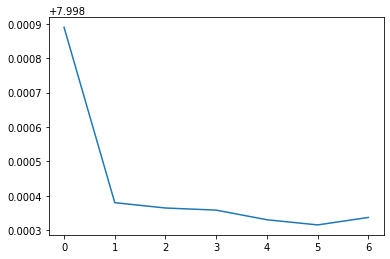

In [19]:
seaborn.lineplot(list(range(len(likelihoods))),likelihoods)

In [20]:
num=1.0*(Topic2TermCount )
beta=num.T/(num.sum(axis=0).reshape(n_topics, 1))
num=(Z + L)
theta=num / num.sum(axis=1).reshape(X.shape[0], 1)
theta=theta[new_cell_inds,:]

In [17]:
t0=time.process_time()
chosen=np.random.choice(list(range(X.shape[0])),size=100)
chosen2=np.random.choice(list(range(X.shape[1])),size=1000)
print(logLikelihood(beta[:,chosen2],theta[chosen,:],X[chosen,:][:,chosen2]))
t1=time.process_time()
t1-t0

7.53983012503842


4.21170416700005

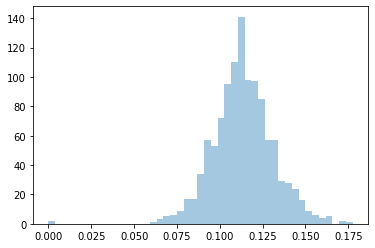

In [21]:
seaborn.distplot(theta[:,3],kde=False)

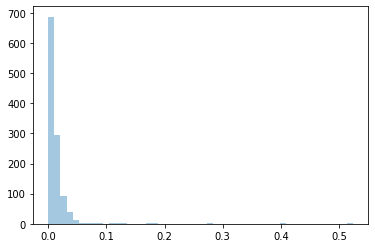

In [19]:
seaborn.distplot(theta[:,9],kde=False)

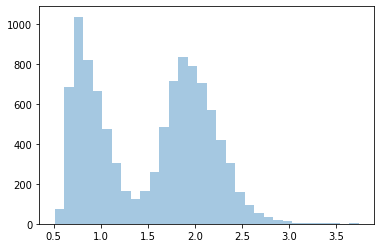

In [20]:
seaborn.distplot(ambient_pdf.resample(10000),kde=False)

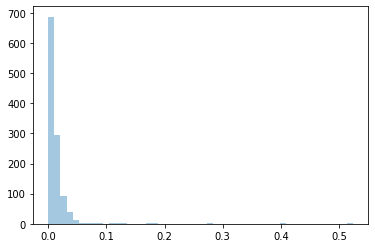

In [21]:
seaborn.distplot(theta[new_cell_inds,9],kde=False)

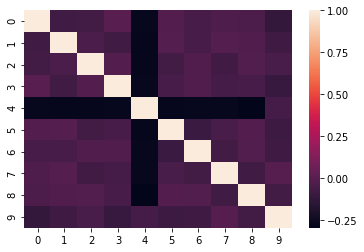

In [22]:
seaborn.heatmap(np.corrcoef(theta.T))

In [23]:
np.corrcoef(beta[9,:], betaAmbient)

array([[1.        , 0.99999788],
       [0.99999788, 1.        ]])

In [24]:
adata_copy=adata.copy()
adata._inplace_subset_obs(cell_inds)
adata

AnnData object with n_obs × n_vars = 1140 × 10092 
    obs: 'n_counts'
    var: 'gene_ids', 'n_cells'

In [25]:
sc.pp.normalize_total(adata, target_sum=1e4,)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
sc.pp.scale(adata, max_value=10)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)


/home/mt/code/utils/miniconda3/envs/pymc/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../utils/miniconda3/envs/pymc/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/mt/code/utils/miniconda3/envs/pymc/lib/python3.7/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../utils/miniconda3/envs/pymc/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/mt/code/utils/miniconda3/envs/pymc/lib/p

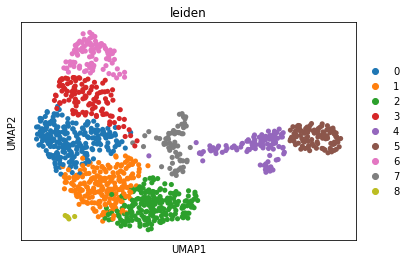

In [26]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])


In [27]:
for i in range(theta.shape[1]):
    adata.obs['lda_'+str(i)]=np.log(theta[new_cell_inds,i])


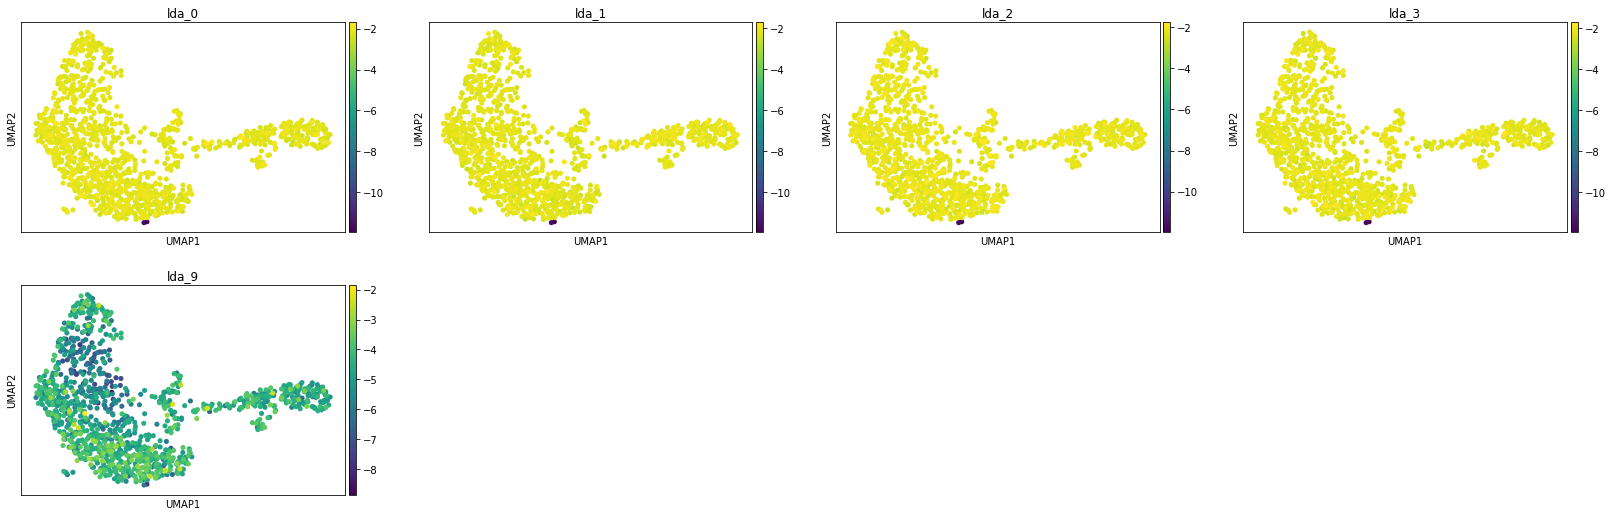

In [28]:
sc.pl.umap(adata, color=['lda_0','lda_1','lda_2','lda_3','lda_9'])


In [29]:
sc.settings.figdir='/home/mt/Downloads/'
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
df=pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'scores']})
df.to_csv(os.path.join(sc.settings.figdir,"E40BeforeleidenLogRegMarkers.csv"))

/home/mt/code/utils/miniconda3/envs/pymc/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mt/code/utils/miniconda3/envs/pymc/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
adata_copy._inplace_subset_obs(cell_inds)

In [31]:
print(Z[new_cell_inds,:].shape)
print(adata_copy.shape)
print(beta.shape)
print(theta.shape)


(1140, 10)
(1140, 10092)
(10, 10092)
(1140, 10)


In [32]:
for c in tqdm(range(adata_copy.shape[0])):
    vals=[]
    pvals=[]
    for i in range(adata_copy.shape[1]):
        vals=vals+[i]*int(adata_copy.X[c,i])
        pvals=pvals+[beta[n_topics-1,i]]*int(adata_copy.X[c,i])
    if len(vals)>0:
        countremove=Counter(np.random.choice(vals,replace=False,size=min(len(vals),int(Z[c,n_topics-1])),p=pvals/sum(pvals))) 
        adata_copy.X[c,list(countremove.keys())]-=np.array(list(countremove.values()))


100%|██████████| 1140/1140 [21:57<00:00,  1.01s/it]


In [33]:
for i in range(theta.shape[1]):
    adata_copy.obs['lda_'+str(i)]=theta[new_cell_inds,i]

sc.pp.filter_genes(adata_copy,min_counts=1,inplace=True)
sc.pp.filter_cells(adata_copy,min_counts=100,inplace=True)
sc.pp.normalize_total(adata_copy, target_sum=1e4)
sc.pp.log1p(adata_copy)
sc.pp.highly_variable_genes(adata_copy,n_top_genes=5000,inplace=True)
sc.pp.scale(adata_copy, max_value=10)
sc.pp.pca(adata_copy)
sc.pp.neighbors(adata_copy)
sc.tl.umap(adata_copy)


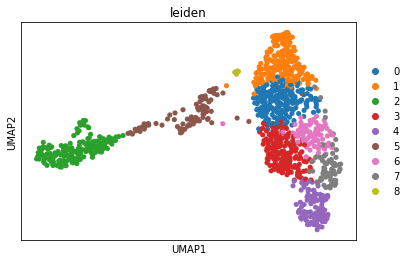

In [34]:
sc.tl.leiden(adata_copy)
sc.pl.umap(adata_copy, color=['leiden'])


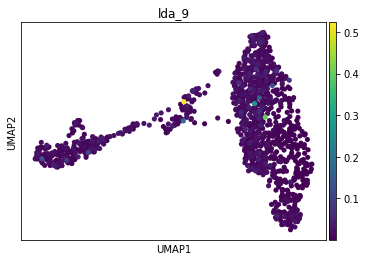

In [35]:
sc.pl.umap(adata_copy, color=['lda_9'])


In [36]:
sc.tl.rank_genes_groups(adata_copy, 'leiden', method='logreg')
result = adata_copy.uns['rank_genes_groups']
groups = result['names'].dtype.names
df=pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'scores']})
df.to_csv(os.path.join(sc.settings.figdir,"E40AfterleidenLogRegMarkers.csv"))


/home/mt/code/utils/miniconda3/envs/pymc/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mt/code/utils/miniconda3/envs/pymc/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [37]:
c=Counter(np.random.choice(list(range(adata_copy.shape[1])),p=beta[9,:].A1,size=int(Z[0,9]))) 
Z[m,list(c.keys())]=list(c.values())


ValueError: 'a' and 'p' must have same size

In [ ]:
print(self.Doc2TopicCount)
print(self.Doc2TopicCount.shape)
print(self.Topic2TermCount)
print(self.Topic2TermCount.shape)
print(self.Topic2TermCountSum)

In [ ]:
Topic2TermCount=((X/X.sum(axis=1)).T * Z)
Topic2TermCountSum=Topic2TermCount.sum(axis=0).A1

In [ ]:
m=1
doc_m_alpha_vector = alpha_vector_Lambda[m]
curdoc=X[m,:]

In [ ]:
Doc2TopicCount[m,:].toarray()

In [ ]:
Topic2TermCount

In [ ]:
(curdoc.T/curdoc.sum()*Z[m,:]).toarray()

In [ ]:
Zminus = Z-Z[m,:]
Topic2TermCount -= (curdoc.T/curdoc.sum()*Z[m,:])
Topic2TermCountSum -= Topic2TermCount.sum(axis=0).A1



In [ ]:
numerator_theta_vector = Zminus[m,:] + L[m,:]
numerator_theta_vector

In [ ]:
numerator_beta_vector = X[m,:]*Topic2TermCount + eta_vector
denominator_beta = Topic2TermCountSum + eta_vector_sum


In [ ]:
denominator_beta

In [ ]:
beta_vector = 1.0 * numerator_beta_vector / denominator_beta
beta_vector

In [ ]:
# theta_vector = 1.0 * numerator_theta_vector / denominator_theta
# denominator_theta is independent with t and k, so denominator could be any value except 0
# will set denominator_theta as 1.0
theta_vector = numerator_theta_vector

p_vector = np.multiply(beta_vector , theta_vector)
# print( p_vector)
p_vector = 1.0 * p_vector / np.sum(p_vector)
print( p_vector )


In [ ]:
c=Counter(np.random.choice(list(range(n_topics)),p=p_vector.A1,size=int(np.sum(Z[m,:])))) 
Z[m,list(c.keys())]=list(c.values())

In [ ]:
#Now going to reassign z for this word
k = z
self.Doc2TopicCount[m, k] -= 1
self.Topic2TermCount[k, t] -= 1
self.Topic2TermCountSum[k] -= 1


In [ ]:
doc_m_alpha_vector

In order to move towards a more likely parameter set, need to use the following proportionality between the likelihood without the current terms label and 

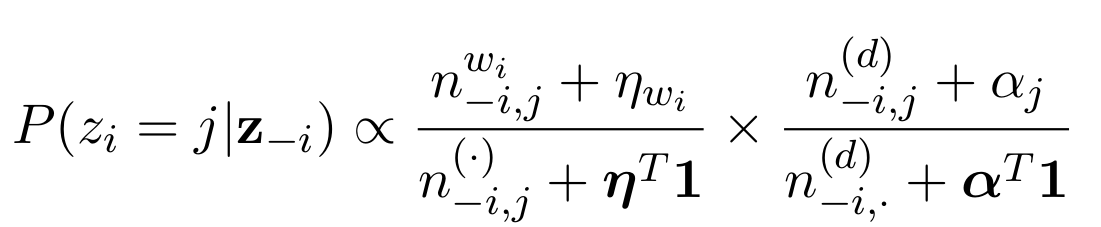

In [ ]:
numerator_theta_vector = (self.Doc2TopicCount[m])*density(self.Doc2TopicCount[m][junkindex]) + doc_m_alpha_vector
print(self.Doc2TopicCount[m])
print(doc_m_alpha_vector)
print(numerator_theta_vector)

Is this, the number words in each topic for the document, plus the label including alpha prior:
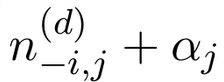

In [ ]:
numerator_beta_vector = self.Topic2TermCount[:, t] + self.eta_vector[t]
print( self.Topic2TermCount[:, t])
print(self.eta_vector[t])

Is this, the number of times the term appears in each topic plus the prior eta:
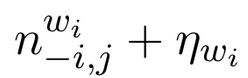

In [ ]:
denominator_beta = self.Topic2TermCountSum + self.eta_vector_sum
print(self.Topic2TermCountSum )
print(self.eta_vector_sum)
beta_vector = 1.0 * numerator_beta_vector / denominator_beta


In [ ]:
ambientp=np.full((len(self.Topic2TermCountSum)),density(self.Topic2TermCountSum[junkindex]))
ambientp[junkindex]=density(self.Topic2TermCountSum[junkindex]+1)


In [ ]:
ambientp

Is this, the total number of terms in each topic plus the total beta (eta) prior
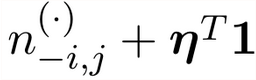

In [ ]:
theta_vector = numerator_theta_vector/1

theta_vector = 1.0 * numerator_theta_vector / denominator_theta, but the denominator_theta is independent with t and k, so denominator could be any value except 0, so he sets denominator_theta as 1.0.
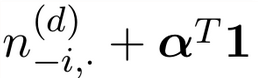

In [ ]:
p_vector = beta_vector * theta_vector * ambientp
print( p_vector)
p_vector = 1.0 * p_vector / sum(p_vector)
print('Renormalized p_vector')
print( p_vector)

Now we use the Gibbs likelihood ratio to resample z. 

In [ ]:
sample_z = self._multinomial_sample(p_vector)
print(sample_z)
self.Z[m][n] = sample_z
k = sample_z
self.Doc2TopicCount[m, k] += 1
self.Topic2TermCount[k, t] += 1
self.Topic2TermCountSum[k] += 1
count += 1
print(self.Doc2TopicCount)
print(self.Topic2TermCount)
print(self.Topic2TermCountSum[k])

Simply doing multiple passes through the data allows convergence on a MAP configuration of the model parameters. Doing inference on a new, unlabeled document 

In [ ]:
import numpy as np
term_vector=[2,1,0,3,2,2,2,2,2,2,2,2,2,2,2]
iteration=30

doc_topic_count = np.zeros(self.K, dtype=int)
p_vector = np.ones(self.K, dtype=int)
p_vector = p_vector * 1.0 / sum(p_vector)
z_vector = [self._multinomial_sample(p_vector) for _ in term_vector]
for n, t in enumerate(term_vector):
    k = z_vector[n]
    doc_topic_count[k] += 1
    self.Topic2TermCount[k, t] += 1
    self.Topic2TermCountSum[k] += 1

# sum_doc_topic_count = sum(doc_topic_count)
doc_m_alpha_vector = self.alpha_vector
# sum_doc_m_alpha_vector = sum(doc_m_alpha_vector)
for i in range(iteration):
    for n, t in enumerate(term_vector):
        k = z_vector[n]
        doc_topic_count[k] -= 1
        self.Topic2TermCount[k, t] -= 1
        self.Topic2TermCountSum[k] -= 1

        numerator_theta_vector = doc_topic_count + doc_m_alpha_vector
        # denominator_theta = sum_doc_topic_count - 1 + sum_doc_m_alpha_vector

        numerator_beta_vector = self.Topic2TermCount[:, t] + self.eta_vector[t]
        # denominator_beta = self.Topic2TermCount.sum(axis=1) + sum(self.eta_vector)
        denominator_beta = self.Topic2TermCountSum + self.eta_vector_sum

        beta_vector = 1.0 * numerator_beta_vector / denominator_beta
        # theta_vector = 1.0 numerator_theta_vector / denominator_theta
        # denominator_theta is independent with t and k, so denominator could be any value except 0
        # will set denominator_theta as 1.0
        theta_vector = numerator_theta_vector

        p_vector = beta_vector * theta_vector
        # print( p_vector)
        p_vector = 1.0 * p_vector / sum(p_vector)
        # print( p_vector)
        sample_z = self._multinomial_sample(p_vector)
        z_vector[n] = sample_z

        k = sample_z
        doc_topic_count[k] += 1
        self.Topic2TermCount[k, t] += 1
        self.Topic2TermCountSum[k] += 1
# reset self.Topic2TermCount
for n, t in enumerate(term_vector):
    k = z_vector[n]
    self.Topic2TermCount[k, t] -= 1
    self.Topic2TermCountSum[k] -= 1

numerator_theta_vector = doc_topic_count + doc_m_alpha_vector
# denominator_theta = sum(doc_topic_count) + sum(doc_m_alpha_vector)
denominator_theta = sum(numerator_theta_vector)
theta_new = 1.0 * numerator_theta_vector / denominator_theta


In [ ]:
z_vector

In [ ]:
#the mixture of the new document
theta_new

In [ ]:
onlineldavb/onlineldavb.py
@chelseaz chelseaz get example to work 68de1f8 on Nov 19, 2015
@chelseaz
@matthewdhoffman
476 lines (407 sloc) 18.7 KB
# onlineldavb.py: Package of functions for fitting Latent Dirichlet
# Allocation (LDA) with online variational Bayes (VB).
#
# Copyright (C) 2010  Matthew D. Hoffman
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

import sys, re, time, string
import numpy as n
from scipy.special import gammaln, psi

import corpus

n.random.seed(100000001)
meanchangethresh = 0.001

def dirichlet_expectation(alpha):
    """
    For a vector theta ~ Dir(alpha), computes E[log(theta)] given alpha.
    """
    if (len(alpha.shape) == 1):
        return(psi(alpha) - psi(n.sum(alpha)))
    return(psi(alpha) - psi(n.sum(alpha, 1))[:, n.newaxis])

def parse_doc_list(docs, vocab):
    """
    Parse a document into a list of word ids and a list of counts,
    or parse a set of documents into two lists of lists of word ids
    and counts.
    Arguments: 
    docs:  List of D documents. Each document must be represented as
           a single string. (Word order is unimportant.) Any
           words not in the vocabulary will be ignored.
    vocab: Dictionary mapping from words to integer ids.
    Returns a pair of lists of lists. 
    The first, wordids, says what vocabulary tokens are present in
    each document. wordids[i][j] gives the jth unique token present in
    document i. (Don't count on these tokens being in any particular
    order.)
    The second, wordcts, says how many times each vocabulary token is
    present. wordcts[i][j] is the number of times that the token given
    by wordids[i][j] appears in document i.
    """
    if (type(docs).__name__ == 'str'):
        temp = list()
        temp.append(docs)
        docs = temp

    D = len(docs)
    
    wordids = list()
    wordcts = list()
    for d in range(0, D):
        docs[d] = docs[d].lower()
        docs[d] = re.sub(r'-', ' ', docs[d])
        docs[d] = re.sub(r'[^a-z ]', '', docs[d])
        docs[d] = re.sub(r' +', ' ', docs[d])
        words = string.split(docs[d])
        ddict = dict()
        for word in words:
            if (word in vocab):
                wordtoken = vocab[word]
                if (not wordtoken in ddict):
                    ddict[wordtoken] = 0
                ddict[wordtoken] += 1
        wordids.append(ddict.keys())
        wordcts.append(ddict.values())

    return((wordids, wordcts))

class OnlineLDA:
    """
    Implements online VB for LDA as described in (Hoffman et al. 2010).
    """

    def __init__(self, vocab, K, D, alpha, eta, tau0, kappa):
        """
        Arguments:
        K: Number of topics
        vocab: A set of words to recognize. When analyzing documents, any word
           not in this set will be ignored.
        D: Total number of documents in the population. For a fixed corpus,
           this is the size of the corpus. In the truly online setting, this
           can be an estimate of the maximum number of documents that
           could ever be seen.
        alpha: Hyperparameter for prior on weight vectors theta
        eta: Hyperparameter for prior on topics beta
        tau0: A (positive) learning parameter that downweights early iterations
        kappa: Learning rate: exponential decay rate---should be between
             (0.5, 1.0] to guarantee asymptotic convergence.
        Note that if you pass the same set of D documents in every time and
        set kappa=0 this class can also be used to do batch VB.
        """
        self._vocab = dict()
        for word in vocab:
            word = word.lower()
            word = re.sub(r'[^a-z]', '', word)
            self._vocab[word] = len(self._vocab)

        self._K = K
        self._W = len(self._vocab)
        self._D = D
        self._alpha = alpha
        self._eta = eta
        self._tau0 = tau0 + 1
        self._kappa = kappa
        self._updatect = 0

        # Initialize the variational distribution q(beta|lambda)
        self._lambda = 1*n.random.gamma(100., 1./100., (self._K, self._W))
        self._Elogbeta = dirichlet_expectation(self._lambda)
        self._expElogbeta = n.exp(self._Elogbeta)

    def do_e_step(self, wordids, wordcts):
        batchD = len(wordids)

        # Initialize the variational distribution q(theta|gamma) for
        # the mini-batch
        gamma = 1*n.random.gamma(100., 1./100., (batchD, self._K))
        Elogtheta = dirichlet_expectation(gamma)
        expElogtheta = n.exp(Elogtheta)

        sstats = n.zeros(self._lambda.shape)
        # Now, for each document d update that document's gamma and phi
        it = 0
        meanchange = 0
        for d in range(0, batchD):
            print sum(wordcts[d])
            # These are mostly just shorthand (but might help cache locality)
            ids = wordids[d]
            cts = wordcts[d]
            gammad = gamma[d, :]
            Elogthetad = Elogtheta[d, :]
            expElogthetad = expElogtheta[d, :]
            expElogbetad = self._expElogbeta[:, ids]
            # The optimal phi_{dwk} is proportional to 
            # expElogthetad_k * expElogbetad_w. phinorm is the normalizer.
            phinorm = n.dot(expElogthetad, expElogbetad) + 1e-100
            # Iterate between gamma and phi until convergence
            for it in range(0, 100):
                lastgamma = gammad
                # We represent phi implicitly to save memory and time.
                # Substituting the value of the optimal phi back into
                # the update for gamma gives this update. Cf. Lee&Seung 2001.
                gammad = self._alpha + expElogthetad * \
                    n.dot(cts / phinorm, expElogbetad.T)
                print gammad[:, n.newaxis]
                Elogthetad = dirichlet_expectation(gammad)
                expElogthetad = n.exp(Elogthetad)
                phinorm = n.dot(expElogthetad, expElogbetad) + 1e-100
                # If gamma hasn't changed much, we're done.
                meanchange = n.mean(abs(gammad - lastgamma))
                if (meanchange < meanchangethresh):
                    break
            gamma[d, :] = gammad
            # Contribution of document d to the expected sufficient
            # statistics for the M step.
            sstats[:, ids] += n.outer(expElogthetad.T, cts/phinorm)

        # This step finishes computing the sufficient statistics for the
        # M step, so that
        # sstats[k, w] = \sum_d n_{dw} * phi_{dwk} 
        # = \sum_d n_{dw} * exp{Elogtheta_{dk} + Elogbeta_{kw}} / phinorm_{dw}.
        sstats = sstats * self._expElogbeta

        return((gamma, sstats))

    def do_e_step_docs(self, docs):
        """
        Given a mini-batch of documents, estimates the parameters
        gamma controlling the variational distribution over the topic
        weights for each document in the mini-batch.
        Arguments:
        docs:  List of D documents. Each document must be represented
               as a string. (Word order is unimportant.) Any
               words not in the vocabulary will be ignored.
        Returns a tuple containing the estimated values of gamma,
        as well as sufficient statistics needed to update lambda.
        """
        # This is to handle the case where someone just hands us a single
        # document, not in a list.
        if (type(docs).__name__ == 'string'):
            temp = list()
            temp.append(docs)
            docs = temp

        (wordids, wordcts) = parse_doc_list(docs, self._vocab)

        return self.do_e_step(wordids, wordcts)
    
#         batchD = len(docs)

#         # Initialize the variational distribution q(theta|gamma) for
#         # the mini-batch
#         gamma = 1*n.random.gamma(100., 1./100., (batchD, self._K))
#         Elogtheta = dirichlet_expectation(gamma)
#         expElogtheta = n.exp(Elogtheta)

#         sstats = n.zeros(self._lambda.shape)
#         # Now, for each document d update that document's gamma and phi
#         it = 0
#         meanchange = 0
#         for d in range(0, batchD):
#             # These are mostly just shorthand (but might help cache locality)
#             ids = wordids[d]
#             cts = wordcts[d]
#             gammad = gamma[d, :]
#             Elogthetad = Elogtheta[d, :]
#             expElogthetad = expElogtheta[d, :]
#             expElogbetad = self._expElogbeta[:, ids]
#             # The optimal phi_{dwk} is proportional to 
#             # expElogthetad_k * expElogbetad_w. phinorm is the normalizer.
#             phinorm = n.dot(expElogthetad, expElogbetad) + 1e-100
#             # Iterate between gamma and phi until convergence
#             for it in range(0, 100):
#                 lastgamma = gammad
#                 # We represent phi implicitly to save memory and time.
#                 # Substituting the value of the optimal phi back into
#                 # the update for gamma gives this update. Cf. Lee&Seung 2001.
#                 gammad = self._alpha + expElogthetad * \
#                     n.dot(cts / phinorm, expElogbetad.T)
#                 Elogthetad = dirichlet_expectation(gammad)
#                 expElogthetad = n.exp(Elogthetad)
#                 phinorm = n.dot(expElogthetad, expElogbetad) + 1e-100
#                 # If gamma hasn't changed much, we're done.
#                 meanchange = n.mean(abs(gammad - lastgamma))
#                 if (meanchange < meanchangethresh):
#                     break
#             gamma[d, :] = gammad
#             # Contribution of document d to the expected sufficient
#             # statistics for the M step.
#             sstats[:, ids] += n.outer(expElogthetad.T, cts/phinorm)

#         # This step finishes computing the sufficient statistics for the
#         # M step, so that
#         # sstats[k, w] = \sum_d n_{dw} * phi_{dwk} 
#         # = \sum_d n_{dw} * exp{Elogtheta_{dk} + Elogbeta_{kw}} / phinorm_{dw}.
#         sstats = sstats * self._expElogbeta

#         return((gamma, sstats))

    def update_lambda_docs(self, docs):
        """
        First does an E step on the mini-batch given in wordids and
        wordcts, then uses the result of that E step to update the
        variational parameter matrix lambda.
        Arguments:
        docs:  List of D documents. Each document must be represented
               as a string. (Word order is unimportant.) Any
               words not in the vocabulary will be ignored.
        Returns gamma, the parameters to the variational distribution
        over the topic weights theta for the documents analyzed in this
        update.
        Also returns an estimate of the variational bound for the
        entire corpus for the OLD setting of lambda based on the
        documents passed in. This can be used as a (possibly very
        noisy) estimate of held-out likelihood.
        """

        # rhot will be between 0 and 1, and says how much to weight
        # the information we got from this mini-batch.
        rhot = pow(self._tau0 + self._updatect, -self._kappa)
        self._rhot = rhot
        # Do an E step to update gamma, phi | lambda for this
        # mini-batch. This also returns the information about phi that
        # we need to update lambda.
        (gamma, sstats) = self.do_e_step_docs(docs)
        # Estimate held-out likelihood for current values of lambda.
        bound = self.approx_bound_docs(docs, gamma)
        # Update lambda based on documents.
        self._lambda = self._lambda * (1-rhot) + \
            rhot * (self._eta + self._D * sstats / len(docs))
        self._Elogbeta = dirichlet_expectation(self._lambda)
        self._expElogbeta = n.exp(self._Elogbeta)
        self._updatect += 1

        return(gamma, bound)

    def update_lambda(self, wordids, wordcts):
        """
        First does an E step on the mini-batch given in wordids and
        wordcts, then uses the result of that E step to update the
        variational parameter matrix lambda.
        Arguments:
        docs:  List of D documents. Each document must be represented
               as a string. (Word order is unimportant.) Any
               words not in the vocabulary will be ignored.
        Returns gamma, the parameters to the variational distribution
        over the topic weights theta for the documents analyzed in this
        update.
        Also returns an estimate of the variational bound for the
        entire corpus for the OLD setting of lambda based on the
        documents passed in. This can be used as a (possibly very
        noisy) estimate of held-out likelihood.
        """

        # rhot will be between 0 and 1, and says how much to weight
        # the information we got from this mini-batch.
        rhot = pow(self._tau0 + self._updatect, -self._kappa)
        self._rhot = rhot
        # Do an E step to update gamma, phi | lambda for this
        # mini-batch. This also returns the information about phi that
        # we need to update lambda.
        (gamma, sstats) = self.do_e_step(wordids, wordcts)
        # Estimate held-out likelihood for current values of lambda.
        bound = self.approx_bound(wordids, wordcts, gamma)
        # Update lambda based on documents.
        self._lambda = self._lambda * (1-rhot) + \
            rhot * (self._eta + self._D * sstats / len(wordids))
        self._Elogbeta = dirichlet_expectation(self._lambda)
        self._expElogbeta = n.exp(self._Elogbeta)
        self._updatect += 1

        return(gamma, bound)

    def approx_bound(self, wordids, wordcts, gamma):
        """
        Estimates the variational bound over *all documents* using only
        the documents passed in as "docs." gamma is the set of parameters
        to the variational distribution q(theta) corresponding to the
        set of documents passed in.
        The output of this function is going to be noisy, but can be
        useful for assessing convergence.
        """

        # This is to handle the case where someone just hands us a single
        # document, not in a list.
        batchD = len(wordids)

        score = 0
        Elogtheta = dirichlet_expectation(gamma)
        expElogtheta = n.exp(Elogtheta)

        # E[log p(docs | theta, beta)]
        for d in range(0, batchD):
            gammad = gamma[d, :]
            ids = wordids[d]
            cts = n.array(wordcts[d])
            phinorm = n.zeros(len(ids))
            for i in range(0, len(ids)):
                temp = Elogtheta[d, :] + self._Elogbeta[:, ids[i]]
                tmax = max(temp)
                phinorm[i] = n.log(sum(n.exp(temp - tmax))) + tmax
            score += n.sum(cts * phinorm)
#             oldphinorm = phinorm
#             phinorm = n.dot(expElogtheta[d, :], self._expElogbeta[:, ids])
#             print oldphinorm
#             print n.log(phinorm)
#             score += n.sum(cts * n.log(phinorm))

        # E[log p(theta | alpha) - log q(theta | gamma)]
        score += n.sum((self._alpha - gamma)*Elogtheta)
        score += n.sum(gammaln(gamma) - gammaln(self._alpha))
        score += sum(gammaln(self._alpha*self._K) - gammaln(n.sum(gamma, 1)))

        # Compensate for the subsampling of the population of documents
        score = score * self._D / len(wordids)

        # E[log p(beta | eta) - log q (beta | lambda)]
        score = score + n.sum((self._eta-self._lambda)*self._Elogbeta)
        score = score + n.sum(gammaln(self._lambda) - gammaln(self._eta))
        score = score + n.sum(gammaln(self._eta*self._W) - 
                              gammaln(n.sum(self._lambda, 1)))

        return(score)

    def approx_bound_docs(self, docs, gamma):
        """
        Estimates the variational bound over *all documents* using only
        the documents passed in as "docs." gamma is the set of parameters
        to the variational distribution q(theta) corresponding to the
        set of documents passed in.
        The output of this function is going to be noisy, but can be
        useful for assessing convergence.
        """

        # This is to handle the case where someone just hands us a single
        # document, not in a list.
        if (type(docs).__name__ == 'string'):
            temp = list()
            temp.append(docs)
            docs = temp

        (wordids, wordcts) = parse_doc_list(docs, self._vocab)
        batchD = len(docs)

        score = 0
        Elogtheta = dirichlet_expectation(gamma)
        expElogtheta = n.exp(Elogtheta)

        # E[log p(docs | theta, beta)]
        for d in range(0, batchD):
            gammad = gamma[d, :]
            ids = wordids[d]
            cts = n.array(wordcts[d])
            phinorm = n.zeros(len(ids))
            for i in range(0, len(ids)):
                temp = Elogtheta[d, :] + self._Elogbeta[:, ids[i]]
                tmax = max(temp)
                phinorm[i] = n.log(sum(n.exp(temp - tmax))) + tmax
            score += n.sum(cts * phinorm)
#             oldphinorm = phinorm
#             phinorm = n.dot(expElogtheta[d, :], self._expElogbeta[:, ids])
#             print oldphinorm
#             print n.log(phinorm)
#             score += n.sum(cts * n.log(phinorm))

        # E[log p(theta | alpha) - log q(theta | gamma)]
        score += n.sum((self._alpha - gamma)*Elogtheta)
        score += n.sum(gammaln(gamma) - gammaln(self._alpha))
        score += sum(gammaln(self._alpha*self._K) - gammaln(n.sum(gamma, 1)))

        # Compensate for the subsampling of the population of documents
        score = score * self._D / len(docs)

        # E[log p(beta | eta) - log q (beta | lambda)]
        score = score + n.sum((self._eta-self._lambda)*self._Elogbeta)
        score = score + n.sum(gammaln(self._lambda) - gammaln(self._eta))
        score = score + n.sum(gammaln(self._eta*self._W) - 
                              gammaln(n.sum(self._lambda, 1)))

        return(score)

def main():
    infile = sys.argv[1]
    K = int(sys.argv[2])
    alpha = float(sys.argv[3])
    eta = float(sys.argv[4])
    kappa = float(sys.argv[5])
    S = int(sys.argv[6])

    docs = corpus.corpus()
    docs.read_data(infile)

    vocab = open(sys.argv[7]).readlines()
    model = OnlineLDA(vocab, K, 100000,
                      0.1, 0.01, 1, 0.75)
    for i in range(1000):
        print i
        wordids = [d.words for d in docs.docs[(i*S):((i+1)*S)]]
        wordcts = [d.counts for d in docs.docs[(i*S):((i+1)*S)]]
        model.update_lambda(wordids, wordcts)
        n.savetxt('/tmp/lambda%d' % i, model._lambda.T)
    
#     infile = open(infile)
#     corpus.read_stream_data(infile, 100000)

if __name__ == '__main__':
    main()
